In [26]:
import sys
sys.path.append("/users/lizihao2/python_pkg/")
sys.path.append("/users/lizihao2/python_pkg/grizli")

import grizli
from astropy.io import fits
import os
import numpy as np
from astropy.table import Table
from multiprocessing import Pool
from jwst.pipeline import calwebb_detector1
import multiprocessing
import glob
from grizli.prep import get_radec_catalog
from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
from grizli.prep import process_direct_grism_visit,align_drizzled_image,make_SEP_catalog
from grizli.pipeline import auto_script
from grizli import utils
from grizli.pipeline.default_params import get_yml_parameters
from functools import partial
from grizli import utils, fitting, multifit, prep, model,grismconf
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import astropy.units as u
utils.set_warnings()

In [2]:
%load_ext autoreload
%autoreload 2

# Grizli NIRCam WFSS reduction tutorial
Author: Zihao Li (zihao.li@nbi.ku.dk)

Date: 10/12/2024

In [3]:
HOME_PATH = '/pfs/lustrep3/scratch/project_465001526/tutorial'
# HOME_PATH = os.getcwd()
print('HOME_PATH = ', HOME_PATH)
root = 'XMM1-Z-1664'

HOME_PATH =  /pfs/lustrep3/scratch/project_465001526/tutorial


In [4]:
# make directories
if not os.path.exists(root):
    os.mkdir(root)
if not os.path.exists(HOME_PATH + '/' + root + '/RAW'):
    os.chdir(HOME_PATH + '/' + root)
    !mkdir RAW
    os.chdir(HOME_PATH)
if not os.path.exists(HOME_PATH + '/' + root + '/Prep'):
    os.chdir(HOME_PATH + '/' + root)
    !mkdir Prep
    os.chdir(HOME_PATH)
if not os.path.exists(HOME_PATH + '/' + root + '/Extractions'):
    os.chdir(HOME_PATH + '/' + root)
    !mkdir Extractions
    os.chdir(HOME_PATH)

# Pipeline processing

In [19]:
os.chdir(HOME_PATH)
files = glob.glob('%s/RAW/*rate.fits'%root)
p = Pool(4)
p.map(partial(grizli.jwst_utils.set_jwst_to_hst_keywords,reset=True),files)
p.close()
p.join()

# use loops, but slow
# for file in files:
#     _ = grizli.jwst_utils.set_jwst_to_hst_keywords(file, reset=True)

2024-12-10 01:54:09,073 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:54:09,099 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:54:09,648 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:54:09,981 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanm

# (2024-12-09 23:54:02.604)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03101_00003_nrcb1_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-09 23:54:02.714)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03101_00003_nrcb1_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'make_plot': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
OTELESCO = TELESCOP JWST
OINSTRUM = INSTRUME NIRCAM
ODETECTO = DETECTOR NRCB1
OFILTER = FILTER F070W
OPUPIL = PUPIL CLEAR
OEXP_TYP = EXP_TYPE NRC_IMAGE
ENGQLPTG = CALCULATED_TR_202105
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_fl

2024-12-10 01:54:57,455 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 01:54:57,548 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:54:57,931 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)



# (2024-12-09 23:54:02.604)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03103_00004_nrca4_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-09 23:54:02.735)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03103_00004_nrca4_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'make_plot': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
OTELESCO = TELESCOP JWST
OINSTRUM = INSTRUME NIRCAM
ODETECTO = DETECTOR NRCA4
OFILTER = FILTER F115W
OPUPIL = PUPIL CLEAR
OEXP_TYP = EXP_TYPE NRC_IMAGE
ENGQLPTG = CALCULATED_TR_202105
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_fl

2024-12-10 01:55:01,155 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



# (2024-12-09 23:54:02.637)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03103_00001_nrca3_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-09 23:54:02.698)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03103_00001_nrca3_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'make_plot': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
OTELESCO = TELESCOP JWST
OINSTRUM = INSTRUME NIRCAM
ODETECTO = DETECTOR NRCA3
OFILTER = FILTER F115W
OPUPIL = PUPIL CLEAR
OEXP_TYP = EXP_TYPE NRC_IMAGE
ENGQLPTG = CALCULATED_TR_202105
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_fl

2024-12-10 01:55:07,002 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 01:55:07,367 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 01:55:08,817 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:55:14,478 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis

jwst_utils.get_jwst_skyflat: pipeline flat = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0512.fits
jwst_utils.get_jwst_skyflat: new sky flat = /projappl/project_465001526/grizli_config/CONF/NircamSkyFlat/nrca3-f200w-clear_skyflat_smooth.fits
jwst_utils.get_jwst_skyflat: valid_flat=(0.7, 1.4) nmask=3144
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0164.asdf
# (2024-12-09 23:55:02.867)

jwst_utils.pipeline_model_wcs_header(**{'datamodel': <ImageModel(2048, 2048) from jw06480013001_03106_00001_nrca3_rate.fits>, 'step': 64, 'degrees': [3, 4, 5, 5], 'lsq_args': {'jac': '2-point', 'bounds': (-inf, inf), 'method': 'trf', 'ftol': 1e-12, 'xtol': 1e-12, 'gtol': 1e-12, 'x_scale': 1.0, 'loss': 'soft_l1', 'f_scale': 1000.0, 'diff_step': 1e-06, 'tr_solver': None, 'tr_options': {}, 'jac_sparsity': None, 'max_nfev': 100, 'verbose': 0, 'kwargs': {}}, 'crpix': None, '

2024-12-10 01:55:51,347 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



jwst.flatfield.PhotomStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_photom_0115.fits
jwst_utils.get_jwst_skyflat: pipeline flat = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0473.fits
jwst_utils.get_jwst_skyflat: new sky flat = /projappl/project_465001526/grizli_config/CONF/NircamSkyFlat/nrca4-f115w-clear_skyflat_smooth.fits
jwst_utils.get_jwst_skyflat: valid_flat=(0.7, 1.4) nmask=2647
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0146.asdf
# (2024-12-09 23:54:58.287)

jwst_utils.pipeline_model_wcs_header(**{'datamodel': <ImageModel(2048, 2048) from jw06480013001_03103_00001_nrca4_rate.fits>, 'step': 64, 'degrees': [3, 4, 5, 5], 'lsq_args': {'jac': '2-point', 'bounds': (-inf, inf), 'method': 'trf', 'ftol': 1e-12, 'xtol': 1e-12, 'gtol': 1e-12, 'x_scale': 1.0, 'loss': 'soft_l1', 'f_scale': 1000.0, 'diff_step': 1e-06, 'tr_

2024-12-10 01:55:54,703 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:55:57,078 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:55:57,208 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:55:57,886 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default t

jwst.flatfield.PhotomStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_photom_0117.fits
jwst_utils.get_jwst_skyflat: pipeline flat = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0566.fits
jwst_utils.get_jwst_skyflat: new sky flat = /projappl/project_465001526/grizli_config/CONF/NircamSkyFlat/nrcb2-f115w-clear_skyflat_smooth.fits
jwst_utils.get_jwst_skyflat: valid_flat=(0.7, 1.4) nmask=2294
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0152.asdf
# (2024-12-09 23:55:08.741)

jwst_utils.pipeline_model_wcs_header(**{'datamodel': <ImageModel(2048, 2048) from jw06480013001_03103_00003_nrcb2_rate.fits>, 'step': 64, 'degrees': [3, 4, 5, 5], 'lsq_args': {'jac': '2-point', 'bounds': (-inf, inf), 'method': 'trf', 'ftol': 1e-12, 'xtol': 1e-12, 'gtol': 1e-12, 'x_scale': 1.0, 'loss': 'soft_l1', 'f_scale': 1000.0, 'diff_step': 1e-06, 'tr_

2024-12-10 01:56:02,243 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:56:02,303 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 01:56:04,622 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 01:56:11,680 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will def

# photometry keywords
PHOTFNU = 2.3067e-08
PHOTPLAM = 19886.5
PHOTFLAM = 1.7440e-21
ZP = 27.99
TO_MJYSR = 1.000

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCB4 (ODETECTO)
Reset: FILTER > F200W (OFILTER)
Reset: PUPIL > CLEAR (OPUPIL)
Reset: EXP_TYPE > NRC_IMAGE (OEXP_TYP)
# (2024-12-09 23:55:53.251)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03106_00002_nrca1_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-09 23:55:53.354)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03106_00002_nrca1_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'make_plot': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_

2024-12-10 01:56:44,590 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)



# (2024-12-09 23:55:49.445)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03103_00004_nrcalong_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-09 23:55:49.525)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03103_00004_nrcalong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'make_plot': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
OTELESCO = TELESCOP JWST
OINSTRUM = INSTRUME NIRCAM
ODETECTO = DETECTOR NRCALONG
OFILTER = FILTER F410M
OPUPIL = PUPIL GRISMR
OEXP_TYP = EXP_TYPE NRC_WFSS
ENGQLPTG = CALCULATED_TR_202105
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_

2024-12-10 01:56:46,304 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 01:56:47,258 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)



Reset: EXP_TYPE > NRC_IMAGE (OEXP_TYP)
# (2024-12-09 23:55:53.574)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03103_00001_nrcb1_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-09 23:55:53.676)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03103_00001_nrcb1_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'make_plot': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
OTELESCO = TELESCOP JWST
OINSTRUM = INSTRUME NIRCAM
ODETECTO = DETECTOR NRCB1
OFILTER = FILTER F115W
OPUPIL = PUPIL CLEAR
OEXP_TYP = EXP_TYPE NRC_IMAGE
ENGQLPTG = CALCULATED_TR_202105
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465001526/crds_cach

2024-12-10 01:56:49,244 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



Reset: EXP_TYPE > NRC_WFSS (OEXP_TYP)
# (2024-12-09 23:55:58.631)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03101_00002_nrca1_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-09 23:55:58.807)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03101_00002_nrca1_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'make_plot': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
OTELESCO = TELESCOP JWST
OINSTRUM = INSTRUME NIRCAM
ODETECTO = DETECTOR NRCA1
OFILTER = FILTER F070W
OPUPIL = PUPIL CLEAR
OEXP_TYP = EXP_TYPE NRC_IMAGE
ENGQLPTG = CALCULATED_TR_202105
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465001526/crds_cache

2024-12-10 01:56:54,480 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 01:56:54,802 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 01:56:56,590 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:57:04,306 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will def

exposure_oneoverf_correction: XMM1-Z-1664/RAW/jw06480013001_03103_00003_nrca2_rate.fits apply to file
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.flatfield.FlatFieldStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0593.fits
jwst.flatfield.PhotomStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_photom_0110.fits
jwst_utils.get_jwst_skyflat: pipeline flat = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0593.fits
jwst_utils.get_jwst_skyflat: new sky flat = /projappl/project_465001526/grizli_config/CONF/NircamSkyFlat/nrca2-f115w-clear_skyflat_smooth.fits
jwst_utils.get_jwst_skyflat: valid_flat=(0.7, 1.4) nmask=2543
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0150.asdf
# (2024-12-09 23:56:50.361)

jwst_utils.pipeline_model_wcs_header(**{'datamodel': <ImageModel(2048, 2048) from jw06480013001_03103_0

2024-12-10 01:57:38,290 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:57:38,909 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:57:39,197 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:57:39,700 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default t

jwst.flatfield.PhotomStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_photom_0115.fits
jwst_utils.get_jwst_skyflat: pipeline flat = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0548.fits
jwst_utils.get_jwst_skyflat: new sky flat = /projappl/project_465001526/grizli_config/CONF/NircamSkyFlat/nrca4-f070w-clear_skyflat_smooth.fits
jwst_utils.get_jwst_skyflat: valid_flat=(0.7, 1.4) nmask=2764
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0165.asdf
# (2024-12-09 23:56:55.929)

jwst_utils.pipeline_model_wcs_header(**{'datamodel': <ImageModel(2048, 2048) from jw06480013001_03101_00002_nrca4_rate.fits>, 'step': 64, 'degrees': [3, 4, 5, 5], 'lsq_args': {'jac': '2-point', 'bounds': (-inf, inf), 'method': 'trf', 'ftol': 1e-12, 'xtol': 1e-12, 'gtol': 1e-12, 'x_scale': 1.0, 'loss': 'soft_l1', 'f_scale': 1000.0, 'diff_step': 1e-06, 'tr_

2024-12-10 01:57:45,811 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 01:57:46,094 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 01:57:50,156 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)



jwst.flatfield.PhotomStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_photom_0110.fits
jwst_utils.get_jwst_skyflat: pipeline flat = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0593.fits
jwst_utils.get_jwst_skyflat: new sky flat = /projappl/project_465001526/grizli_config/CONF/NircamSkyFlat/nrca2-f115w-clear_skyflat_smooth.fits
jwst_utils.get_jwst_skyflat: valid_flat=(0.7, 1.4) nmask=2543
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0150.asdf
# (2024-12-09 23:56:56.255)

jwst_utils.pipeline_model_wcs_header(**{'datamodel': <ImageModel(2048, 2048) from jw06480013001_03103_00001_nrca2_rate.fits>, 'step': 64, 'degrees': [3, 4, 5, 5], 'lsq_args': {'jac': '2-point', 'bounds': (-inf, inf), 'method': 'trf', 'ftol': 1e-12, 'xtol': 1e-12, 'gtol': 1e-12, 'x_scale': 1.0, 'loss': 'soft_l1', 'f_scale': 1000.0, 'diff_step': 1e-06, 'tr_

2024-12-10 01:57:57,883 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 01:57:58,511 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:58:00,716 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:58:02,289 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_n

# photometry keywords
PHOTFNU = 2.2458e-08
PHOTPLAM = 19886.5
PHOTFLAM = 1.6980e-21
ZP = 28.02
TO_MJYSR = 1.000

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCA4 (ODETECTO)
Reset: FILTER > F200W (OFILTER)
Reset: PUPIL > CLEAR (OPUPIL)
Reset: EXP_TYPE > NRC_IMAGE (OEXP_TYP)
# (2024-12-09 23:57:37.420)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03103_00001_nrca1_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-09 23:57:37.460)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03103_00001_nrca1_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'make_plot': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_

2024-12-10 01:58:27,330 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCA4 (ODETECTO)
Reset: FILTER > F070W (OFILTER)
Reset: PUPIL > CLEAR (OPUPIL)
Reset: EXP_TYPE > NRC_IMAGE (OEXP_TYP)
# (2024-12-09 23:57:36.402)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03101_00003_nrcb3_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-09 23:57:36.475)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03101_00003_nrcb3_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'make_plot': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
OTELESCO = TELESCOP JWST
OINSTRUM = INSTRUME NIRCAM
ODETECTO = DETECTOR NRCB3
OFILTER = FILTER F070W
OPUPIL = PUPIL CLEAR


2024-12-10 01:58:31,047 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:58:31,860 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 01:58:33,319 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 01:58:34,042 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis

# photometry keywords
PHOTFNU = 2.2647e-08
PHOTPLAM = 19886.5
PHOTFLAM = 1.7122e-21
ZP = 28.01
TO_MJYSR = 1.000

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCA3 (ODETECTO)
Reset: FILTER > F200W (OFILTER)
Reset: PUPIL > CLEAR (OPUPIL)
Reset: EXP_TYPE > NRC_IMAGE (OEXP_TYP)
# (2024-12-09 23:57:46.936)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03103_00004_nrca2_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-09 23:57:47.024)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03103_00004_nrca2_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'make_plot': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_

2024-12-10 01:58:40,906 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)



# photometry keywords
PHOTFNU = 2.2266e-08
PHOTPLAM = 11543.0
PHOTFLAM = 4.9966e-21
ZP = 28.03
TO_MJYSR = 1.000

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCA2 (ODETECTO)
Reset: FILTER > F115W (OFILTER)
Reset: PUPIL > CLEAR (OPUPIL)
Reset: EXP_TYPE > NRC_IMAGE (OEXP_TYP)
# (2024-12-09 23:57:58.038)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03101_00001_nrca4_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-09 23:57:58.119)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03101_00001_nrca4_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'make_plot': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_

2024-12-10 01:58:42,191 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:58:42,469 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 01:58:44,976 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:58:47,008 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will defaul

exposure_oneoverf_correction: XMM1-Z-1664/RAW/jw06480013001_03104_00001_nrcb3_rate.fits apply to file
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.flatfield.FlatFieldStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0480.fits
jwst.flatfield.PhotomStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_photom_0113.fits
jwst_utils.get_jwst_skyflat: pipeline flat = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0480.fits
jwst_utils.get_jwst_skyflat: new sky flat = /projappl/project_465001526/grizli_config/CONF/NircamSkyFlat/nrcb3-f200w-clear_skyflat_smooth.fits
jwst_utils.get_jwst_skyflat: valid_flat=(0.7, 1.4) nmask=1290
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0167.asdf
# (2024-12-09 23:58:33.060)

jwst_utils.pipeline_model_wcs_header(**{'datamodel': <ImageModel(2048, 2048) from jw06480013001_03104_0

2024-12-10 01:59:27,752 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



jwst_utils.get_jwst_skyflat: /projappl/project_465001526/grizli_config/CONF/NircamSkyFlat/nrcalong-f410m-clear_skyflat_smooth.fits not found
exposure_oneoverf_correction: XMM1-Z-1664/RAW/jw06480013001_03101_00001_nrcalong_rate.fits axis=0 deg_pix=0
exposure_oneoverf_correction: XMM1-Z-1664/RAW/jw06480013001_03101_00001_nrcalong_rate.fits apply to file
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0141.asdf
# (2024-12-09 23:58:34.110)

jwst_utils.pipeline_model_wcs_header(**{'datamodel': <ImageModel(2048, 2048) from jw06480013001_03101_00001_nrcalong_rate.fits>, 'step': 64, 'degrees': [3, 4, 5, 5], 'lsq_args': {'jac': '2-point', 'bounds': (-inf, inf), 'method': 'trf', 'ftol': 1e-12, 'xtol': 1e-12, 'gtol': 1e-12, 'x_scale': 1.0, 'loss': 'soft_l1', 'f_scale': 1000.0, 'diff_step': 1e-06, 'tr_solver': None, 'tr_options': {}, 'jac_sparsity': None, 'max_nfev': 100, 'verbose': 0, 'kwargs': {}

2024-12-10 01:59:32,161 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:59:33,936 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)



exposure_oneoverf_correction: XMM1-Z-1664/RAW/jw06480013001_03106_00002_nrcb3_rate.fits apply to file
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.flatfield.FlatFieldStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0480.fits
jwst.flatfield.PhotomStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_photom_0113.fits
jwst_utils.get_jwst_skyflat: pipeline flat = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0480.fits
jwst_utils.get_jwst_skyflat: new sky flat = /projappl/project_465001526/grizli_config/CONF/NircamSkyFlat/nrcb3-f200w-clear_skyflat_smooth.fits
jwst_utils.get_jwst_skyflat: valid_flat=(0.7, 1.4) nmask=1290
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0167.asdf
# (2024-12-09 23:58:48.535)

jwst_utils.pipeline_model_wcs_header(**{'datamodel': <ImageModel(2048, 2048) from jw06480013001_03106_0

2024-12-10 01:59:36,722 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 01:59:37,155 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 01:59:38,588 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 01:59:38,948 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis

Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCA1 (ODETECTO)
Reset: FILTER > F115W (OFILTER)
Reset: PUPIL > CLEAR (OPUPIL)
Reset: EXP_TYPE > NRC_IMAGE (OEXP_TYP)
# (2024-12-09 23:59:29.054)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03103_00003_nrcb1_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-09 23:59:29.102)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03103_00003_nrcb1_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'make_plot': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
OTELESCO = TELESCOP JWST
OINSTRUM = INSTRUME NIRCAM
ODETECTO = DETECTOR NRCB1
OFILTER = FILTER F115W
OPUPIL = PUPIL CLEAR


2024-12-10 02:00:10,140 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:00:11,190 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:00:11,643 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:00:11,992 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default t

Fit SIP degree=4 rms= 4.74e-03, 3.21e-03 pix
Fit SIP degree=5 rms= 2.06e-04, 2.06e-04 pix
Fit SIP degree=5 rms= 2.06e-04, 2.06e-04 pix
jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 2.2219e-08
PHOTPLAM = 19886.5
PHOTFLAM = 1.6799e-21
ZP = 28.03
TO_MJYSR = 1.000

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCB1 (ODETECTO)
Reset: FILTER > F200W (OFILTER)
Reset: PUPIL > CLEAR (OPUPIL)
Reset: EXP_TYPE > NRC_IMAGE (OEXP_TYP)
# (2024-12-09 23:59:30.282)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03106_00001_nrcb3_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-09 23:59:30.429)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03106_00001_nrcb3_rate.fits', 'verbose': True, 'max

2024-12-10 02:00:12,805 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



Fit SIP degree=4 rms= 3.27e-03, 4.13e-03 pix
Fit SIP degree=5 rms= 2.53e-04, 2.53e-04 pix
Fit SIP degree=5 rms= 2.54e-04, 2.53e-04 pix
jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 2.2875e-08
PHOTPLAM = 11543.0
PHOTFLAM = 5.1332e-21
ZP = 28.00
TO_MJYSR = 1.000

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCB2 (ODETECTO)
Reset: FILTER > F115W (OFILTER)
Reset: PUPIL > CLEAR (OPUPIL)
Reset: EXP_TYPE > NRC_IMAGE (OEXP_TYP)
# (2024-12-09 23:59:31.313)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03101_00003_nrcalong_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-09 23:59:31.382)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03101_00003_nrcalong_rate.fits', 'verbose': True

2024-12-10 02:00:18,683 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:00:20,302 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:00:23,343 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:00:28,376 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis

# photometry keywords
PHOTFNU = 2.2219e-08
PHOTPLAM = 7043.2
PHOTFLAM = 1.3392e-20
ZP = 28.03
TO_MJYSR = 1.000

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCB1 (ODETECTO)
Reset: FILTER > F070W (OFILTER)
Reset: PUPIL > CLEAR (OPUPIL)
Reset: EXP_TYPE > NRC_IMAGE (OEXP_TYP)
# (2024-12-09 23:59:35.828)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03106_00002_nrcblong_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-09 23:59:36.024)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03106_00002_nrcblong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'make_plot': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV 

2024-12-10 02:00:30,426 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:00:30,829 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:00:33,097 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:00:34,144 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will defaul

jwst_utils.get_jwst_skyflat: /projappl/project_465001526/grizli_config/CONF/NircamSkyFlat/nrcblong-f410m-clear_skyflat_smooth.fits not found
exposure_oneoverf_correction: XMM1-Z-1664/RAW/jw06480013001_03103_00004_nrcblong_rate.fits axis=0 deg_pix=0
exposure_oneoverf_correction: XMM1-Z-1664/RAW/jw06480013001_03103_00004_nrcblong_rate.fits apply to file
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0148.asdf
# (2024-12-10 00:00:12.748)

jwst_utils.pipeline_model_wcs_header(**{'datamodel': <ImageModel(2048, 2048) from jw06480013001_03103_00004_nrcblong_rate.fits>, 'step': 64, 'degrees': [3, 4, 5, 5], 'lsq_args': {'jac': '2-point', 'bounds': (-inf, inf), 'method': 'trf', 'ftol': 1e-12, 'xtol': 1e-12, 'gtol': 1e-12, 'x_scale': 1.0, 'loss': 'soft_l1', 'f_scale': 1000.0, 'diff_step': 1e-06, 'tr_solver': None, 'tr_options': {}, 'jac_sparsity': None, 'max_nfev': 100, 'verbose': 0, 'kwargs': {}

2024-12-10 02:00:55,962 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:00:56,024 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:00:58,821 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)



exposure_oneoverf_correction: XMM1-Z-1664/RAW/jw06480013001_03103_00004_nrcb4_rate.fits apply to file
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.flatfield.FlatFieldStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0554.fits
jwst.flatfield.PhotomStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_photom_0109.fits
jwst_utils.get_jwst_skyflat: pipeline flat = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0554.fits
jwst_utils.get_jwst_skyflat: new sky flat = /projappl/project_465001526/grizli_config/CONF/NircamSkyFlat/nrcb4-f115w-clear_skyflat.fits
jwst_utils.get_jwst_skyflat: valid_flat=(0.7, 1.4) nmask=38600
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0169.asdf
# (2024-12-10 00:00:19.916)

jwst_utils.pipeline_model_wcs_header(**{'datamodel': <ImageModel(2048, 2048) from jw06480013001_03103_00004_n

2024-12-10 02:01:01,410 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:01:06,185 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



exposure_oneoverf_correction: XMM1-Z-1664/RAW/jw06480013001_03103_00002_nrcb2_rate.fits apply to file
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.flatfield.FlatFieldStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0566.fits
jwst.flatfield.PhotomStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_photom_0117.fits
jwst_utils.get_jwst_skyflat: pipeline flat = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0566.fits
jwst_utils.get_jwst_skyflat: new sky flat = /projappl/project_465001526/grizli_config/CONF/NircamSkyFlat/nrcb2-f115w-clear_skyflat_smooth.fits
jwst_utils.get_jwst_skyflat: valid_flat=(0.7, 1.4) nmask=2294
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0152.asdf
# (2024-12-10 00:00:21.926)

jwst_utils.pipeline_model_wcs_header(**{'datamodel': <ImageModel(2048, 2048) from jw06480013001_03103_0

2024-12-10 02:01:12,979 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:01:14,279 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:01:15,012 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:01:20,307 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will defaul

exposure_oneoverf_correction: XMM1-Z-1664/RAW/jw06480013001_03106_00001_nrca2_rate.fits apply to file
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.flatfield.FlatFieldStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0592.fits
jwst.flatfield.PhotomStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_photom_0110.fits
jwst_utils.get_jwst_skyflat: pipeline flat = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0592.fits
jwst_utils.get_jwst_skyflat: new sky flat = /projappl/project_465001526/grizli_config/CONF/NircamSkyFlat/nrca2-f200w-clear_skyflat_smooth.fits
jwst_utils.get_jwst_skyflat: valid_flat=(0.7, 1.4) nmask=2573
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0160.asdf
# (2024-12-10 00:00:35.537)

jwst_utils.pipeline_model_wcs_header(**{'datamodel': <ImageModel(2048, 2048) from jw06480013001_03106_0

2024-12-10 02:01:33,224 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)



Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCB4 (ODETECTO)
Reset: FILTER > F070W (OFILTER)
Reset: PUPIL > CLEAR (OPUPIL)
Reset: EXP_TYPE > NRC_IMAGE (OEXP_TYP)
# (2024-12-10 00:00:56.068)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03106_00002_nrcb1_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-10 00:00:56.178)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03106_00002_nrcb1_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'make_plot': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
OTELESCO = TELESCOP JWST
OINSTRUM = INSTRUME NIRCAM
ODETECTO = DETECTOR NRCB1
OFILTER = FILTER F200W
OPUPIL = PUPIL CLEAR


2024-12-10 02:01:38,752 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:01:39,212 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:01:41,361 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:01:43,069 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_n

Fit SIP degree=4 rms= 3.15e-03, 2.20e-03 pix
Fit SIP degree=5 rms= 1.37e-04, 1.38e-04 pix
Fit SIP degree=5 rms= 1.37e-04, 1.38e-04 pix
jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 2.2266e-08
PHOTPLAM = 7043.2
PHOTFLAM = 1.3420e-20
ZP = 28.03
TO_MJYSR = 1.000

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCA2 (ODETECTO)
Reset: FILTER > F070W (OFILTER)
Reset: PUPIL > CLEAR (OPUPIL)
Reset: EXP_TYPE > NRC_IMAGE (OEXP_TYP)
# (2024-12-10 00:01:09.049)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03101_00002_nrcalong_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-10 00:01:09.140)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03101_00002_nrcalong_rate.fits', 'verbose': True,

2024-12-10 02:01:44,883 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:01:48,124 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:01:48,727 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:01:49,591 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will def

Fit SIP degree=4 rms= 2.81e-03, 2.34e-03 pix
Fit SIP degree=5 rms= 3.64e-04, 3.66e-04 pix
Fit SIP degree=5 rms= 3.64e-04, 3.66e-04 pix
jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 2.2647e-08
PHOTPLAM = 7043.2
PHOTFLAM = 1.3650e-20
ZP = 28.01
TO_MJYSR = 1.000

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCA3 (ODETECTO)
Reset: FILTER > F070W (OFILTER)
Reset: PUPIL > CLEAR (OPUPIL)
Reset: EXP_TYPE > NRC_IMAGE (OEXP_TYP)
# (2024-12-10 00:01:17.995)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03101_00003_nrcblong_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-10 00:01:18.042)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03101_00003_nrcblong_rate.fits', 'verbose': True,

2024-12-10 02:01:59,329 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:02:00,428 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:02:01,171 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:02:01,479 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default t

Fit SIP degree=4 rms= 2.27e-03, 1.68e-03 pix
Fit SIP degree=5 rms= 1.77e-04, 1.77e-04 pix
Fit SIP degree=5 rms= 1.77e-04, 1.77e-04 pix
jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 2.2402e-08
PHOTPLAM = 7043.2
PHOTFLAM = 1.3503e-20
ZP = 28.02
TO_MJYSR = 1.000

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCB3 (ODETECTO)
Reset: FILTER > F070W (OFILTER)
Reset: PUPIL > CLEAR (OPUPIL)
Reset: EXP_TYPE > NRC_IMAGE (OEXP_TYP)
# (2024-12-10 00:01:38.818)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03101_00001_nrca3_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-10 00:01:39.031)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03101_00001_nrca3_rate.fits', 'verbose': True, 'max_

2024-12-10 02:02:24,564 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:02:25,337 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)



jwst.flatfield.FlatFieldStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0522.fits
jwst.flatfield.PhotomStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_photom_0109.fits
jwst_utils.get_jwst_skyflat: pipeline flat = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0522.fits
jwst_utils.get_jwst_skyflat: new sky flat = /projappl/project_465001526/grizli_config/CONF/NircamSkyFlat/nrcb4-f070w-clear_skyflat.fits
jwst_utils.get_jwst_skyflat: valid_flat=(0.7, 1.4) nmask=39444
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0142.asdf
# (2024-12-10 00:01:39.990)

jwst_utils.pipeline_model_wcs_header(**{'datamodel': <ImageModel(2048, 2048) from jw06480013001_03101_00004_nrcb4_rate.fits>, 'step': 64, 'degrees': [3, 4, 5, 5], 'lsq_args': {'jac': '2-point', 'bounds': (-inf, inf), 'method': 'trf', 'ftol': 1e-

2024-12-10 02:02:28,515 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:02:29,418 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:02:30,572 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:02:34,465 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis

exposure_oneoverf_correction: XMM1-Z-1664/RAW/jw06480013001_03101_00004_nrcb1_rate.fits apply to file
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.flatfield.FlatFieldStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0468.fits
jwst.flatfield.PhotomStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_photom_0118.fits
jwst_utils.get_jwst_skyflat: pipeline flat = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0468.fits
jwst_utils.get_jwst_skyflat: new sky flat = /projappl/project_465001526/grizli_config/CONF/NircamSkyFlat/nrcb1-f070w-clear_skyflat_smooth.fits
jwst_utils.get_jwst_skyflat: valid_flat=(0.7, 1.4) nmask=3159
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0161.asdf
# (2024-12-10 00:01:51.074)

jwst_utils.pipeline_model_wcs_header(**{'datamodel': <ImageModel(2048, 2048) from jw06480013001_03101_0

2024-12-10 02:02:37,162 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:02:40,612 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:02:41,784 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:02:44,203 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis

jwst.flatfield.FlatFieldStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0613.fits
jwst_utils.get_jwst_skyflat: /projappl/project_465001526/grizli_config/CONF/NircamSkyFlat/nrcblong-f410m-clear_skyflat_smooth.fits not found
exposure_oneoverf_correction: XMM1-Z-1664/RAW/jw06480013001_03101_00002_nrcblong_rate.fits axis=0 deg_pix=0
exposure_oneoverf_correction: XMM1-Z-1664/RAW/jw06480013001_03101_00002_nrcblong_rate.fits apply to file
ENV CRDS_CONTEXT = jwst_1123.pmap
jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0148.asdf
# (2024-12-10 00:02:02.432)

jwst_utils.pipeline_model_wcs_header(**{'datamodel': <ImageModel(2048, 2048) from jw06480013001_03101_00002_nrcblong_rate.fits>, 'step': 64, 'degrees': [3, 4, 5, 5], 'lsq_args': {'jac': '2-point', 'bounds': (-inf, inf), 'method': 'trf', 'ftol': 1e-12, 'xtol': 1e-12, 'gtol': 1e-12, 'x_scale': 1.0, 'loss': 'soft_l1', 'f_scale': 1000.0, 'dif

2024-12-10 02:02:51,170 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:02:55,068 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:02:55,110 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:03:02,491 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis

Reset: DETECTOR > NRCBLONG (ODETECTO)
Reset: FILTER > F410M (OFILTER)
Reset: PUPIL > GRISMR (OPUPIL)
Reset: EXP_TYPE > NRC_WFSS (OEXP_TYP)
# (2024-12-10 00:02:26.871)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03101_00002_nrcb3_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-10 00:02:26.990)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03101_00002_nrcb3_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'make_plot': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
OTELESCO = TELESCOP JWST
OINSTRUM = INSTRUME NIRCAM
ODETECTO = DETECTOR NRCB3
OFILTER = FILTER F070W
OPUPIL = PUPIL CLEAR
OEXP_TYP = EXP_TYPE NRC_IMAGE
ENG

2024-12-10 02:03:12,644 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:03:14,589 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:03:15,185 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:03:23,358 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis

Fit SIP degree=4 rms= 2.38e-03, 3.13e-03 pix
Fit SIP degree=5 rms= 1.48e-04, 1.48e-04 pix
Fit SIP degree=5 rms= 1.48e-04, 1.48e-04 pix
jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 2.3067e-08
PHOTPLAM = 11543.0
PHOTFLAM = 5.1764e-21
ZP = 27.99
TO_MJYSR = 1.000

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCB4 (ODETECTO)
Reset: FILTER > F115W (OFILTER)
Reset: PUPIL > CLEAR (OPUPIL)
Reset: EXP_TYPE > NRC_IMAGE (OEXP_TYP)
# (2024-12-10 00:02:40.521)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03101_00003_nrca3_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-10 00:02:40.556)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03101_00003_nrca3_rate.fits', 'verbose': True, 'max

2024-12-10 02:03:26,092 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)

2024-12-10 02:03:27,374 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:03:29,764 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(

2024-12-10 02:03:36,521 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will def

# photometry keywords
PHOTFNU = 2.2458e-08
PHOTPLAM = 7043.2
PHOTFLAM = 1.3537e-20
ZP = 28.02
TO_MJYSR = 1.000

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCA4 (ODETECTO)
Reset: FILTER > F070W (OFILTER)
Reset: PUPIL > CLEAR (OPUPIL)
Reset: EXP_TYPE > NRC_IMAGE (OEXP_TYP)
# (2024-12-10 00:02:51.059)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'XMM1-Z-1664/RAW/jw06480013001_03101_00002_nrcb4_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

# (2024-12-10 00:02:51.105)

jwst_utils.initialize_jwst_image(**{'filename': 'XMM1-Z-1664/RAW/jw06480013001_03101_00002_nrcb4_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'make_plot': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_C

2024-12-10 02:03:46,377 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



MaybeEncodingError: Error sending result: '[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x14d2a197e970>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2bb0de700>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2ae518160>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2ae518fa0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2abf4e8b0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2abf4efd0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a18c92e0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a7b84160>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x14d2bc1169a0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a18c94c0>], [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x14d2a580d1c0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2aefdb0a0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a79f1130>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2abf4ed00>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2ae1e1c10>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a57d0ca0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a57d0970>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x14d2abe87eb0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2aefdb160>], [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x14d2ae100880>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a7b62430>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a771c2b0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2b03b8460>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a6af5fd0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2aefe66d0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2ae1bac10>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a6af5820>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x14d2aefdb190>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2ae1ba520>], [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x14d2a812fb50>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2ae530eb0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a6e34730>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a6e34ee0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2ae1babb0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a54c7610>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a6dc3040>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x14d2ae1ba5b0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a6e34b50>], [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x14d2a18f26a0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2abf7dc10>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a55ef970>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a55ef610>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a55ef520>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a55a60d0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a6d645b0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a55efa30>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x14d2a5391cd0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a6d64700>], [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x14d2a78af700>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a560bca0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a6dc36d0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a5217640>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a52177c0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2aef7a6d0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a6dd9700>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x14d2a52175e0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a560bdf0>], [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x14d2a5186340>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2bab8a430>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a6cf4ac0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a57c96a0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a580dfd0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a500a6d0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a500acd0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a6cf4df0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x14d2a500ad30>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14d2a500a070>]]'. Reason: 'TypeError("cannot pickle '_io.BufferedRandom' object")'

In [5]:
# Preprocessing
# Parameter lists
kwargs = get_yml_parameters()
IS_PARALLEL = False # Set to True for parallel programs like WISPS
visit_prep_args = kwargs['visit_prep_args']
preprocess_args = kwargs['preprocess_args']

# Maximum shift for "tweakshifts" relative alignment
tweak_max_dist = (5 if IS_PARALLEL else 1)
if 'tweak_max_dist' not in visit_prep_args:
    visit_prep_args['tweak_max_dist'] = tweak_max_dist

# Fit and subtract a SExtractor-like background to each visit
visit_prep_args['imaging_bkg_params']  = {'bh': 256, 'bw': 256, 'fh': 3, 'fw': 3, 
                                          'pixel_scale': 0.1, 'get_median': False}

# Alignment reference catalogs, searched in this order
preprocess_args['catalogs'] = ['LS_DR9','PS1','GAIA','SDSS']

visit_prep_args['snowball_kwargs']['mask_bit'] = 1 # mask snowball as DO_NOT_USE
visit_prep_args['drizzle_params']['bits'] = '~512+1' # ~512+1 = ~NONSCIENCE+DO_NOT_USE
visit_prep_args['fix_stars']= True
kwargs['grism_prep_args']['refine_mag_limits'] = [18, 24]
visit_prep_args.pop('align_thresh')

In [6]:
os.chdir(os.path.join(HOME_PATH, root, 'Prep'))

root = 'XMM1-Z-1664'
visits, all_groups, info = auto_script.parse_visits(field_root = root,
                                            RAW_PATH = '../RAW')

# (2024-12-13 12:11:51.202)

auto_script.parse_visits(**{'files': [], 'field_root': 'XMM1-Z-1664', 'RAW_PATH': '../RAW', 'use_visit': True, 'combine_same_pa': True, 'combine_minexp': 2, 'is_dash': False, 'filters': ['F410M', 'F467M', 'F547M', 'F550M', 'F621M', 'F689M', 'F763M', 'F845M', 'F200LP', 'F350LP', 'F435W', 'F438W', 'F439W', 'F450W', 'F475W', 'F475X', 'F555W', 'F569W', 'F600LP', 'F606W', 'F622W', 'F625W', 'F675W', 'F702W', 'F775W', 'F791W', 'F814W', 'F850LP', 'G800L', 'F098M', 'F127M', 'F139M', 'F153M', 'F105W', 'F110W', 'F125W', 'F140W', 'F160W', 'G102', 'G141', 'F070W', 'F090W', 'F1000W', 'F1130W', 'F115W', 'F1280W', 'F140M', 'F1500W', 'F150W', 'F150W2', 'F158M', 'F162M', 'F164N', 'F1800W', 'F182M', 'F187N', 'F200W', 'F2100W', 'F210M', 'F212N', 'F250M', 'F2550W', 'F277W', 'F300M', 'F322W2', 'F323N', 'F335M', 'F356W', 'F360M', 'F380M', 'F405N', 'F410M', 'F430M', 'F444W', 'F460M', 'F466N', 'F470N', 'F480M', 'F560W', 'F770W', 'GR150C', 'GR150R', 'GRISMR', 'GRISMC'], 'max_dt': 10

# (2024-12-13 12:30:08.141)

auto_script.preprocess(**{'field_root': 'XMM1-Z-1664', 'HOME_PATH': 'HOMEPATH', 'PERSIST_PATH': None, 'min_overlap': 0.2, 'make_combined': False, 'catalogs': ['LS_DR9', 'PS1', 'GAIA', 'SDSS'], 'use_visit': True, 'master_radec': None, 'parent_radec': None, 'use_first_radec': False, 'skip_imaging': False, 'clean': True, 'skip_single_optical_visits': False, 'visit_prep_args': {'align_rms_limit': 2, 'align_mag_limits': [14, 24, 0.05], 'align_assume_close': False, 'align_transform': None, 'align_ref_border': 100, 'align_guess': None, 'max_err_percentile': 99, 'align_min_flux_radius': 1.0, 'align_min_nexp': 2, 'align_final_niter': 8, 'catalog_mask_pad': 0.05, 'match_catalog_density': False, 'skymethod': 'localmin', 'drizzle_params': {'bits': '~512+1'}, 'single_image_CRs': True, 'run_tweak_align': True, 'tweak_threshold': 3.0, 'tweak_fit_order': -1, 'tweak_max_dist': 100, 'tweak_n_min': 10, 'tweak_ref_exp': 0, 'tweak_mosaic_iters': 2, 'align_simple': False, 'align

2024-12-13 14:30:18,171 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0148.asdf


2024-12-13 14:30:20,002 - stpipe - WARNING - **WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-065 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-068
--- Logging error ---
Traceback (most recent call last):
  File "/LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/LUMI_TYKK

jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 9.2374e-08
PHOTPLAM = 44036.7
PHOTFLAM = 1.4243e-21
ZP = 26.49
TO_MJYSR = 1.000

# prep.apply_region_mask_from_db: query failed
# (2024-12-13 12:30:21.261)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw06480013001_03104_00001_nrcblong_rate.fits', 'reset': False, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

  Set: TELESCOP > HST
  Set: INSTRUME > WFC3
  Set: DETECTOR > IR
# ../RAW/jw06480013001_03106_00001_nrcblong_rate.fits -> jw06480013001_03106_00001_nrcblong_rate.fits 
# (2024-12-13 12:30:22.178)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03106_00001_nrcblong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwar

2024-12-13 14:30:24,442 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0148.asdf
jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 9.2374e-08
PHOTPLAM = 44036.7
PHOTFLAM = 1.4243e-21
ZP = 26.49
TO_MJYSR = 1.000

# prep.apply_region_mask_from_db: query failed
# (2024-12-13 12:30:26.401)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw06480013001_03106_00001_nrcblong_rate.fits', 'reset': False, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

  Set: TELESCOP > HST
  Set: INSTRUME > WFC3
  Set: DETECTOR > IR
# ../RAW/jw06480013001_03106_00002_nrcblong_rate.fits -> jw06480013001_03106_00002_nrcblong_rate.fits 
# (2024-12-13 12:30:27.325)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03106_00002_nrcblong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys'

2024-12-13 14:30:29,591 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0148.asdf
jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 9.2374e-08
PHOTPLAM = 44036.7
PHOTFLAM = 1.4243e-21
ZP = 26.49
TO_MJYSR = 1.000

# prep.apply_region_mask_from_db: query failed
# (2024-12-13 12:30:31.577)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw06480013001_03106_00002_nrcblong_rate.fits', 'reset': False, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

  Set: TELESCOP > HST
  Set: INSTRUME > WFC3
  Set: DETECTOR > IR
# ../RAW/jw06480013001_03101_00001_nrcalong_rate.fits -> jw06480013001_03101_00001_nrcalong_rate.fits 
# (2024-12-13 12:30:32.424)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03101_00001_nrcalong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys'

2024-12-13 14:30:34,706 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0141.asdf
jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 7.5434e-08
PHOTPLAM = 40820.6
PHOTFLAM = 1.3536e-21
ZP = 26.71
TO_MJYSR = 0.811

# prep.apply_region_mask_from_db: query failed
# ../RAW/jw06480013001_03101_00002_nrcalong_rate.fits -> jw06480013001_03101_00002_nrcalong_rate.fits 
# (2024-12-13 12:30:37.283)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03101_00002_nrcalong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'thresholds': [5, 4, 3], 'dilate_iterations': 3, 'deg_pix': 64, 'other_axis': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465

2024-12-13 14:30:39,422 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0141.asdf
jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 7.5434e-08
PHOTPLAM = 40820.6
PHOTFLAM = 1.3536e-21
ZP = 26.71
TO_MJYSR = 0.811

# prep.apply_region_mask_from_db: query failed
# ../RAW/jw06480013001_03101_00003_nrcalong_rate.fits -> jw06480013001_03101_00003_nrcalong_rate.fits 
# (2024-12-13 12:30:42.284)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03101_00003_nrcalong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'thresholds': [5, 4, 3], 'dilate_iterations': 3, 'deg_pix': 64, 'other_axis': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465

2024-12-13 14:30:44,490 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0141.asdf
jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 7.5434e-08
PHOTPLAM = 40820.6
PHOTFLAM = 1.3536e-21
ZP = 26.71
TO_MJYSR = 0.811

# prep.apply_region_mask_from_db: query failed
# ../RAW/jw06480013001_03101_00004_nrcalong_rate.fits -> jw06480013001_03101_00004_nrcalong_rate.fits 
# (2024-12-13 12:30:47.391)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03101_00004_nrcalong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'thresholds': [5, 4, 3], 'dilate_iterations': 3, 'deg_pix': 64, 'other_axis': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465

2024-12-13 14:30:49,885 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0141.asdf
jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 7.5434e-08
PHOTPLAM = 40820.6
PHOTFLAM = 1.3536e-21
ZP = 26.71
TO_MJYSR = 0.811

# prep.apply_region_mask_from_db: query failed
# ../RAW/jw06480013001_03103_00001_nrcalong_rate.fits -> jw06480013001_03103_00001_nrcalong_rate.fits 
# (2024-12-13 12:30:52.932)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03103_00001_nrcalong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'thresholds': [5, 4, 3], 'dilate_iterations': 3, 'deg_pix': 64, 'other_axis': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465

2024-12-13 14:30:55,805 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0141.asdf
jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 7.5434e-08
PHOTPLAM = 40820.6
PHOTFLAM = 1.3536e-21
ZP = 26.71
TO_MJYSR = 0.811

# prep.apply_region_mask_from_db: query failed
# ../RAW/jw06480013001_03103_00002_nrcalong_rate.fits -> jw06480013001_03103_00002_nrcalong_rate.fits 
# (2024-12-13 12:30:59.896)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03103_00002_nrcalong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'thresholds': [5, 4, 3], 'dilate_iterations': 3, 'deg_pix': 64, 'other_axis': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465

2024-12-13 14:31:02,678 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0141.asdf
jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 7.5434e-08
PHOTPLAM = 40820.6
PHOTFLAM = 1.3536e-21
ZP = 26.71
TO_MJYSR = 0.811

# prep.apply_region_mask_from_db: query failed
# ../RAW/jw06480013001_03103_00003_nrcalong_rate.fits -> jw06480013001_03103_00003_nrcalong_rate.fits 
# (2024-12-13 12:31:07.183)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03103_00003_nrcalong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'thresholds': [5, 4, 3], 'dilate_iterations': 3, 'deg_pix': 64, 'other_axis': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465

2024-12-13 14:31:09,689 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0141.asdf
jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 7.5434e-08
PHOTPLAM = 40820.6
PHOTFLAM = 1.3536e-21
ZP = 26.71
TO_MJYSR = 0.811

# prep.apply_region_mask_from_db: query failed
# ../RAW/jw06480013001_03103_00004_nrcalong_rate.fits -> jw06480013001_03103_00004_nrcalong_rate.fits 
# (2024-12-13 12:31:12.197)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03103_00004_nrcalong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'thresholds': [5, 4, 3], 'dilate_iterations': 3, 'deg_pix': 64, 'other_axis': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_1123.pmap
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465

2024-12-13 14:31:14,387 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(



jwst.assign_wcs.AssignWcsStep: /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0141.asdf
jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 7.5434e-08
PHOTPLAM = 40820.6
PHOTFLAM = 1.3536e-21
ZP = 26.71
TO_MJYSR = 0.811

# prep.apply_region_mask_from_db: query failed
# (2024-12-13 12:31:16.905)

prep.mask_snowballs(**{'visit': {'files': ['jw06480013001_03104_00001_nrcblong_rate.fits', 'jw06480013001_03106_00001_nrcblong_rate.fits', 'jw06480013001_03106_00002_nrcblong_rate.fits'], 'footprint': <POLYGON ((34.28 -5.123, 34.28 -5.123, 34.28 -5.123, 34.28 -5.123, 34.28 -5....>, 'footprints': [[<POLYGON ((34.277 -5.12, 34.252 -5.093, 34.279 -5.069, 34.303 -5.096, 34.277...>], [<POLYGON ((34.275 -5.118, 34.251 -5.091, 34.278 -5.067, 34.302 -5.093, 34.27...>], [<POLYGON ((34.28 -5.123, 34.255 -5.096, 34.282 -5.072, 34.306 -5.098, 34.28 ...>]], 'product': 'jw013-nrcb5-f444w-clear'}, 'sn

2024-12-13 14:32:13,754 - stpipe - WARNING - Static mask for file 'jw06480013001_03104_00001_nrcblong_rate.fits', ext=('SCI', 1) NOT FOUND.
2024-12-13 14:32:13,795 - stpipe - WARNING - Static mask for file 'jw06480013001_03106_00001_nrcblong_rate.fits', ext=('SCI', 1) NOT FOUND.
2024-12-13 14:32:13,822 - stpipe - WARNING - Static mask for file 'jw06480013001_03106_00002_nrcblong_rate.fits', ext=('SCI', 1) NOT FOUND.
2024-12-13 14:32:14,721 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_single_sci.fits


2024-12-13 14:32:14,783 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_single_wht.fits


2024-12-13 14:32:14,915 - stpipe - INFO - Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_single_sci.fits


2024-12-13 14:32:14,930 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_single_sci.fits


2024-12-13 14:32:14,978 - stpipe - INFO - Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_single_wht.fits


2024-12-13 14:32:14,994 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_single_wht.fits


2024-12-13 14:32:19,325 - stpipe - WARNING - Cannot find flat field file 'jwst_nircam_flat_0605.fits'
2024-12-13 14:32:19,327 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-12-13 14:32:20,196 - stpipe - WARNING - Cannot find flat field file 'jwst_nircam_flat_0605.fits'
2024-12-13 14:32:20,197 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-12-13 14:32:21,028 - stpipe - WARNING - Cannot find flat field file 'jwst_nircam_flat_0605.fits'
2024-12-13 14:32:21,029 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-12-13 14:32:22,222 - stpipe - INFO - Writing out image to disk: jw013-nrcb5-f444w-clear_drz_sci.fits


Writing out image to disk: jw013-nrcb5-f444w-clear_drz_sci.fits


2024-12-13 14:32:22,345 - stpipe - INFO - Writing out image to disk: jw013-nrcb5-f444w-clear_drz_wht.fits


Writing out image to disk: jw013-nrcb5-f444w-clear_drz_wht.fits


2024-12-13 14:32:22,385 - stpipe - INFO - ==== Processing Step Final Drizzle finished at 14:32:22.385 (13/12/2024)


==== Processing Step Final Drizzle finished at 14:32:22.385 (13/12/2024)


2024-12-13 14:32:22,387 - stpipe - INFO - 


2024-12-13 14:32:22,388 - stpipe - INFO - AstroDrizzle Version 3.6.2 is finished processing at 14:32:22.388 (13/12/2024).


AstroDrizzle Version 3.6.2 is finished processing at 14:32:22.388 (13/12/2024).


2024-12-13 14:32:22,389 - stpipe - INFO - 


2024-12-13 14:32:22,390 - stpipe - INFO - 


2024-12-13 14:32:22,392 - stpipe - INFO - 


2024-12-13 14:32:22,393 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:32:22,394 - stpipe - INFO -                    Step          Elapsed time


                   Step          Elapsed time


2024-12-13 14:32:22,395 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:32:22,396 - stpipe - INFO - 


2024-12-13 14:32:22,397 - stpipe - INFO -          Initialization          0.5220 sec.


         Initialization          0.5220 sec.


2024-12-13 14:32:22,398 - stpipe - INFO -             Static Mask          0.0003 sec.


            Static Mask          0.0003 sec.


2024-12-13 14:32:22,399 - stpipe - INFO -            Subtract Sky          0.5549 sec.


           Subtract Sky          0.5549 sec.


2024-12-13 14:32:22,400 - stpipe - INFO -        Separate Drizzle          1.0329 sec.


       Separate Drizzle          1.0329 sec.


2024-12-13 14:32:22,401 - stpipe - INFO -           Create Median          1.0046 sec.


          Create Median          1.0046 sec.


2024-12-13 14:32:22,402 - stpipe - INFO -                    Blot          1.7653 sec.


                   Blot          1.7653 sec.


2024-12-13 14:32:22,403 - stpipe - INFO -                 Driz_CR          1.1149 sec.


                Driz_CR          1.1149 sec.


2024-12-13 14:32:22,404 - stpipe - INFO -           Final Drizzle          3.1569 sec.


          Final Drizzle          3.1569 sec.


2024-12-13 14:32:22,405 - stpipe - INFO -    ====================          ====================


   ====================          ====================


2024-12-13 14:32:22,406 - stpipe - INFO -                   Total          9.1518 sec.


                  Total          9.1518 sec.


2024-12-13 14:32:22,406 - stpipe - INFO - 


2024-12-13 14:32:22,408 - stpipe - INFO - Removing intermediate files for jw06480013001_03104_00001_nrcblong_rate.fits
2024-12-13 14:32:22,440 - stpipe - INFO - Removing intermediate files for jw06480013001_03106_00001_nrcblong_rate.fits
2024-12-13 14:32:22,465 - stpipe - INFO - Removing intermediate files for jw06480013001_03106_00002_nrcblong_rate.fits
2024-12-13 14:32:22,491 - stpipe - INFO - Trailer file written to:  astrodrizzle.log


Trailer file written to:  astrodrizzle.log
make_SEP_catalog: sep version = 1.2.1
# (2024-12-13 12:32:22.520)
make_SEP_catalog: jw013-nrcb5-f444w-clear_drz_sci.fits weight=jw013-nrcb5-f444w-clear_drz_wht.fits (MAP_WEIGHT)
make_SEP_catalog: Image AB zeropoint =  26.486
# (2024-12-13 12:32:22.588)
SEP: Get background {'bw': 32.0, 'bh': 32.0, 'fw': 3, 'fh': 3}
SEP: err_scale=0.031
   SEP: Extract...
    Done.
compute_SEP_auto_params: sep version = 1.2.1
compute_SEP_auto_params: autoparams=[2.5, <Quantity 0.35 arcsec>, 2.4, 3.8]; pixel_scale=0.06299859428412946; subpix=0; flux_radii=[0.2, 0.5, 0.9]
# SEP jw013-nrcb5-f444w-clear.cat.fits: 2849 objects
# (2024-12-13 12:32:23.930)

prep.align_drizzled_image(**{'root': 'jw013-nrcb5-f444w-clear', 'mag_limits': [14, 24, 0.05], 'radec': 'jw013-nrcb5-f444w-clear.cat.radec', 'NITER': 3, 'clip': 120, 'log': True, 'outlier_threshold': 4, 'verbose': True, 'guess': [0.0, 0.0, 0.0, 1], 'simple': False, 'rms_limit': 2, 'use_guess': False, 'triangle_size_l

2024-12-13 14:32:32,636 - stpipe - INFO -     with WCS of
2024-12-13 14:32:32,748 - stpipe - INFO -     with WCS of



Processing jw06480013001_03104_00001_nrcblong_rate.fits['SCI',1]

Updating header for jw06480013001_03104_00001_nrcblong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1768996852296682e-05 1.2939998066200855e-05
CD_21  CD_22: 1.2895199862065563e-05 1.18423408435236e-05
CRVAL    : 34.277721145652855 -5.094656202221006
CRPIX    : 1024.489 1024.662
NAXIS    : 2048 2048
Plate Scale : 0.0628502127845643
ORIENTAT : 47.53608219665772
WCSNAME  :  USER

....Updating header for 'jw06480013001_03106_00001_nrcblong_rate.fits' ...


Processing jw06480013001_03106_00001_nrcblong_rate.fits['SCI',1]

Updating header for jw06480013001_03106_00001_nrcblong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1768973498721703e-05 1.2940019317362153e-05
CD_21  CD_22: 1.2895220997068835e-05 1.184231738839602e-05
CRVAL    : 34.27642312160598 -5.09220393252468
CRPIX    : 1024.489 1024.662
NAXIS    : 2048 2048
Plate Scale : 0.06285021230127937
ORIENTAT : 47.536185578692645
WCSNAME  :  USER


2024-12-13 14:32:32,860 - stpipe - INFO -     with WCS of
2024-12-13 14:32:32,927 - stpipe - INFO - Setting up logfile :  astrodrizzle.log



....Updating header for 'jw06480013001_03106_00002_nrcblong_rate.fits' ...


Processing jw06480013001_03106_00002_nrcblong_rate.fits['SCI',1]

Updating header for jw06480013001_03106_00002_nrcblong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1769063359056232e-05 1.2939936817507504e-05
CD_21  CD_22: 1.2895139001244359e-05 1.184240756456308e-05
CRVAL    : 34.280942947238735 -5.097120576839047
CRPIX    : 1024.489 1024.662
NAXIS    : 2048 2048
Plate Scale : 0.06285021233707412
ORIENTAT : 47.53578635573355
WCSNAME  :  USER
# (2024-12-13 12:32:32.908)
# jw013-nrcb5-f444w-clear: Second Drizzle
Setting up logfile :  astrodrizzle.log


2024-12-13 14:32:32,928 - stpipe - INFO - AstroDrizzle log file: astrodrizzle.log


AstroDrizzle log file: astrodrizzle.log


2024-12-13 14:32:32,930 - stpipe - INFO - AstroDrizzle Version 3.6.2 started at: 14:32:32.930 (13/12/2024)


AstroDrizzle Version 3.6.2 started at: 14:32:32.930 (13/12/2024)


2024-12-13 14:32:32,931 - stpipe - INFO - 


2024-12-13 14:32:32,932 - stpipe - INFO - Version Information
2024-12-13 14:32:32,933 - stpipe - INFO - --------------------
2024-12-13 14:32:32,933 - stpipe - INFO - Python Version [GCC 12.3.0]
2024-12-13 14:32:32,934 - stpipe - INFO - 3.9.18 | packaged by conda-forge | (main, Dec 23 2023, 16:33:10) 
2024-12-13 14:32:32,934 - stpipe - INFO - numpy Version -> 1.24.4 
2024-12-13 14:32:32,935 - stpipe - INFO - astropy Version -> 6.0.1 
2024-12-13 14:32:32,935 - stpipe - INFO - stwcs Version -> 1.7.3 
2024-12-13 14:32:32,935 - stpipe - INFO - photutils Version -> 1.11.0 
2024-12-13 14:32:32,936 - stpipe - INFO - ==== Processing Step  Initialization  started at  14:32:32.936 (13/12/2024)


==== Processing Step  Initialization  started at  14:32:32.936 (13/12/2024)


2024-12-13 14:32:32,938 - stpipe - INFO - 


2024-12-13 14:32:32,984 - stpipe - INFO - Executing serially
2024-12-13 14:32:33,053 - stpipe - INFO - Setting up output name: jw013-nrcb5-f444w-clear_drz.fits
2024-12-13 14:32:33,055 - stpipe - INFO - -Creating imageObject List as input for processing steps.
2024-12-13 14:32:33,144 - stpipe - INFO - Reading in MDRIZSKY of 0.2736937701702118
2024-12-13 14:32:33,258 - stpipe - INFO - Reading in MDRIZSKY of 0.27198922634124756
2024-12-13 14:32:33,370 - stpipe - INFO - Reading in MDRIZSKY of 0.27248716354370117
2024-12-13 14:32:33,395 - stpipe - INFO - No context image will be created for jw06480013001_03104_00001_nrcblong_rate.fits
2024-12-13 14:32:33,396 - stpipe - INFO - No context image will be created for jw06480013001_03106_00001_nrcblong_rate.fits
2024-12-13 14:32:33,397 - stpipe - INFO - No context image will be created for jw06480013001_03106_00002_nrcblong_rate.fits
2024-12-13 14:32:33,412 - stpipe - INFO - Reset bit values of 4096 to a value of 0 in jw06480013001_03104_00001_nr

WCS Keywords


2024-12-13 14:32:33,518 - stpipe - INFO - 


2024-12-13 14:32:33,519 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:32:33,520 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:32:33,522 - stpipe - INFO - CRVAL : 34.27837788395834 -5.094963713704625 


CRVAL : 34.27837788395834 -5.094963713704625 


2024-12-13 14:32:33,523 - stpipe - INFO - CRPIX : 1228.0 1054.0 


CRPIX : 1228.0 1054.0 


2024-12-13 14:32:33,524 - stpipe - INFO - CD1_1 CD1_2  : -1.1814437371099828e-05 1.2909508242948991e-05 


CD1_1 CD1_2  : -1.1814437371099828e-05 1.2909508242948991e-05 


2024-12-13 14:32:33,525 - stpipe - INFO - CD2_1 CD2_2  : 1.2909508242948991e-05 1.1814437371099828e-05 


CD2_1 CD2_2  : 1.2909508242948991e-05 1.1814437371099828e-05 


2024-12-13 14:32:33,526 - stpipe - INFO - NAXIS : 2456  2108


NAXIS : 2456  2108


2024-12-13 14:32:33,527 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-12-13 14:32:33,529 - stpipe - INFO - *


*


2024-12-13 14:32:33,530 - stpipe - INFO - *  Estimated memory usage:  up to 273 Mb.


*  Estimated memory usage:  up to 273 Mb.


2024-12-13 14:32:33,531 - stpipe - INFO - *  Output image size:       2456 X 2108 pixels. 


*  Output image size:       2456 X 2108 pixels. 


2024-12-13 14:32:33,532 - stpipe - INFO - *  Output image file:       ~ 59 Mb. 


*  Output image file:       ~ 59 Mb. 


2024-12-13 14:32:33,533 - stpipe - INFO - *  Cores available:         3


*  Cores available:         3


2024-12-13 14:32:33,534 - stpipe - INFO - *


*


2024-12-13 14:32:33,535 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-12-13 14:32:33,536 - stpipe - INFO - ==== Processing Step Initialization finished at 14:32:33.536 (13/12/2024)


==== Processing Step Initialization finished at 14:32:33.536 (13/12/2024)


2024-12-13 14:32:33,537 - stpipe - INFO - USER INPUT PARAMETERS common to all Processing Steps:
2024-12-13 14:32:33,538 - stpipe - INFO - 	build :	False
2024-12-13 14:32:33,538 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:32:33,539 - stpipe - INFO - 	context :	False
2024-12-13 14:32:33,539 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:32:33,540 - stpipe - INFO - 	group :	
2024-12-13 14:32:33,541 - stpipe - INFO - 	in_memory :	False
2024-12-13 14:32:33,541 - stpipe - INFO - 	input :	['jw06480013001_03104_00001_nrcblong_rate.fits', 'jw06480013001_03106_00001_nrcblong_rate.fits', 'jw06480013001_03106_00002_nrcblong_rate.fits']
2024-12-13 14:32:33,542 - stpipe - INFO - 	mdriztab :	False
2024-12-13 14:32:33,542 - stpipe - INFO - 	num_cores :	None
2024-12-13 14:32:33,543 - stpipe - INFO - 	output :	jw013-nrcb5-f444w-clear
2024-12-13 14:32:33,543 - stpipe - INFO - 	proc_unit :	native
2024-12-13 14:32:33,544 - stpipe - INFO - 	resetbits :	4096
2024-12-13 14:32:33,545 - stpipe - INFO - 	rules

==== Processing Step  Static Mask  started at  14:32:33.54 (13/12/2024)


2024-12-13 14:32:33,549 - stpipe - INFO - 


2024-12-13 14:32:33,550 - stpipe - INFO - Static Mask step not performed.
2024-12-13 14:32:33,551 - stpipe - INFO - ==== Processing Step Static Mask finished at 14:32:33.551 (13/12/2024)


==== Processing Step Static Mask finished at 14:32:33.551 (13/12/2024)


2024-12-13 14:32:33,552 - stpipe - INFO - ==== Processing Step  Subtract Sky  started at  14:32:33.552 (13/12/2024)


==== Processing Step  Subtract Sky  started at  14:32:33.552 (13/12/2024)


2024-12-13 14:32:33,553 - stpipe - INFO - 


2024-12-13 14:32:33,555 - stpipe - INFO - USER INPUT PARAMETERS for Sky Subtraction Step:
2024-12-13 14:32:33,555 - stpipe - INFO - 	sky_bits :	0
2024-12-13 14:32:33,556 - stpipe - INFO - 	skyclip :	5
2024-12-13 14:32:33,556 - stpipe - INFO - 	skyfile :	
2024-12-13 14:32:33,557 - stpipe - INFO - 	skylower :	None
2024-12-13 14:32:33,557 - stpipe - INFO - 	skylsigma :	4.0
2024-12-13 14:32:33,558 - stpipe - INFO - 	skymask_cat :	
2024-12-13 14:32:33,558 - stpipe - INFO - 	skymethod :	localmin
2024-12-13 14:32:33,559 - stpipe - INFO - 	skystat :	median
2024-12-13 14:32:33,560 - stpipe - INFO - 	skysub :	True
2024-12-13 14:32:33,560 - stpipe - INFO - 	skyupper :	None
2024-12-13 14:32:33,561 - stpipe - INFO - 	skyuser :	
2024-12-13 14:32:33,561 - stpipe - INFO - 	skyusigma :	4.0
2024-12-13 14:32:33,562 - stpipe - INFO - 	skywidth :	0.1
2024-12-13 14:32:33,562 - stpipe - INFO - 	use_static :	True
2024-12-13 14:32:33,577 - stpipe - WARNING - Static mask for file 'jw06480013001_03104_00001_nrcb

***** skymatch started on 2024-12-13 14:32:33.642047


2024-12-13 14:32:33,643 - stpipe - INFO -       Version 1.0.10


      Version 1.0.10


2024-12-13 14:32:33,644 - stpipe - INFO - 


2024-12-13 14:32:33,645 - stpipe - INFO - 'skymatch' task will apply computed sky differences to input image file(s).


'skymatch' task will apply computed sky differences to input image file(s).


2024-12-13 14:32:33,646 - stpipe - INFO - 


2024-12-13 14:32:33,647 - stpipe - INFO - NOTE: Computed sky values WILL NOT be subtracted from image data ('subtractsky'=False).


NOTE: Computed sky values WILL NOT be subtracted from image data ('subtractsky'=False).


2024-12-13 14:32:33,648 - stpipe - INFO - 'MDRIZSKY' header keyword will represent sky value *computed* from data.


'MDRIZSKY' header keyword will represent sky value *computed* from data.


2024-12-13 14:32:33,649 - stpipe - INFO - 


2024-12-13 14:32:33,650 - stpipe - INFO - -----  User specified keywords:  -----


-----  User specified keywords:  -----


2024-12-13 14:32:33,651 - stpipe - INFO -        Sky Value Keyword:  'MDRIZSKY'


       Sky Value Keyword:  'MDRIZSKY'


2024-12-13 14:32:33,652 - stpipe - INFO -        Data Units Keyword: 'BUNIT'


       Data Units Keyword: 'BUNIT'


2024-12-13 14:32:33,653 - stpipe - INFO - 


2024-12-13 14:32:33,655 - stpipe - INFO - 


2024-12-13 14:32:33,656 - stpipe - INFO - -----  Input file list:  -----


-----  Input file list:  -----


2024-12-13 14:32:33,657 - stpipe - INFO - 


2024-12-13 14:32:33,658 - stpipe - INFO -    **  Input image: 'jw06480013001_03104_00001_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03104_00001_nrcblong_rate.fits'


2024-12-13 14:32:33,659 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03104_00001_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03104_00001_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:32:33,660 - stpipe - INFO - 


2024-12-13 14:32:33,662 - stpipe - INFO -    **  Input image: 'jw06480013001_03106_00001_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03106_00001_nrcblong_rate.fits'


2024-12-13 14:32:33,663 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03106_00001_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03106_00001_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:32:33,664 - stpipe - INFO - 


2024-12-13 14:32:33,665 - stpipe - INFO -    **  Input image: 'jw06480013001_03106_00002_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03106_00002_nrcblong_rate.fits'


2024-12-13 14:32:33,666 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03106_00002_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03106_00002_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:32:33,667 - stpipe - INFO - 


2024-12-13 14:32:33,668 - stpipe - INFO - -----  Sky statistics parameters:  -----


-----  Sky statistics parameters:  -----


2024-12-13 14:32:33,669 - stpipe - INFO -        statistics function: 'median'


       statistics function: 'median'


2024-12-13 14:32:33,670 - stpipe - INFO -        lower = None


       lower = None


2024-12-13 14:32:33,671 - stpipe - INFO -        upper = None


       upper = None


2024-12-13 14:32:33,673 - stpipe - INFO -        nclip = 5


       nclip = 5


2024-12-13 14:32:33,674 - stpipe - INFO -        lsigma = 4.0


       lsigma = 4.0


2024-12-13 14:32:33,675 - stpipe - INFO -        usigma = 4.0


       usigma = 4.0


2024-12-13 14:32:33,676 - stpipe - INFO -        binwidth = 0.1


       binwidth = 0.1


2024-12-13 14:32:33,677 - stpipe - INFO - 


2024-12-13 14:32:33,679 - stpipe - INFO - -----  Data->Brightness conversion parameters for input files:  -----


-----  Data->Brightness conversion parameters for input files:  -----


2024-12-13 14:32:33,680 - stpipe - INFO - 


2024-12-13 14:32:33,680 - stpipe - INFO -    *   Image: jw06480013001_03104_00001_nrcblong_rate.fits


   *   Image: jw06480013001_03104_00001_nrcblong_rate.fits


2024-12-13 14:32:33,694 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:32:33,695 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:32:33,696 - stpipe - INFO -              Conversion factor (data->brightness):  251.96387689449838


             Conversion factor (data->brightness):  251.96387689449838


2024-12-13 14:32:33,697 - stpipe - INFO - 


2024-12-13 14:32:33,699 - stpipe - INFO -    *   Image: jw06480013001_03106_00001_nrcblong_rate.fits


   *   Image: jw06480013001_03106_00001_nrcblong_rate.fits


2024-12-13 14:32:33,712 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:32:33,713 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:32:33,714 - stpipe - INFO -              Conversion factor (data->brightness):  251.96388097502455


             Conversion factor (data->brightness):  251.96388097502455


2024-12-13 14:32:33,715 - stpipe - INFO - 


2024-12-13 14:32:33,717 - stpipe - INFO -    *   Image: jw06480013001_03106_00002_nrcblong_rate.fits


   *   Image: jw06480013001_03106_00002_nrcblong_rate.fits


2024-12-13 14:32:33,731 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:32:33,732 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:32:33,733 - stpipe - INFO -              Conversion factor (data->brightness):  251.9638806779555


             Conversion factor (data->brightness):  251.9638806779555


2024-12-13 14:32:33,734 - stpipe - INFO - 


2024-12-13 14:32:33,735 - stpipe - INFO - 


2024-12-13 14:32:33,736 - stpipe - INFO - -----  Computing sky values requested image extensions (detector chips):  -----


-----  Computing sky values requested image extensions (detector chips):  -----


2024-12-13 14:32:33,737 - stpipe - INFO - 


2024-12-13 14:32:33,857 - stpipe - INFO -    *   Image:   'jw06480013001_03104_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.96094341395838 (brightness units)


   *   Image:   'jw06480013001_03104_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.96094341395838 (brightness units)


2024-12-13 14:32:33,859 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:32:33,860 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.273694   NEW MDRIZSKY = 0.273694


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.273694   NEW MDRIZSKY = 0.273694


2024-12-13 14:32:33,989 - stpipe - INFO -    *   Image:   'jw06480013001_03106_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.53146105233512 (brightness units)


   *   Image:   'jw06480013001_03106_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.53146105233512 (brightness units)


2024-12-13 14:32:33,991 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:32:33,992 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.271989   NEW MDRIZSKY = 0.271989


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.271989   NEW MDRIZSKY = 0.271989


2024-12-13 14:32:34,129 - stpipe - INFO -    *   Image:   'jw06480013001_03106_00002_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.65692316139967 (brightness units)


   *   Image:   'jw06480013001_03106_00002_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.65692316139967 (brightness units)


2024-12-13 14:32:34,130 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:32:34,132 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.272487   NEW MDRIZSKY = 0.272487


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.272487   NEW MDRIZSKY = 0.272487


2024-12-13 14:32:34,133 - stpipe - INFO - ***** skymatch ended on 2024-12-13 14:32:34.133339


***** skymatch ended on 2024-12-13 14:32:34.133339


2024-12-13 14:32:34,134 - stpipe - INFO - TOTAL RUN TIME: 0:00:00.491292


TOTAL RUN TIME: 0:00:00.491292


2024-12-13 14:32:34,197 - stpipe - INFO - ==== Processing Step Subtract Sky finished at 14:32:34.19 (13/12/2024)


==== Processing Step Subtract Sky finished at 14:32:34.19 (13/12/2024)


2024-12-13 14:32:34,198 - stpipe - INFO - ==== Processing Step  Separate Drizzle  started at  14:32:34.198 (13/12/2024)


==== Processing Step  Separate Drizzle  started at  14:32:34.198 (13/12/2024)


2024-12-13 14:32:34,199 - stpipe - INFO - 


2024-12-13 14:32:34,201 - stpipe - INFO - Interpreted paramDict with single=True as:
2024-12-13 14:32:34,202 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'kernel': 'turbo', 'wt_scl': 'exptime', 'pixfrac': 1.0, 'fillval': None, 'bits': -514, 'compress': False, 'units': 'cps'}
2024-12-13 14:32:34,202 - stpipe - INFO - USER INPUT PARAMETERS for Separate Drizzle Step:
2024-12-13 14:32:34,203 - stpipe - INFO - 	bits :	-514
2024-12-13 14:32:34,203 - stpipe - INFO - 	build :	False
2024-12-13 14:32:34,204 - stpipe - INFO - 	clean :	True
2024-12-13 14:32:34,205 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:32:34,205 - stpipe - INFO - 	compress :	False
2024-12-13 14:32:34,206 - stpipe - INFO - 	crbit :	None
2024-12-13 14:32:34,207 - stpipe - INFO - 	fillval :	None
2024-12-13 14:32:34,207 - stpipe - INFO - 	kernel :	turbo
2024-12-13 14:32:34,208 - stpipe - INFO - 	num_cores :	None
2024-12-13 14:32:34,209 - stpipe - INFO - 	pixfrac :	1.0
2024-12-13 14:32:34,209

WCS Keywords


2024-12-13 14:32:34,216 - stpipe - INFO - 


2024-12-13 14:32:34,217 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:32:34,218 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:32:34,219 - stpipe - INFO - CRVAL : 34.27837788395834 -5.094963713704625 


CRVAL : 34.27837788395834 -5.094963713704625 


2024-12-13 14:32:34,220 - stpipe - INFO - CRPIX : 1228.0 1054.0 


CRPIX : 1228.0 1054.0 


2024-12-13 14:32:34,222 - stpipe - INFO - CD1_1 CD1_2  : -1.1814437371099828e-05 1.2909508242948991e-05 


CD1_1 CD1_2  : -1.1814437371099828e-05 1.2909508242948991e-05 


2024-12-13 14:32:34,223 - stpipe - INFO - CD2_1 CD2_2  : 1.2909508242948991e-05 1.1814437371099828e-05 


CD2_1 CD2_2  : 1.2909508242948991e-05 1.1814437371099828e-05 


2024-12-13 14:32:34,224 - stpipe - INFO - NAXIS : 2456  2108


NAXIS : 2456  2108


2024-12-13 14:32:34,226 - stpipe - INFO - Executing 3 parallel workers
2024-12-13 14:32:34,272 - stpipe - INFO - -Drizzle input: jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:32:34,281 - stpipe - INFO - -Drizzle input: jw06480013001_03106_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:32:34,300 - stpipe - INFO - -Drizzle input: jw06480013001_03106_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:32:34,312 - stpipe - INFO - Applying sky value of 0.273694 to jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:32:34,316 - stpipe - INFO - Applying sky value of 0.271989 to jw06480013001_03106_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:32:34,339 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:32:34,341 - stpipe - INFO - stepsize = 10
2024-12-13 14:32:34,351 - stpipe - INFO - Applying sky value of 0.272487 to jw06480013001_03106_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:32:34,353 - stpipe - INFO - Using WCSLIB-based coordina

-Generating simple FITS output: jw06480013001_03106_00001_nrcblong_rate_single_sci.fits


2024-12-13 14:32:34,968 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_single_sci.fits


2024-12-13 14:32:35,031 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_single_wht.fits


2024-12-13 14:32:35,079 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03104_00001_nrcblong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03104_00001_nrcblong_rate_single_sci.fits


2024-12-13 14:32:35,111 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03106_00002_nrcblong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03106_00002_nrcblong_rate_single_sci.fits


2024-12-13 14:32:35,186 - stpipe - INFO - Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_single_sci.fits


2024-12-13 14:32:35,213 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_single_sci.fits


2024-12-13 14:32:35,246 - stpipe - INFO - Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_single_wht.fits


2024-12-13 14:32:35,288 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_single_wht.fits


2024-12-13 14:32:35,350 - stpipe - INFO - ==== Processing Step Separate Drizzle finished at 14:32:35.350 (13/12/2024)


==== Processing Step Separate Drizzle finished at 14:32:35.350 (13/12/2024)


2024-12-13 14:32:35,352 - stpipe - INFO - ==== Processing Step  Create Median  started at  14:32:35.352 (13/12/2024)


==== Processing Step  Create Median  started at  14:32:35.352 (13/12/2024)


2024-12-13 14:32:35,353 - stpipe - INFO - 


2024-12-13 14:32:35,354 - stpipe - INFO - USER INPUT PARAMETERS for Create Median Step:
2024-12-13 14:32:35,355 - stpipe - INFO - 	combine_bufsize :	None
2024-12-13 14:32:35,356 - stpipe - INFO - 	combine_grow :	1
2024-12-13 14:32:35,356 - stpipe - INFO - 	combine_hthresh :	None
2024-12-13 14:32:35,357 - stpipe - INFO - 	combine_lthresh :	None
2024-12-13 14:32:35,357 - stpipe - INFO - 	combine_maskpt :	0.3
2024-12-13 14:32:35,358 - stpipe - INFO - 	combine_nhigh :	0
2024-12-13 14:32:35,358 - stpipe - INFO - 	combine_nlow :	0
2024-12-13 14:32:35,359 - stpipe - INFO - 	combine_nsigma :	4 3
2024-12-13 14:32:35,360 - stpipe - INFO - 	combine_type :	minmed
2024-12-13 14:32:35,360 - stpipe - INFO - 	compress :	False
2024-12-13 14:32:35,361 - stpipe - INFO - 	median :	True
2024-12-13 14:32:35,361 - stpipe - INFO - 	median_newmasks :	True
2024-12-13 14:32:35,362 - stpipe - INFO - 	proc_unit :	native
2024-12-13 14:32:35,400 - stpipe - INFO - reference sky value for image 'jw06480013001_03104_00

reference sky value for image 'jw06480013001_03104_00001_nrcblong_rate.fits' is 70.52595808500052


2024-12-13 14:32:35,432 - stpipe - INFO - reference sky value for image 'jw06480013001_03106_00001_nrcblong_rate.fits' is 70.08672782206536


reference sky value for image 'jw06480013001_03106_00001_nrcblong_rate.fits' is 70.08672782206536


2024-12-13 14:32:35,464 - stpipe - INFO - reference sky value for image 'jw06480013001_03106_00002_nrcblong_rate.fits' is 70.215037276268


reference sky value for image 'jw06480013001_03106_00002_nrcblong_rate.fits' is 70.215037276268


2024-12-13 14:32:36,538 - stpipe - INFO - Saving output median image to: 'jw013-nrcb5-f444w-clear_med.fits'


Saving output median image to: 'jw013-nrcb5-f444w-clear_med.fits'


2024-12-13 14:32:36,569 - stpipe - INFO - ==== Processing Step Create Median finished at 14:32:36.569 (13/12/2024)


==== Processing Step Create Median finished at 14:32:36.569 (13/12/2024)


2024-12-13 14:32:36,570 - stpipe - INFO - ==== Processing Step  Blot  started at  14:32:36.570 (13/12/2024)


==== Processing Step  Blot  started at  14:32:36.570 (13/12/2024)


2024-12-13 14:32:36,571 - stpipe - INFO - 


2024-12-13 14:32:36,573 - stpipe - INFO - USER INPUT PARAMETERS for Blot Step:
2024-12-13 14:32:36,574 - stpipe - INFO - 	blot_addsky :	True
2024-12-13 14:32:36,574 - stpipe - INFO - 	blot_interp :	poly5
2024-12-13 14:32:36,575 - stpipe - INFO - 	blot_sinscl :	1.0
2024-12-13 14:32:36,575 - stpipe - INFO - 	blot_skyval :	0.0
2024-12-13 14:32:36,576 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:32:36,577 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]


2024-12-13 14:32:36,594 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:32:37,111 - stpipe - INFO - Applying sky value of 0.273694 to blotted image jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:32:37,175 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03104_00001_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03104_00001_nrcblong_rate_sci1_blt.fits


2024-12-13 14:32:37,190 - stpipe - INFO - Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_sci1_blt.fits


2024-12-13 14:32:43,454 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03106_00001_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03106_00001_nrcblong_rate.fits[sci,1]


2024-12-13 14:32:43,472 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:32:43,993 - stpipe - INFO - Applying sky value of 0.271989 to blotted image jw06480013001_03106_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:32:44,054 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03106_00001_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03106_00001_nrcblong_rate_sci1_blt.fits


2024-12-13 14:32:44,069 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_sci1_blt.fits


2024-12-13 14:32:44,100 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03106_00002_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03106_00002_nrcblong_rate.fits[sci,1]


2024-12-13 14:32:44,117 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:32:44,619 - stpipe - INFO - Applying sky value of 0.272487 to blotted image jw06480013001_03106_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:32:44,675 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03106_00002_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03106_00002_nrcblong_rate_sci1_blt.fits


2024-12-13 14:32:44,688 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_sci1_blt.fits


2024-12-13 14:32:44,718 - stpipe - INFO - ==== Processing Step Blot finished at 14:32:44.718 (13/12/2024)


==== Processing Step Blot finished at 14:32:44.718 (13/12/2024)


2024-12-13 14:32:44,720 - stpipe - INFO - ==== Processing Step  Driz_CR  started at  14:32:44.71 (13/12/2024)


==== Processing Step  Driz_CR  started at  14:32:44.71 (13/12/2024)


2024-12-13 14:32:44,720 - stpipe - INFO - 


2024-12-13 14:32:44,722 - stpipe - INFO - USER INPUT PARAMETERS for Driz_CR Step:
2024-12-13 14:32:44,722 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:32:44,723 - stpipe - INFO - 	driz_cr :	True
2024-12-13 14:32:44,723 - stpipe - INFO - 	driz_cr_corr :	False
2024-12-13 14:32:44,724 - stpipe - INFO - 	driz_cr_ctegrow :	0
2024-12-13 14:32:44,725 - stpipe - INFO - 	driz_cr_grow :	1
2024-12-13 14:32:44,725 - stpipe - INFO - 	driz_cr_scale :	2.5 0.7
2024-12-13 14:32:44,726 - stpipe - INFO - 	driz_cr_snr :	8.0 5.0
2024-12-13 14:32:44,726 - stpipe - INFO - 	inmemory :	False
2024-12-13 14:32:44,727 - stpipe - INFO - Executing 3 parallel workers
2024-12-13 14:32:45,294 - stpipe - INFO - Creating output: jw06480013001_03104_00001_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03104_00001_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:32:45,501 - stpipe - INFO - Creating output: jw06480013001_03106_00001_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03106_00001_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:32:45,538 - stpipe - INFO - Creating output: jw06480013001_03106_00002_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03106_00002_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:32:45,830 - stpipe - INFO - ==== Processing Step Driz_CR finished at 14:32:45.829 (13/12/2024)


==== Processing Step Driz_CR finished at 14:32:45.829 (13/12/2024)


2024-12-13 14:32:45,846 - stpipe - INFO - ==== Processing Step  Final Drizzle  started at  14:32:45.846 (13/12/2024)


==== Processing Step  Final Drizzle  started at  14:32:45.846 (13/12/2024)


2024-12-13 14:32:45,847 - stpipe - INFO - 


2024-12-13 14:32:45,848 - stpipe - INFO - Interpreted paramDict with single=False as:
2024-12-13 14:32:45,848 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'wht_type': 'IVM', 'kernel': 'square', 'wt_scl': 'exptime', 'pixfrac': 0.8, 'fillval': None, 'maskval': None, 'bits': -514, 'units': 'cps'}
2024-12-13 14:32:45,849 - stpipe - INFO - USER INPUT PARAMETERS for Final Drizzle Step:
2024-12-13 14:32:45,850 - stpipe - INFO - 	bits :	-514
2024-12-13 14:32:45,850 - stpipe - INFO - 	build :	False
2024-12-13 14:32:45,851 - stpipe - INFO - 	clean :	True
2024-12-13 14:32:45,851 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:32:45,852 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:32:45,853 - stpipe - INFO - 	fillval :	None
2024-12-13 14:32:45,853 - stpipe - INFO - 	kernel :	square
2024-12-13 14:32:45,854 - stpipe - INFO - 	logfile :	astrodrizzle.log
2024-12-13 14:32:45,854 - stpipe - INFO - 	maskval :	None
2024-12-13 14:32:45,855 - stpipe - INFO - 	pixfrac :	0.

WCS Keywords


2024-12-13 14:32:45,862 - stpipe - INFO - 


2024-12-13 14:32:45,863 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:32:45,864 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:32:45,865 - stpipe - INFO - CRVAL : 34.27837788395834 -5.094963713704625 


CRVAL : 34.27837788395834 -5.094963713704625 


2024-12-13 14:32:45,866 - stpipe - INFO - CRPIX : 1228.0 1054.0 


CRPIX : 1228.0 1054.0 


2024-12-13 14:32:45,867 - stpipe - INFO - CD1_1 CD1_2  : -1.1814437371099828e-05 1.2909508242948991e-05 


CD1_1 CD1_2  : -1.1814437371099828e-05 1.2909508242948991e-05 


2024-12-13 14:32:45,868 - stpipe - INFO - CD2_1 CD2_2  : 1.2909508242948991e-05 1.1814437371099828e-05 


CD2_1 CD2_2  : 1.2909508242948991e-05 1.1814437371099828e-05 


2024-12-13 14:32:45,869 - stpipe - INFO - NAXIS : 2456  2108


NAXIS : 2456  2108


2024-12-13 14:32:45,877 - stpipe - INFO - -Drizzle input: jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:32:45,901 - stpipe - INFO - Applying sky value of 0.273694 to jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:32:45,977 - stpipe - INFO - Automatically creating IVM files for chip 1
2024-12-13 14:32:45,980 - stpipe - WARNING - Cannot find flat field file 'jwst_nircam_flat_0605.fits'
2024-12-13 14:32:45,981 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-12-13 14:32:46,018 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:32:46,019 - stpipe - INFO - stepsize = 10
2024-12-13 14:32:46,031 - stpipe - INFO - -Drizzling using kernel = square
2024-12-13 14:32:46,031 - stpipe - INFO - 
2024-12-13 14:32:46,649 - stpipe - INFO - -Drizzle input: jw06480013001_03106_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:32:46,670 - stpipe - INFO - Applying sky value of 0.271989 to jw06480013001_03106_00001_nrcblo

-Generating simple FITS output: jw013-nrcb5-f444w-clear_drz_sci.fits


2024-12-13 14:32:48,676 - stpipe - INFO - Writing out image to disk: jw013-nrcb5-f444w-clear_drz_sci.fits


Writing out image to disk: jw013-nrcb5-f444w-clear_drz_sci.fits


2024-12-13 14:32:48,800 - stpipe - INFO - Writing out image to disk: jw013-nrcb5-f444w-clear_drz_wht.fits


Writing out image to disk: jw013-nrcb5-f444w-clear_drz_wht.fits


2024-12-13 14:32:48,839 - stpipe - INFO - ==== Processing Step Final Drizzle finished at 14:32:48.839 (13/12/2024)


==== Processing Step Final Drizzle finished at 14:32:48.839 (13/12/2024)


2024-12-13 14:32:48,841 - stpipe - INFO - 


2024-12-13 14:32:48,842 - stpipe - INFO - AstroDrizzle Version 3.6.2 is finished processing at 14:32:48.842 (13/12/2024).


AstroDrizzle Version 3.6.2 is finished processing at 14:32:48.842 (13/12/2024).


2024-12-13 14:32:48,843 - stpipe - INFO - 


2024-12-13 14:32:48,844 - stpipe - INFO - 


2024-12-13 14:32:48,846 - stpipe - INFO - 


2024-12-13 14:32:48,847 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:32:48,848 - stpipe - INFO -                    Step          Elapsed time


                   Step          Elapsed time


2024-12-13 14:32:48,849 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:32:48,850 - stpipe - INFO - 


2024-12-13 14:32:48,852 - stpipe - INFO -          Initialization          0.5996 sec.


         Initialization          0.5996 sec.


2024-12-13 14:32:48,853 - stpipe - INFO -             Static Mask          0.0029 sec.


            Static Mask          0.0029 sec.


2024-12-13 14:32:48,854 - stpipe - INFO -            Subtract Sky          0.6445 sec.


           Subtract Sky          0.6445 sec.


2024-12-13 14:32:48,855 - stpipe - INFO -        Separate Drizzle          1.1515 sec.


       Separate Drizzle          1.1515 sec.


2024-12-13 14:32:48,857 - stpipe - INFO -           Create Median          1.2167 sec.


          Create Median          1.2167 sec.


2024-12-13 14:32:48,858 - stpipe - INFO -                    Blot          8.1476 sec.


                   Blot          8.1476 sec.


2024-12-13 14:32:48,859 - stpipe - INFO -                 Driz_CR          1.1100 sec.


                Driz_CR          1.1100 sec.


2024-12-13 14:32:48,860 - stpipe - INFO -           Final Drizzle          2.9936 sec.


          Final Drizzle          2.9936 sec.


2024-12-13 14:32:48,862 - stpipe - INFO -    ====================          ====================


   ====================          ====================


2024-12-13 14:32:48,863 - stpipe - INFO -                   Total          15.8663 sec.


                  Total          15.8663 sec.


2024-12-13 14:32:48,864 - stpipe - INFO - 


2024-12-13 14:32:48,865 - stpipe - INFO - Removing intermediate files for jw06480013001_03104_00001_nrcblong_rate.fits
2024-12-13 14:32:48,896 - stpipe - INFO - Removing intermediate files for jw06480013001_03106_00001_nrcblong_rate.fits
2024-12-13 14:32:48,919 - stpipe - INFO - Removing intermediate files for jw06480013001_03106_00002_nrcblong_rate.fits
2024-12-13 14:32:48,946 - stpipe - INFO - Trailer file written to:  astrodrizzle.log


Trailer file written to:  astrodrizzle.log
nircam_wisp_correction - jw06480013001_03104_00001_nrcblong_rate.fits: NIRCam filter F444W not supported
nircam_wisp_correction - jw06480013001_03106_00001_nrcblong_rate.fits: NIRCam filter F444W not supported
nircam_wisp_correction - jw06480013001_03106_00002_nrcblong_rate.fits: NIRCam filter F444W not supported


2024-12-13 14:32:49,158 - stpipe - INFO - Setting up logfile :  astrodrizzle.log


Setting up logfile :  astrodrizzle.log


2024-12-13 14:32:49,159 - stpipe - INFO - AstroDrizzle log file: astrodrizzle.log


AstroDrizzle log file: astrodrizzle.log


2024-12-13 14:32:49,160 - stpipe - INFO - AstroDrizzle Version 3.6.2 started at: 14:32:49.160 (13/12/2024)


AstroDrizzle Version 3.6.2 started at: 14:32:49.160 (13/12/2024)


2024-12-13 14:32:49,161 - stpipe - INFO - 


2024-12-13 14:32:49,162 - stpipe - INFO - Version Information
2024-12-13 14:32:49,163 - stpipe - INFO - --------------------
2024-12-13 14:32:49,163 - stpipe - INFO - Python Version [GCC 12.3.0]
2024-12-13 14:32:49,164 - stpipe - INFO - 3.9.18 | packaged by conda-forge | (main, Dec 23 2023, 16:33:10) 
2024-12-13 14:32:49,164 - stpipe - INFO - numpy Version -> 1.24.4 
2024-12-13 14:32:49,165 - stpipe - INFO - astropy Version -> 6.0.1 
2024-12-13 14:32:49,165 - stpipe - INFO - stwcs Version -> 1.7.3 
2024-12-13 14:32:49,166 - stpipe - INFO - photutils Version -> 1.11.0 
2024-12-13 14:32:49,167 - stpipe - INFO - ==== Processing Step  Initialization  started at  14:32:49.167 (13/12/2024)


==== Processing Step  Initialization  started at  14:32:49.167 (13/12/2024)


2024-12-13 14:32:49,168 - stpipe - INFO - 


2024-12-13 14:32:49,214 - stpipe - INFO - Executing serially
2024-12-13 14:32:49,279 - stpipe - INFO - Setting up output name: jw013-nrcb5-f444w-clear_drz.fits
2024-12-13 14:32:49,281 - stpipe - INFO - -Creating imageObject List as input for processing steps.
2024-12-13 14:32:49,369 - stpipe - INFO - Reading in MDRIZSKY of 0.2736937701702118
2024-12-13 14:32:49,477 - stpipe - INFO - Reading in MDRIZSKY of 0.27198922634124756
2024-12-13 14:32:49,583 - stpipe - INFO - Reading in MDRIZSKY of 0.27248716354370117
2024-12-13 14:32:49,605 - stpipe - INFO - No context image will be created for jw06480013001_03104_00001_nrcblong_rate.fits
2024-12-13 14:32:49,606 - stpipe - INFO - No context image will be created for jw06480013001_03106_00001_nrcblong_rate.fits
2024-12-13 14:32:49,607 - stpipe - INFO - No context image will be created for jw06480013001_03106_00002_nrcblong_rate.fits
2024-12-13 14:32:49,607 - stpipe - INFO - -Creating output WCS.
2024-12-13 14:32:49,610 - stpipe - INFO - No conte

WCS Keywords


2024-12-13 14:32:49,612 - stpipe - INFO - 


2024-12-13 14:32:49,613 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:32:49,614 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:32:49,615 - stpipe - INFO - CRVAL : 34.27837788395834 -5.094963713704625 


CRVAL : 34.27837788395834 -5.094963713704625 


2024-12-13 14:32:49,617 - stpipe - INFO - CRPIX : 1228.0 1054.0 


CRPIX : 1228.0 1054.0 


2024-12-13 14:32:49,618 - stpipe - INFO - CD1_1 CD1_2  : -1.1814437371099828e-05 1.2909508242948991e-05 


CD1_1 CD1_2  : -1.1814437371099828e-05 1.2909508242948991e-05 


2024-12-13 14:32:49,618 - stpipe - INFO - CD2_1 CD2_2  : 1.2909508242948991e-05 1.1814437371099828e-05 


CD2_1 CD2_2  : 1.2909508242948991e-05 1.1814437371099828e-05 


2024-12-13 14:32:49,620 - stpipe - INFO - NAXIS : 2456  2108


NAXIS : 2456  2108


2024-12-13 14:32:49,620 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-12-13 14:32:49,621 - stpipe - INFO - *


*


2024-12-13 14:32:49,622 - stpipe - INFO - *  Estimated memory usage:  up to 91 Mb.


*  Estimated memory usage:  up to 91 Mb.


2024-12-13 14:32:49,623 - stpipe - INFO - *  Output image size:       2456 X 2108 pixels. 


*  Output image size:       2456 X 2108 pixels. 


2024-12-13 14:32:49,624 - stpipe - INFO - *  Output image file:       ~ 59 Mb. 


*  Output image file:       ~ 59 Mb. 


2024-12-13 14:32:49,625 - stpipe - INFO - *  Cores available:         1


*  Cores available:         1


2024-12-13 14:32:49,626 - stpipe - INFO - *


*


2024-12-13 14:32:49,627 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-12-13 14:32:49,628 - stpipe - INFO - ==== Processing Step Initialization finished at 14:32:49.628 (13/12/2024)


==== Processing Step Initialization finished at 14:32:49.628 (13/12/2024)


2024-12-13 14:32:49,629 - stpipe - INFO - USER INPUT PARAMETERS common to all Processing Steps:
2024-12-13 14:32:49,630 - stpipe - INFO - 	build :	False
2024-12-13 14:32:49,630 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:32:49,631 - stpipe - INFO - 	context :	False
2024-12-13 14:32:49,631 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:32:49,632 - stpipe - INFO - 	group :	
2024-12-13 14:32:49,632 - stpipe - INFO - 	in_memory :	False
2024-12-13 14:32:49,633 - stpipe - INFO - 	input :	['jw06480013001_03104_00001_nrcblong_rate.fits', 'jw06480013001_03106_00001_nrcblong_rate.fits', 'jw06480013001_03106_00002_nrcblong_rate.fits']
2024-12-13 14:32:49,633 - stpipe - INFO - 	mdriztab :	False
2024-12-13 14:32:49,634 - stpipe - INFO - 	num_cores :	None
2024-12-13 14:32:49,634 - stpipe - INFO - 	output :	jw013-nrcb5-f444w-clear
2024-12-13 14:32:49,635 - stpipe - INFO - 	proc_unit :	native
2024-12-13 14:32:49,635 - stpipe - INFO - 	resetbits :	0
2024-12-13 14:32:49,636 - stpipe - INFO - 	rules_fi

==== Processing Step  Static Mask  started at  14:32:49.638 (13/12/2024)


2024-12-13 14:32:49,639 - stpipe - INFO - 


2024-12-13 14:32:49,640 - stpipe - INFO - Static Mask step not performed.
2024-12-13 14:32:49,641 - stpipe - INFO - ==== Processing Step Static Mask finished at 14:32:49.641 (13/12/2024)


==== Processing Step Static Mask finished at 14:32:49.641 (13/12/2024)


2024-12-13 14:32:49,642 - stpipe - INFO - ==== Processing Step  Subtract Sky  started at  14:32:49.642 (13/12/2024)


==== Processing Step  Subtract Sky  started at  14:32:49.642 (13/12/2024)


2024-12-13 14:32:49,643 - stpipe - INFO - 


2024-12-13 14:32:49,644 - stpipe - INFO - USER INPUT PARAMETERS for Sky Subtraction Step:
2024-12-13 14:32:49,644 - stpipe - INFO - 	sky_bits :	0
2024-12-13 14:32:49,645 - stpipe - INFO - 	skyclip :	5
2024-12-13 14:32:49,645 - stpipe - INFO - 	skyfile :	
2024-12-13 14:32:49,646 - stpipe - INFO - 	skylower :	None
2024-12-13 14:32:49,646 - stpipe - INFO - 	skylsigma :	4.0
2024-12-13 14:32:49,647 - stpipe - INFO - 	skymask_cat :	
2024-12-13 14:32:49,647 - stpipe - INFO - 	skymethod :	localmin
2024-12-13 14:32:49,648 - stpipe - INFO - 	skystat :	median
2024-12-13 14:32:49,648 - stpipe - INFO - 	skysub :	True
2024-12-13 14:32:49,649 - stpipe - INFO - 	skyupper :	None
2024-12-13 14:32:49,649 - stpipe - INFO - 	skyuser :	
2024-12-13 14:32:49,650 - stpipe - INFO - 	skyusigma :	4.0
2024-12-13 14:32:49,650 - stpipe - INFO - 	skywidth :	0.1
2024-12-13 14:32:49,651 - stpipe - INFO - 	use_static :	True
2024-12-13 14:32:49,666 - stpipe - WARNING - Static mask for file 'jw06480013001_03104_00001_nrcb

***** skymatch started on 2024-12-13 14:32:49.735324


2024-12-13 14:32:49,736 - stpipe - INFO -       Version 1.0.10


      Version 1.0.10


2024-12-13 14:32:49,737 - stpipe - INFO - 


2024-12-13 14:32:49,738 - stpipe - INFO - 'skymatch' task will apply computed sky differences to input image file(s).


'skymatch' task will apply computed sky differences to input image file(s).


2024-12-13 14:32:49,739 - stpipe - INFO - 


2024-12-13 14:32:49,740 - stpipe - INFO - NOTE: Computed sky values WILL NOT be subtracted from image data ('subtractsky'=False).


NOTE: Computed sky values WILL NOT be subtracted from image data ('subtractsky'=False).


2024-12-13 14:32:49,741 - stpipe - INFO - 'MDRIZSKY' header keyword will represent sky value *computed* from data.


'MDRIZSKY' header keyword will represent sky value *computed* from data.


2024-12-13 14:32:49,743 - stpipe - INFO - 


2024-12-13 14:32:49,744 - stpipe - INFO - -----  User specified keywords:  -----


-----  User specified keywords:  -----


2024-12-13 14:32:49,745 - stpipe - INFO -        Sky Value Keyword:  'MDRIZSKY'


       Sky Value Keyword:  'MDRIZSKY'


2024-12-13 14:32:49,746 - stpipe - INFO -        Data Units Keyword: 'BUNIT'


       Data Units Keyword: 'BUNIT'


2024-12-13 14:32:49,747 - stpipe - INFO - 


2024-12-13 14:32:49,749 - stpipe - INFO - 


2024-12-13 14:32:49,750 - stpipe - INFO - -----  Input file list:  -----


-----  Input file list:  -----


2024-12-13 14:32:49,751 - stpipe - INFO - 


2024-12-13 14:32:49,752 - stpipe - INFO -    **  Input image: 'jw06480013001_03104_00001_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03104_00001_nrcblong_rate.fits'


2024-12-13 14:32:49,753 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03104_00001_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03104_00001_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:32:49,754 - stpipe - INFO - 


2024-12-13 14:32:49,755 - stpipe - INFO -    **  Input image: 'jw06480013001_03106_00001_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03106_00001_nrcblong_rate.fits'


2024-12-13 14:32:49,756 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03106_00001_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03106_00001_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:32:49,757 - stpipe - INFO - 


2024-12-13 14:32:49,758 - stpipe - INFO -    **  Input image: 'jw06480013001_03106_00002_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03106_00002_nrcblong_rate.fits'


2024-12-13 14:32:49,759 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03106_00002_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03106_00002_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:32:49,760 - stpipe - INFO - 


2024-12-13 14:32:49,761 - stpipe - INFO - -----  Sky statistics parameters:  -----


-----  Sky statistics parameters:  -----


2024-12-13 14:32:49,762 - stpipe - INFO -        statistics function: 'median'


       statistics function: 'median'


2024-12-13 14:32:49,763 - stpipe - INFO -        lower = None


       lower = None


2024-12-13 14:32:49,764 - stpipe - INFO -        upper = None


       upper = None


2024-12-13 14:32:49,765 - stpipe - INFO -        nclip = 5


       nclip = 5


2024-12-13 14:32:49,766 - stpipe - INFO -        lsigma = 4.0


       lsigma = 4.0


2024-12-13 14:32:49,768 - stpipe - INFO -        usigma = 4.0


       usigma = 4.0


2024-12-13 14:32:49,768 - stpipe - INFO -        binwidth = 0.1


       binwidth = 0.1


2024-12-13 14:32:49,769 - stpipe - INFO - 


2024-12-13 14:32:49,771 - stpipe - INFO - -----  Data->Brightness conversion parameters for input files:  -----


-----  Data->Brightness conversion parameters for input files:  -----


2024-12-13 14:32:49,772 - stpipe - INFO - 


2024-12-13 14:32:49,773 - stpipe - INFO -    *   Image: jw06480013001_03104_00001_nrcblong_rate.fits


   *   Image: jw06480013001_03104_00001_nrcblong_rate.fits


2024-12-13 14:32:49,786 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:32:49,788 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:32:49,789 - stpipe - INFO -              Conversion factor (data->brightness):  251.96387689449838


             Conversion factor (data->brightness):  251.96387689449838


2024-12-13 14:32:49,790 - stpipe - INFO - 


2024-12-13 14:32:49,791 - stpipe - INFO -    *   Image: jw06480013001_03106_00001_nrcblong_rate.fits


   *   Image: jw06480013001_03106_00001_nrcblong_rate.fits


2024-12-13 14:32:49,803 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:32:49,804 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:32:49,805 - stpipe - INFO -              Conversion factor (data->brightness):  251.96388097502455


             Conversion factor (data->brightness):  251.96388097502455


2024-12-13 14:32:49,806 - stpipe - INFO - 


2024-12-13 14:32:49,807 - stpipe - INFO -    *   Image: jw06480013001_03106_00002_nrcblong_rate.fits


   *   Image: jw06480013001_03106_00002_nrcblong_rate.fits


2024-12-13 14:32:49,820 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:32:49,821 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:32:49,822 - stpipe - INFO -              Conversion factor (data->brightness):  251.9638806779555


             Conversion factor (data->brightness):  251.9638806779555


2024-12-13 14:32:49,823 - stpipe - INFO - 


2024-12-13 14:32:49,824 - stpipe - INFO - 


2024-12-13 14:32:49,825 - stpipe - INFO - -----  Computing sky values requested image extensions (detector chips):  -----


-----  Computing sky values requested image extensions (detector chips):  -----


2024-12-13 14:32:49,826 - stpipe - INFO - 


2024-12-13 14:32:49,937 - stpipe - INFO -    *   Image:   'jw06480013001_03104_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.96092088663231 (brightness units)


   *   Image:   'jw06480013001_03104_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.96092088663231 (brightness units)


2024-12-13 14:32:49,938 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:32:49,940 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.273694   NEW MDRIZSKY = 0.273694


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.273694   NEW MDRIZSKY = 0.273694


2024-12-13 14:32:50,065 - stpipe - INFO -    *   Image:   'jw06480013001_03106_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.53143101589987 (brightness units)


   *   Image:   'jw06480013001_03106_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.53143101589987 (brightness units)


2024-12-13 14:32:50,067 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:32:50,068 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.271989   NEW MDRIZSKY = 0.271989


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.271989   NEW MDRIZSKY = 0.271989


2024-12-13 14:32:50,188 - stpipe - INFO -    *   Image:   'jw06480013001_03106_00002_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.65691565229086 (brightness units)


   *   Image:   'jw06480013001_03106_00002_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.65691565229086 (brightness units)


2024-12-13 14:32:50,189 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:32:50,190 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.272487   NEW MDRIZSKY = 0.272487


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.272487   NEW MDRIZSKY = 0.272487


2024-12-13 14:32:50,191 - stpipe - INFO - ***** skymatch ended on 2024-12-13 14:32:50.191425


***** skymatch ended on 2024-12-13 14:32:50.191425


2024-12-13 14:32:50,192 - stpipe - INFO - TOTAL RUN TIME: 0:00:00.456101


TOTAL RUN TIME: 0:00:00.456101


2024-12-13 14:32:50,259 - stpipe - INFO - ==== Processing Step Subtract Sky finished at 14:32:50.259 (13/12/2024)


==== Processing Step Subtract Sky finished at 14:32:50.259 (13/12/2024)


2024-12-13 14:32:50,260 - stpipe - INFO - ==== Processing Step  Separate Drizzle  started at  14:32:50.26 (13/12/2024)


==== Processing Step  Separate Drizzle  started at  14:32:50.26 (13/12/2024)


2024-12-13 14:32:50,262 - stpipe - INFO - 


2024-12-13 14:32:50,263 - stpipe - INFO - Single drizzle step not performed.
2024-12-13 14:32:50,264 - stpipe - INFO - ==== Processing Step Separate Drizzle finished at 14:32:50.264 (13/12/2024)


==== Processing Step Separate Drizzle finished at 14:32:50.264 (13/12/2024)


2024-12-13 14:32:50,265 - stpipe - INFO - ==== Processing Step  Create Median  started at  14:32:50.265 (13/12/2024)


==== Processing Step  Create Median  started at  14:32:50.265 (13/12/2024)


2024-12-13 14:32:50,266 - stpipe - INFO - 


2024-12-13 14:32:50,268 - stpipe - INFO - Median combination step not performed.
2024-12-13 14:32:50,269 - stpipe - INFO - ==== Processing Step  Blot  started at  14:32:50.268 (13/12/2024)


==== Processing Step  Blot  started at  14:32:50.268 (13/12/2024)


2024-12-13 14:32:50,270 - stpipe - INFO - 


2024-12-13 14:32:50,271 - stpipe - INFO - Blot step not performed.
2024-12-13 14:32:50,272 - stpipe - INFO - ==== Processing Step Blot finished at 14:32:50.271 (13/12/2024)


==== Processing Step Blot finished at 14:32:50.271 (13/12/2024)


2024-12-13 14:32:50,273 - stpipe - INFO - ==== Processing Step  Driz_CR  started at  14:32:50.273 (13/12/2024)


==== Processing Step  Driz_CR  started at  14:32:50.273 (13/12/2024)


2024-12-13 14:32:50,274 - stpipe - INFO - 


2024-12-13 14:32:50,275 - stpipe - INFO - Cosmic-ray identification (driz_cr) step not performed.
2024-12-13 14:32:50,276 - stpipe - INFO - ==== Processing Step  Final Drizzle  started at  14:32:50.27 (13/12/2024)


==== Processing Step  Final Drizzle  started at  14:32:50.27 (13/12/2024)


2024-12-13 14:32:50,277 - stpipe - INFO - 


2024-12-13 14:32:50,278 - stpipe - INFO - Interpreted paramDict with single=False as:
2024-12-13 14:32:50,279 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'wht_type': 'IVM', 'kernel': 'square', 'wt_scl': 'exptime', 'pixfrac': 0.8, 'fillval': None, 'maskval': None, 'bits': -514, 'units': 'cps'}
2024-12-13 14:32:50,279 - stpipe - INFO - USER INPUT PARAMETERS for Final Drizzle Step:
2024-12-13 14:32:50,280 - stpipe - INFO - 	bits :	-514
2024-12-13 14:32:50,281 - stpipe - INFO - 	build :	False
2024-12-13 14:32:50,281 - stpipe - INFO - 	clean :	True
2024-12-13 14:32:50,282 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:32:50,283 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:32:50,283 - stpipe - INFO - 	fillval :	None
2024-12-13 14:32:50,284 - stpipe - INFO - 	kernel :	square
2024-12-13 14:32:50,284 - stpipe - INFO - 	logfile :	astrodrizzle.log
2024-12-13 14:32:50,285 - stpipe - INFO - 	maskval :	None
2024-12-13 14:32:50,286 - stpipe - INFO - 	pixfrac :	0.

WCS Keywords


2024-12-13 14:32:50,292 - stpipe - INFO - 


2024-12-13 14:32:50,294 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:32:50,295 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:32:50,296 - stpipe - INFO - CRVAL : 34.27837788395834 -5.094963713704625 


CRVAL : 34.27837788395834 -5.094963713704625 


2024-12-13 14:32:50,297 - stpipe - INFO - CRPIX : 1228.0 1054.0 


CRPIX : 1228.0 1054.0 


2024-12-13 14:32:50,298 - stpipe - INFO - CD1_1 CD1_2  : -1.1814437371099828e-05 1.2909508242948991e-05 


CD1_1 CD1_2  : -1.1814437371099828e-05 1.2909508242948991e-05 


2024-12-13 14:32:50,299 - stpipe - INFO - CD2_1 CD2_2  : 1.2909508242948991e-05 1.1814437371099828e-05 


CD2_1 CD2_2  : 1.2909508242948991e-05 1.1814437371099828e-05 


2024-12-13 14:32:50,300 - stpipe - INFO - NAXIS : 2456  2108


NAXIS : 2456  2108


2024-12-13 14:32:50,306 - stpipe - INFO - -Drizzle input: jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:32:50,330 - stpipe - INFO - Applying sky value of 0.273694 to jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:32:50,343 - stpipe - WARNING - No CR mask file found! Input DQ array not updated.
2024-12-13 14:32:50,344 - stpipe - INFO - Automatically creating IVM files for chip 1
2024-12-13 14:32:50,348 - stpipe - WARNING - Cannot find flat field file 'jwst_nircam_flat_0605.fits'
2024-12-13 14:32:50,349 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-12-13 14:32:50,389 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:32:50,390 - stpipe - INFO - stepsize = 10
2024-12-13 14:32:50,403 - stpipe - INFO - -Drizzling using kernel = square
2024-12-13 14:32:50,403 - stpipe - INFO - 
2024-12-13 14:32:51,027 - stpipe - INFO - -Drizzle input: jw06480013001_03106_00001_nrcblong_rate.fits[sci,1]
2024-12-13 1

-Generating simple FITS output: jw013-nrcb5-f444w-clear_drz_sci.fits


2024-12-13 14:32:53,101 - stpipe - INFO - Writing out image to disk: jw013-nrcb5-f444w-clear_drz_sci.fits


Writing out image to disk: jw013-nrcb5-f444w-clear_drz_sci.fits


2024-12-13 14:32:53,237 - stpipe - INFO - Writing out image to disk: jw013-nrcb5-f444w-clear_drz_wht.fits


Writing out image to disk: jw013-nrcb5-f444w-clear_drz_wht.fits


2024-12-13 14:32:53,277 - stpipe - INFO - ==== Processing Step Final Drizzle finished at 14:32:53.276 (13/12/2024)


==== Processing Step Final Drizzle finished at 14:32:53.276 (13/12/2024)


2024-12-13 14:32:53,278 - stpipe - INFO - 


2024-12-13 14:32:53,279 - stpipe - INFO - AstroDrizzle Version 3.6.2 is finished processing at 14:32:53.279 (13/12/2024).


AstroDrizzle Version 3.6.2 is finished processing at 14:32:53.279 (13/12/2024).


2024-12-13 14:32:53,280 - stpipe - INFO - 


2024-12-13 14:32:53,281 - stpipe - INFO - 


2024-12-13 14:32:53,282 - stpipe - INFO - 


2024-12-13 14:32:53,283 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:32:53,284 - stpipe - INFO -                    Step          Elapsed time


                   Step          Elapsed time


2024-12-13 14:32:53,285 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:32:53,286 - stpipe - INFO - 


2024-12-13 14:32:53,287 - stpipe - INFO -          Initialization          0.4612 sec.


         Initialization          0.4612 sec.


2024-12-13 14:32:53,288 - stpipe - INFO -             Static Mask          0.0024 sec.


            Static Mask          0.0024 sec.


2024-12-13 14:32:53,289 - stpipe - INFO -            Subtract Sky          0.6170 sec.


           Subtract Sky          0.6170 sec.


2024-12-13 14:32:53,290 - stpipe - INFO -        Separate Drizzle          0.0037 sec.


       Separate Drizzle          0.0037 sec.


2024-12-13 14:32:53,291 - stpipe - INFO -           Create Median          0.0000 sec.


          Create Median          0.0000 sec.


2024-12-13 14:32:53,292 - stpipe - INFO -                    Blot          0.0030 sec.


                   Blot          0.0030 sec.


2024-12-13 14:32:53,293 - stpipe - INFO -                 Driz_CR          0.0000 sec.


                Driz_CR          0.0000 sec.


2024-12-13 14:32:53,294 - stpipe - INFO -           Final Drizzle          3.0005 sec.


          Final Drizzle          3.0005 sec.


2024-12-13 14:32:53,295 - stpipe - INFO -    ====================          ====================


   ====================          ====================


2024-12-13 14:32:53,296 - stpipe - INFO -                   Total          4.0879 sec.


                  Total          4.0879 sec.


2024-12-13 14:32:53,297 - stpipe - INFO - 


2024-12-13 14:32:53,299 - stpipe - INFO - Removing intermediate files for jw06480013001_03104_00001_nrcblong_rate.fits
2024-12-13 14:32:53,306 - stpipe - INFO - Removing intermediate files for jw06480013001_03106_00001_nrcblong_rate.fits
2024-12-13 14:32:53,312 - stpipe - INFO - Removing intermediate files for jw06480013001_03106_00002_nrcblong_rate.fits
2024-12-13 14:32:53,322 - stpipe - INFO - Trailer file written to:  astrodrizzle.log


Trailer file written to:  astrodrizzle.log
# Imaging background: {'bh': 256, 'bw': 256, 'fh': 3, 'fw': 3, 'pixel_scale': 0.1, 'get_median': False}
# (2024-12-13 12:32:53.483)

prep.blot_background(**{'visit': {'files': ['jw06480013001_03104_00001_nrcblong_rate.fits', 'jw06480013001_03106_00001_nrcblong_rate.fits', 'jw06480013001_03106_00002_nrcblong_rate.fits'], 'footprint': <POLYGON ((34.28 -5.123, 34.28 -5.123, 34.28 -5.123, 34.28 -5.123, 34.28 -5....>, 'footprints': [[<POLYGON ((34.277 -5.12, 34.252 -5.093, 34.279 -5.069, 34.303 -5.096, 34.277...>], [<POLYGON ((34.275 -5.118, 34.251 -5.091, 34.278 -5.067, 34.302 -5.093, 34.27...>], [<POLYGON ((34.28 -5.123, 34.255 -5.096, 34.282 -5.072, 34.306 -5.098, 34.28 ...>]], 'product': 'jw013-nrcb5-f444w-clear'}, 'bkg_params': {'bh': 256, 'bw': 256, 'fh': 3, 'fw': 3, 'pixel_scale': 0.1}, 'verbose': True, 'skip_existing': True, 'get_median': False, 'log': True, 'stepsize': -1, 'kwargs': {}})

#   Blot background from jw013-nrcb5-f444w-clear_dr

2024-12-13 14:33:00,835 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:33:00,835 - stpipe - INFO - stepsize = 10
2024-12-13 14:33:00,846 - stpipe - INFO - -Drizzling using kernel = square
2024-12-13 14:33:00,847 - stpipe - INFO - 


flag_nircam_hot_pixels : hot=1308 plus=8
# prep.apply_region_mask_from_db: query failed


2024-12-13 14:33:02,608 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:33:02,608 - stpipe - INFO - stepsize = 10
2024-12-13 14:33:02,619 - stpipe - INFO - -Drizzling using kernel = square
2024-12-13 14:33:02,620 - stpipe - INFO - 


flag_nircam_hot_pixels : hot=1399 plus=0
# prep.apply_region_mask_from_db: query failed


2024-12-13 14:33:04,410 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:33:04,411 - stpipe - INFO - stepsize = 10
2024-12-13 14:33:04,422 - stpipe - INFO - -Drizzling using kernel = square
2024-12-13 14:33:04,422 - stpipe - INFO - 


make_SEP_catalog: sep version = 1.2.1
# (2024-12-13 12:33:05.545)
make_SEP_catalog: jw013-nrcb5-f444w-clear_drz_sci.fits weight=jw013-nrcb5-f444w-clear_drz_wht.fits (MAP_WEIGHT)
make_SEP_catalog: Image AB zeropoint =  26.486
# (2024-12-13 12:33:05.621)
SEP: Get background {'bw': 32.0, 'bh': 32.0, 'fw': 3, 'fh': 3}
SEP: err_scale=0.681
   SEP: Extract...
    Done.
compute_SEP_auto_params: sep version = 1.2.1
compute_SEP_auto_params: autoparams=[2.5, <Quantity 0.35 arcsec>, 2.4, 3.8]; pixel_scale=0.06299859427582465; subpix=0; flux_radii=[0.2, 0.5, 0.9]


2024-12-13 14:33:07,019 - stpipe - INFO -     with WCS of


# SEP jw013-nrcb5-f444w-clear.cat.fits: 803 objects
jw013-nrcb5-f444w-clear.cat.reg: x = X_WORLD, y=Y_WORLD, ellipse=False

....Updating header for 'jw06480013001_03101_00001_nrcalong_rate.fits' ...


Processing jw06480013001_03101_00001_nrcalong_rate.fits['SCI',1]

Updating header for jw06480013001_03101_00001_nrcalong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1807531780005248e-05 1.2903869307981375e-05
CD_21  CD_22: 1.2822562157558077e-05 1.1844286155383992e-05
CRVAL    : 34.30800029522702 -5.130635468482374
CRPIX    : 1024.693 1024.445
NAXIS    : 2048 2048
Plate Scale : 0.06275120202691344
ORIENTAT : 47.45160040538698
WCSNAME  :  USER


2024-12-13 14:33:07,152 - stpipe - INFO -     with WCS of
2024-12-13 14:33:07,258 - stpipe - INFO -     with WCS of



....Updating header for 'jw06480013001_03101_00002_nrcalong_rate.fits' ...


Processing jw06480013001_03101_00002_nrcalong_rate.fits['SCI',1]

Updating header for jw06480013001_03101_00002_nrcalong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1807470223237696e-05 1.290392603525335e-05
CD_21  CD_22: 1.2822618716171957e-05 1.1844224198301599e-05
CRVAL    : 34.30799010934562 -5.130870646274764
CRPIX    : 1024.693 1024.445
NAXIS    : 2048 2048
Plate Scale : 0.0627512016769829
ORIENTAT : 47.451875192571976
WCSNAME  :  USER

....Updating header for 'jw06480013001_03101_00003_nrcalong_rate.fits' ...


Processing jw06480013001_03101_00003_nrcalong_rate.fits['SCI',1]

Updating header for jw06480013001_03101_00003_nrcalong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1807506334654684e-05 1.290389262313761e-05
CD_21  CD_22: 1.2822585406370525e-05 1.1844260536272348e-05
CRVAL    : 34.31031740208256 -5.130736858254959
CRPIX    : 1024.693 1024.445
NAXIS    : 2048 2048
Plate Scale : 0.0627512015211303

2024-12-13 14:33:07,373 - stpipe - INFO -     with WCS of
2024-12-13 14:33:07,492 - stpipe - INFO -     with WCS of



....Updating header for 'jw06480013001_03101_00004_nrcalong_rate.fits' ...


Processing jw06480013001_03101_00004_nrcalong_rate.fits['SCI',1]

Updating header for jw06480013001_03101_00004_nrcalong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1807502840226133e-05 1.2903895714320769e-05
CD_21  CD_22: 1.2822588476569302e-05 1.1844257031892857e-05
CRVAL    : 34.310307136953504 -5.130971659685103
CRPIX    : 1024.693 1024.445
NAXIS    : 2048 2048
Plate Scale : 0.0627512011712165
ORIENTAT : 47.45172899907856
WCSNAME  :  USER

....Updating header for 'jw06480013001_03103_00001_nrcalong_rate.fits' ...


Processing jw06480013001_03103_00001_nrcalong_rate.fits['SCI',1]

Updating header for jw06480013001_03103_00001_nrcalong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1807471192474435e-05 1.2903924699068029e-05
CD_21  CD_22: 1.2822617379467147e-05 1.1844225183429394e-05
CRVAL    : 34.30800045004 -5.13063591515644
CRPIX    : 1024.693 1024.445
NAXIS    : 2048 2048
Plate Scale : 0.0627512005412104
O

2024-12-13 14:33:07,612 - stpipe - INFO -     with WCS of
2024-12-13 14:33:07,725 - stpipe - INFO -     with WCS of



....Updating header for 'jw06480013001_03103_00002_nrcalong_rate.fits' ...


Processing jw06480013001_03103_00002_nrcalong_rate.fits['SCI',1]

Updating header for jw06480013001_03103_00002_nrcalong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1807465590796108e-05 1.2903929781227957e-05
CD_21  CD_22: 1.28226224528826e-05 1.1844219545767051e-05
CRVAL    : 34.30799014113397 -5.13087076625803
CRPIX    : 1024.693 1024.445
NAXIS    : 2048 2048
Plate Scale : 0.06275120028533934
ORIENTAT : 47.45189469053558
WCSNAME  :  USER

....Updating header for 'jw06480013001_03103_00003_nrcalong_rate.fits' ...


Processing jw06480013001_03103_00003_nrcalong_rate.fits['SCI',1]

Updating header for jw06480013001_03103_00003_nrcalong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.180750474361765e-05 1.2903893593861063e-05
CD_21  CD_22: 1.2822586372607796e-05 1.1844258948967558e-05
CRVAL    : 34.310317418305644 -5.13073700618566
CRPIX    : 1024.693 1024.445
NAXIS    : 2048 2048
Plate Scale : 0.06275120022364719


2024-12-13 14:33:07,843 - stpipe - INFO -     with WCS of



....Updating header for 'jw06480013001_03103_00004_nrcalong_rate.fits' ...


Processing jw06480013001_03103_00004_nrcalong_rate.fits['SCI',1]

Updating header for jw06480013001_03103_00004_nrcalong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1807505347442578e-05 1.290389294335775e-05
CD_21  CD_22: 1.2822585725320964e-05 1.1844259548288862e-05
CRVAL    : 34.31030711907284 -5.130971754737982
CRPIX    : 1024.693 1024.445
NAXIS    : 2048 2048
Plate Scale : 0.06275119996777308
ORIENTAT : 47.451716805617785
WCSNAME  :  USER
# (2024-12-13 12:33:08.088)

prep.mask_snowballs(**{'visit': {'files': ['jw06480013001_03101_00001_nrcalong_rate.fits', 'jw06480013001_03101_00002_nrcalong_rate.fits', 'jw06480013001_03101_00003_nrcalong_rate.fits', 'jw06480013001_03101_00004_nrcalong_rate.fits', 'jw06480013001_03103_00001_nrcalong_rate.fits', 'jw06480013001_03103_00002_nrcalong_rate.fits', 'jw06480013001_03103_00003_nrcalong_rate.fits', 'jw06480013001_03103_00004_nrcalong_rate.fits'], 'footprint': <POLY

2024-12-13 14:33:13,948 - stpipe - INFO - Setting up logfile :  astrodrizzle.log


Setting up logfile :  astrodrizzle.log


2024-12-13 14:33:13,949 - stpipe - INFO - AstroDrizzle log file: astrodrizzle.log


AstroDrizzle log file: astrodrizzle.log


2024-12-13 14:33:13,951 - stpipe - INFO - AstroDrizzle Version 3.6.2 started at: 14:33:13.950 (13/12/2024)


AstroDrizzle Version 3.6.2 started at: 14:33:13.950 (13/12/2024)


2024-12-13 14:33:13,952 - stpipe - INFO - 


2024-12-13 14:33:13,953 - stpipe - INFO - Version Information
2024-12-13 14:33:13,954 - stpipe - INFO - --------------------
2024-12-13 14:33:13,954 - stpipe - INFO - Python Version [GCC 12.3.0]
2024-12-13 14:33:13,955 - stpipe - INFO - 3.9.18 | packaged by conda-forge | (main, Dec 23 2023, 16:33:10) 
2024-12-13 14:33:13,955 - stpipe - INFO - numpy Version -> 1.24.4 
2024-12-13 14:33:13,956 - stpipe - INFO - astropy Version -> 6.0.1 
2024-12-13 14:33:13,956 - stpipe - INFO - stwcs Version -> 1.7.3 
2024-12-13 14:33:13,957 - stpipe - INFO - photutils Version -> 1.11.0 
2024-12-13 14:33:13,958 - stpipe - INFO - ==== Processing Step  Initialization  started at  14:33:13.958 (13/12/2024)


==== Processing Step  Initialization  started at  14:33:13.958 (13/12/2024)


2024-12-13 14:33:13,959 - stpipe - INFO - 


2024-12-13 14:33:14,066 - stpipe - INFO - Executing serially
2024-12-13 14:33:14,221 - stpipe - INFO - Setting up output name: jw013-nrca5-f410m-grismr_drz.fits
2024-12-13 14:33:14,224 - stpipe - INFO - ##############################################################################


##############################################################################


2024-12-13 14:33:14,225 - stpipe - INFO - #                                                                            #


#                                                                            #


2024-12-13 14:33:14,226 - stpipe - INFO - # “minmed” is highly recommended for three images,                           #


# “minmed” is highly recommended for three images,                           #


2024-12-13 14:33:14,227 - stpipe - INFO - #  and is good for four to six images,                                       #


#  and is good for four to six images,                                       #


2024-12-13 14:33:14,228 - stpipe - INFO - #  but should be avoided for ten or more images.                             #


#  but should be avoided for ten or more images.                             #


2024-12-13 14:33:14,229 - stpipe - INFO - #                                                                            #


#                                                                            #


2024-12-13 14:33:14,230 - stpipe - INFO - ##############################################################################


##############################################################################


2024-12-13 14:33:14,231 - stpipe - INFO - -Creating imageObject List as input for processing steps.
2024-12-13 14:33:14,957 - stpipe - INFO - No context image will be created for jw06480013001_03101_00001_nrcalong_rate.fits
2024-12-13 14:33:14,958 - stpipe - INFO - No context image will be created for jw06480013001_03101_00002_nrcalong_rate.fits
2024-12-13 14:33:14,958 - stpipe - INFO - No context image will be created for jw06480013001_03101_00003_nrcalong_rate.fits
2024-12-13 14:33:14,959 - stpipe - INFO - No context image will be created for jw06480013001_03101_00004_nrcalong_rate.fits
2024-12-13 14:33:14,960 - stpipe - INFO - No context image will be created for jw06480013001_03103_00001_nrcalong_rate.fits
2024-12-13 14:33:14,960 - stpipe - INFO - No context image will be created for jw06480013001_03103_00002_nrcalong_rate.fits
2024-12-13 14:33:14,961 - stpipe - INFO - No context image will be created for jw06480013001_03103_00003_nrcalong_rate.fits
2024-12-13 14:33:14,961 - stpipe

WCS Keywords


2024-12-13 14:33:15,232 - stpipe - INFO - 


2024-12-13 14:33:15,234 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:33:15,235 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:33:15,236 - stpipe - INFO - CRVAL : 34.309105753744255 -5.130865679054485 


CRVAL : 34.309105753744255 -5.130865679054485 


2024-12-13 14:33:15,237 - stpipe - INFO - CRPIX : 1088.5 1085.0 


CRPIX : 1088.5 1085.0 


2024-12-13 14:33:15,238 - stpipe - INFO - CD1_1 CD1_2  : -1.1815595783669516e-05 1.2872612311810506e-05 


CD1_1 CD1_2  : -1.1815595783669516e-05 1.2872612311810506e-05 


2024-12-13 14:33:15,239 - stpipe - INFO - CD2_1 CD2_2  : 1.2872612311810506e-05 1.1815595783669516e-05 


CD2_1 CD2_2  : 1.2872612311810506e-05 1.1815595783669516e-05 


2024-12-13 14:33:15,241 - stpipe - INFO - NAXIS : 2177  2170


NAXIS : 2177  2170


2024-12-13 14:33:15,242 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-12-13 14:33:15,243 - stpipe - INFO - *


*


2024-12-13 14:33:15,244 - stpipe - INFO - *  Estimated memory usage:  up to 688 Mb.


*  Estimated memory usage:  up to 688 Mb.


2024-12-13 14:33:15,246 - stpipe - INFO - *  Output image size:       2177 X 2170 pixels. 


*  Output image size:       2177 X 2170 pixels. 


2024-12-13 14:33:15,246 - stpipe - INFO - *  Output image file:       ~ 54 Mb. 


*  Output image file:       ~ 54 Mb. 


2024-12-13 14:33:15,247 - stpipe - INFO - *  Cores available:         8


*  Cores available:         8


2024-12-13 14:33:15,248 - stpipe - INFO - *


*


2024-12-13 14:33:15,249 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-12-13 14:33:15,250 - stpipe - INFO - ==== Processing Step Initialization finished at 14:33:15.250 (13/12/2024)


==== Processing Step Initialization finished at 14:33:15.250 (13/12/2024)


2024-12-13 14:33:15,251 - stpipe - INFO - USER INPUT PARAMETERS common to all Processing Steps:
2024-12-13 14:33:15,252 - stpipe - INFO - 	build :	False
2024-12-13 14:33:15,253 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:33:15,253 - stpipe - INFO - 	context :	False
2024-12-13 14:33:15,254 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:33:15,254 - stpipe - INFO - 	group :	
2024-12-13 14:33:15,255 - stpipe - INFO - 	in_memory :	False
2024-12-13 14:33:15,255 - stpipe - INFO - 	input :	['jw06480013001_03101_00001_nrcalong_rate.fits', 'jw06480013001_03101_00002_nrcalong_rate.fits', 'jw06480013001_03101_00003_nrcalong_rate.fits', 'jw06480013001_03101_00004_nrcalong_rate.fits', 'jw06480013001_03103_00001_nrcalong_rate.fits', 'jw06480013001_03103_00002_nrcalong_rate.fits', 'jw06480013001_03103_00003_nrcalong_rate.fits', 'jw06480013001_03103_00004_nrcalong_rate.fits']
2024-12-13 14:33:15,256 - stpipe - INFO - 	mdriztab :	False
2024-12-13 14:33:15,256 - stpipe - INFO - 	num_cores :	None
2024-1

==== Processing Step  Static Mask  started at  14:33:15.261 (13/12/2024)


2024-12-13 14:33:15,262 - stpipe - INFO - 


2024-12-13 14:33:15,263 - stpipe - INFO - Static Mask step not performed.
2024-12-13 14:33:15,264 - stpipe - INFO - ==== Processing Step Static Mask finished at 14:33:15.264 (13/12/2024)


==== Processing Step Static Mask finished at 14:33:15.264 (13/12/2024)


2024-12-13 14:33:15,265 - stpipe - INFO - ==== Processing Step  Subtract Sky  started at  14:33:15.265 (13/12/2024)


==== Processing Step  Subtract Sky  started at  14:33:15.265 (13/12/2024)


2024-12-13 14:33:15,266 - stpipe - INFO - 


2024-12-13 14:33:15,267 - stpipe - INFO - USER INPUT PARAMETERS for Sky Subtraction Step:
2024-12-13 14:33:15,268 - stpipe - INFO - 	sky_bits :	0
2024-12-13 14:33:15,268 - stpipe - INFO - 	skyclip :	5
2024-12-13 14:33:15,269 - stpipe - INFO - 	skyfile :	
2024-12-13 14:33:15,270 - stpipe - INFO - 	skylower :	None
2024-12-13 14:33:15,270 - stpipe - INFO - 	skylsigma :	4.0
2024-12-13 14:33:15,271 - stpipe - INFO - 	skymask_cat :	
2024-12-13 14:33:15,272 - stpipe - INFO - 	skymethod :	localmin
2024-12-13 14:33:15,273 - stpipe - INFO - 	skystat :	median
2024-12-13 14:33:15,273 - stpipe - INFO - 	skysub :	True
2024-12-13 14:33:15,274 - stpipe - INFO - 	skyupper :	None
2024-12-13 14:33:15,274 - stpipe - INFO - 	skyuser :	
2024-12-13 14:33:15,275 - stpipe - INFO - 	skyusigma :	4.0
2024-12-13 14:33:15,275 - stpipe - INFO - 	skywidth :	0.1
2024-12-13 14:33:15,276 - stpipe - INFO - 	use_static :	True
2024-12-13 14:33:15,291 - stpipe - WARNING - Static mask for file 'jw06480013001_03101_00001_nrca

***** skymatch started on 2024-12-13 14:33:15.521102


2024-12-13 14:33:15,522 - stpipe - INFO -       Version 1.0.10


      Version 1.0.10


2024-12-13 14:33:15,523 - stpipe - INFO - 


2024-12-13 14:33:15,524 - stpipe - INFO - 'skymatch' task will apply computed sky differences to input image file(s).


'skymatch' task will apply computed sky differences to input image file(s).


2024-12-13 14:33:15,525 - stpipe - INFO - 


2024-12-13 14:33:15,526 - stpipe - INFO - NOTE: Computed sky values WILL NOT be subtracted from image data ('subtractsky'=False).


NOTE: Computed sky values WILL NOT be subtracted from image data ('subtractsky'=False).


2024-12-13 14:33:15,527 - stpipe - INFO - 'MDRIZSKY' header keyword will represent sky value *computed* from data.


'MDRIZSKY' header keyword will represent sky value *computed* from data.


2024-12-13 14:33:15,528 - stpipe - INFO - 


2024-12-13 14:33:15,529 - stpipe - INFO - -----  User specified keywords:  -----


-----  User specified keywords:  -----


2024-12-13 14:33:15,530 - stpipe - INFO -        Sky Value Keyword:  'MDRIZSKY'


       Sky Value Keyword:  'MDRIZSKY'


2024-12-13 14:33:15,531 - stpipe - INFO -        Data Units Keyword: 'BUNIT'


       Data Units Keyword: 'BUNIT'


2024-12-13 14:33:15,532 - stpipe - INFO - 


2024-12-13 14:33:15,535 - stpipe - INFO - 


2024-12-13 14:33:15,536 - stpipe - INFO - -----  Input file list:  -----


-----  Input file list:  -----


2024-12-13 14:33:15,537 - stpipe - INFO - 


2024-12-13 14:33:15,538 - stpipe - INFO -    **  Input image: 'jw06480013001_03101_00001_nrcalong_rate.fits'


   **  Input image: 'jw06480013001_03101_00001_nrcalong_rate.fits'


2024-12-13 14:33:15,539 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03101_00001_nrcalong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03101_00001_nrcalong_skymatch_mask_sci1.fits[0]


2024-12-13 14:33:15,541 - stpipe - INFO - 


2024-12-13 14:33:15,541 - stpipe - INFO -    **  Input image: 'jw06480013001_03101_00002_nrcalong_rate.fits'


   **  Input image: 'jw06480013001_03101_00002_nrcalong_rate.fits'


2024-12-13 14:33:15,543 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03101_00002_nrcalong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03101_00002_nrcalong_skymatch_mask_sci1.fits[0]


2024-12-13 14:33:15,543 - stpipe - INFO - 


2024-12-13 14:33:15,544 - stpipe - INFO -    **  Input image: 'jw06480013001_03101_00003_nrcalong_rate.fits'


   **  Input image: 'jw06480013001_03101_00003_nrcalong_rate.fits'


2024-12-13 14:33:15,546 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03101_00003_nrcalong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03101_00003_nrcalong_skymatch_mask_sci1.fits[0]


2024-12-13 14:33:15,547 - stpipe - INFO - 


2024-12-13 14:33:15,548 - stpipe - INFO -    **  Input image: 'jw06480013001_03101_00004_nrcalong_rate.fits'


   **  Input image: 'jw06480013001_03101_00004_nrcalong_rate.fits'


2024-12-13 14:33:15,548 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03101_00004_nrcalong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03101_00004_nrcalong_skymatch_mask_sci1.fits[0]


2024-12-13 14:33:15,550 - stpipe - INFO - 


2024-12-13 14:33:15,551 - stpipe - INFO -    **  Input image: 'jw06480013001_03103_00001_nrcalong_rate.fits'


   **  Input image: 'jw06480013001_03103_00001_nrcalong_rate.fits'


2024-12-13 14:33:15,553 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03103_00001_nrcalong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03103_00001_nrcalong_skymatch_mask_sci1.fits[0]


2024-12-13 14:33:15,554 - stpipe - INFO - 


2024-12-13 14:33:15,555 - stpipe - INFO -    **  Input image: 'jw06480013001_03103_00002_nrcalong_rate.fits'


   **  Input image: 'jw06480013001_03103_00002_nrcalong_rate.fits'


2024-12-13 14:33:15,556 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03103_00002_nrcalong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03103_00002_nrcalong_skymatch_mask_sci1.fits[0]


2024-12-13 14:33:15,557 - stpipe - INFO - 


2024-12-13 14:33:15,558 - stpipe - INFO -    **  Input image: 'jw06480013001_03103_00003_nrcalong_rate.fits'


   **  Input image: 'jw06480013001_03103_00003_nrcalong_rate.fits'


2024-12-13 14:33:15,559 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03103_00003_nrcalong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03103_00003_nrcalong_skymatch_mask_sci1.fits[0]


2024-12-13 14:33:15,560 - stpipe - INFO - 


2024-12-13 14:33:15,561 - stpipe - INFO -    **  Input image: 'jw06480013001_03103_00004_nrcalong_rate.fits'


   **  Input image: 'jw06480013001_03103_00004_nrcalong_rate.fits'


2024-12-13 14:33:15,562 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03103_00004_nrcalong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03103_00004_nrcalong_skymatch_mask_sci1.fits[0]


2024-12-13 14:33:15,563 - stpipe - INFO - 


2024-12-13 14:33:15,564 - stpipe - INFO - -----  Sky statistics parameters:  -----


-----  Sky statistics parameters:  -----


2024-12-13 14:33:15,565 - stpipe - INFO -        statistics function: 'median'


       statistics function: 'median'


2024-12-13 14:33:15,566 - stpipe - INFO -        lower = None


       lower = None


2024-12-13 14:33:15,567 - stpipe - INFO -        upper = None


       upper = None


2024-12-13 14:33:15,569 - stpipe - INFO -        nclip = 5


       nclip = 5


2024-12-13 14:33:15,569 - stpipe - INFO -        lsigma = 4.0


       lsigma = 4.0


2024-12-13 14:33:15,571 - stpipe - INFO -        usigma = 4.0


       usigma = 4.0


2024-12-13 14:33:15,572 - stpipe - INFO -        binwidth = 0.1


       binwidth = 0.1


2024-12-13 14:33:15,573 - stpipe - INFO - 


2024-12-13 14:33:15,574 - stpipe - INFO - -----  Data->Brightness conversion parameters for input files:  -----


-----  Data->Brightness conversion parameters for input files:  -----


2024-12-13 14:33:15,575 - stpipe - INFO - 


2024-12-13 14:33:15,577 - stpipe - INFO -    *   Image: jw06480013001_03101_00001_nrcalong_rate.fits


   *   Image: jw06480013001_03101_00001_nrcalong_rate.fits


2024-12-13 14:33:15,589 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:33:15,590 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:33:15,591 - stpipe - INFO -              Conversion factor (data->brightness):  252.7263249824479


             Conversion factor (data->brightness):  252.7263249824479


2024-12-13 14:33:15,592 - stpipe - INFO - 


2024-12-13 14:33:15,593 - stpipe - INFO -    *   Image: jw06480013001_03101_00002_nrcalong_rate.fits


   *   Image: jw06480013001_03101_00002_nrcalong_rate.fits


2024-12-13 14:33:15,605 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:33:15,606 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:33:15,608 - stpipe - INFO -              Conversion factor (data->brightness):  252.72632780118317


             Conversion factor (data->brightness):  252.72632780118317


2024-12-13 14:33:15,609 - stpipe - INFO - 


2024-12-13 14:33:15,610 - stpipe - INFO -    *   Image: jw06480013001_03101_00003_nrcalong_rate.fits


   *   Image: jw06480013001_03101_00003_nrcalong_rate.fits


2024-12-13 14:33:15,622 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:33:15,623 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:33:15,624 - stpipe - INFO -              Conversion factor (data->brightness):  252.7263290565376


             Conversion factor (data->brightness):  252.7263290565376


2024-12-13 14:33:15,625 - stpipe - INFO - 


2024-12-13 14:33:15,626 - stpipe - INFO -    *   Image: jw06480013001_03101_00004_nrcalong_rate.fits


   *   Image: jw06480013001_03101_00004_nrcalong_rate.fits


2024-12-13 14:33:15,638 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:33:15,640 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:33:15,641 - stpipe - INFO -              Conversion factor (data->brightness):  252.72633187497843


             Conversion factor (data->brightness):  252.72633187497843


2024-12-13 14:33:15,642 - stpipe - INFO - 


2024-12-13 14:33:15,643 - stpipe - INFO -    *   Image: jw06480013001_03103_00001_nrcalong_rate.fits


   *   Image: jw06480013001_03103_00001_nrcalong_rate.fits


2024-12-13 14:33:15,654 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:33:15,655 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:33:15,657 - stpipe - INFO -              Conversion factor (data->brightness):  252.72633694968047


             Conversion factor (data->brightness):  252.72633694968047


2024-12-13 14:33:15,657 - stpipe - INFO - 


2024-12-13 14:33:15,658 - stpipe - INFO -    *   Image: jw06480013001_03103_00002_nrcalong_rate.fits


   *   Image: jw06480013001_03103_00002_nrcalong_rate.fits


2024-12-13 14:33:15,670 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:33:15,671 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:33:15,672 - stpipe - INFO -              Conversion factor (data->brightness):  252.72633901063654


             Conversion factor (data->brightness):  252.72633901063654


2024-12-13 14:33:15,673 - stpipe - INFO - 


2024-12-13 14:33:15,674 - stpipe - INFO -    *   Image: jw06480013001_03103_00003_nrcalong_rate.fits


   *   Image: jw06480013001_03103_00003_nrcalong_rate.fits


2024-12-13 14:33:15,685 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:33:15,686 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:33:15,687 - stpipe - INFO -              Conversion factor (data->brightness):  252.72633950755957


             Conversion factor (data->brightness):  252.72633950755957


2024-12-13 14:33:15,687 - stpipe - INFO - 


2024-12-13 14:33:15,688 - stpipe - INFO -    *   Image: jw06480013001_03103_00004_nrcalong_rate.fits


   *   Image: jw06480013001_03103_00004_nrcalong_rate.fits


2024-12-13 14:33:15,700 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:33:15,701 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:33:15,702 - stpipe - INFO -              Conversion factor (data->brightness):  252.7263415685353


             Conversion factor (data->brightness):  252.7263415685353


2024-12-13 14:33:15,703 - stpipe - INFO - 


2024-12-13 14:33:15,704 - stpipe - INFO - 


2024-12-13 14:33:15,705 - stpipe - INFO - -----  Computing sky values requested image extensions (detector chips):  -----


-----  Computing sky values requested image extensions (detector chips):  -----


2024-12-13 14:33:15,706 - stpipe - INFO - 


2024-12-13 14:33:15,831 - stpipe - INFO -    *   Image:   'jw06480013001_03101_00001_nrcalong_rate.fits['SCI',1]'  --  SKY = 0.2365503462297468 (brightness units)


   *   Image:   'jw06480013001_03101_00001_nrcalong_rate.fits['SCI',1]'  --  SKY = 0.2365503462297468 (brightness units)


2024-12-13 14:33:15,832 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:33:15,833 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000935994   NEW MDRIZSKY = 0.000935994


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000935994   NEW MDRIZSKY = 0.000935994


2024-12-13 14:33:15,949 - stpipe - INFO -    *   Image:   'jw06480013001_03101_00002_nrcalong_rate.fits['SCI',1]'  --  SKY = 0.26157674197468733 (brightness units)


   *   Image:   'jw06480013001_03101_00002_nrcalong_rate.fits['SCI',1]'  --  SKY = 0.26157674197468733 (brightness units)


2024-12-13 14:33:15,950 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:33:15,951 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.00103502   NEW MDRIZSKY = 0.00103502


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.00103502   NEW MDRIZSKY = 0.00103502


2024-12-13 14:33:16,066 - stpipe - INFO -    *   Image:   'jw06480013001_03101_00003_nrcalong_rate.fits['SCI',1]'  --  SKY = 0.24051774230381678 (brightness units)


   *   Image:   'jw06480013001_03101_00003_nrcalong_rate.fits['SCI',1]'  --  SKY = 0.24051774230381678 (brightness units)


2024-12-13 14:33:16,067 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:33:16,068 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000951692   NEW MDRIZSKY = 0.000951692


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000951692   NEW MDRIZSKY = 0.000951692


2024-12-13 14:33:16,188 - stpipe - INFO -    *   Image:   'jw06480013001_03101_00004_nrcalong_rate.fits['SCI',1]'  --  SKY = 0.2547416089974499 (brightness units)


   *   Image:   'jw06480013001_03101_00004_nrcalong_rate.fits['SCI',1]'  --  SKY = 0.2547416089974499 (brightness units)


2024-12-13 14:33:16,189 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:33:16,190 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.00100797   NEW MDRIZSKY = 0.00100797


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.00100797   NEW MDRIZSKY = 0.00100797


2024-12-13 14:33:16,315 - stpipe - INFO -    *   Image:   'jw06480013001_03103_00001_nrcalong_rate.fits['SCI',1]'  --  SKY = 0.1372544532960136 (brightness units)


   *   Image:   'jw06480013001_03103_00001_nrcalong_rate.fits['SCI',1]'  --  SKY = 0.1372544532960136 (brightness units)


2024-12-13 14:33:16,317 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:33:16,318 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000543095   NEW MDRIZSKY = 0.000543095


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000543095   NEW MDRIZSKY = 0.000543095


2024-12-13 14:33:16,432 - stpipe - INFO -    *   Image:   'jw06480013001_03103_00002_nrcalong_rate.fits['SCI',1]'  --  SKY = 0.14535682250756843 (brightness units)


   *   Image:   'jw06480013001_03103_00002_nrcalong_rate.fits['SCI',1]'  --  SKY = 0.14535682250756843 (brightness units)


2024-12-13 14:33:16,433 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:33:16,434 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000575155   NEW MDRIZSKY = 0.000575155


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000575155   NEW MDRIZSKY = 0.000575155


2024-12-13 14:33:16,561 - stpipe - INFO -    *   Image:   'jw06480013001_03103_00003_nrcalong_rate.fits['SCI',1]'  --  SKY = 0.1496706794830962 (brightness units)


   *   Image:   'jw06480013001_03103_00003_nrcalong_rate.fits['SCI',1]'  --  SKY = 0.1496706794830962 (brightness units)


2024-12-13 14:33:16,563 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:33:16,564 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000592224   NEW MDRIZSKY = 0.000592224


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000592224   NEW MDRIZSKY = 0.000592224


2024-12-13 14:33:16,683 - stpipe - INFO -    *   Image:   'jw06480013001_03103_00004_nrcalong_rate.fits['SCI',1]'  --  SKY = 0.14982696621573235 (brightness units)


   *   Image:   'jw06480013001_03103_00004_nrcalong_rate.fits['SCI',1]'  --  SKY = 0.14982696621573235 (brightness units)


2024-12-13 14:33:16,684 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:33:16,685 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000592843   NEW MDRIZSKY = 0.000592843


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000592843   NEW MDRIZSKY = 0.000592843


2024-12-13 14:33:16,687 - stpipe - INFO - ***** skymatch ended on 2024-12-13 14:33:16.687093


***** skymatch ended on 2024-12-13 14:33:16.687093


2024-12-13 14:33:16,688 - stpipe - INFO - TOTAL RUN TIME: 0:00:01.165991


TOTAL RUN TIME: 0:00:01.165991


2024-12-13 14:33:16,860 - stpipe - INFO - ==== Processing Step Subtract Sky finished at 14:33:16.85 (13/12/2024)


==== Processing Step Subtract Sky finished at 14:33:16.85 (13/12/2024)


2024-12-13 14:33:16,861 - stpipe - INFO - ==== Processing Step  Separate Drizzle  started at  14:33:16.861 (13/12/2024)


==== Processing Step  Separate Drizzle  started at  14:33:16.861 (13/12/2024)


2024-12-13 14:33:16,862 - stpipe - INFO - 


2024-12-13 14:33:16,863 - stpipe - INFO - Interpreted paramDict with single=True as:
2024-12-13 14:33:16,864 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'kernel': 'turbo', 'wt_scl': 'exptime', 'pixfrac': 1.0, 'fillval': None, 'bits': 0, 'compress': False, 'units': 'cps'}
2024-12-13 14:33:16,864 - stpipe - INFO - USER INPUT PARAMETERS for Separate Drizzle Step:
2024-12-13 14:33:16,865 - stpipe - INFO - 	bits :	0
2024-12-13 14:33:16,866 - stpipe - INFO - 	build :	False
2024-12-13 14:33:16,866 - stpipe - INFO - 	clean :	True
2024-12-13 14:33:16,867 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:33:16,867 - stpipe - INFO - 	compress :	False
2024-12-13 14:33:16,868 - stpipe - INFO - 	crbit :	None
2024-12-13 14:33:16,868 - stpipe - INFO - 	fillval :	None
2024-12-13 14:33:16,869 - stpipe - INFO - 	kernel :	turbo
2024-12-13 14:33:16,869 - stpipe - INFO - 	num_cores :	None
2024-12-13 14:33:16,870 - stpipe - INFO - 	pixfrac :	1.0
2024-12-13 14:33:16,871 - stp

WCS Keywords


2024-12-13 14:33:16,877 - stpipe - INFO - 


2024-12-13 14:33:16,878 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:33:16,880 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:33:16,881 - stpipe - INFO - CRVAL : 34.309105753744255 -5.130865679054485 


CRVAL : 34.309105753744255 -5.130865679054485 


2024-12-13 14:33:16,882 - stpipe - INFO - CRPIX : 1088.5 1085.0 


CRPIX : 1088.5 1085.0 


2024-12-13 14:33:16,883 - stpipe - INFO - CD1_1 CD1_2  : -1.1815595783669516e-05 1.2872612311810506e-05 


CD1_1 CD1_2  : -1.1815595783669516e-05 1.2872612311810506e-05 


2024-12-13 14:33:16,884 - stpipe - INFO - CD2_1 CD2_2  : 1.2872612311810506e-05 1.1815595783669516e-05 


CD2_1 CD2_2  : 1.2872612311810506e-05 1.1815595783669516e-05 


2024-12-13 14:33:16,885 - stpipe - INFO - NAXIS : 2177  2170


NAXIS : 2177  2170


2024-12-13 14:33:16,887 - stpipe - INFO - Executing 8 parallel workers
2024-12-13 14:33:16,905 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00001_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:16,917 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00002_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:16,940 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00004_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:16,946 - stpipe - INFO - Applying sky value of 0.000936 to jw06480013001_03101_00001_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:16,949 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00003_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:16,964 - stpipe - INFO - Applying sky value of 0.001035 to jw06480013001_03101_00002_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:16,956 - stpipe - INFO - -Drizzle input: jw06480013001_03103_00001_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:16,991 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:33:17,002 - stpipe 

-Generating simple FITS output: jw06480013001_03101_00002_nrcalong_rate_single_sci.fits


2024-12-13 14:33:17,904 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00001_nrcalong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03101_00001_nrcalong_rate_single_sci.fits


2024-12-13 14:33:17,950 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00002_nrcalong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03101_00002_nrcalong_rate_single_sci.fits


2024-12-13 14:33:17,984 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00002_nrcalong_rate_single_sci.fits
2024-12-13 14:33:17,973 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00003_nrcalong_rate_single_sci.fits
2024-12-13 14:33:17,995 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00004_nrcalong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03101_00003_nrcalong_rate_single_sci.fits
-Generating simple FITS output: jw06480013001_03101_00004_nrcalong_rate_single_sci.fits
-Generating simple FITS output: jw06480013001_03103_00002_nrcalong_rate_single_sci.fits


2024-12-13 14:33:18,024 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00001_nrcalong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03103_00001_nrcalong_rate_single_sci.fits


2024-12-13 14:33:18,079 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00001_nrcalong_rate_single_sci.fits
2024-12-13 14:33:18,076 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00003_nrcalong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03103_00003_nrcalong_rate_single_sci.fits
Writing out image to disk: jw06480013001_03101_00001_nrcalong_rate_single_sci.fits


2024-12-13 14:33:18,119 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00004_nrcalong_rate_single_sci.fits
2024-12-13 14:33:18,139 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00002_nrcalong_rate_single_wht.fits
2024-12-13 14:33:18,144 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00003_nrcalong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03103_00004_nrcalong_rate_single_sci.fits


2024-12-13 14:33:18,156 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00004_nrcalong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03101_00003_nrcalong_rate_single_sci.fits
Writing out image to disk: jw06480013001_03101_00002_nrcalong_rate_single_wht.fits
Writing out image to disk: jw06480013001_03101_00004_nrcalong_rate_single_sci.fits


2024-12-13 14:33:18,187 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00002_nrcalong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03103_00002_nrcalong_rate_single_sci.fits


2024-12-13 14:33:18,190 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00001_nrcalong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03103_00001_nrcalong_rate_single_sci.fits


2024-12-13 14:33:18,239 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00003_nrcalong_rate_single_sci.fits
2024-12-13 14:33:18,238 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00001_nrcalong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03101_00001_nrcalong_rate_single_wht.fits
Writing out image to disk: jw06480013001_03103_00003_nrcalong_rate_single_sci.fits


2024-12-13 14:33:18,279 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00004_nrcalong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03101_00004_nrcalong_rate_single_wht.fits


2024-12-13 14:33:18,333 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00004_nrcalong_rate_single_sci.fits
2024-12-13 14:33:18,319 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00003_nrcalong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00004_nrcalong_rate_single_sci.fits
Writing out image to disk: jw06480013001_03101_00003_nrcalong_rate_single_wht.fits


2024-12-13 14:33:18,368 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00001_nrcalong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00001_nrcalong_rate_single_wht.fits


2024-12-13 14:33:18,379 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00002_nrcalong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00002_nrcalong_rate_single_wht.fits


2024-12-13 14:33:18,393 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00003_nrcalong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00003_nrcalong_rate_single_wht.fits


2024-12-13 14:33:18,458 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00004_nrcalong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00004_nrcalong_rate_single_wht.fits


2024-12-13 14:33:18,515 - stpipe - INFO - ==== Processing Step Separate Drizzle finished at 14:33:18.515 (13/12/2024)


==== Processing Step Separate Drizzle finished at 14:33:18.515 (13/12/2024)


2024-12-13 14:33:18,517 - stpipe - INFO - ==== Processing Step  Create Median  started at  14:33:18.517 (13/12/2024)


==== Processing Step  Create Median  started at  14:33:18.517 (13/12/2024)


2024-12-13 14:33:18,518 - stpipe - INFO - 


2024-12-13 14:33:18,520 - stpipe - INFO - USER INPUT PARAMETERS for Create Median Step:
2024-12-13 14:33:18,520 - stpipe - INFO - 	combine_bufsize :	None
2024-12-13 14:33:18,521 - stpipe - INFO - 	combine_grow :	1
2024-12-13 14:33:18,522 - stpipe - INFO - 	combine_hthresh :	None
2024-12-13 14:33:18,522 - stpipe - INFO - 	combine_lthresh :	None
2024-12-13 14:33:18,523 - stpipe - INFO - 	combine_maskpt :	0.3
2024-12-13 14:33:18,523 - stpipe - INFO - 	combine_nhigh :	0
2024-12-13 14:33:18,524 - stpipe - INFO - 	combine_nlow :	0
2024-12-13 14:33:18,525 - stpipe - INFO - 	combine_nsigma :	4 3
2024-12-13 14:33:18,525 - stpipe - INFO - 	combine_type :	minmed
2024-12-13 14:33:18,526 - stpipe - INFO - 	compress :	False
2024-12-13 14:33:18,526 - stpipe - INFO - 	median :	True
2024-12-13 14:33:18,527 - stpipe - INFO - 	median_newmasks :	True
2024-12-13 14:33:18,528 - stpipe - INFO - 	proc_unit :	native
2024-12-13 14:33:18,567 - stpipe - INFO - reference sky value for image 'jw06480013001_03101_00

reference sky value for image 'jw06480013001_03101_00001_nrcalong_rate.fits' is 0.291436735406518


2024-12-13 14:33:18,599 - stpipe - INFO - reference sky value for image 'jw06480013001_03101_00002_nrcalong_rate.fits' is 0.32226996114850043


reference sky value for image 'jw06480013001_03101_00002_nrcalong_rate.fits' is 0.32226996114850043


2024-12-13 14:33:18,631 - stpipe - INFO - reference sky value for image 'jw06480013001_03101_00003_nrcalong_rate.fits' is 0.29632467511296273


reference sky value for image 'jw06480013001_03101_00003_nrcalong_rate.fits' is 0.29632467511296273


2024-12-13 14:33:18,661 - stpipe - INFO - reference sky value for image 'jw06480013001_03101_00004_nrcalong_rate.fits' is 0.31384887850284576


reference sky value for image 'jw06480013001_03101_00004_nrcalong_rate.fits' is 0.31384887850284576


2024-12-13 14:33:18,690 - stpipe - INFO - reference sky value for image 'jw06480013001_03103_00001_nrcalong_rate.fits' is 0.11079087188094854


reference sky value for image 'jw06480013001_03103_00001_nrcalong_rate.fits' is 0.11079087188094854


2024-12-13 14:33:18,721 - stpipe - INFO - reference sky value for image 'jw06480013001_03103_00002_nrcalong_rate.fits' is 0.11733104887604713


reference sky value for image 'jw06480013001_03103_00002_nrcalong_rate.fits' is 0.11733104887604713


2024-12-13 14:33:18,753 - stpipe - INFO - reference sky value for image 'jw06480013001_03103_00003_nrcalong_rate.fits' is 0.1208131649568677


reference sky value for image 'jw06480013001_03103_00003_nrcalong_rate.fits' is 0.1208131649568677


2024-12-13 14:33:18,784 - stpipe - INFO - reference sky value for image 'jw06480013001_03103_00004_nrcalong_rate.fits' is 0.12093931756913662


reference sky value for image 'jw06480013001_03103_00004_nrcalong_rate.fits' is 0.12093931756913662


2024-12-13 14:33:20,739 - stpipe - INFO - Saving output median image to: 'jw013-nrca5-f410m-grismr_med.fits'


Saving output median image to: 'jw013-nrca5-f410m-grismr_med.fits'


2024-12-13 14:33:20,767 - stpipe - INFO - ==== Processing Step Create Median finished at 14:33:20.767 (13/12/2024)


==== Processing Step Create Median finished at 14:33:20.767 (13/12/2024)


2024-12-13 14:33:20,768 - stpipe - INFO - ==== Processing Step  Blot  started at  14:33:20.768 (13/12/2024)


==== Processing Step  Blot  started at  14:33:20.768 (13/12/2024)


2024-12-13 14:33:20,769 - stpipe - INFO - 


2024-12-13 14:33:20,771 - stpipe - INFO - USER INPUT PARAMETERS for Blot Step:
2024-12-13 14:33:20,771 - stpipe - INFO - 	blot_addsky :	True
2024-12-13 14:33:20,772 - stpipe - INFO - 	blot_interp :	poly5
2024-12-13 14:33:20,773 - stpipe - INFO - 	blot_sinscl :	1.0
2024-12-13 14:33:20,773 - stpipe - INFO - 	blot_skyval :	0.0
2024-12-13 14:33:20,774 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:33:20,775 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03101_00001_nrcalong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03101_00001_nrcalong_rate.fits[sci,1]


2024-12-13 14:33:20,789 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:33:21,263 - stpipe - INFO - Applying sky value of 0.000936 to blotted image jw06480013001_03101_00001_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:21,315 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00001_nrcalong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03101_00001_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:21,329 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00001_nrcalong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03101_00001_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:21,358 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03101_00002_nrcalong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03101_00002_nrcalong_rate.fits[sci,1]


2024-12-13 14:33:21,374 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:33:21,842 - stpipe - INFO - Applying sky value of 0.001035 to blotted image jw06480013001_03101_00002_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:21,894 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00002_nrcalong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03101_00002_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:21,906 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00002_nrcalong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03101_00002_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:21,935 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03101_00003_nrcalong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03101_00003_nrcalong_rate.fits[sci,1]


2024-12-13 14:33:21,950 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:33:22,427 - stpipe - INFO - Applying sky value of 0.000952 to blotted image jw06480013001_03101_00003_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:22,480 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00003_nrcalong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03101_00003_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:22,493 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00003_nrcalong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03101_00003_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:22,522 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03101_00004_nrcalong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03101_00004_nrcalong_rate.fits[sci,1]


2024-12-13 14:33:22,536 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:33:23,013 - stpipe - INFO - Applying sky value of 0.001008 to blotted image jw06480013001_03101_00004_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:23,068 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00004_nrcalong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03101_00004_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:23,293 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00004_nrcalong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03101_00004_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:23,324 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03103_00001_nrcalong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03103_00001_nrcalong_rate.fits[sci,1]


2024-12-13 14:33:23,338 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:33:23,819 - stpipe - INFO - Applying sky value of 0.000543 to blotted image jw06480013001_03103_00001_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:23,873 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00001_nrcalong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03103_00001_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:23,885 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00001_nrcalong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03103_00001_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:23,915 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03103_00002_nrcalong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03103_00002_nrcalong_rate.fits[sci,1]


2024-12-13 14:33:23,930 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:33:24,419 - stpipe - INFO - Applying sky value of 0.000575 to blotted image jw06480013001_03103_00002_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:24,476 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00002_nrcalong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03103_00002_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:24,490 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00002_nrcalong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03103_00002_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:24,520 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03103_00003_nrcalong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03103_00003_nrcalong_rate.fits[sci,1]


2024-12-13 14:33:24,534 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:33:25,018 - stpipe - INFO - Applying sky value of 0.000592 to blotted image jw06480013001_03103_00003_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:25,070 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00003_nrcalong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03103_00003_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:25,082 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00003_nrcalong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03103_00003_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:25,111 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03103_00004_nrcalong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03103_00004_nrcalong_rate.fits[sci,1]


2024-12-13 14:33:25,126 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:33:25,598 - stpipe - INFO - Applying sky value of 0.000593 to blotted image jw06480013001_03103_00004_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:25,650 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00004_nrcalong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03103_00004_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:25,662 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00004_nrcalong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03103_00004_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:25,693 - stpipe - INFO - ==== Processing Step Blot finished at 14:33:25.692 (13/12/2024)


==== Processing Step Blot finished at 14:33:25.692 (13/12/2024)


2024-12-13 14:33:25,694 - stpipe - INFO - ==== Processing Step  Driz_CR  started at  14:33:25.694 (13/12/2024)


==== Processing Step  Driz_CR  started at  14:33:25.694 (13/12/2024)


2024-12-13 14:33:25,696 - stpipe - INFO - 


2024-12-13 14:33:25,697 - stpipe - INFO - USER INPUT PARAMETERS for Driz_CR Step:
2024-12-13 14:33:25,697 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:33:25,698 - stpipe - INFO - 	driz_cr :	True
2024-12-13 14:33:25,699 - stpipe - INFO - 	driz_cr_corr :	False
2024-12-13 14:33:25,699 - stpipe - INFO - 	driz_cr_ctegrow :	0
2024-12-13 14:33:25,700 - stpipe - INFO - 	driz_cr_grow :	1
2024-12-13 14:33:25,700 - stpipe - INFO - 	driz_cr_scale :	2.5 0.7
2024-12-13 14:33:25,701 - stpipe - INFO - 	driz_cr_snr :	8.0 5.0
2024-12-13 14:33:25,701 - stpipe - INFO - 	inmemory :	False
2024-12-13 14:33:25,702 - stpipe - INFO - Executing 8 parallel workers
2024-12-13 14:33:27,161 - stpipe - INFO - Creating output: jw06480013001_03101_00001_nrcalong_rate_sci1_crmask.fits


Creating output: jw06480013001_03101_00001_nrcalong_rate_sci1_crmask.fits


2024-12-13 14:33:27,265 - stpipe - INFO - Creating output: jw06480013001_03101_00003_nrcalong_rate_sci1_crmask.fits


Creating output: jw06480013001_03101_00003_nrcalong_rate_sci1_crmask.fits


2024-12-13 14:33:27,355 - stpipe - INFO - Creating output: jw06480013001_03101_00002_nrcalong_rate_sci1_crmask.fits


Creating output: jw06480013001_03101_00002_nrcalong_rate_sci1_crmask.fits


2024-12-13 14:33:27,509 - stpipe - INFO - Creating output: jw06480013001_03101_00004_nrcalong_rate_sci1_crmask.fits
2024-12-13 14:33:27,541 - stpipe - INFO - Creating output: jw06480013001_03103_00001_nrcalong_rate_sci1_crmask.fits


Creating output: jw06480013001_03103_00001_nrcalong_rate_sci1_crmask.fits
Creating output: jw06480013001_03101_00004_nrcalong_rate_sci1_crmask.fits


2024-12-13 14:33:27,582 - stpipe - INFO - Creating output: jw06480013001_03103_00002_nrcalong_rate_sci1_crmask.fits


Creating output: jw06480013001_03103_00002_nrcalong_rate_sci1_crmask.fits


2024-12-13 14:33:27,642 - stpipe - INFO - Creating output: jw06480013001_03103_00003_nrcalong_rate_sci1_crmask.fits


Creating output: jw06480013001_03103_00003_nrcalong_rate_sci1_crmask.fits


2024-12-13 14:33:27,679 - stpipe - INFO - Creating output: jw06480013001_03103_00004_nrcalong_rate_sci1_crmask.fits


Creating output: jw06480013001_03103_00004_nrcalong_rate_sci1_crmask.fits


2024-12-13 14:33:27,723 - stpipe - INFO - ==== Processing Step Driz_CR finished at 14:33:27.722 (13/12/2024)


==== Processing Step Driz_CR finished at 14:33:27.722 (13/12/2024)


2024-12-13 14:33:27,739 - stpipe - INFO - ==== Processing Step  Final Drizzle  started at  14:33:27.739 (13/12/2024)


==== Processing Step  Final Drizzle  started at  14:33:27.739 (13/12/2024)


2024-12-13 14:33:27,740 - stpipe - INFO - 


2024-12-13 14:33:27,742 - stpipe - INFO - Interpreted paramDict with single=False as:
2024-12-13 14:33:27,742 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'wht_type': 'IVM', 'kernel': 'square', 'wt_scl': 'exptime', 'pixfrac': 1.0, 'fillval': None, 'maskval': None, 'bits': -514, 'units': 'cps'}
2024-12-13 14:33:27,743 - stpipe - INFO - USER INPUT PARAMETERS for Final Drizzle Step:
2024-12-13 14:33:27,743 - stpipe - INFO - 	bits :	-514
2024-12-13 14:33:27,744 - stpipe - INFO - 	build :	False
2024-12-13 14:33:27,744 - stpipe - INFO - 	clean :	True
2024-12-13 14:33:27,745 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:33:27,745 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:33:27,746 - stpipe - INFO - 	fillval :	None
2024-12-13 14:33:27,746 - stpipe - INFO - 	kernel :	square
2024-12-13 14:33:27,747 - stpipe - INFO - 	logfile :	astrodrizzle.log
2024-12-13 14:33:27,747 - stpipe - INFO - 	maskval :	None
2024-12-13 14:33:27,748 - stpipe - INFO - 	pixfrac :	1.

WCS Keywords


2024-12-13 14:33:27,754 - stpipe - INFO - 


2024-12-13 14:33:27,755 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:33:27,756 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:33:27,757 - stpipe - INFO - CRVAL : 34.309105753744255 -5.130865679054485 


CRVAL : 34.309105753744255 -5.130865679054485 


2024-12-13 14:33:27,758 - stpipe - INFO - CRPIX : 1088.5 1085.0 


CRPIX : 1088.5 1085.0 


2024-12-13 14:33:27,759 - stpipe - INFO - CD1_1 CD1_2  : -1.1815595783669516e-05 1.2872612311810506e-05 


CD1_1 CD1_2  : -1.1815595783669516e-05 1.2872612311810506e-05 


2024-12-13 14:33:27,760 - stpipe - INFO - CD2_1 CD2_2  : 1.2872612311810506e-05 1.1815595783669516e-05 


CD2_1 CD2_2  : 1.2872612311810506e-05 1.1815595783669516e-05 


2024-12-13 14:33:27,761 - stpipe - INFO - NAXIS : 2177  2170


NAXIS : 2177  2170


2024-12-13 14:33:27,767 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00001_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:27,789 - stpipe - INFO - Applying sky value of 0.000936 to jw06480013001_03101_00001_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:27,857 - stpipe - INFO - Automatically creating IVM files for chip 1
2024-12-13 14:33:27,861 - stpipe - WARNING - Cannot find flat field file 'jwst_nircam_flat_0603.fits'
2024-12-13 14:33:27,862 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-12-13 14:33:27,898 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:33:27,899 - stpipe - INFO - stepsize = 10
2024-12-13 14:33:27,911 - stpipe - INFO - -Drizzling using kernel = square
2024-12-13 14:33:27,912 - stpipe - INFO - 
2024-12-13 14:33:28,622 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00002_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:28,641 - stpipe - INFO - Applying sky value of 0.001035 to jw06480013001_03101_00002_nrcalo

-Generating simple FITS output: jw013-nrca5-f410m-grismr_drz_sci.fits


2024-12-13 14:33:35,231 - stpipe - INFO - Writing out image to disk: jw013-nrca5-f410m-grismr_drz_sci.fits


Writing out image to disk: jw013-nrca5-f410m-grismr_drz_sci.fits


2024-12-13 14:33:35,376 - stpipe - INFO - Writing out image to disk: jw013-nrca5-f410m-grismr_drz_wht.fits


Writing out image to disk: jw013-nrca5-f410m-grismr_drz_wht.fits


2024-12-13 14:33:35,419 - stpipe - INFO - ==== Processing Step Final Drizzle finished at 14:33:35.418 (13/12/2024)


==== Processing Step Final Drizzle finished at 14:33:35.418 (13/12/2024)


2024-12-13 14:33:35,420 - stpipe - INFO - 


2024-12-13 14:33:35,422 - stpipe - INFO - AstroDrizzle Version 3.6.2 is finished processing at 14:33:35.422 (13/12/2024).


AstroDrizzle Version 3.6.2 is finished processing at 14:33:35.422 (13/12/2024).


2024-12-13 14:33:35,423 - stpipe - INFO - 


2024-12-13 14:33:35,424 - stpipe - INFO - 


2024-12-13 14:33:35,426 - stpipe - INFO - 


2024-12-13 14:33:35,427 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:33:35,428 - stpipe - INFO -                    Step          Elapsed time


                   Step          Elapsed time


2024-12-13 14:33:35,430 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:33:35,431 - stpipe - INFO - 


2024-12-13 14:33:35,432 - stpipe - INFO -          Initialization          1.2924 sec.


         Initialization          1.2924 sec.


2024-12-13 14:33:35,433 - stpipe - INFO -             Static Mask          0.0026 sec.


            Static Mask          0.0026 sec.


2024-12-13 14:33:35,434 - stpipe - INFO -            Subtract Sky          1.5946 sec.


           Subtract Sky          1.5946 sec.


2024-12-13 14:33:35,435 - stpipe - INFO -        Separate Drizzle          1.6537 sec.


       Separate Drizzle          1.6537 sec.


2024-12-13 14:33:35,436 - stpipe - INFO -           Create Median          2.2498 sec.


          Create Median          2.2498 sec.


2024-12-13 14:33:35,437 - stpipe - INFO -                    Blot          4.9240 sec.


                   Blot          4.9240 sec.


2024-12-13 14:33:35,438 - stpipe - INFO -                 Driz_CR          2.0277 sec.


                Driz_CR          2.0277 sec.


2024-12-13 14:33:35,439 - stpipe - INFO -           Final Drizzle          7.6793 sec.


          Final Drizzle          7.6793 sec.


2024-12-13 14:33:35,440 - stpipe - INFO -    ====================          ====================


   ====================          ====================


2024-12-13 14:33:35,441 - stpipe - INFO -                   Total          21.4241 sec.


                  Total          21.4241 sec.


2024-12-13 14:33:35,442 - stpipe - INFO - 


2024-12-13 14:33:35,443 - stpipe - INFO - Removing intermediate files for jw06480013001_03101_00001_nrcalong_rate.fits
2024-12-13 14:33:35,485 - stpipe - INFO - Removing intermediate files for jw06480013001_03101_00002_nrcalong_rate.fits
2024-12-13 14:33:35,511 - stpipe - INFO - Removing intermediate files for jw06480013001_03101_00003_nrcalong_rate.fits
2024-12-13 14:33:35,535 - stpipe - INFO - Removing intermediate files for jw06480013001_03101_00004_nrcalong_rate.fits
2024-12-13 14:33:35,559 - stpipe - INFO - Removing intermediate files for jw06480013001_03103_00001_nrcalong_rate.fits
2024-12-13 14:33:35,582 - stpipe - INFO - Removing intermediate files for jw06480013001_03103_00002_nrcalong_rate.fits
2024-12-13 14:33:35,605 - stpipe - INFO - Removing intermediate files for jw06480013001_03103_00003_nrcalong_rate.fits
2024-12-13 14:33:35,629 - stpipe - INFO - Removing intermediate files for jw06480013001_03103_00004_nrcalong_rate.fits
2024-12-13 14:33:35,655 - stpipe - INFO - Traile

Trailer file written to:  astrodrizzle.log
# (2024-12-13 12:33:35.657)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw06480013001_03101_00001_nrcalong_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCALONG (ODETECTO)
Reset: FILTER > F410M (OFILTER)
Reset: PUPIL > GRISMR (OPUPIL)
Reset: EXP_TYPE > NRC_WFSS (OEXP_TYP)
# (2024-12-13 12:33:35.845)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw06480013001_03101_00002_nrcalong_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCALONG (ODETECTO)
Reset: FILTER > F410M (OFILTER)
Reset: PUPIL > GRISMR (OPUPIL)
Reset: EXP_TYPE

2024-12-13 14:33:38,592 - stpipe - INFO - Setting up logfile :  astrodrizzle.log


# (2024-12-13 12:33:38.397)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw06480013001_03103_00004_nrcalong_rate.fits', 'reset': False, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

  Set: TELESCOP > HST
  Set: INSTRUME > WFC3
  Set: DETECTOR > IR
Setting up logfile :  astrodrizzle.log


2024-12-13 14:33:38,593 - stpipe - INFO - AstroDrizzle log file: astrodrizzle.log


AstroDrizzle log file: astrodrizzle.log


2024-12-13 14:33:38,594 - stpipe - INFO - AstroDrizzle Version 3.6.2 started at: 14:33:38.594 (13/12/2024)


AstroDrizzle Version 3.6.2 started at: 14:33:38.594 (13/12/2024)


2024-12-13 14:33:38,595 - stpipe - INFO - 


2024-12-13 14:33:38,596 - stpipe - INFO - Version Information
2024-12-13 14:33:38,597 - stpipe - INFO - --------------------
2024-12-13 14:33:38,597 - stpipe - INFO - Python Version [GCC 12.3.0]
2024-12-13 14:33:38,598 - stpipe - INFO - 3.9.18 | packaged by conda-forge | (main, Dec 23 2023, 16:33:10) 
2024-12-13 14:33:38,599 - stpipe - INFO - numpy Version -> 1.24.4 
2024-12-13 14:33:38,599 - stpipe - INFO - astropy Version -> 6.0.1 
2024-12-13 14:33:38,600 - stpipe - INFO - stwcs Version -> 1.7.3 
2024-12-13 14:33:38,600 - stpipe - INFO - photutils Version -> 1.11.0 
2024-12-13 14:33:38,601 - stpipe - INFO - ==== Processing Step  Initialization  started at  14:33:38.601 (13/12/2024)


==== Processing Step  Initialization  started at  14:33:38.601 (13/12/2024)


2024-12-13 14:33:38,602 - stpipe - INFO - 


2024-12-13 14:33:38,713 - stpipe - INFO - Executing serially
2024-12-13 14:33:38,880 - stpipe - INFO - Setting up output name: jw013-nrca5-f410m-grismr_drz.fits
2024-12-13 14:33:38,882 - stpipe - INFO - ##############################################################################


##############################################################################


2024-12-13 14:33:38,883 - stpipe - INFO - #                                                                            #


#                                                                            #


2024-12-13 14:33:38,884 - stpipe - INFO - # “minmed” is highly recommended for three images,                           #


# “minmed” is highly recommended for three images,                           #


2024-12-13 14:33:38,885 - stpipe - INFO - #  and is good for four to six images,                                       #


#  and is good for four to six images,                                       #


2024-12-13 14:33:38,886 - stpipe - INFO - #  but should be avoided for ten or more images.                             #


#  but should be avoided for ten or more images.                             #


2024-12-13 14:33:38,887 - stpipe - INFO - #                                                                            #


#                                                                            #


2024-12-13 14:33:38,888 - stpipe - INFO - ##############################################################################


##############################################################################


2024-12-13 14:33:38,889 - stpipe - INFO - -Creating imageObject List as input for processing steps.
2024-12-13 14:33:38,971 - stpipe - INFO - Reading in MDRIZSKY of 0.000935994088649749
2024-12-13 14:33:39,075 - stpipe - INFO - Reading in MDRIZSKY of 0.001035019755363464
2024-12-13 14:33:39,178 - stpipe - INFO - Reading in MDRIZSKY of 0.000951692461967468
2024-12-13 14:33:39,281 - stpipe - INFO - Reading in MDRIZSKY of 0.00100797414779663
2024-12-13 14:33:39,378 - stpipe - INFO - Reading in MDRIZSKY of 0.000543095171451568
2024-12-13 14:33:39,474 - stpipe - INFO - Reading in MDRIZSKY of 0.000575155019760131
2024-12-13 14:33:39,570 - stpipe - INFO - Reading in MDRIZSKY of 0.000592224299907684
2024-12-13 14:33:39,665 - stpipe - INFO - Reading in MDRIZSKY of 0.000592842698097229
2024-12-13 14:33:39,687 - stpipe - INFO - No context image will be created for jw06480013001_03101_00001_nrcalong_rate.fits
2024-12-13 14:33:39,688 - stpipe - INFO - No context image will be created for jw06480013

WCS Keywords


2024-12-13 14:33:39,961 - stpipe - INFO - 


2024-12-13 14:33:39,962 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:33:39,963 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:33:39,964 - stpipe - INFO - CRVAL : 34.309105753744255 -5.130865679054485 


CRVAL : 34.309105753744255 -5.130865679054485 


2024-12-13 14:33:39,965 - stpipe - INFO - CRPIX : 1088.5 1085.0 


CRPIX : 1088.5 1085.0 


2024-12-13 14:33:39,966 - stpipe - INFO - CD1_1 CD1_2  : -1.1815595783669516e-05 1.2872612311810506e-05 


CD1_1 CD1_2  : -1.1815595783669516e-05 1.2872612311810506e-05 


2024-12-13 14:33:39,967 - stpipe - INFO - CD2_1 CD2_2  : 1.2872612311810506e-05 1.1815595783669516e-05 


CD2_1 CD2_2  : 1.2872612311810506e-05 1.1815595783669516e-05 


2024-12-13 14:33:39,968 - stpipe - INFO - NAXIS : 2177  2170


NAXIS : 2177  2170


2024-12-13 14:33:39,969 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-12-13 14:33:39,970 - stpipe - INFO - *


*


2024-12-13 14:33:39,971 - stpipe - INFO - *  Estimated memory usage:  up to 688 Mb.


*  Estimated memory usage:  up to 688 Mb.


2024-12-13 14:33:39,972 - stpipe - INFO - *  Output image size:       2177 X 2170 pixels. 


*  Output image size:       2177 X 2170 pixels. 


2024-12-13 14:33:39,973 - stpipe - INFO - *  Output image file:       ~ 54 Mb. 


*  Output image file:       ~ 54 Mb. 


2024-12-13 14:33:39,974 - stpipe - INFO - *  Cores available:         8


*  Cores available:         8


2024-12-13 14:33:39,975 - stpipe - INFO - *


*


2024-12-13 14:33:39,976 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-12-13 14:33:39,978 - stpipe - INFO - ==== Processing Step Initialization finished at 14:33:39.977 (13/12/2024)


==== Processing Step Initialization finished at 14:33:39.977 (13/12/2024)


2024-12-13 14:33:39,979 - stpipe - INFO - USER INPUT PARAMETERS common to all Processing Steps:
2024-12-13 14:33:39,979 - stpipe - INFO - 	build :	False
2024-12-13 14:33:39,980 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:33:39,980 - stpipe - INFO - 	context :	False
2024-12-13 14:33:39,981 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:33:39,982 - stpipe - INFO - 	group :	
2024-12-13 14:33:39,982 - stpipe - INFO - 	in_memory :	False
2024-12-13 14:33:39,983 - stpipe - INFO - 	input :	['jw06480013001_03101_00001_nrcalong_rate.fits', 'jw06480013001_03101_00002_nrcalong_rate.fits', 'jw06480013001_03101_00003_nrcalong_rate.fits', 'jw06480013001_03101_00004_nrcalong_rate.fits', 'jw06480013001_03103_00001_nrcalong_rate.fits', 'jw06480013001_03103_00002_nrcalong_rate.fits', 'jw06480013001_03103_00003_nrcalong_rate.fits', 'jw06480013001_03103_00004_nrcalong_rate.fits']
2024-12-13 14:33:39,983 - stpipe - INFO - 	mdriztab :	False
2024-12-13 14:33:39,984 - stpipe - INFO - 	num_cores :	None
2024-1

==== Processing Step  Static Mask  started at  14:33:39.989 (13/12/2024)


2024-12-13 14:33:39,990 - stpipe - INFO - 


2024-12-13 14:33:39,992 - stpipe - INFO - Static Mask step not performed.
2024-12-13 14:33:39,992 - stpipe - INFO - ==== Processing Step Static Mask finished at 14:33:39.992 (13/12/2024)


==== Processing Step Static Mask finished at 14:33:39.992 (13/12/2024)


2024-12-13 14:33:39,994 - stpipe - INFO - ==== Processing Step  Subtract Sky  started at  14:33:39.994 (13/12/2024)


==== Processing Step  Subtract Sky  started at  14:33:39.994 (13/12/2024)


2024-12-13 14:33:39,995 - stpipe - INFO - 


2024-12-13 14:33:39,996 - stpipe - INFO - USER INPUT PARAMETERS for Sky Subtraction Step:
2024-12-13 14:33:39,997 - stpipe - INFO - 	sky_bits :	0
2024-12-13 14:33:39,997 - stpipe - INFO - 	skyclip :	5
2024-12-13 14:33:39,998 - stpipe - INFO - 	skyfile :	jw013-nrca5-f410m-grismr.skyfile
2024-12-13 14:33:39,998 - stpipe - INFO - 	skylower :	None
2024-12-13 14:33:39,999 - stpipe - INFO - 	skylsigma :	4.0
2024-12-13 14:33:40,000 - stpipe - INFO - 	skymask_cat :	
2024-12-13 14:33:40,000 - stpipe - INFO - 	skymethod :	localmin
2024-12-13 14:33:40,001 - stpipe - INFO - 	skystat :	median
2024-12-13 14:33:40,002 - stpipe - INFO - 	skysub :	True
2024-12-13 14:33:40,002 - stpipe - INFO - 	skyupper :	None
2024-12-13 14:33:40,003 - stpipe - INFO - 	skyuser :	
2024-12-13 14:33:40,003 - stpipe - INFO - 	skyusigma :	4.0
2024-12-13 14:33:40,004 - stpipe - INFO - 	skywidth :	0.1
2024-12-13 14:33:40,004 - stpipe - INFO - 	use_static :	True
2024-12-13 14:33:40,006 - stpipe - INFO -     ...updating MDRIZSK

    ...updating MDRIZSKY with user-supplied value.


2024-12-13 14:33:40,040 - stpipe - INFO - Updating keyword MDRIZSKY in jw06480013001_03101_00001_nrcalong_rate.fits[SCI,1]
2024-12-13 14:33:40,083 - stpipe - INFO - Setting  MDRIZSKY = 0.0


Setting  MDRIZSKY = 0.0


2024-12-13 14:33:40,084 - stpipe - INFO -     ...updating MDRIZSKY with user-supplied value.


    ...updating MDRIZSKY with user-supplied value.


2024-12-13 14:33:40,085 - stpipe - INFO - Updating keyword MDRIZSKY in jw06480013001_03101_00002_nrcalong_rate.fits[SCI,1]
2024-12-13 14:33:40,126 - stpipe - INFO - Setting  MDRIZSKY = 0.0


Setting  MDRIZSKY = 0.0


2024-12-13 14:33:40,127 - stpipe - INFO -     ...updating MDRIZSKY with user-supplied value.


    ...updating MDRIZSKY with user-supplied value.


2024-12-13 14:33:40,128 - stpipe - INFO - Updating keyword MDRIZSKY in jw06480013001_03101_00003_nrcalong_rate.fits[SCI,1]
2024-12-13 14:33:40,170 - stpipe - INFO - Setting  MDRIZSKY = 0.0


Setting  MDRIZSKY = 0.0


2024-12-13 14:33:40,171 - stpipe - INFO -     ...updating MDRIZSKY with user-supplied value.


    ...updating MDRIZSKY with user-supplied value.


2024-12-13 14:33:40,172 - stpipe - INFO - Updating keyword MDRIZSKY in jw06480013001_03101_00004_nrcalong_rate.fits[SCI,1]
2024-12-13 14:33:40,215 - stpipe - INFO - Setting  MDRIZSKY = 0.0


Setting  MDRIZSKY = 0.0


2024-12-13 14:33:40,217 - stpipe - INFO -     ...updating MDRIZSKY with user-supplied value.


    ...updating MDRIZSKY with user-supplied value.


2024-12-13 14:33:40,218 - stpipe - INFO - Updating keyword MDRIZSKY in jw06480013001_03103_00001_nrcalong_rate.fits[SCI,1]
2024-12-13 14:33:40,252 - stpipe - INFO - Setting  MDRIZSKY = 0.0


Setting  MDRIZSKY = 0.0


2024-12-13 14:33:40,253 - stpipe - INFO -     ...updating MDRIZSKY with user-supplied value.


    ...updating MDRIZSKY with user-supplied value.


2024-12-13 14:33:40,254 - stpipe - INFO - Updating keyword MDRIZSKY in jw06480013001_03103_00002_nrcalong_rate.fits[SCI,1]
2024-12-13 14:33:40,289 - stpipe - INFO - Setting  MDRIZSKY = 0.0


Setting  MDRIZSKY = 0.0


2024-12-13 14:33:40,290 - stpipe - INFO -     ...updating MDRIZSKY with user-supplied value.


    ...updating MDRIZSKY with user-supplied value.


2024-12-13 14:33:40,291 - stpipe - INFO - Updating keyword MDRIZSKY in jw06480013001_03103_00003_nrcalong_rate.fits[SCI,1]
2024-12-13 14:33:40,325 - stpipe - INFO - Setting  MDRIZSKY = 0.0


Setting  MDRIZSKY = 0.0


2024-12-13 14:33:40,327 - stpipe - INFO -     ...updating MDRIZSKY with user-supplied value.


    ...updating MDRIZSKY with user-supplied value.


2024-12-13 14:33:40,328 - stpipe - INFO - Updating keyword MDRIZSKY in jw06480013001_03103_00004_nrcalong_rate.fits[SCI,1]
2024-12-13 14:33:40,364 - stpipe - INFO - Setting  MDRIZSKY = 0.0


Setting  MDRIZSKY = 0.0


2024-12-13 14:33:40,366 - stpipe - INFO - ==== Processing Step Subtract Sky finished at 14:33:40.366 (13/12/2024)


==== Processing Step Subtract Sky finished at 14:33:40.366 (13/12/2024)


2024-12-13 14:33:40,367 - stpipe - INFO - ==== Processing Step  Separate Drizzle  started at  14:33:40.367 (13/12/2024)


==== Processing Step  Separate Drizzle  started at  14:33:40.367 (13/12/2024)


2024-12-13 14:33:40,368 - stpipe - INFO - 


2024-12-13 14:33:40,370 - stpipe - INFO - Interpreted paramDict with single=True as:
2024-12-13 14:33:40,370 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'kernel': 'turbo', 'wt_scl': 'exptime', 'pixfrac': 1.0, 'fillval': None, 'bits': -514, 'compress': False, 'units': 'cps'}
2024-12-13 14:33:40,371 - stpipe - INFO - USER INPUT PARAMETERS for Separate Drizzle Step:
2024-12-13 14:33:40,371 - stpipe - INFO - 	bits :	-514
2024-12-13 14:33:40,372 - stpipe - INFO - 	build :	False
2024-12-13 14:33:40,373 - stpipe - INFO - 	clean :	True
2024-12-13 14:33:40,373 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:33:40,374 - stpipe - INFO - 	compress :	False
2024-12-13 14:33:40,374 - stpipe - INFO - 	crbit :	None
2024-12-13 14:33:40,375 - stpipe - INFO - 	fillval :	None
2024-12-13 14:33:40,375 - stpipe - INFO - 	kernel :	turbo
2024-12-13 14:33:40,376 - stpipe - INFO - 	num_cores :	None
2024-12-13 14:33:40,376 - stpipe - INFO - 	pixfrac :	1.0
2024-12-13 14:33:40,377

WCS Keywords


2024-12-13 14:33:40,384 - stpipe - INFO - 


2024-12-13 14:33:40,385 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:33:40,386 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:33:40,388 - stpipe - INFO - CRVAL : 34.309105753744255 -5.130865679054485 


CRVAL : 34.309105753744255 -5.130865679054485 


2024-12-13 14:33:40,389 - stpipe - INFO - CRPIX : 1088.5 1085.0 


CRPIX : 1088.5 1085.0 


2024-12-13 14:33:40,390 - stpipe - INFO - CD1_1 CD1_2  : -1.1815595783669516e-05 1.2872612311810506e-05 


CD1_1 CD1_2  : -1.1815595783669516e-05 1.2872612311810506e-05 


2024-12-13 14:33:40,391 - stpipe - INFO - CD2_1 CD2_2  : 1.2872612311810506e-05 1.1815595783669516e-05 


CD2_1 CD2_2  : 1.2872612311810506e-05 1.1815595783669516e-05 


2024-12-13 14:33:40,392 - stpipe - INFO - NAXIS : 2177  2170


NAXIS : 2177  2170


2024-12-13 14:33:40,393 - stpipe - INFO - Executing 8 parallel workers
2024-12-13 14:33:40,443 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00001_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:40,469 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00002_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:40,502 - stpipe - INFO - Applying sky value of 0.000000 to jw06480013001_03101_00001_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:40,487 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00003_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:40,498 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00004_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:40,550 - stpipe - INFO - Applying sky value of 0.000000 to jw06480013001_03101_00002_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:40,533 - stpipe - INFO - -Drizzle input: jw06480013001_03103_00001_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:40,565 - stpipe - INFO - -Drizzle input: jw06480013001_03103_00002_nrcalong_rate.fits[sci,1]
2024-12-13 14

-Generating simple FITS output: jw06480013001_03101_00002_nrcalong_rate_single_sci.fits


2024-12-13 14:33:41,363 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00001_nrcalong_rate_single_sci.fits
2024-12-13 14:33:41,385 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00002_nrcalong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03101_00001_nrcalong_rate_single_sci.fits
Writing out image to disk: jw06480013001_03101_00002_nrcalong_rate_single_sci.fits


2024-12-13 14:33:41,579 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00002_nrcalong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03103_00002_nrcalong_rate_single_sci.fits


2024-12-13 14:33:41,637 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00004_nrcalong_rate_single_sci.fits
2024-12-13 14:33:41,625 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00002_nrcalong_rate_single_wht.fits


-Generating simple FITS output: jw06480013001_03101_00004_nrcalong_rate_single_sci.fits
Writing out image to disk: jw06480013001_03101_00002_nrcalong_rate_single_wht.fits


2024-12-13 14:33:41,645 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00001_nrcalong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03101_00001_nrcalong_rate_single_sci.fits


2024-12-13 14:33:41,671 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00001_nrcalong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03103_00001_nrcalong_rate_single_sci.fits


2024-12-13 14:33:41,707 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00003_nrcalong_rate_single_sci.fits
2024-12-13 14:33:41,719 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00002_nrcalong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03103_00002_nrcalong_rate_single_sci.fits


2024-12-13 14:33:41,755 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00004_nrcalong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03101_00003_nrcalong_rate_single_sci.fits
Writing out image to disk: jw06480013001_03101_00004_nrcalong_rate_single_sci.fits


2024-12-13 14:33:41,778 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00003_nrcalong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03103_00003_nrcalong_rate_single_sci.fits


2024-12-13 14:33:41,831 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00004_nrcalong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03103_00004_nrcalong_rate_single_sci.fits


2024-12-13 14:33:41,839 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00001_nrcalong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03103_00001_nrcalong_rate_single_sci.fits


2024-12-13 14:33:41,850 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00001_nrcalong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03101_00001_nrcalong_rate_single_wht.fits


2024-12-13 14:33:41,918 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00003_nrcalong_rate_single_sci.fits
2024-12-13 14:33:41,936 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00002_nrcalong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00003_nrcalong_rate_single_sci.fits
Writing out image to disk: jw06480013001_03103_00002_nrcalong_rate_single_wht.fits


2024-12-13 14:33:41,952 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00003_nrcalong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03101_00003_nrcalong_rate_single_sci.fits


2024-12-13 14:33:41,971 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00004_nrcalong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03101_00004_nrcalong_rate_single_wht.fits


2024-12-13 14:33:41,979 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00004_nrcalong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03103_00004_nrcalong_rate_single_sci.fits


2024-12-13 14:33:42,009 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00001_nrcalong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00001_nrcalong_rate_single_wht.fits


2024-12-13 14:33:42,091 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00003_nrcalong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00003_nrcalong_rate_single_wht.fits


2024-12-13 14:33:42,076 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00003_nrcalong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03101_00003_nrcalong_rate_single_wht.fits


2024-12-13 14:33:42,117 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00004_nrcalong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00004_nrcalong_rate_single_wht.fits


2024-12-13 14:33:42,182 - stpipe - INFO - ==== Processing Step Separate Drizzle finished at 14:33:42.18 (13/12/2024)


==== Processing Step Separate Drizzle finished at 14:33:42.18 (13/12/2024)


2024-12-13 14:33:42,184 - stpipe - INFO - ==== Processing Step  Create Median  started at  14:33:42.184 (13/12/2024)


==== Processing Step  Create Median  started at  14:33:42.184 (13/12/2024)


2024-12-13 14:33:42,185 - stpipe - INFO - 


2024-12-13 14:33:42,187 - stpipe - INFO - USER INPUT PARAMETERS for Create Median Step:
2024-12-13 14:33:42,187 - stpipe - INFO - 	combine_bufsize :	None
2024-12-13 14:33:42,188 - stpipe - INFO - 	combine_grow :	1
2024-12-13 14:33:42,188 - stpipe - INFO - 	combine_hthresh :	None
2024-12-13 14:33:42,189 - stpipe - INFO - 	combine_lthresh :	None
2024-12-13 14:33:42,189 - stpipe - INFO - 	combine_maskpt :	0.3
2024-12-13 14:33:42,190 - stpipe - INFO - 	combine_nhigh :	0
2024-12-13 14:33:42,190 - stpipe - INFO - 	combine_nlow :	0
2024-12-13 14:33:42,191 - stpipe - INFO - 	combine_nsigma :	4 3
2024-12-13 14:33:42,192 - stpipe - INFO - 	combine_type :	minmed
2024-12-13 14:33:42,192 - stpipe - INFO - 	compress :	False
2024-12-13 14:33:42,193 - stpipe - INFO - 	median :	True
2024-12-13 14:33:42,193 - stpipe - INFO - 	median_newmasks :	True
2024-12-13 14:33:42,194 - stpipe - INFO - 	proc_unit :	native
2024-12-13 14:33:42,237 - stpipe - INFO - reference sky value for image 'jw06480013001_03101_00

reference sky value for image 'jw06480013001_03101_00001_nrcalong_rate.fits' is 0.0


2024-12-13 14:33:42,270 - stpipe - INFO - reference sky value for image 'jw06480013001_03101_00002_nrcalong_rate.fits' is 0.0


reference sky value for image 'jw06480013001_03101_00002_nrcalong_rate.fits' is 0.0


2024-12-13 14:33:42,304 - stpipe - INFO - reference sky value for image 'jw06480013001_03101_00003_nrcalong_rate.fits' is 0.0


reference sky value for image 'jw06480013001_03101_00003_nrcalong_rate.fits' is 0.0


2024-12-13 14:33:42,338 - stpipe - INFO - reference sky value for image 'jw06480013001_03101_00004_nrcalong_rate.fits' is 0.0


reference sky value for image 'jw06480013001_03101_00004_nrcalong_rate.fits' is 0.0


2024-12-13 14:33:42,370 - stpipe - INFO - reference sky value for image 'jw06480013001_03103_00001_nrcalong_rate.fits' is 0.0


reference sky value for image 'jw06480013001_03103_00001_nrcalong_rate.fits' is 0.0


2024-12-13 14:33:42,404 - stpipe - INFO - reference sky value for image 'jw06480013001_03103_00002_nrcalong_rate.fits' is 0.0


reference sky value for image 'jw06480013001_03103_00002_nrcalong_rate.fits' is 0.0


2024-12-13 14:33:42,436 - stpipe - INFO - reference sky value for image 'jw06480013001_03103_00003_nrcalong_rate.fits' is 0.0


reference sky value for image 'jw06480013001_03103_00003_nrcalong_rate.fits' is 0.0


2024-12-13 14:33:42,468 - stpipe - INFO - reference sky value for image 'jw06480013001_03103_00004_nrcalong_rate.fits' is 0.0


reference sky value for image 'jw06480013001_03103_00004_nrcalong_rate.fits' is 0.0


2024-12-13 14:33:44,498 - stpipe - INFO - Saving output median image to: 'jw013-nrca5-f410m-grismr_med.fits'


Saving output median image to: 'jw013-nrca5-f410m-grismr_med.fits'


2024-12-13 14:33:44,527 - stpipe - INFO - ==== Processing Step Create Median finished at 14:33:44.527 (13/12/2024)


==== Processing Step Create Median finished at 14:33:44.527 (13/12/2024)


2024-12-13 14:33:44,529 - stpipe - INFO - ==== Processing Step  Blot  started at  14:33:44.529 (13/12/2024)


==== Processing Step  Blot  started at  14:33:44.529 (13/12/2024)


2024-12-13 14:33:44,530 - stpipe - INFO - 


2024-12-13 14:33:44,531 - stpipe - INFO - USER INPUT PARAMETERS for Blot Step:
2024-12-13 14:33:44,532 - stpipe - INFO - 	blot_addsky :	True
2024-12-13 14:33:44,532 - stpipe - INFO - 	blot_interp :	poly5
2024-12-13 14:33:44,533 - stpipe - INFO - 	blot_sinscl :	1.0
2024-12-13 14:33:44,533 - stpipe - INFO - 	blot_skyval :	0.0
2024-12-13 14:33:44,534 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:33:44,535 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03101_00001_nrcalong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03101_00001_nrcalong_rate.fits[sci,1]


2024-12-13 14:33:44,551 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:33:45,067 - stpipe - INFO - Applying sky value of 0.000000 to blotted image jw06480013001_03101_00001_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:45,126 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00001_nrcalong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03101_00001_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:45,140 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00001_nrcalong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03101_00001_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:45,171 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03101_00002_nrcalong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03101_00002_nrcalong_rate.fits[sci,1]


2024-12-13 14:33:45,187 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:33:45,704 - stpipe - INFO - Applying sky value of 0.000000 to blotted image jw06480013001_03101_00002_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:45,763 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00002_nrcalong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03101_00002_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:45,776 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00002_nrcalong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03101_00002_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:45,806 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03101_00003_nrcalong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03101_00003_nrcalong_rate.fits[sci,1]


2024-12-13 14:33:45,821 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:33:46,340 - stpipe - INFO - Applying sky value of 0.000000 to blotted image jw06480013001_03101_00003_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:46,395 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00003_nrcalong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03101_00003_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:46,407 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00003_nrcalong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03101_00003_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:46,437 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03101_00004_nrcalong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03101_00004_nrcalong_rate.fits[sci,1]


2024-12-13 14:33:46,452 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:33:46,932 - stpipe - INFO - Applying sky value of 0.000000 to blotted image jw06480013001_03101_00004_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:46,990 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00004_nrcalong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03101_00004_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:47,003 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00004_nrcalong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03101_00004_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:47,034 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03103_00001_nrcalong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03103_00001_nrcalong_rate.fits[sci,1]


2024-12-13 14:33:47,050 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:33:47,541 - stpipe - INFO - Applying sky value of 0.000000 to blotted image jw06480013001_03103_00001_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:47,598 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00001_nrcalong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03103_00001_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:47,610 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00001_nrcalong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03103_00001_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:47,641 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03103_00002_nrcalong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03103_00002_nrcalong_rate.fits[sci,1]


2024-12-13 14:33:47,657 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:33:48,128 - stpipe - INFO - Applying sky value of 0.000000 to blotted image jw06480013001_03103_00002_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:48,184 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00002_nrcalong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03103_00002_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:48,197 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00002_nrcalong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03103_00002_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:48,227 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03103_00003_nrcalong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03103_00003_nrcalong_rate.fits[sci,1]


2024-12-13 14:33:48,243 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:33:48,732 - stpipe - INFO - Applying sky value of 0.000000 to blotted image jw06480013001_03103_00003_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:48,786 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00003_nrcalong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03103_00003_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:48,798 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00003_nrcalong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03103_00003_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:48,827 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03103_00004_nrcalong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03103_00004_nrcalong_rate.fits[sci,1]


2024-12-13 14:33:48,842 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:33:49,311 - stpipe - INFO - Applying sky value of 0.000000 to blotted image jw06480013001_03103_00004_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:49,368 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00004_nrcalong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03103_00004_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:49,380 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00004_nrcalong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03103_00004_nrcalong_rate_sci1_blt.fits


2024-12-13 14:33:49,412 - stpipe - INFO - ==== Processing Step Blot finished at 14:33:49.412 (13/12/2024)


==== Processing Step Blot finished at 14:33:49.412 (13/12/2024)


2024-12-13 14:33:49,414 - stpipe - INFO - ==== Processing Step  Driz_CR  started at  14:33:49.413 (13/12/2024)


==== Processing Step  Driz_CR  started at  14:33:49.413 (13/12/2024)


2024-12-13 14:33:49,415 - stpipe - INFO - 


2024-12-13 14:33:49,416 - stpipe - INFO - USER INPUT PARAMETERS for Driz_CR Step:
2024-12-13 14:33:49,416 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:33:49,417 - stpipe - INFO - 	driz_cr :	True
2024-12-13 14:33:49,418 - stpipe - INFO - 	driz_cr_corr :	False
2024-12-13 14:33:49,418 - stpipe - INFO - 	driz_cr_ctegrow :	0
2024-12-13 14:33:49,419 - stpipe - INFO - 	driz_cr_grow :	1
2024-12-13 14:33:49,419 - stpipe - INFO - 	driz_cr_scale :	2.5 0.7
2024-12-13 14:33:49,420 - stpipe - INFO - 	driz_cr_snr :	8.0 5.0
2024-12-13 14:33:49,421 - stpipe - INFO - 	inmemory :	False
2024-12-13 14:33:49,421 - stpipe - INFO - Executing 8 parallel workers
2024-12-13 14:33:50,718 - stpipe - INFO - Creating output: jw06480013001_03101_00001_nrcalong_rate_sci1_crmask.fits


Creating output: jw06480013001_03101_00001_nrcalong_rate_sci1_crmask.fits


2024-12-13 14:33:50,939 - stpipe - INFO - Creating output: jw06480013001_03101_00003_nrcalong_rate_sci1_crmask.fits
2024-12-13 14:33:50,936 - stpipe - INFO - Creating output: jw06480013001_03101_00002_nrcalong_rate_sci1_crmask.fits


Creating output: jw06480013001_03101_00003_nrcalong_rate_sci1_crmask.fits
Creating output: jw06480013001_03101_00002_nrcalong_rate_sci1_crmask.fits


2024-12-13 14:33:51,099 - stpipe - INFO - Creating output: jw06480013001_03101_00004_nrcalong_rate_sci1_crmask.fits


Creating output: jw06480013001_03101_00004_nrcalong_rate_sci1_crmask.fits


2024-12-13 14:33:51,220 - stpipe - INFO - Creating output: jw06480013001_03103_00001_nrcalong_rate_sci1_crmask.fits


Creating output: jw06480013001_03103_00001_nrcalong_rate_sci1_crmask.fits


2024-12-13 14:33:51,288 - stpipe - INFO - Creating output: jw06480013001_03103_00002_nrcalong_rate_sci1_crmask.fits


Creating output: jw06480013001_03103_00002_nrcalong_rate_sci1_crmask.fits


2024-12-13 14:33:51,330 - stpipe - INFO - Creating output: jw06480013001_03103_00003_nrcalong_rate_sci1_crmask.fits


Creating output: jw06480013001_03103_00003_nrcalong_rate_sci1_crmask.fits


2024-12-13 14:33:51,386 - stpipe - INFO - Creating output: jw06480013001_03103_00004_nrcalong_rate_sci1_crmask.fits


Creating output: jw06480013001_03103_00004_nrcalong_rate_sci1_crmask.fits


2024-12-13 14:33:51,420 - stpipe - INFO - ==== Processing Step Driz_CR finished at 14:33:51.420 (13/12/2024)


==== Processing Step Driz_CR finished at 14:33:51.420 (13/12/2024)


2024-12-13 14:33:51,438 - stpipe - INFO - ==== Processing Step  Final Drizzle  started at  14:33:51.438 (13/12/2024)


==== Processing Step  Final Drizzle  started at  14:33:51.438 (13/12/2024)


2024-12-13 14:33:51,439 - stpipe - INFO - 


2024-12-13 14:33:51,441 - stpipe - INFO - Interpreted paramDict with single=False as:
2024-12-13 14:33:51,441 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'wht_type': 'IVM', 'kernel': 'square', 'wt_scl': 'exptime', 'pixfrac': 0.8, 'fillval': None, 'maskval': None, 'bits': -514, 'units': 'cps'}
2024-12-13 14:33:51,442 - stpipe - INFO - USER INPUT PARAMETERS for Final Drizzle Step:
2024-12-13 14:33:51,442 - stpipe - INFO - 	bits :	-514
2024-12-13 14:33:51,443 - stpipe - INFO - 	build :	False
2024-12-13 14:33:51,444 - stpipe - INFO - 	clean :	True
2024-12-13 14:33:51,444 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:33:51,445 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:33:51,445 - stpipe - INFO - 	fillval :	None
2024-12-13 14:33:51,446 - stpipe - INFO - 	kernel :	square
2024-12-13 14:33:51,446 - stpipe - INFO - 	logfile :	astrodrizzle.log
2024-12-13 14:33:51,447 - stpipe - INFO - 	maskval :	None
2024-12-13 14:33:51,448 - stpipe - INFO - 	pixfrac :	0.

WCS Keywords


2024-12-13 14:33:51,454 - stpipe - INFO - 


2024-12-13 14:33:51,456 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:33:51,457 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:33:51,458 - stpipe - INFO - CRVAL : 34.309105753744255 -5.130865679054485 


CRVAL : 34.309105753744255 -5.130865679054485 


2024-12-13 14:33:51,459 - stpipe - INFO - CRPIX : 1088.5 1085.0 


CRPIX : 1088.5 1085.0 


2024-12-13 14:33:51,460 - stpipe - INFO - CD1_1 CD1_2  : -1.1815595783669516e-05 1.2872612311810506e-05 


CD1_1 CD1_2  : -1.1815595783669516e-05 1.2872612311810506e-05 


2024-12-13 14:33:51,461 - stpipe - INFO - CD2_1 CD2_2  : 1.2872612311810506e-05 1.1815595783669516e-05 


CD2_1 CD2_2  : 1.2872612311810506e-05 1.1815595783669516e-05 


2024-12-13 14:33:51,462 - stpipe - INFO - NAXIS : 2177  2170


NAXIS : 2177  2170


2024-12-13 14:33:51,471 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00001_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:51,497 - stpipe - INFO - Applying sky value of 0.000000 to jw06480013001_03101_00001_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:51,577 - stpipe - INFO - Automatically creating IVM files for chip 1
2024-12-13 14:33:51,580 - stpipe - WARNING - Cannot find flat field file 'jwst_nircam_flat_0603.fits'
2024-12-13 14:33:51,581 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-12-13 14:33:51,620 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:33:51,621 - stpipe - INFO - stepsize = 10
2024-12-13 14:33:51,633 - stpipe - INFO - -Drizzling using kernel = square
2024-12-13 14:33:51,634 - stpipe - INFO - 
2024-12-13 14:33:52,264 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00002_nrcalong_rate.fits[sci,1]
2024-12-13 14:33:52,284 - stpipe - INFO - Applying sky value of 0.000000 to jw06480013001_03101_00002_nrcalo

-Generating simple FITS output: jw013-nrca5-f410m-grismr_drz_sci.fits


2024-12-13 14:33:58,765 - stpipe - INFO - Writing out image to disk: jw013-nrca5-f410m-grismr_drz_sci.fits


Writing out image to disk: jw013-nrca5-f410m-grismr_drz_sci.fits


2024-12-13 14:33:58,896 - stpipe - INFO - Writing out image to disk: jw013-nrca5-f410m-grismr_drz_wht.fits


Writing out image to disk: jw013-nrca5-f410m-grismr_drz_wht.fits


2024-12-13 14:33:58,935 - stpipe - INFO - ==== Processing Step Final Drizzle finished at 14:33:58.935 (13/12/2024)


==== Processing Step Final Drizzle finished at 14:33:58.935 (13/12/2024)


2024-12-13 14:33:58,937 - stpipe - INFO - 


2024-12-13 14:33:58,938 - stpipe - INFO - AstroDrizzle Version 3.6.2 is finished processing at 14:33:58.93 (13/12/2024).


AstroDrizzle Version 3.6.2 is finished processing at 14:33:58.93 (13/12/2024).


2024-12-13 14:33:58,939 - stpipe - INFO - 


2024-12-13 14:33:58,940 - stpipe - INFO - 


2024-12-13 14:33:58,941 - stpipe - INFO - 


2024-12-13 14:33:58,942 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:33:58,943 - stpipe - INFO -                    Step          Elapsed time


                   Step          Elapsed time


2024-12-13 14:33:58,944 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:33:58,945 - stpipe - INFO - 


2024-12-13 14:33:58,946 - stpipe - INFO -          Initialization          1.3764 sec.


         Initialization          1.3764 sec.


2024-12-13 14:33:58,947 - stpipe - INFO -             Static Mask          0.0028 sec.


            Static Mask          0.0028 sec.


2024-12-13 14:33:58,948 - stpipe - INFO -            Subtract Sky          0.3721 sec.


           Subtract Sky          0.3721 sec.


2024-12-13 14:33:58,949 - stpipe - INFO -        Separate Drizzle          1.8141 sec.


       Separate Drizzle          1.8141 sec.


2024-12-13 14:33:58,951 - stpipe - INFO -           Create Median          2.3432 sec.


          Create Median          2.3432 sec.


2024-12-13 14:33:58,952 - stpipe - INFO -                    Blot          4.8831 sec.


                   Blot          4.8831 sec.


2024-12-13 14:33:58,953 - stpipe - INFO -                 Driz_CR          2.0062 sec.


                Driz_CR          2.0062 sec.


2024-12-13 14:33:58,954 - stpipe - INFO -           Final Drizzle          7.4971 sec.


          Final Drizzle          7.4971 sec.


2024-12-13 14:33:58,955 - stpipe - INFO -    ====================          ====================


   ====================          ====================


2024-12-13 14:33:58,956 - stpipe - INFO -                   Total          20.2950 sec.


                  Total          20.2950 sec.


2024-12-13 14:33:58,957 - stpipe - INFO - 


2024-12-13 14:33:58,958 - stpipe - INFO - Removing intermediate files for jw06480013001_03101_00001_nrcalong_rate.fits
2024-12-13 14:33:58,986 - stpipe - INFO - Removing intermediate files for jw06480013001_03101_00002_nrcalong_rate.fits
2024-12-13 14:33:59,008 - stpipe - INFO - Removing intermediate files for jw06480013001_03101_00003_nrcalong_rate.fits
2024-12-13 14:33:59,030 - stpipe - INFO - Removing intermediate files for jw06480013001_03101_00004_nrcalong_rate.fits
2024-12-13 14:33:59,052 - stpipe - INFO - Removing intermediate files for jw06480013001_03103_00001_nrcalong_rate.fits
2024-12-13 14:33:59,075 - stpipe - INFO - Removing intermediate files for jw06480013001_03103_00002_nrcalong_rate.fits
2024-12-13 14:33:59,097 - stpipe - INFO - Removing intermediate files for jw06480013001_03103_00003_nrcalong_rate.fits
2024-12-13 14:33:59,119 - stpipe - INFO - Removing intermediate files for jw06480013001_03103_00004_nrcalong_rate.fits
2024-12-13 14:33:59,143 - stpipe - INFO - Traile

Trailer file written to:  astrodrizzle.log
DFILTER: jw06480013001_03101_00001_nrcalong_rate.fits F444W-CLEAR
DFILTER: jw06480013001_03101_00002_nrcalong_rate.fits F444W-CLEAR
DFILTER: jw06480013001_03101_00003_nrcalong_rate.fits F444W-CLEAR
DFILTER: jw06480013001_03101_00004_nrcalong_rate.fits F444W-CLEAR
DFILTER: jw06480013001_03103_00001_nrcalong_rate.fits F444W-CLEAR
DFILTER: jw06480013001_03103_00002_nrcalong_rate.fits F444W-CLEAR
DFILTER: jw06480013001_03103_00003_nrcalong_rate.fits F444W-CLEAR
DFILTER: jw06480013001_03103_00004_nrcalong_rate.fits F444W-CLEAR
# (2024-12-13 12:33:59.571)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw06480013001_03101_00001_nrcalong_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCALONG (ODETECTO)
Reset: FILTER > F410M (OFILTER)
Reset: P

/LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(


jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 9.2374e-08
PHOTPLAM = 44036.7
PHOTFLAM = 1.4243e-21
ZP = 26.49
TO_MJYSR = 1.000

# prep.apply_region_mask_from_db: query failed
# (2024-12-13 12:34:10.962)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw06480013001_03104_00001_nrcblong_rate.fits', 'reset': False, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

  Set: TELESCOP > HST
  Set: INSTRUME > WFC3
  Set: DETECTOR > IR
# ../RAW/jw06480013001_03106_00001_nrcblong_rate.fits -> jw06480013001_03106_00001_nrcblong_rate.fits 
# (2024-12-13 12:34:11.390)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03106_00001_nrcblong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwar

/LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(


jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 9.2374e-08
PHOTPLAM = 44036.7
PHOTFLAM = 1.4243e-21
ZP = 26.49
TO_MJYSR = 1.000

# prep.apply_region_mask_from_db: query failed
# (2024-12-13 12:34:15.957)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw06480013001_03106_00001_nrcblong_rate.fits', 'reset': False, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

  Set: TELESCOP > HST
  Set: INSTRUME > WFC3
  Set: DETECTOR > IR
# ../RAW/jw06480013001_03106_00002_nrcblong_rate.fits -> jw06480013001_03106_00002_nrcblong_rate.fits 
# (2024-12-13 12:34:16.420)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03106_00002_nrcblong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwar

/LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(


jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 9.2374e-08
PHOTPLAM = 44036.7
PHOTFLAM = 1.4243e-21
ZP = 26.49
TO_MJYSR = 1.000

# prep.apply_region_mask_from_db: query failed
# (2024-12-13 12:34:20.858)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw06480013001_03106_00002_nrcblong_rate.fits', 'reset': False, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

  Set: TELESCOP > HST
  Set: INSTRUME > WFC3
  Set: DETECTOR > IR
# ../RAW/jw06480013001_03101_00001_nrcblong_rate.fits -> jw06480013001_03101_00001_nrcblong_rate.fits 
# (2024-12-13 12:34:22.055)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03101_00001_nrcblong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwar

/LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(


jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 7.5658e-08
PHOTPLAM = 40820.6
PHOTFLAM = 1.3576e-21
ZP = 26.70
TO_MJYSR = 0.811

# prep.apply_region_mask_from_db: query failed
# ../RAW/jw06480013001_03101_00002_nrcblong_rate.fits -> jw06480013001_03101_00002_nrcblong_rate.fits 
# (2024-12-13 12:34:27.072)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03101_00002_nrcblong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'thresholds': [5, 4, 3], 'dilate_iterations': 3, 'deg_pix': 64, 'other_axis': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_0989.pmap
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0141.fits
Clip MAXDQBIT = 14
initialize_jwst_image: Mask outer ring

/LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(


jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 7.5658e-08
PHOTPLAM = 40820.6
PHOTFLAM = 1.3576e-21
ZP = 26.70
TO_MJYSR = 0.811

# prep.apply_region_mask_from_db: query failed
# ../RAW/jw06480013001_03101_00003_nrcblong_rate.fits -> jw06480013001_03101_00003_nrcblong_rate.fits 
# (2024-12-13 12:34:32.032)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03101_00003_nrcblong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'thresholds': [5, 4, 3], 'dilate_iterations': 3, 'deg_pix': 64, 'other_axis': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_0989.pmap
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0141.fits
Clip MAXDQBIT = 14
initialize_jwst_image: Mask outer ring

/LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(


jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 7.5658e-08
PHOTPLAM = 40820.6
PHOTFLAM = 1.3576e-21
ZP = 26.70
TO_MJYSR = 0.811

# prep.apply_region_mask_from_db: query failed
# ../RAW/jw06480013001_03101_00004_nrcblong_rate.fits -> jw06480013001_03101_00004_nrcblong_rate.fits 
# (2024-12-13 12:34:36.940)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03101_00004_nrcblong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'thresholds': [5, 4, 3], 'dilate_iterations': 3, 'deg_pix': 64, 'other_axis': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_0989.pmap
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0141.fits
Clip MAXDQBIT = 14
initialize_jwst_image: Mask outer ring

/LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(


jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 7.5658e-08
PHOTPLAM = 40820.6
PHOTFLAM = 1.3576e-21
ZP = 26.70
TO_MJYSR = 0.811

# prep.apply_region_mask_from_db: query failed
# ../RAW/jw06480013001_03103_00001_nrcblong_rate.fits -> jw06480013001_03103_00001_nrcblong_rate.fits 
# (2024-12-13 12:34:41.847)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03103_00001_nrcblong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'thresholds': [5, 4, 3], 'dilate_iterations': 3, 'deg_pix': 64, 'other_axis': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_0989.pmap
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0141.fits
Clip MAXDQBIT = 14
initialize_jwst_image: Mask outer ring

/LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(


jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 7.5658e-08
PHOTPLAM = 40820.6
PHOTFLAM = 1.3576e-21
ZP = 26.70
TO_MJYSR = 0.811

# prep.apply_region_mask_from_db: query failed
# ../RAW/jw06480013001_03103_00002_nrcblong_rate.fits -> jw06480013001_03103_00002_nrcblong_rate.fits 
# (2024-12-13 12:34:46.578)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03103_00002_nrcblong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'thresholds': [5, 4, 3], 'dilate_iterations': 3, 'deg_pix': 64, 'other_axis': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_0989.pmap
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0141.fits
Clip MAXDQBIT = 14
initialize_jwst_image: Mask outer ring

/LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(


jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 7.5658e-08
PHOTPLAM = 40820.6
PHOTFLAM = 1.3576e-21
ZP = 26.70
TO_MJYSR = 0.811

# prep.apply_region_mask_from_db: query failed
# ../RAW/jw06480013001_03103_00003_nrcblong_rate.fits -> jw06480013001_03103_00003_nrcblong_rate.fits 
# (2024-12-13 12:34:51.314)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03103_00003_nrcblong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'thresholds': [5, 4, 3], 'dilate_iterations': 3, 'deg_pix': 64, 'other_axis': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_0989.pmap
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0141.fits
Clip MAXDQBIT = 14
initialize_jwst_image: Mask outer ring

/LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(


jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 7.5658e-08
PHOTPLAM = 40820.6
PHOTFLAM = 1.3576e-21
ZP = 26.70
TO_MJYSR = 0.811

# prep.apply_region_mask_from_db: query failed
# ../RAW/jw06480013001_03103_00004_nrcblong_rate.fits -> jw06480013001_03103_00004_nrcblong_rate.fits 
# (2024-12-13 12:34:56.089)

jwst_utils.initialize_jwst_image(**{'filename': 'jw06480013001_03103_00004_nrcblong_rate.fits', 'verbose': True, 'max_dq_bit': 14, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True, 'oneoverf_kwargs': {'thresholds': [5, 4, 3], 'dilate_iterations': 3, 'deg_pix': 64, 'other_axis': False}, 'use_skyflats': True, 'nircam_edge': 8})

ENV CRDS_CONTEXT = jwst_0989.pmap
TARGNAME >  (no spaces)
PFLTFILE = /scratch/project_465001526/crds_cache/references/jwst/nircam/jwst_nircam_flat_0141.fits
Clip MAXDQBIT = 14
initialize_jwst_image: Mask outer ring

/LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/asdf/_asdf.py:189: AsdfWarning: copy_arrays is deprecated; use memmap instead. Note that memmap will default to False in asdf 4.0.
  warnings.warn(


jwst_utils.update_pure_parallel_wcs:  VISITYPE (PRIME_TARGETED_FIXED) != PARALLEL_PURE, skip
# photometry keywords
PHOTFNU = 7.5658e-08
PHOTPLAM = 40820.6
PHOTFLAM = 1.3576e-21
ZP = 26.70
TO_MJYSR = 0.811

# prep.apply_region_mask_from_db: query failed
# (2024-12-13 12:35:00.291)

prep.mask_snowballs(**{'visit': {'files': ['jw06480013001_03104_00001_nrcblong_rate.fits', 'jw06480013001_03106_00001_nrcblong_rate.fits', 'jw06480013001_03106_00002_nrcblong_rate.fits'], 'footprint': <POLYGON ((34.28 -5.123, 34.28 -5.123, 34.28 -5.123, 34.28 -5.123, 34.28 -5....>, 'footprints': [[<POLYGON ((34.277 -5.12, 34.252 -5.093, 34.279 -5.069, 34.303 -5.096, 34.277...>], [<POLYGON ((34.275 -5.118, 34.251 -5.091, 34.278 -5.067, 34.302 -5.093, 34.27...>], [<POLYGON ((34.28 -5.123, 34.255 -5.096, 34.282 -5.072, 34.306 -5.098, 34.28 ...>]], 'product': 'jw013-nrcb5-f444w-clear'}, 'snowball_erode': 4, 'snowball_dilate': 18, 'mask_bit': 1, 'instruments': ['NIRCAM', 'NIRISS'], 'max_fraction': 0.3, 'unset4': F

2024-12-13 14:35:53,455 - stpipe - WARNING - Static mask for file 'jw06480013001_03104_00001_nrcblong_rate.fits', ext=('SCI', 1) NOT FOUND.
2024-12-13 14:35:53,482 - stpipe - WARNING - Static mask for file 'jw06480013001_03106_00001_nrcblong_rate.fits', ext=('SCI', 1) NOT FOUND.
2024-12-13 14:35:53,512 - stpipe - WARNING - Static mask for file 'jw06480013001_03106_00002_nrcblong_rate.fits', ext=('SCI', 1) NOT FOUND.
2024-12-13 14:35:54,413 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_single_sci.fits


2024-12-13 14:35:54,511 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_single_wht.fits


2024-12-13 14:35:54,563 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_single_sci.fits


2024-12-13 14:35:54,597 - stpipe - INFO - Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_single_sci.fits


2024-12-13 14:35:54,628 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_single_wht.fits


2024-12-13 14:35:54,676 - stpipe - INFO - Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_single_wht.fits


2024-12-13 14:35:59,299 - stpipe - WARNING - Cannot find flat field file 'jwst_nircam_flat_0584.fits'
2024-12-13 14:35:59,300 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-12-13 14:36:00,178 - stpipe - WARNING - Cannot find flat field file 'jwst_nircam_flat_0584.fits'
2024-12-13 14:36:00,179 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-12-13 14:36:01,084 - stpipe - WARNING - Cannot find flat field file 'jwst_nircam_flat_0584.fits'
2024-12-13 14:36:01,085 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-12-13 14:36:02,411 - stpipe - INFO - Writing out image to disk: jw013-nrcb5-f444w-clear_drz_sci.fits


Writing out image to disk: jw013-nrcb5-f444w-clear_drz_sci.fits


2024-12-13 14:36:02,543 - stpipe - INFO - Writing out image to disk: jw013-nrcb5-f444w-clear_drz_wht.fits


Writing out image to disk: jw013-nrcb5-f444w-clear_drz_wht.fits


2024-12-13 14:36:02,584 - stpipe - INFO - ==== Processing Step Final Drizzle finished at 14:36:02.584 (13/12/2024)


==== Processing Step Final Drizzle finished at 14:36:02.584 (13/12/2024)


2024-12-13 14:36:02,586 - stpipe - INFO - 


2024-12-13 14:36:02,586 - stpipe - INFO - AstroDrizzle Version 3.6.2 is finished processing at 14:36:02.586 (13/12/2024).


AstroDrizzle Version 3.6.2 is finished processing at 14:36:02.586 (13/12/2024).


2024-12-13 14:36:02,588 - stpipe - INFO - 


2024-12-13 14:36:02,589 - stpipe - INFO - 


2024-12-13 14:36:02,590 - stpipe - INFO - 


2024-12-13 14:36:02,591 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:36:02,592 - stpipe - INFO -                    Step          Elapsed time


                   Step          Elapsed time


2024-12-13 14:36:02,593 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:36:02,594 - stpipe - INFO - 


2024-12-13 14:36:02,596 - stpipe - INFO -          Initialization          0.5209 sec.


         Initialization          0.5209 sec.


2024-12-13 14:36:02,597 - stpipe - INFO -             Static Mask          0.0003 sec.


            Static Mask          0.0003 sec.


2024-12-13 14:36:02,598 - stpipe - INFO -            Subtract Sky          0.5510 sec.


           Subtract Sky          0.5510 sec.


2024-12-13 14:36:02,599 - stpipe - INFO -        Separate Drizzle          1.0434 sec.


       Separate Drizzle          1.0434 sec.


2024-12-13 14:36:02,600 - stpipe - INFO -           Create Median          1.0266 sec.


          Create Median          1.0266 sec.


2024-12-13 14:36:02,601 - stpipe - INFO -                    Blot          1.9957 sec.


                   Blot          1.9957 sec.


2024-12-13 14:36:02,602 - stpipe - INFO -                 Driz_CR          1.1155 sec.


                Driz_CR          1.1155 sec.


2024-12-13 14:36:02,603 - stpipe - INFO -           Final Drizzle          3.3935 sec.


          Final Drizzle          3.3935 sec.


2024-12-13 14:36:02,604 - stpipe - INFO -    ====================          ====================


   ====================          ====================


2024-12-13 14:36:02,606 - stpipe - INFO -                   Total          9.6468 sec.


                  Total          9.6468 sec.


2024-12-13 14:36:02,606 - stpipe - INFO - 


2024-12-13 14:36:02,608 - stpipe - INFO - Removing intermediate files for jw06480013001_03104_00001_nrcblong_rate.fits
2024-12-13 14:36:02,639 - stpipe - INFO - Removing intermediate files for jw06480013001_03106_00001_nrcblong_rate.fits
2024-12-13 14:36:02,665 - stpipe - INFO - Removing intermediate files for jw06480013001_03106_00002_nrcblong_rate.fits
2024-12-13 14:36:02,691 - stpipe - INFO - Trailer file written to:  astrodrizzle.log


Trailer file written to:  astrodrizzle.log
make_SEP_catalog: sep version = 1.2.1
# (2024-12-13 12:36:02.720)
make_SEP_catalog: jw013-nrcb5-f444w-clear_drz_sci.fits weight=jw013-nrcb5-f444w-clear_drz_wht.fits (MAP_WEIGHT)
make_SEP_catalog: Image AB zeropoint =  26.486
# (2024-12-13 12:36:02.793)
SEP: Get background {'bw': 32.0, 'bh': 32.0, 'fw': 3, 'fh': 3}
SEP: err_scale=0.031
   SEP: Extract...
    Done.
compute_SEP_auto_params: sep version = 1.2.1
compute_SEP_auto_params: autoparams=[2.5, <Quantity 0.35 arcsec>, 2.4, 3.8]; pixel_scale=0.06299859428412946; subpix=0; flux_radii=[0.2, 0.5, 0.9]
# SEP jw013-nrcb5-f444w-clear.cat.fits: 2801 objects
# (2024-12-13 12:36:04.310)

prep.align_drizzled_image(**{'root': 'jw013-nrcb5-f444w-clear', 'mag_limits': [14, 24, 0.05], 'radec': 'jw013-nrcb5-f444w-clear.cat.radec', 'NITER': 3, 'clip': 120, 'log': True, 'outlier_threshold': 4, 'verbose': True, 'guess': [0.0, 0.0, 0.0, 1], 'simple': False, 'rms_limit': 2, 'use_guess': False, 'triangle_size_l

2024-12-13 14:36:11,072 - stpipe - INFO -     with WCS of
2024-12-13 14:36:11,182 - stpipe - INFO -     with WCS of



....Updating header for 'jw06480013001_03104_00001_nrcblong_rate.fits' ...


Processing jw06480013001_03104_00001_nrcblong_rate.fits['SCI',1]

Updating header for jw06480013001_03104_00001_nrcblong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1768835220630001e-05 1.2940146499811099e-05
CD_21  CD_22: 1.2895347379691135e-05 1.1842178646916124e-05
CRVAL    : 34.27772101501783 -5.094656341164465
CRPIX    : 1024.489 1024.662
NAXIS    : 2048 2048
Plate Scale : 0.0628502127845643
ORIENTAT : 47.53680036180581
WCSNAME  :  USER

....Updating header for 'jw06480013001_03106_00001_nrcblong_rate.fits' ...


Processing jw06480013001_03106_00001_nrcblong_rate.fits['SCI',1]

Updating header for jw06480013001_03106_00001_nrcblong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1768811865268814e-05 1.2940167747288485e-05
CD_21  CD_22: 1.2895368509339801e-05 1.1842155197988727e-05
CRVAL    : 34.27642302183021 -5.092204055262728
CRPIX    : 1024.489 1024.662
NAXIS    : 2048 2048
Plate Scale : 0.062850212301279

2024-12-13 14:36:11,294 - stpipe - INFO -     with WCS of
2024-12-13 14:36:11,359 - stpipe - INFO - Setting up logfile :  astrodrizzle.log



....Updating header for 'jw06480013001_03106_00002_nrcblong_rate.fits' ...


Processing jw06480013001_03106_00002_nrcblong_rate.fits['SCI',1]

Updating header for jw06480013001_03106_00002_nrcblong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1768901730499994e-05 1.294008525398562e-05
CD_21  CD_22: 1.2895286518121899e-05 1.1842245371413549e-05
CRVAL    : 34.28094278559229 -5.09712075600597
CRPIX    : 1024.489 1024.662
NAXIS    : 2048 2048
Plate Scale : 0.06285021233707412
ORIENTAT : 47.53650451887911
WCSNAME  :  USER
# (2024-12-13 12:36:11.340)
# jw013-nrcb5-f444w-clear: Second Drizzle
Setting up logfile :  astrodrizzle.log


2024-12-13 14:36:11,361 - stpipe - INFO - AstroDrizzle log file: astrodrizzle.log


AstroDrizzle log file: astrodrizzle.log


2024-12-13 14:36:11,362 - stpipe - INFO - AstroDrizzle Version 3.6.2 started at: 14:36:11.362 (13/12/2024)


AstroDrizzle Version 3.6.2 started at: 14:36:11.362 (13/12/2024)


2024-12-13 14:36:11,364 - stpipe - INFO - 


2024-12-13 14:36:11,365 - stpipe - INFO - Version Information
2024-12-13 14:36:11,366 - stpipe - INFO - --------------------
2024-12-13 14:36:11,366 - stpipe - INFO - Python Version [GCC 12.3.0]
2024-12-13 14:36:11,367 - stpipe - INFO - 3.9.18 | packaged by conda-forge | (main, Dec 23 2023, 16:33:10) 
2024-12-13 14:36:11,367 - stpipe - INFO - numpy Version -> 1.24.4 
2024-12-13 14:36:11,367 - stpipe - INFO - astropy Version -> 6.0.1 
2024-12-13 14:36:11,368 - stpipe - INFO - stwcs Version -> 1.7.3 
2024-12-13 14:36:11,368 - stpipe - INFO - photutils Version -> 1.11.0 
2024-12-13 14:36:11,369 - stpipe - INFO - ==== Processing Step  Initialization  started at  14:36:11.369 (13/12/2024)


==== Processing Step  Initialization  started at  14:36:11.369 (13/12/2024)


2024-12-13 14:36:11,370 - stpipe - INFO - 


2024-12-13 14:36:11,418 - stpipe - INFO - Executing serially
2024-12-13 14:36:11,484 - stpipe - INFO - Setting up output name: jw013-nrcb5-f444w-clear_drz.fits
2024-12-13 14:36:11,485 - stpipe - INFO - -Creating imageObject List as input for processing steps.
2024-12-13 14:36:11,573 - stpipe - INFO - Reading in MDRIZSKY of 0.2736937701702118
2024-12-13 14:36:11,679 - stpipe - INFO - Reading in MDRIZSKY of 0.27198922634124756
2024-12-13 14:36:11,786 - stpipe - INFO - Reading in MDRIZSKY of 0.27248716354370117
2024-12-13 14:36:11,810 - stpipe - INFO - No context image will be created for jw06480013001_03104_00001_nrcblong_rate.fits
2024-12-13 14:36:11,811 - stpipe - INFO - No context image will be created for jw06480013001_03106_00001_nrcblong_rate.fits
2024-12-13 14:36:11,811 - stpipe - INFO - No context image will be created for jw06480013001_03106_00002_nrcblong_rate.fits
2024-12-13 14:36:11,827 - stpipe - INFO - Reset bit values of 4096 to a value of 0 in jw06480013001_03104_00001_nr

WCS Keywords


2024-12-13 14:36:11,932 - stpipe - INFO - 


2024-12-13 14:36:11,934 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:36:11,935 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:36:11,936 - stpipe - INFO - CRVAL : 34.27837774945844 -5.0949638608492664 


CRVAL : 34.27837774945844 -5.0949638608492664 


2024-12-13 14:36:11,937 - stpipe - INFO - CRPIX : 1228.0 1054.0 


CRPIX : 1228.0 1054.0 


2024-12-13 14:36:11,938 - stpipe - INFO - CD1_1 CD1_2  : -1.181427555792332e-05 1.290965632818565e-05 


CD1_1 CD1_2  : -1.181427555792332e-05 1.290965632818565e-05 


2024-12-13 14:36:11,939 - stpipe - INFO - CD2_1 CD2_2  : 1.290965632818565e-05 1.181427555792332e-05 


CD2_1 CD2_2  : 1.290965632818565e-05 1.181427555792332e-05 


2024-12-13 14:36:11,940 - stpipe - INFO - NAXIS : 2456  2108


NAXIS : 2456  2108


2024-12-13 14:36:11,941 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-12-13 14:36:11,942 - stpipe - INFO - *


*


2024-12-13 14:36:11,943 - stpipe - INFO - *  Estimated memory usage:  up to 273 Mb.


*  Estimated memory usage:  up to 273 Mb.


2024-12-13 14:36:11,945 - stpipe - INFO - *  Output image size:       2456 X 2108 pixels. 


*  Output image size:       2456 X 2108 pixels. 


2024-12-13 14:36:11,946 - stpipe - INFO - *  Output image file:       ~ 59 Mb. 


*  Output image file:       ~ 59 Mb. 


2024-12-13 14:36:11,947 - stpipe - INFO - *  Cores available:         3


*  Cores available:         3


2024-12-13 14:36:11,948 - stpipe - INFO - *


*


2024-12-13 14:36:11,949 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-12-13 14:36:11,951 - stpipe - INFO - ==== Processing Step Initialization finished at 14:36:11.950 (13/12/2024)


==== Processing Step Initialization finished at 14:36:11.950 (13/12/2024)


2024-12-13 14:36:11,952 - stpipe - INFO - USER INPUT PARAMETERS common to all Processing Steps:
2024-12-13 14:36:11,952 - stpipe - INFO - 	build :	False
2024-12-13 14:36:11,953 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:36:11,954 - stpipe - INFO - 	context :	False
2024-12-13 14:36:11,954 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:36:11,955 - stpipe - INFO - 	group :	
2024-12-13 14:36:11,955 - stpipe - INFO - 	in_memory :	False
2024-12-13 14:36:11,956 - stpipe - INFO - 	input :	['jw06480013001_03104_00001_nrcblong_rate.fits', 'jw06480013001_03106_00001_nrcblong_rate.fits', 'jw06480013001_03106_00002_nrcblong_rate.fits']
2024-12-13 14:36:11,957 - stpipe - INFO - 	mdriztab :	False
2024-12-13 14:36:11,957 - stpipe - INFO - 	num_cores :	None
2024-12-13 14:36:11,958 - stpipe - INFO - 	output :	jw013-nrcb5-f444w-clear
2024-12-13 14:36:11,959 - stpipe - INFO - 	proc_unit :	native
2024-12-13 14:36:11,959 - stpipe - INFO - 	resetbits :	4096
2024-12-13 14:36:11,960 - stpipe - INFO - 	rules

==== Processing Step  Static Mask  started at  14:36:11.963 (13/12/2024)


2024-12-13 14:36:11,964 - stpipe - INFO - 


2024-12-13 14:36:11,965 - stpipe - INFO - Static Mask step not performed.
2024-12-13 14:36:11,966 - stpipe - INFO - ==== Processing Step Static Mask finished at 14:36:11.966 (13/12/2024)


==== Processing Step Static Mask finished at 14:36:11.966 (13/12/2024)


2024-12-13 14:36:11,967 - stpipe - INFO - ==== Processing Step  Subtract Sky  started at  14:36:11.967 (13/12/2024)


==== Processing Step  Subtract Sky  started at  14:36:11.967 (13/12/2024)


2024-12-13 14:36:11,968 - stpipe - INFO - 


2024-12-13 14:36:11,969 - stpipe - INFO - USER INPUT PARAMETERS for Sky Subtraction Step:
2024-12-13 14:36:11,970 - stpipe - INFO - 	sky_bits :	0
2024-12-13 14:36:11,970 - stpipe - INFO - 	skyclip :	5
2024-12-13 14:36:11,971 - stpipe - INFO - 	skyfile :	
2024-12-13 14:36:11,972 - stpipe - INFO - 	skylower :	None
2024-12-13 14:36:11,972 - stpipe - INFO - 	skylsigma :	4.0
2024-12-13 14:36:11,973 - stpipe - INFO - 	skymask_cat :	
2024-12-13 14:36:11,974 - stpipe - INFO - 	skymethod :	localmin
2024-12-13 14:36:11,974 - stpipe - INFO - 	skystat :	median
2024-12-13 14:36:11,975 - stpipe - INFO - 	skysub :	True
2024-12-13 14:36:11,975 - stpipe - INFO - 	skyupper :	None
2024-12-13 14:36:11,976 - stpipe - INFO - 	skyuser :	
2024-12-13 14:36:11,977 - stpipe - INFO - 	skyusigma :	4.0
2024-12-13 14:36:11,977 - stpipe - INFO - 	skywidth :	0.1
2024-12-13 14:36:11,978 - stpipe - INFO - 	use_static :	True
2024-12-13 14:36:11,992 - stpipe - WARNING - Static mask for file 'jw06480013001_03104_00001_nrcb

***** skymatch started on 2024-12-13 14:36:12.058309


2024-12-13 14:36:12,059 - stpipe - INFO -       Version 1.0.10


      Version 1.0.10


2024-12-13 14:36:12,060 - stpipe - INFO - 


2024-12-13 14:36:12,062 - stpipe - INFO - 'skymatch' task will apply computed sky differences to input image file(s).


'skymatch' task will apply computed sky differences to input image file(s).


2024-12-13 14:36:12,063 - stpipe - INFO - 


2024-12-13 14:36:12,064 - stpipe - INFO - NOTE: Computed sky values WILL NOT be subtracted from image data ('subtractsky'=False).


NOTE: Computed sky values WILL NOT be subtracted from image data ('subtractsky'=False).


2024-12-13 14:36:12,065 - stpipe - INFO - 'MDRIZSKY' header keyword will represent sky value *computed* from data.


'MDRIZSKY' header keyword will represent sky value *computed* from data.


2024-12-13 14:36:12,066 - stpipe - INFO - 


2024-12-13 14:36:12,067 - stpipe - INFO - -----  User specified keywords:  -----


-----  User specified keywords:  -----


2024-12-13 14:36:12,068 - stpipe - INFO -        Sky Value Keyword:  'MDRIZSKY'


       Sky Value Keyword:  'MDRIZSKY'


2024-12-13 14:36:12,069 - stpipe - INFO -        Data Units Keyword: 'BUNIT'


       Data Units Keyword: 'BUNIT'


2024-12-13 14:36:12,070 - stpipe - INFO - 


2024-12-13 14:36:12,071 - stpipe - INFO - 


2024-12-13 14:36:12,072 - stpipe - INFO - -----  Input file list:  -----


-----  Input file list:  -----


2024-12-13 14:36:12,073 - stpipe - INFO - 


2024-12-13 14:36:12,075 - stpipe - INFO -    **  Input image: 'jw06480013001_03104_00001_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03104_00001_nrcblong_rate.fits'


2024-12-13 14:36:12,075 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03104_00001_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03104_00001_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:36:12,077 - stpipe - INFO - 


2024-12-13 14:36:12,078 - stpipe - INFO -    **  Input image: 'jw06480013001_03106_00001_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03106_00001_nrcblong_rate.fits'


2024-12-13 14:36:12,079 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03106_00001_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03106_00001_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:36:12,080 - stpipe - INFO - 


2024-12-13 14:36:12,081 - stpipe - INFO -    **  Input image: 'jw06480013001_03106_00002_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03106_00002_nrcblong_rate.fits'


2024-12-13 14:36:12,082 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03106_00002_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03106_00002_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:36:12,083 - stpipe - INFO - 


2024-12-13 14:36:12,084 - stpipe - INFO - -----  Sky statistics parameters:  -----


-----  Sky statistics parameters:  -----


2024-12-13 14:36:12,085 - stpipe - INFO -        statistics function: 'median'


       statistics function: 'median'


2024-12-13 14:36:12,086 - stpipe - INFO -        lower = None


       lower = None


2024-12-13 14:36:12,087 - stpipe - INFO -        upper = None


       upper = None


2024-12-13 14:36:12,088 - stpipe - INFO -        nclip = 5


       nclip = 5


2024-12-13 14:36:12,090 - stpipe - INFO -        lsigma = 4.0


       lsigma = 4.0


2024-12-13 14:36:12,091 - stpipe - INFO -        usigma = 4.0


       usigma = 4.0


2024-12-13 14:36:12,092 - stpipe - INFO -        binwidth = 0.1


       binwidth = 0.1


2024-12-13 14:36:12,093 - stpipe - INFO - 


2024-12-13 14:36:12,094 - stpipe - INFO - -----  Data->Brightness conversion parameters for input files:  -----


-----  Data->Brightness conversion parameters for input files:  -----


2024-12-13 14:36:12,095 - stpipe - INFO - 


2024-12-13 14:36:12,096 - stpipe - INFO -    *   Image: jw06480013001_03104_00001_nrcblong_rate.fits


   *   Image: jw06480013001_03104_00001_nrcblong_rate.fits


2024-12-13 14:36:12,110 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:36:12,111 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:36:12,112 - stpipe - INFO -              Conversion factor (data->brightness):  251.96387689449838


             Conversion factor (data->brightness):  251.96387689449838


2024-12-13 14:36:12,113 - stpipe - INFO - 


2024-12-13 14:36:12,114 - stpipe - INFO -    *   Image: jw06480013001_03106_00001_nrcblong_rate.fits


   *   Image: jw06480013001_03106_00001_nrcblong_rate.fits


2024-12-13 14:36:12,128 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:36:12,129 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:36:12,130 - stpipe - INFO -              Conversion factor (data->brightness):  251.96388097502455


             Conversion factor (data->brightness):  251.96388097502455


2024-12-13 14:36:12,131 - stpipe - INFO - 


2024-12-13 14:36:12,132 - stpipe - INFO -    *   Image: jw06480013001_03106_00002_nrcblong_rate.fits


   *   Image: jw06480013001_03106_00002_nrcblong_rate.fits


2024-12-13 14:36:12,146 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:36:12,147 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:36:12,148 - stpipe - INFO -              Conversion factor (data->brightness):  251.9638806779555


             Conversion factor (data->brightness):  251.9638806779555


2024-12-13 14:36:12,149 - stpipe - INFO - 


2024-12-13 14:36:12,150 - stpipe - INFO - 


2024-12-13 14:36:12,151 - stpipe - INFO - -----  Computing sky values requested image extensions (detector chips):  -----


-----  Computing sky values requested image extensions (detector chips):  -----


2024-12-13 14:36:12,153 - stpipe - INFO - 


2024-12-13 14:36:12,278 - stpipe - INFO -    *   Image:   'jw06480013001_03104_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.96094341395838 (brightness units)


   *   Image:   'jw06480013001_03104_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.96094341395838 (brightness units)


2024-12-13 14:36:12,279 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:36:12,281 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.273694   NEW MDRIZSKY = 0.273694


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.273694   NEW MDRIZSKY = 0.273694


2024-12-13 14:36:12,414 - stpipe - INFO -    *   Image:   'jw06480013001_03106_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.53146105233512 (brightness units)


   *   Image:   'jw06480013001_03106_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.53146105233512 (brightness units)


2024-12-13 14:36:12,416 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:36:12,417 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.271989   NEW MDRIZSKY = 0.271989


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.271989   NEW MDRIZSKY = 0.271989


2024-12-13 14:36:12,546 - stpipe - INFO -    *   Image:   'jw06480013001_03106_00002_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.65692316139967 (brightness units)


   *   Image:   'jw06480013001_03106_00002_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.65692316139967 (brightness units)


2024-12-13 14:36:12,547 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:36:12,548 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.272487   NEW MDRIZSKY = 0.272487


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.272487   NEW MDRIZSKY = 0.272487


2024-12-13 14:36:12,549 - stpipe - INFO - ***** skymatch ended on 2024-12-13 14:36:12.549804


***** skymatch ended on 2024-12-13 14:36:12.549804


2024-12-13 14:36:12,550 - stpipe - INFO - TOTAL RUN TIME: 0:00:00.491495


TOTAL RUN TIME: 0:00:00.491495


2024-12-13 14:36:12,614 - stpipe - INFO - ==== Processing Step Subtract Sky finished at 14:36:12.61 (13/12/2024)


==== Processing Step Subtract Sky finished at 14:36:12.61 (13/12/2024)


2024-12-13 14:36:12,616 - stpipe - INFO - ==== Processing Step  Separate Drizzle  started at  14:36:12.61 (13/12/2024)


==== Processing Step  Separate Drizzle  started at  14:36:12.61 (13/12/2024)


2024-12-13 14:36:12,617 - stpipe - INFO - 


2024-12-13 14:36:12,618 - stpipe - INFO - Interpreted paramDict with single=True as:
2024-12-13 14:36:12,619 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'kernel': 'turbo', 'wt_scl': 'exptime', 'pixfrac': 1.0, 'fillval': None, 'bits': 4, 'compress': False, 'units': 'cps'}
2024-12-13 14:36:12,619 - stpipe - INFO - USER INPUT PARAMETERS for Separate Drizzle Step:
2024-12-13 14:36:12,620 - stpipe - INFO - 	bits :	4
2024-12-13 14:36:12,620 - stpipe - INFO - 	build :	False
2024-12-13 14:36:12,621 - stpipe - INFO - 	clean :	True
2024-12-13 14:36:12,622 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:36:12,622 - stpipe - INFO - 	compress :	False
2024-12-13 14:36:12,623 - stpipe - INFO - 	crbit :	None
2024-12-13 14:36:12,623 - stpipe - INFO - 	fillval :	None
2024-12-13 14:36:12,624 - stpipe - INFO - 	kernel :	turbo
2024-12-13 14:36:12,625 - stpipe - INFO - 	num_cores :	None
2024-12-13 14:36:12,625 - stpipe - INFO - 	pixfrac :	1.0
2024-12-13 14:36:12,626 - stp

WCS Keywords


2024-12-13 14:36:12,633 - stpipe - INFO - 


2024-12-13 14:36:12,634 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:36:12,635 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:36:12,636 - stpipe - INFO - CRVAL : 34.27837774945844 -5.0949638608492664 


CRVAL : 34.27837774945844 -5.0949638608492664 


2024-12-13 14:36:12,637 - stpipe - INFO - CRPIX : 1228.0 1054.0 


CRPIX : 1228.0 1054.0 


2024-12-13 14:36:12,638 - stpipe - INFO - CD1_1 CD1_2  : -1.181427555792332e-05 1.290965632818565e-05 


CD1_1 CD1_2  : -1.181427555792332e-05 1.290965632818565e-05 


2024-12-13 14:36:12,640 - stpipe - INFO - CD2_1 CD2_2  : 1.290965632818565e-05 1.181427555792332e-05 


CD2_1 CD2_2  : 1.290965632818565e-05 1.181427555792332e-05 


2024-12-13 14:36:12,641 - stpipe - INFO - NAXIS : 2456  2108


NAXIS : 2456  2108


2024-12-13 14:36:12,642 - stpipe - INFO - Executing 3 parallel workers
2024-12-13 14:36:12,687 - stpipe - INFO - -Drizzle input: jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:12,696 - stpipe - INFO - -Drizzle input: jw06480013001_03106_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:12,717 - stpipe - INFO - -Drizzle input: jw06480013001_03106_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:12,727 - stpipe - INFO - Applying sky value of 0.271989 to jw06480013001_03106_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:12,730 - stpipe - INFO - Applying sky value of 0.273694 to jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:12,754 - stpipe - INFO - Applying sky value of 0.272487 to jw06480013001_03106_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:12,761 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:36:12,763 - stpipe - INFO - stepsize = 10
2024-12-13 14:36:12,765 - stpipe - INFO - Using WCSLIB-based coordina

-Generating simple FITS output: jw06480013001_03106_00001_nrcblong_rate_single_sci.fits


2024-12-13 14:36:13,129 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_single_sci.fits


2024-12-13 14:36:13,192 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_single_wht.fits


2024-12-13 14:36:13,201 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03104_00001_nrcblong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03104_00001_nrcblong_rate_single_sci.fits


2024-12-13 14:36:13,221 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03106_00002_nrcblong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03106_00002_nrcblong_rate_single_sci.fits


2024-12-13 14:36:13,299 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_single_sci.fits
2024-12-13 14:36:13,299 - stpipe - INFO - Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_single_sci.fits
Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_single_sci.fits


2024-12-13 14:36:13,364 - stpipe - INFO - Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_single_wht.fits
2024-12-13 14:36:13,364 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_single_wht.fits
Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_single_wht.fits


2024-12-13 14:36:13,677 - stpipe - INFO - ==== Processing Step Separate Drizzle finished at 14:36:13.676 (13/12/2024)


==== Processing Step Separate Drizzle finished at 14:36:13.676 (13/12/2024)


2024-12-13 14:36:13,679 - stpipe - INFO - ==== Processing Step  Create Median  started at  14:36:13.67 (13/12/2024)


==== Processing Step  Create Median  started at  14:36:13.67 (13/12/2024)


2024-12-13 14:36:13,680 - stpipe - INFO - 


2024-12-13 14:36:13,681 - stpipe - INFO - USER INPUT PARAMETERS for Create Median Step:
2024-12-13 14:36:13,682 - stpipe - INFO - 	combine_bufsize :	None
2024-12-13 14:36:13,682 - stpipe - INFO - 	combine_grow :	1
2024-12-13 14:36:13,683 - stpipe - INFO - 	combine_hthresh :	None
2024-12-13 14:36:13,684 - stpipe - INFO - 	combine_lthresh :	None
2024-12-13 14:36:13,684 - stpipe - INFO - 	combine_maskpt :	0.3
2024-12-13 14:36:13,685 - stpipe - INFO - 	combine_nhigh :	0
2024-12-13 14:36:13,686 - stpipe - INFO - 	combine_nlow :	0
2024-12-13 14:36:13,686 - stpipe - INFO - 	combine_nsigma :	4 3
2024-12-13 14:36:13,687 - stpipe - INFO - 	combine_type :	minmed
2024-12-13 14:36:13,687 - stpipe - INFO - 	compress :	False
2024-12-13 14:36:13,688 - stpipe - INFO - 	median :	True
2024-12-13 14:36:13,688 - stpipe - INFO - 	median_newmasks :	True
2024-12-13 14:36:13,689 - stpipe - INFO - 	proc_unit :	native
2024-12-13 14:36:13,730 - stpipe - INFO - reference sky value for image 'jw06480013001_03104_00

reference sky value for image 'jw06480013001_03104_00001_nrcblong_rate.fits' is 70.52595808500052


2024-12-13 14:36:13,763 - stpipe - INFO - reference sky value for image 'jw06480013001_03106_00001_nrcblong_rate.fits' is 70.08672782206536


reference sky value for image 'jw06480013001_03106_00001_nrcblong_rate.fits' is 70.08672782206536


2024-12-13 14:36:13,796 - stpipe - INFO - reference sky value for image 'jw06480013001_03106_00002_nrcblong_rate.fits' is 70.215037276268


reference sky value for image 'jw06480013001_03106_00002_nrcblong_rate.fits' is 70.215037276268


2024-12-13 14:36:14,709 - stpipe - INFO - Saving output median image to: 'jw013-nrcb5-f444w-clear_med.fits'


Saving output median image to: 'jw013-nrcb5-f444w-clear_med.fits'


2024-12-13 14:36:14,741 - stpipe - INFO - ==== Processing Step Create Median finished at 14:36:14.741 (13/12/2024)


==== Processing Step Create Median finished at 14:36:14.741 (13/12/2024)


2024-12-13 14:36:14,742 - stpipe - INFO - ==== Processing Step  Blot  started at  14:36:14.742 (13/12/2024)


==== Processing Step  Blot  started at  14:36:14.742 (13/12/2024)


2024-12-13 14:36:14,743 - stpipe - INFO - 


2024-12-13 14:36:14,745 - stpipe - INFO - USER INPUT PARAMETERS for Blot Step:
2024-12-13 14:36:14,745 - stpipe - INFO - 	blot_addsky :	True
2024-12-13 14:36:14,746 - stpipe - INFO - 	blot_interp :	poly5
2024-12-13 14:36:14,746 - stpipe - INFO - 	blot_sinscl :	1.0
2024-12-13 14:36:14,747 - stpipe - INFO - 	blot_skyval :	0.0
2024-12-13 14:36:14,748 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:36:14,749 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]


2024-12-13 14:36:14,766 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:36:15,272 - stpipe - INFO - Applying sky value of 0.273694 to blotted image jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:15,336 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03104_00001_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03104_00001_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:15,350 - stpipe - INFO - Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03104_00001_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:15,382 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03106_00001_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03106_00001_nrcblong_rate.fits[sci,1]


2024-12-13 14:36:15,400 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:36:15,884 - stpipe - INFO - Applying sky value of 0.271989 to blotted image jw06480013001_03106_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:15,942 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03106_00001_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03106_00001_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:15,955 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03106_00001_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:15,984 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03106_00002_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03106_00002_nrcblong_rate.fits[sci,1]


2024-12-13 14:36:16,001 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:36:16,472 - stpipe - INFO - Applying sky value of 0.272487 to blotted image jw06480013001_03106_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:16,529 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03106_00002_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03106_00002_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:16,543 - stpipe - INFO - Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03106_00002_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:16,573 - stpipe - INFO - ==== Processing Step Blot finished at 14:36:16.573 (13/12/2024)


==== Processing Step Blot finished at 14:36:16.573 (13/12/2024)


2024-12-13 14:36:16,575 - stpipe - INFO - ==== Processing Step  Driz_CR  started at  14:36:16.575 (13/12/2024)


==== Processing Step  Driz_CR  started at  14:36:16.575 (13/12/2024)


2024-12-13 14:36:16,576 - stpipe - INFO - 


2024-12-13 14:36:16,577 - stpipe - INFO - USER INPUT PARAMETERS for Driz_CR Step:
2024-12-13 14:36:16,578 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:36:16,578 - stpipe - INFO - 	driz_cr :	True
2024-12-13 14:36:16,579 - stpipe - INFO - 	driz_cr_corr :	False
2024-12-13 14:36:16,579 - stpipe - INFO - 	driz_cr_ctegrow :	0
2024-12-13 14:36:16,580 - stpipe - INFO - 	driz_cr_grow :	1
2024-12-13 14:36:16,580 - stpipe - INFO - 	driz_cr_scale :	2.5 0.7
2024-12-13 14:36:16,581 - stpipe - INFO - 	driz_cr_snr :	8.0 5.0
2024-12-13 14:36:16,582 - stpipe - INFO - 	inmemory :	False
2024-12-13 14:36:16,582 - stpipe - INFO - Executing 3 parallel workers
2024-12-13 14:36:17,143 - stpipe - INFO - Creating output: jw06480013001_03104_00001_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03104_00001_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:36:17,347 - stpipe - INFO - Creating output: jw06480013001_03106_00001_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03106_00001_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:36:17,384 - stpipe - INFO - Creating output: jw06480013001_03106_00002_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03106_00002_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:36:17,695 - stpipe - INFO - ==== Processing Step Driz_CR finished at 14:36:17.694 (13/12/2024)


==== Processing Step Driz_CR finished at 14:36:17.694 (13/12/2024)


2024-12-13 14:36:17,710 - stpipe - INFO - ==== Processing Step  Final Drizzle  started at  14:36:17.710 (13/12/2024)


==== Processing Step  Final Drizzle  started at  14:36:17.710 (13/12/2024)


2024-12-13 14:36:17,711 - stpipe - INFO - 


2024-12-13 14:36:17,712 - stpipe - INFO - Interpreted paramDict with single=False as:
2024-12-13 14:36:17,713 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'wht_type': 'IVM', 'kernel': 'square', 'wt_scl': 'exptime', 'pixfrac': 0.8, 'fillval': None, 'maskval': None, 'bits': 4, 'units': 'cps'}
2024-12-13 14:36:17,713 - stpipe - INFO - USER INPUT PARAMETERS for Final Drizzle Step:
2024-12-13 14:36:17,714 - stpipe - INFO - 	bits :	4
2024-12-13 14:36:17,714 - stpipe - INFO - 	build :	False
2024-12-13 14:36:17,715 - stpipe - INFO - 	clean :	True
2024-12-13 14:36:17,715 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:36:17,716 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:36:17,717 - stpipe - INFO - 	fillval :	None
2024-12-13 14:36:17,717 - stpipe - INFO - 	kernel :	square
2024-12-13 14:36:17,718 - stpipe - INFO - 	logfile :	astrodrizzle.log
2024-12-13 14:36:17,718 - stpipe - INFO - 	maskval :	None
2024-12-13 14:36:17,719 - stpipe - INFO - 	pixfrac :	0.8
2024

WCS Keywords


2024-12-13 14:36:17,725 - stpipe - INFO - 


2024-12-13 14:36:17,727 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:36:17,727 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:36:17,729 - stpipe - INFO - CRVAL : 34.27837774945844 -5.0949638608492664 


CRVAL : 34.27837774945844 -5.0949638608492664 


2024-12-13 14:36:17,730 - stpipe - INFO - CRPIX : 1228.0 1054.0 


CRPIX : 1228.0 1054.0 


2024-12-13 14:36:17,731 - stpipe - INFO - CD1_1 CD1_2  : -1.181427555792332e-05 1.290965632818565e-05 


CD1_1 CD1_2  : -1.181427555792332e-05 1.290965632818565e-05 


2024-12-13 14:36:17,732 - stpipe - INFO - CD2_1 CD2_2  : 1.290965632818565e-05 1.181427555792332e-05 


CD2_1 CD2_2  : 1.290965632818565e-05 1.181427555792332e-05 


2024-12-13 14:36:17,733 - stpipe - INFO - NAXIS : 2456  2108


NAXIS : 2456  2108


2024-12-13 14:36:17,741 - stpipe - INFO - -Drizzle input: jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:17,764 - stpipe - INFO - Applying sky value of 0.273694 to jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:17,843 - stpipe - INFO - Automatically creating IVM files for chip 1
2024-12-13 14:36:17,846 - stpipe - WARNING - Cannot find flat field file 'jwst_nircam_flat_0584.fits'
2024-12-13 14:36:17,846 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-12-13 14:36:17,886 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:36:17,887 - stpipe - INFO - stepsize = 10
2024-12-13 14:36:17,898 - stpipe - INFO - -Drizzling using kernel = square
2024-12-13 14:36:17,899 - stpipe - INFO - 
2024-12-13 14:36:18,535 - stpipe - INFO - -Drizzle input: jw06480013001_03106_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:18,558 - stpipe - INFO - Applying sky value of 0.271989 to jw06480013001_03106_00001_nrcblo

-Generating simple FITS output: jw013-nrcb5-f444w-clear_drz_sci.fits


2024-12-13 14:36:20,582 - stpipe - INFO - Writing out image to disk: jw013-nrcb5-f444w-clear_drz_sci.fits


Writing out image to disk: jw013-nrcb5-f444w-clear_drz_sci.fits


2024-12-13 14:36:20,708 - stpipe - INFO - Writing out image to disk: jw013-nrcb5-f444w-clear_drz_wht.fits


Writing out image to disk: jw013-nrcb5-f444w-clear_drz_wht.fits


2024-12-13 14:36:20,746 - stpipe - INFO - ==== Processing Step Final Drizzle finished at 14:36:20.746 (13/12/2024)


==== Processing Step Final Drizzle finished at 14:36:20.746 (13/12/2024)


2024-12-13 14:36:20,748 - stpipe - INFO - 


2024-12-13 14:36:20,749 - stpipe - INFO - AstroDrizzle Version 3.6.2 is finished processing at 14:36:20.749 (13/12/2024).


AstroDrizzle Version 3.6.2 is finished processing at 14:36:20.749 (13/12/2024).


2024-12-13 14:36:20,751 - stpipe - INFO - 


2024-12-13 14:36:20,752 - stpipe - INFO - 


2024-12-13 14:36:20,753 - stpipe - INFO - 


2024-12-13 14:36:20,754 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:36:20,755 - stpipe - INFO -                    Step          Elapsed time


                   Step          Elapsed time


2024-12-13 14:36:20,756 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:36:20,757 - stpipe - INFO - 


2024-12-13 14:36:20,758 - stpipe - INFO -          Initialization          0.5817 sec.


         Initialization          0.5817 sec.


2024-12-13 14:36:20,759 - stpipe - INFO -             Static Mask          0.0030 sec.


            Static Mask          0.0030 sec.


2024-12-13 14:36:20,760 - stpipe - INFO -            Subtract Sky          0.6471 sec.


           Subtract Sky          0.6471 sec.


2024-12-13 14:36:20,761 - stpipe - INFO -        Separate Drizzle          1.0605 sec.


       Separate Drizzle          1.0605 sec.


2024-12-13 14:36:20,762 - stpipe - INFO -           Create Median          1.0619 sec.


          Create Median          1.0619 sec.


2024-12-13 14:36:20,763 - stpipe - INFO -                    Blot          1.8309 sec.


                   Blot          1.8309 sec.


2024-12-13 14:36:20,764 - stpipe - INFO -                 Driz_CR          1.1196 sec.


                Driz_CR          1.1196 sec.


2024-12-13 14:36:20,765 - stpipe - INFO -           Final Drizzle          3.0362 sec.


          Final Drizzle          3.0362 sec.


2024-12-13 14:36:20,766 - stpipe - INFO -    ====================          ====================


   ====================          ====================


2024-12-13 14:36:20,767 - stpipe - INFO -                   Total          9.3410 sec.


                  Total          9.3410 sec.


2024-12-13 14:36:20,768 - stpipe - INFO - 


2024-12-13 14:36:20,769 - stpipe - INFO - Removing intermediate files for jw06480013001_03104_00001_nrcblong_rate.fits
2024-12-13 14:36:20,801 - stpipe - INFO - Removing intermediate files for jw06480013001_03106_00001_nrcblong_rate.fits
2024-12-13 14:36:20,825 - stpipe - INFO - Removing intermediate files for jw06480013001_03106_00002_nrcblong_rate.fits
2024-12-13 14:36:20,853 - stpipe - INFO - Trailer file written to:  astrodrizzle.log


Trailer file written to:  astrodrizzle.log
nircam_wisp_correction - jw06480013001_03104_00001_nrcblong_rate.fits: NIRCam filter F444W not supported
nircam_wisp_correction - jw06480013001_03106_00001_nrcblong_rate.fits: NIRCam filter F444W not supported
nircam_wisp_correction - jw06480013001_03106_00002_nrcblong_rate.fits: NIRCam filter F444W not supported


2024-12-13 14:36:21,065 - stpipe - INFO - Setting up logfile :  astrodrizzle.log


Setting up logfile :  astrodrizzle.log


2024-12-13 14:36:21,067 - stpipe - INFO - AstroDrizzle log file: astrodrizzle.log


AstroDrizzle log file: astrodrizzle.log


2024-12-13 14:36:21,068 - stpipe - INFO - AstroDrizzle Version 3.6.2 started at: 14:36:21.067 (13/12/2024)


AstroDrizzle Version 3.6.2 started at: 14:36:21.067 (13/12/2024)


2024-12-13 14:36:21,069 - stpipe - INFO - 


2024-12-13 14:36:21,070 - stpipe - INFO - Version Information
2024-12-13 14:36:21,070 - stpipe - INFO - --------------------
2024-12-13 14:36:21,071 - stpipe - INFO - Python Version [GCC 12.3.0]
2024-12-13 14:36:21,071 - stpipe - INFO - 3.9.18 | packaged by conda-forge | (main, Dec 23 2023, 16:33:10) 
2024-12-13 14:36:21,072 - stpipe - INFO - numpy Version -> 1.24.4 
2024-12-13 14:36:21,073 - stpipe - INFO - astropy Version -> 6.0.1 
2024-12-13 14:36:21,073 - stpipe - INFO - stwcs Version -> 1.7.3 
2024-12-13 14:36:21,074 - stpipe - INFO - photutils Version -> 1.11.0 
2024-12-13 14:36:21,075 - stpipe - INFO - ==== Processing Step  Initialization  started at  14:36:21.07 (13/12/2024)


==== Processing Step  Initialization  started at  14:36:21.07 (13/12/2024)


2024-12-13 14:36:21,076 - stpipe - INFO - 


2024-12-13 14:36:21,123 - stpipe - INFO - Executing serially
2024-12-13 14:36:21,193 - stpipe - INFO - Setting up output name: jw013-nrcb5-f444w-clear_drz.fits
2024-12-13 14:36:21,195 - stpipe - INFO - -Creating imageObject List as input for processing steps.
2024-12-13 14:36:21,288 - stpipe - INFO - Reading in MDRIZSKY of 0.2736937701702118
2024-12-13 14:36:21,407 - stpipe - INFO - Reading in MDRIZSKY of 0.27198922634124756
2024-12-13 14:36:21,525 - stpipe - INFO - Reading in MDRIZSKY of 0.27248716354370117
2024-12-13 14:36:21,551 - stpipe - INFO - No context image will be created for jw06480013001_03104_00001_nrcblong_rate.fits
2024-12-13 14:36:21,552 - stpipe - INFO - No context image will be created for jw06480013001_03106_00001_nrcblong_rate.fits
2024-12-13 14:36:21,553 - stpipe - INFO - No context image will be created for jw06480013001_03106_00002_nrcblong_rate.fits
2024-12-13 14:36:21,553 - stpipe - INFO - -Creating output WCS.
2024-12-13 14:36:21,556 - stpipe - INFO - No conte

WCS Keywords


2024-12-13 14:36:21,558 - stpipe - INFO - 


2024-12-13 14:36:21,560 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:36:21,561 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:36:21,562 - stpipe - INFO - CRVAL : 34.27837774945844 -5.0949638608492664 


CRVAL : 34.27837774945844 -5.0949638608492664 


2024-12-13 14:36:21,563 - stpipe - INFO - CRPIX : 1228.0 1054.0 


CRPIX : 1228.0 1054.0 


2024-12-13 14:36:21,564 - stpipe - INFO - CD1_1 CD1_2  : -1.181427555792332e-05 1.290965632818565e-05 


CD1_1 CD1_2  : -1.181427555792332e-05 1.290965632818565e-05 


2024-12-13 14:36:21,565 - stpipe - INFO - CD2_1 CD2_2  : 1.290965632818565e-05 1.181427555792332e-05 


CD2_1 CD2_2  : 1.290965632818565e-05 1.181427555792332e-05 


2024-12-13 14:36:21,566 - stpipe - INFO - NAXIS : 2456  2108


NAXIS : 2456  2108


2024-12-13 14:36:21,567 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-12-13 14:36:21,569 - stpipe - INFO - *


*


2024-12-13 14:36:21,570 - stpipe - INFO - *  Estimated memory usage:  up to 91 Mb.


*  Estimated memory usage:  up to 91 Mb.


2024-12-13 14:36:21,571 - stpipe - INFO - *  Output image size:       2456 X 2108 pixels. 


*  Output image size:       2456 X 2108 pixels. 


2024-12-13 14:36:21,572 - stpipe - INFO - *  Output image file:       ~ 59 Mb. 


*  Output image file:       ~ 59 Mb. 


2024-12-13 14:36:21,574 - stpipe - INFO - *  Cores available:         1


*  Cores available:         1


2024-12-13 14:36:21,575 - stpipe - INFO - *


*


2024-12-13 14:36:21,576 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-12-13 14:36:21,577 - stpipe - INFO - ==== Processing Step Initialization finished at 14:36:21.57 (13/12/2024)


==== Processing Step Initialization finished at 14:36:21.57 (13/12/2024)


2024-12-13 14:36:21,578 - stpipe - INFO - USER INPUT PARAMETERS common to all Processing Steps:
2024-12-13 14:36:21,579 - stpipe - INFO - 	build :	False
2024-12-13 14:36:21,579 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:36:21,580 - stpipe - INFO - 	context :	False
2024-12-13 14:36:21,580 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:36:21,581 - stpipe - INFO - 	group :	
2024-12-13 14:36:21,582 - stpipe - INFO - 	in_memory :	False
2024-12-13 14:36:21,582 - stpipe - INFO - 	input :	['jw06480013001_03104_00001_nrcblong_rate.fits', 'jw06480013001_03106_00001_nrcblong_rate.fits', 'jw06480013001_03106_00002_nrcblong_rate.fits']
2024-12-13 14:36:21,583 - stpipe - INFO - 	mdriztab :	False
2024-12-13 14:36:21,583 - stpipe - INFO - 	num_cores :	None
2024-12-13 14:36:21,584 - stpipe - INFO - 	output :	jw013-nrcb5-f444w-clear
2024-12-13 14:36:21,584 - stpipe - INFO - 	proc_unit :	native
2024-12-13 14:36:21,585 - stpipe - INFO - 	resetbits :	0
2024-12-13 14:36:21,586 - stpipe - INFO - 	rules_fi

==== Processing Step  Static Mask  started at  14:36:21.588 (13/12/2024)


2024-12-13 14:36:21,589 - stpipe - INFO - 


2024-12-13 14:36:21,591 - stpipe - INFO - Static Mask step not performed.
2024-12-13 14:36:21,591 - stpipe - INFO - ==== Processing Step Static Mask finished at 14:36:21.591 (13/12/2024)


==== Processing Step Static Mask finished at 14:36:21.591 (13/12/2024)


2024-12-13 14:36:21,593 - stpipe - INFO - ==== Processing Step  Subtract Sky  started at  14:36:21.593 (13/12/2024)


==== Processing Step  Subtract Sky  started at  14:36:21.593 (13/12/2024)


2024-12-13 14:36:21,594 - stpipe - INFO - 


2024-12-13 14:36:21,595 - stpipe - INFO - USER INPUT PARAMETERS for Sky Subtraction Step:
2024-12-13 14:36:21,596 - stpipe - INFO - 	sky_bits :	0
2024-12-13 14:36:21,597 - stpipe - INFO - 	skyclip :	5
2024-12-13 14:36:21,597 - stpipe - INFO - 	skyfile :	
2024-12-13 14:36:21,598 - stpipe - INFO - 	skylower :	None
2024-12-13 14:36:21,598 - stpipe - INFO - 	skylsigma :	4.0
2024-12-13 14:36:21,599 - stpipe - INFO - 	skymask_cat :	
2024-12-13 14:36:21,600 - stpipe - INFO - 	skymethod :	localmin
2024-12-13 14:36:21,600 - stpipe - INFO - 	skystat :	median
2024-12-13 14:36:21,601 - stpipe - INFO - 	skysub :	True
2024-12-13 14:36:21,601 - stpipe - INFO - 	skyupper :	None
2024-12-13 14:36:21,602 - stpipe - INFO - 	skyuser :	
2024-12-13 14:36:21,603 - stpipe - INFO - 	skyusigma :	4.0
2024-12-13 14:36:21,603 - stpipe - INFO - 	skywidth :	0.1
2024-12-13 14:36:21,604 - stpipe - INFO - 	use_static :	True
2024-12-13 14:36:21,621 - stpipe - WARNING - Static mask for file 'jw06480013001_03104_00001_nrcb

***** skymatch started on 2024-12-13 14:36:21.690550


2024-12-13 14:36:21,692 - stpipe - INFO -       Version 1.0.10


      Version 1.0.10


2024-12-13 14:36:21,693 - stpipe - INFO - 


2024-12-13 14:36:21,694 - stpipe - INFO - 'skymatch' task will apply computed sky differences to input image file(s).


'skymatch' task will apply computed sky differences to input image file(s).


2024-12-13 14:36:21,695 - stpipe - INFO - 


2024-12-13 14:36:21,696 - stpipe - INFO - NOTE: Computed sky values WILL NOT be subtracted from image data ('subtractsky'=False).


NOTE: Computed sky values WILL NOT be subtracted from image data ('subtractsky'=False).


2024-12-13 14:36:21,697 - stpipe - INFO - 'MDRIZSKY' header keyword will represent sky value *computed* from data.


'MDRIZSKY' header keyword will represent sky value *computed* from data.


2024-12-13 14:36:21,699 - stpipe - INFO - 


2024-12-13 14:36:21,700 - stpipe - INFO - -----  User specified keywords:  -----


-----  User specified keywords:  -----


2024-12-13 14:36:21,701 - stpipe - INFO -        Sky Value Keyword:  'MDRIZSKY'


       Sky Value Keyword:  'MDRIZSKY'


2024-12-13 14:36:21,702 - stpipe - INFO -        Data Units Keyword: 'BUNIT'


       Data Units Keyword: 'BUNIT'


2024-12-13 14:36:21,703 - stpipe - INFO - 


2024-12-13 14:36:21,705 - stpipe - INFO - 


2024-12-13 14:36:21,706 - stpipe - INFO - -----  Input file list:  -----


-----  Input file list:  -----


2024-12-13 14:36:21,707 - stpipe - INFO - 


2024-12-13 14:36:21,708 - stpipe - INFO -    **  Input image: 'jw06480013001_03104_00001_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03104_00001_nrcblong_rate.fits'


2024-12-13 14:36:21,709 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03104_00001_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03104_00001_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:36:21,711 - stpipe - INFO - 


2024-12-13 14:36:21,712 - stpipe - INFO -    **  Input image: 'jw06480013001_03106_00001_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03106_00001_nrcblong_rate.fits'


2024-12-13 14:36:21,713 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03106_00001_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03106_00001_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:36:21,714 - stpipe - INFO - 


2024-12-13 14:36:21,715 - stpipe - INFO -    **  Input image: 'jw06480013001_03106_00002_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03106_00002_nrcblong_rate.fits'


2024-12-13 14:36:21,716 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03106_00002_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03106_00002_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:36:21,717 - stpipe - INFO - 


2024-12-13 14:36:21,718 - stpipe - INFO - -----  Sky statistics parameters:  -----


-----  Sky statistics parameters:  -----


2024-12-13 14:36:21,719 - stpipe - INFO -        statistics function: 'median'


       statistics function: 'median'


2024-12-13 14:36:21,720 - stpipe - INFO -        lower = None


       lower = None


2024-12-13 14:36:21,721 - stpipe - INFO -        upper = None


       upper = None


2024-12-13 14:36:21,723 - stpipe - INFO -        nclip = 5


       nclip = 5


2024-12-13 14:36:21,724 - stpipe - INFO -        lsigma = 4.0


       lsigma = 4.0


2024-12-13 14:36:21,725 - stpipe - INFO -        usigma = 4.0


       usigma = 4.0


2024-12-13 14:36:21,726 - stpipe - INFO -        binwidth = 0.1


       binwidth = 0.1


2024-12-13 14:36:21,727 - stpipe - INFO - 


2024-12-13 14:36:21,728 - stpipe - INFO - -----  Data->Brightness conversion parameters for input files:  -----


-----  Data->Brightness conversion parameters for input files:  -----


2024-12-13 14:36:21,729 - stpipe - INFO - 


2024-12-13 14:36:21,730 - stpipe - INFO -    *   Image: jw06480013001_03104_00001_nrcblong_rate.fits


   *   Image: jw06480013001_03104_00001_nrcblong_rate.fits


2024-12-13 14:36:21,745 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:36:21,746 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:36:21,747 - stpipe - INFO -              Conversion factor (data->brightness):  251.96387689449838


             Conversion factor (data->brightness):  251.96387689449838


2024-12-13 14:36:21,748 - stpipe - INFO - 


2024-12-13 14:36:21,749 - stpipe - INFO -    *   Image: jw06480013001_03106_00001_nrcblong_rate.fits


   *   Image: jw06480013001_03106_00001_nrcblong_rate.fits


2024-12-13 14:36:21,763 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:36:21,764 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:36:21,765 - stpipe - INFO -              Conversion factor (data->brightness):  251.96388097502455


             Conversion factor (data->brightness):  251.96388097502455


2024-12-13 14:36:21,767 - stpipe - INFO - 


2024-12-13 14:36:21,768 - stpipe - INFO -    *   Image: jw06480013001_03106_00002_nrcblong_rate.fits


   *   Image: jw06480013001_03106_00002_nrcblong_rate.fits


2024-12-13 14:36:21,781 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:36:21,782 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:36:21,783 - stpipe - INFO -              Conversion factor (data->brightness):  251.9638806779555


             Conversion factor (data->brightness):  251.9638806779555


2024-12-13 14:36:21,785 - stpipe - INFO - 


2024-12-13 14:36:21,786 - stpipe - INFO - 


2024-12-13 14:36:21,788 - stpipe - INFO - -----  Computing sky values requested image extensions (detector chips):  -----


-----  Computing sky values requested image extensions (detector chips):  -----


2024-12-13 14:36:21,789 - stpipe - INFO - 


2024-12-13 14:36:21,914 - stpipe - INFO -    *   Image:   'jw06480013001_03104_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.96092088663231 (brightness units)


   *   Image:   'jw06480013001_03104_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.96092088663231 (brightness units)


2024-12-13 14:36:21,916 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:36:21,917 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.273694   NEW MDRIZSKY = 0.273694


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.273694   NEW MDRIZSKY = 0.273694


2024-12-13 14:36:22,056 - stpipe - INFO -    *   Image:   'jw06480013001_03106_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.53143101589987 (brightness units)


   *   Image:   'jw06480013001_03106_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.53143101589987 (brightness units)


2024-12-13 14:36:22,057 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:36:22,058 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.271989   NEW MDRIZSKY = 0.271989


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.271989   NEW MDRIZSKY = 0.271989


2024-12-13 14:36:22,188 - stpipe - INFO -    *   Image:   'jw06480013001_03106_00002_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.65691565229086 (brightness units)


   *   Image:   'jw06480013001_03106_00002_nrcblong_rate.fits['SCI',1]'  --  SKY = 68.65691565229086 (brightness units)


2024-12-13 14:36:22,189 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:36:22,190 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.272487   NEW MDRIZSKY = 0.272487


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.272487   NEW MDRIZSKY = 0.272487


2024-12-13 14:36:22,192 - stpipe - INFO - ***** skymatch ended on 2024-12-13 14:36:22.192011


***** skymatch ended on 2024-12-13 14:36:22.192011


2024-12-13 14:36:22,193 - stpipe - INFO - TOTAL RUN TIME: 0:00:00.501461


TOTAL RUN TIME: 0:00:00.501461


2024-12-13 14:36:22,259 - stpipe - INFO - ==== Processing Step Subtract Sky finished at 14:36:22.25 (13/12/2024)


==== Processing Step Subtract Sky finished at 14:36:22.25 (13/12/2024)


2024-12-13 14:36:22,261 - stpipe - INFO - ==== Processing Step  Separate Drizzle  started at  14:36:22.261 (13/12/2024)


==== Processing Step  Separate Drizzle  started at  14:36:22.261 (13/12/2024)


2024-12-13 14:36:22,262 - stpipe - INFO - 


2024-12-13 14:36:22,263 - stpipe - INFO - Single drizzle step not performed.
2024-12-13 14:36:22,264 - stpipe - INFO - ==== Processing Step Separate Drizzle finished at 14:36:22.264 (13/12/2024)


==== Processing Step Separate Drizzle finished at 14:36:22.264 (13/12/2024)


2024-12-13 14:36:22,265 - stpipe - INFO - ==== Processing Step  Create Median  started at  14:36:22.265 (13/12/2024)


==== Processing Step  Create Median  started at  14:36:22.265 (13/12/2024)


2024-12-13 14:36:22,266 - stpipe - INFO - 


2024-12-13 14:36:22,268 - stpipe - INFO - Median combination step not performed.
2024-12-13 14:36:22,268 - stpipe - INFO - ==== Processing Step  Blot  started at  14:36:22.268 (13/12/2024)


==== Processing Step  Blot  started at  14:36:22.268 (13/12/2024)


2024-12-13 14:36:22,269 - stpipe - INFO - 


2024-12-13 14:36:22,271 - stpipe - INFO - Blot step not performed.
2024-12-13 14:36:22,271 - stpipe - INFO - ==== Processing Step Blot finished at 14:36:22.271 (13/12/2024)


==== Processing Step Blot finished at 14:36:22.271 (13/12/2024)


2024-12-13 14:36:22,273 - stpipe - INFO - ==== Processing Step  Driz_CR  started at  14:36:22.272 (13/12/2024)


==== Processing Step  Driz_CR  started at  14:36:22.272 (13/12/2024)


2024-12-13 14:36:22,274 - stpipe - INFO - 


2024-12-13 14:36:22,275 - stpipe - INFO - Cosmic-ray identification (driz_cr) step not performed.
2024-12-13 14:36:22,275 - stpipe - INFO - ==== Processing Step  Final Drizzle  started at  14:36:22.275 (13/12/2024)


==== Processing Step  Final Drizzle  started at  14:36:22.275 (13/12/2024)


2024-12-13 14:36:22,276 - stpipe - INFO - 


2024-12-13 14:36:22,278 - stpipe - INFO - Interpreted paramDict with single=False as:
2024-12-13 14:36:22,278 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'wht_type': 'IVM', 'kernel': 'square', 'wt_scl': 'exptime', 'pixfrac': 0.8, 'fillval': None, 'maskval': None, 'bits': 4, 'units': 'cps'}
2024-12-13 14:36:22,279 - stpipe - INFO - USER INPUT PARAMETERS for Final Drizzle Step:
2024-12-13 14:36:22,280 - stpipe - INFO - 	bits :	4
2024-12-13 14:36:22,280 - stpipe - INFO - 	build :	False
2024-12-13 14:36:22,281 - stpipe - INFO - 	clean :	True
2024-12-13 14:36:22,281 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:36:22,282 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:36:22,283 - stpipe - INFO - 	fillval :	None
2024-12-13 14:36:22,283 - stpipe - INFO - 	kernel :	square
2024-12-13 14:36:22,284 - stpipe - INFO - 	logfile :	astrodrizzle.log
2024-12-13 14:36:22,284 - stpipe - INFO - 	maskval :	None
2024-12-13 14:36:22,285 - stpipe - INFO - 	pixfrac :	0.8
2024

WCS Keywords


2024-12-13 14:36:22,292 - stpipe - INFO - 


2024-12-13 14:36:22,293 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:36:22,294 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:36:22,295 - stpipe - INFO - CRVAL : 34.27837774945844 -5.0949638608492664 


CRVAL : 34.27837774945844 -5.0949638608492664 


2024-12-13 14:36:22,297 - stpipe - INFO - CRPIX : 1228.0 1054.0 


CRPIX : 1228.0 1054.0 


2024-12-13 14:36:22,298 - stpipe - INFO - CD1_1 CD1_2  : -1.181427555792332e-05 1.290965632818565e-05 


CD1_1 CD1_2  : -1.181427555792332e-05 1.290965632818565e-05 


2024-12-13 14:36:22,299 - stpipe - INFO - CD2_1 CD2_2  : 1.290965632818565e-05 1.181427555792332e-05 


CD2_1 CD2_2  : 1.290965632818565e-05 1.181427555792332e-05 


2024-12-13 14:36:22,300 - stpipe - INFO - NAXIS : 2456  2108


NAXIS : 2456  2108


2024-12-13 14:36:22,306 - stpipe - INFO - -Drizzle input: jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:22,329 - stpipe - INFO - Applying sky value of 0.273694 to jw06480013001_03104_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:22,343 - stpipe - WARNING - No CR mask file found! Input DQ array not updated.
2024-12-13 14:36:22,345 - stpipe - INFO - Automatically creating IVM files for chip 1
2024-12-13 14:36:22,348 - stpipe - WARNING - Cannot find flat field file 'jwst_nircam_flat_0584.fits'
2024-12-13 14:36:22,349 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-12-13 14:36:22,392 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:36:22,393 - stpipe - INFO - stepsize = 10
2024-12-13 14:36:22,405 - stpipe - INFO - -Drizzling using kernel = square
2024-12-13 14:36:22,406 - stpipe - INFO - 
2024-12-13 14:36:23,079 - stpipe - INFO - -Drizzle input: jw06480013001_03106_00001_nrcblong_rate.fits[sci,1]
2024-12-13 1

-Generating simple FITS output: jw013-nrcb5-f444w-clear_drz_sci.fits


2024-12-13 14:36:25,201 - stpipe - INFO - Writing out image to disk: jw013-nrcb5-f444w-clear_drz_sci.fits


Writing out image to disk: jw013-nrcb5-f444w-clear_drz_sci.fits


2024-12-13 14:36:25,328 - stpipe - INFO - Writing out image to disk: jw013-nrcb5-f444w-clear_drz_wht.fits


Writing out image to disk: jw013-nrcb5-f444w-clear_drz_wht.fits


2024-12-13 14:36:25,367 - stpipe - INFO - ==== Processing Step Final Drizzle finished at 14:36:25.366 (13/12/2024)


==== Processing Step Final Drizzle finished at 14:36:25.366 (13/12/2024)


2024-12-13 14:36:25,368 - stpipe - INFO - 


2024-12-13 14:36:25,369 - stpipe - INFO - AstroDrizzle Version 3.6.2 is finished processing at 14:36:25.369 (13/12/2024).


AstroDrizzle Version 3.6.2 is finished processing at 14:36:25.369 (13/12/2024).


2024-12-13 14:36:25,370 - stpipe - INFO - 


2024-12-13 14:36:25,371 - stpipe - INFO - 


2024-12-13 14:36:25,372 - stpipe - INFO - 


2024-12-13 14:36:25,374 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:36:25,375 - stpipe - INFO -                    Step          Elapsed time


                   Step          Elapsed time


2024-12-13 14:36:25,376 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:36:25,377 - stpipe - INFO - 


2024-12-13 14:36:25,378 - stpipe - INFO -          Initialization          0.5023 sec.


         Initialization          0.5023 sec.


2024-12-13 14:36:25,379 - stpipe - INFO -             Static Mask          0.0030 sec.


            Static Mask          0.0030 sec.


2024-12-13 14:36:25,380 - stpipe - INFO -            Subtract Sky          0.6662 sec.


           Subtract Sky          0.6662 sec.


2024-12-13 14:36:25,381 - stpipe - INFO -        Separate Drizzle          0.0032 sec.


       Separate Drizzle          0.0032 sec.


2024-12-13 14:36:25,383 - stpipe - INFO -           Create Median          0.0000 sec.


          Create Median          0.0000 sec.


2024-12-13 14:36:25,384 - stpipe - INFO -                    Blot          0.0030 sec.


                   Blot          0.0030 sec.


2024-12-13 14:36:25,385 - stpipe - INFO -                 Driz_CR          0.0000 sec.


                Driz_CR          0.0000 sec.


2024-12-13 14:36:25,386 - stpipe - INFO -           Final Drizzle          3.0911 sec.


          Final Drizzle          3.0911 sec.


2024-12-13 14:36:25,387 - stpipe - INFO -    ====================          ====================


   ====================          ====================


2024-12-13 14:36:25,387 - stpipe - INFO -                   Total          4.2687 sec.


                  Total          4.2687 sec.


2024-12-13 14:36:25,388 - stpipe - INFO - 


2024-12-13 14:36:25,390 - stpipe - INFO - Removing intermediate files for jw06480013001_03104_00001_nrcblong_rate.fits
2024-12-13 14:36:25,397 - stpipe - INFO - Removing intermediate files for jw06480013001_03106_00001_nrcblong_rate.fits
2024-12-13 14:36:25,404 - stpipe - INFO - Removing intermediate files for jw06480013001_03106_00002_nrcblong_rate.fits
2024-12-13 14:36:25,413 - stpipe - INFO - Trailer file written to:  astrodrizzle.log


Trailer file written to:  astrodrizzle.log
# Imaging background: {'bh': 256, 'bw': 256, 'fh': 3, 'fw': 3, 'pixel_scale': 0.1, 'get_median': False}
# (2024-12-13 12:36:25.637)

prep.blot_background(**{'visit': {'files': ['jw06480013001_03104_00001_nrcblong_rate.fits', 'jw06480013001_03106_00001_nrcblong_rate.fits', 'jw06480013001_03106_00002_nrcblong_rate.fits'], 'footprint': <POLYGON ((34.28 -5.123, 34.28 -5.123, 34.28 -5.123, 34.28 -5.123, 34.28 -5....>, 'footprints': [[<POLYGON ((34.277 -5.12, 34.252 -5.093, 34.279 -5.069, 34.303 -5.096, 34.277...>], [<POLYGON ((34.275 -5.118, 34.251 -5.091, 34.278 -5.067, 34.302 -5.093, 34.27...>], [<POLYGON ((34.28 -5.123, 34.255 -5.096, 34.282 -5.072, 34.306 -5.098, 34.28 ...>]], 'product': 'jw013-nrcb5-f444w-clear'}, 'bkg_params': {'bh': 256, 'bw': 256, 'fh': 3, 'fw': 3, 'pixel_scale': 0.1}, 'verbose': True, 'skip_existing': True, 'get_median': False, 'log': True, 'stepsize': -1, 'kwargs': {}})

#   Blot background from jw013-nrcb5-f444w-clear_dr

2024-12-13 14:36:32,350 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:36:32,351 - stpipe - INFO - stepsize = 10
2024-12-13 14:36:32,362 - stpipe - INFO - -Drizzling using kernel = square
2024-12-13 14:36:32,362 - stpipe - INFO - 


flag_nircam_hot_pixels : hot=1309 plus=8
# prep.apply_region_mask_from_db: query failed


2024-12-13 14:36:34,172 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:36:34,172 - stpipe - INFO - stepsize = 10
2024-12-13 14:36:34,184 - stpipe - INFO - -Drizzling using kernel = square
2024-12-13 14:36:34,184 - stpipe - INFO - 


flag_nircam_hot_pixels : hot=1400 plus=0
# prep.apply_region_mask_from_db: query failed


2024-12-13 14:36:35,999 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:36:36,000 - stpipe - INFO - stepsize = 10
2024-12-13 14:36:36,010 - stpipe - INFO - -Drizzling using kernel = square
2024-12-13 14:36:36,011 - stpipe - INFO - 


make_SEP_catalog: sep version = 1.2.1
# (2024-12-13 12:36:37.143)
make_SEP_catalog: jw013-nrcb5-f444w-clear_drz_sci.fits weight=jw013-nrcb5-f444w-clear_drz_wht.fits (MAP_WEIGHT)
make_SEP_catalog: Image AB zeropoint =  26.486
# (2024-12-13 12:36:37.223)
SEP: Get background {'bw': 32.0, 'bh': 32.0, 'fw': 3, 'fh': 3}
SEP: err_scale=0.681
   SEP: Extract...
    Done.
compute_SEP_auto_params: sep version = 1.2.1
compute_SEP_auto_params: autoparams=[2.5, <Quantity 0.35 arcsec>, 2.4, 3.8]; pixel_scale=0.06299859427770729; subpix=0; flux_radii=[0.2, 0.5, 0.9]


2024-12-13 14:36:38,619 - stpipe - INFO -     with WCS of


# SEP jw013-nrcb5-f444w-clear.cat.fits: 799 objects
jw013-nrcb5-f444w-clear.cat.reg: x = X_WORLD, y=Y_WORLD, ellipse=False

....Updating header for 'jw06480013001_03101_00001_nrcblong_rate.fits' ...


Processing jw06480013001_03101_00001_nrcblong_rate.fits['SCI',1]

Updating header for jw06480013001_03101_00001_nrcblong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1768880164117096e-05 1.2940106757875035e-05
CD_21  CD_22: 1.2895307702562597e-05 1.1842223655105848e-05
CRVAL    : 34.27541395641001 -5.094320453974368
CRPIX    : 1024.317 1024.263
NAXIS    : 2048 2048
Plate Scale : 0.0628502163094733
ORIENTAT : 47.53660426828274
WCSNAME  :  USER


2024-12-13 14:36:38,764 - stpipe - INFO -     with WCS of
2024-12-13 14:36:38,878 - stpipe - INFO -     with WCS of



....Updating header for 'jw06480013001_03101_00002_nrcblong_rate.fits' ...


Processing jw06480013001_03101_00002_nrcblong_rate.fits['SCI',1]

Updating header for jw06480013001_03101_00002_nrcblong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1768818219638683e-05 1.2940163507648323e-05
CD_21  CD_22: 1.2895364101719228e-05 1.1842161499549058e-05
CRVAL    : 34.27540393071263 -5.094555475494134
CRPIX    : 1024.317 1024.263
NAXIS    : 2048 2048
Plate Scale : 0.06285021595899747
ORIENTAT : 47.5368791868833
WCSNAME  :  USER

....Updating header for 'jw06480013001_03101_00003_nrcblong_rate.fits' ...


Processing jw06480013001_03101_00003_nrcblong_rate.fits['SCI',1]

Updating header for jw06480013001_03101_00003_nrcblong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1768854543966562e-05 1.2940130082031802e-05
CD_21  CD_22: 1.2895330871782681e-05 1.1842197961661206e-05
CRVAL    : 34.277731129299625 -5.094421807525592
CRPIX    : 1024.317 1024.263
NAXIS    : 2048 2048
Plate Scale : 0.06285021580285

2024-12-13 14:36:38,992 - stpipe - INFO -     with WCS of
2024-12-13 14:36:39,115 - stpipe - INFO -     with WCS of



....Updating header for 'jw06480013001_03101_00004_nrcblong_rate.fits' ...


Processing jw06480013001_03101_00004_nrcblong_rate.fits['SCI',1]

Updating header for jw06480013001_03101_00004_nrcblong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1768851014140545e-05 1.2940133192720316e-05
CD_21  CD_22: 1.2895333970949121e-05 1.1842194410330127e-05
CRVAL    : 34.277720858876535 -5.09465659983473
CRPIX    : 1024.317 1024.263
NAXIS    : 2048 2048
Plate Scale : 0.0628502154523995
ORIENTAT : 47.536733032481656
WCSNAME  :  USER

....Updating header for 'jw06480013001_03103_00001_nrcblong_rate.fits' ...


Processing jw06480013001_03103_00001_nrcblong_rate.fits['SCI',1]

Updating header for jw06480013001_03103_00001_nrcblong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1768819217612995e-05 1.2940162155940596e-05
CD_21  CD_22: 1.289536275555279e-05 1.1842162505441598e-05
CRVAL    : 34.27541428319268 -5.09432074818507
CRPIX    : 1024.317 1024.263
NAXIS    : 2048 2048
Plate Scale : 0.0628502148215470

2024-12-13 14:36:39,252 - stpipe - INFO -     with WCS of
2024-12-13 14:36:39,377 - stpipe - INFO -     with WCS of



....Updating header for 'jw06480013001_03103_00002_nrcblong_rate.fits' ...


Processing jw06480013001_03103_00002_nrcblong_rate.fits['SCI',1]

Updating header for jw06480013001_03103_00002_nrcblong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1768813562862657e-05 1.2940167255124143e-05
CD_21  CD_22: 1.2895367815591753e-05 1.1842156835549464e-05
CRVAL    : 34.275403974813464 -5.0945555847309985
CRPIX    : 1024.317 1024.263
NAXIS    : 2048 2048
Plate Scale : 0.06285021456526112
ORIENTAT : 47.53689868948931
WCSNAME  :  USER

....Updating header for 'jw06480013001_03103_00003_nrcblong_rate.fits' ...


Processing jw06480013001_03103_00003_nrcblong_rate.fits['SCI',1]

Updating header for jw06480013001_03103_00003_nrcblong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1768852981585819e-05 1.2940131037310803e-05
CD_21  CD_22: 1.2895331826677842e-05 1.1842196384977937e-05
CRVAL    : 34.27773114910226 -5.094421951517527
CRPIX    : 1024.317 1024.263
NAXIS    : 2048 2048
Plate Scale : 0.062850214503

2024-12-13 14:36:39,503 - stpipe - INFO -     with WCS of



....Updating header for 'jw06480013001_03103_00004_nrcblong_rate.fits' ...


Processing jw06480013001_03103_00004_nrcblong_rate.fits['SCI',1]

Updating header for jw06480013001_03103_00004_nrcblong_rate.fits[1]
WCS Keywords

CD_11  CD_12: -1.1768853533206828e-05 1.294013043376621e-05
CD_21  CD_22: 1.2895331223937354e-05 1.1842196942270322e-05
CRVAL    : 34.27772083344708 -5.094656701793404
CRPIX    : 1024.317 1024.263
NAXIS    : 2048 2048
Plate Scale : 0.06285021424715784
ORIENTAT : 47.53672084730848
WCSNAME  :  USER
# (2024-12-13 12:36:39.769)

prep.mask_snowballs(**{'visit': {'files': ['jw06480013001_03101_00001_nrcblong_rate.fits', 'jw06480013001_03101_00002_nrcblong_rate.fits', 'jw06480013001_03101_00003_nrcblong_rate.fits', 'jw06480013001_03101_00004_nrcblong_rate.fits', 'jw06480013001_03103_00001_nrcblong_rate.fits', 'jw06480013001_03103_00002_nrcblong_rate.fits', 'jw06480013001_03103_00003_nrcblong_rate.fits', 'jw06480013001_03103_00004_nrcblong_rate.fits'], 'footprint': <POLYG

2024-12-13 14:36:45,778 - stpipe - INFO - Setting up logfile :  astrodrizzle.log


Setting up logfile :  astrodrizzle.log


2024-12-13 14:36:45,780 - stpipe - INFO - AstroDrizzle log file: astrodrizzle.log


AstroDrizzle log file: astrodrizzle.log


2024-12-13 14:36:45,781 - stpipe - INFO - AstroDrizzle Version 3.6.2 started at: 14:36:45.781 (13/12/2024)


AstroDrizzle Version 3.6.2 started at: 14:36:45.781 (13/12/2024)


2024-12-13 14:36:45,782 - stpipe - INFO - 


2024-12-13 14:36:45,783 - stpipe - INFO - Version Information
2024-12-13 14:36:45,784 - stpipe - INFO - --------------------
2024-12-13 14:36:45,784 - stpipe - INFO - Python Version [GCC 12.3.0]
2024-12-13 14:36:45,785 - stpipe - INFO - 3.9.18 | packaged by conda-forge | (main, Dec 23 2023, 16:33:10) 
2024-12-13 14:36:45,785 - stpipe - INFO - numpy Version -> 1.24.4 
2024-12-13 14:36:45,786 - stpipe - INFO - astropy Version -> 6.0.1 
2024-12-13 14:36:45,786 - stpipe - INFO - stwcs Version -> 1.7.3 
2024-12-13 14:36:45,787 - stpipe - INFO - photutils Version -> 1.11.0 
2024-12-13 14:36:45,788 - stpipe - INFO - ==== Processing Step  Initialization  started at  14:36:45.788 (13/12/2024)


==== Processing Step  Initialization  started at  14:36:45.788 (13/12/2024)


2024-12-13 14:36:45,789 - stpipe - INFO - 


2024-12-13 14:36:45,900 - stpipe - INFO - Executing serially
2024-12-13 14:36:46,064 - stpipe - INFO - Setting up output name: jw013-nrcb5-f410m-grismr_drz.fits
2024-12-13 14:36:46,067 - stpipe - INFO - ##############################################################################


##############################################################################


2024-12-13 14:36:46,069 - stpipe - INFO - #                                                                            #


#                                                                            #


2024-12-13 14:36:46,070 - stpipe - INFO - # “minmed” is highly recommended for three images,                           #


# “minmed” is highly recommended for three images,                           #


2024-12-13 14:36:46,071 - stpipe - INFO - #  and is good for four to six images,                                       #


#  and is good for four to six images,                                       #


2024-12-13 14:36:46,072 - stpipe - INFO - #  but should be avoided for ten or more images.                             #


#  but should be avoided for ten or more images.                             #


2024-12-13 14:36:46,073 - stpipe - INFO - #                                                                            #


#                                                                            #


2024-12-13 14:36:46,074 - stpipe - INFO - ##############################################################################


##############################################################################


2024-12-13 14:36:46,076 - stpipe - INFO - -Creating imageObject List as input for processing steps.
2024-12-13 14:36:46,829 - stpipe - INFO - No context image will be created for jw06480013001_03101_00001_nrcblong_rate.fits
2024-12-13 14:36:46,830 - stpipe - INFO - No context image will be created for jw06480013001_03101_00002_nrcblong_rate.fits
2024-12-13 14:36:46,831 - stpipe - INFO - No context image will be created for jw06480013001_03101_00003_nrcblong_rate.fits
2024-12-13 14:36:46,831 - stpipe - INFO - No context image will be created for jw06480013001_03101_00004_nrcblong_rate.fits
2024-12-13 14:36:46,832 - stpipe - INFO - No context image will be created for jw06480013001_03103_00001_nrcblong_rate.fits
2024-12-13 14:36:46,832 - stpipe - INFO - No context image will be created for jw06480013001_03103_00002_nrcblong_rate.fits
2024-12-13 14:36:46,833 - stpipe - INFO - No context image will be created for jw06480013001_03103_00003_nrcblong_rate.fits
2024-12-13 14:36:46,833 - stpipe

WCS Keywords


2024-12-13 14:36:47,115 - stpipe - INFO - 


2024-12-13 14:36:47,116 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:36:47,117 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:36:47,119 - stpipe - INFO - CRVAL : 34.27652012050361 -5.094549065636573 


CRVAL : 34.27652012050361 -5.094549065636573 


2024-12-13 14:36:47,120 - stpipe - INFO - CRPIX : 1089.0 1085.0 


CRPIX : 1089.0 1085.0 


2024-12-13 14:36:47,121 - stpipe - INFO - CD1_1 CD1_2  : -1.181432043169053e-05 1.2909616648888647e-05 


CD1_1 CD1_2  : -1.181432043169053e-05 1.2909616648888647e-05 


2024-12-13 14:36:47,122 - stpipe - INFO - CD2_1 CD2_2  : 1.2909616648888647e-05 1.181432043169053e-05 


CD2_1 CD2_2  : 1.2909616648888647e-05 1.181432043169053e-05 


2024-12-13 14:36:47,123 - stpipe - INFO - NAXIS : 2178  2170


NAXIS : 2178  2170


2024-12-13 14:36:47,124 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-12-13 14:36:47,126 - stpipe - INFO - *


*


2024-12-13 14:36:47,127 - stpipe - INFO - *  Estimated memory usage:  up to 688 Mb.


*  Estimated memory usage:  up to 688 Mb.


2024-12-13 14:36:47,128 - stpipe - INFO - *  Output image size:       2178 X 2170 pixels. 


*  Output image size:       2178 X 2170 pixels. 


2024-12-13 14:36:47,129 - stpipe - INFO - *  Output image file:       ~ 54 Mb. 


*  Output image file:       ~ 54 Mb. 


2024-12-13 14:36:47,130 - stpipe - INFO - *  Cores available:         8


*  Cores available:         8


2024-12-13 14:36:47,131 - stpipe - INFO - *


*


2024-12-13 14:36:47,132 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-12-13 14:36:47,133 - stpipe - INFO - ==== Processing Step Initialization finished at 14:36:47.133 (13/12/2024)


==== Processing Step Initialization finished at 14:36:47.133 (13/12/2024)


2024-12-13 14:36:47,135 - stpipe - INFO - USER INPUT PARAMETERS common to all Processing Steps:
2024-12-13 14:36:47,135 - stpipe - INFO - 	build :	False
2024-12-13 14:36:47,136 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:36:47,136 - stpipe - INFO - 	context :	False
2024-12-13 14:36:47,137 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:36:47,137 - stpipe - INFO - 	group :	
2024-12-13 14:36:47,138 - stpipe - INFO - 	in_memory :	False
2024-12-13 14:36:47,139 - stpipe - INFO - 	input :	['jw06480013001_03101_00001_nrcblong_rate.fits', 'jw06480013001_03101_00002_nrcblong_rate.fits', 'jw06480013001_03101_00003_nrcblong_rate.fits', 'jw06480013001_03101_00004_nrcblong_rate.fits', 'jw06480013001_03103_00001_nrcblong_rate.fits', 'jw06480013001_03103_00002_nrcblong_rate.fits', 'jw06480013001_03103_00003_nrcblong_rate.fits', 'jw06480013001_03103_00004_nrcblong_rate.fits']
2024-12-13 14:36:47,139 - stpipe - INFO - 	mdriztab :	False
2024-12-13 14:36:47,140 - stpipe - INFO - 	num_cores :	None
2024-1

==== Processing Step  Static Mask  started at  14:36:47.145 (13/12/2024)


2024-12-13 14:36:47,146 - stpipe - INFO - 


2024-12-13 14:36:47,147 - stpipe - INFO - Static Mask step not performed.
2024-12-13 14:36:47,148 - stpipe - INFO - ==== Processing Step Static Mask finished at 14:36:47.148 (13/12/2024)


==== Processing Step Static Mask finished at 14:36:47.148 (13/12/2024)


2024-12-13 14:36:47,149 - stpipe - INFO - ==== Processing Step  Subtract Sky  started at  14:36:47.149 (13/12/2024)


==== Processing Step  Subtract Sky  started at  14:36:47.149 (13/12/2024)


2024-12-13 14:36:47,150 - stpipe - INFO - 


2024-12-13 14:36:47,152 - stpipe - INFO - USER INPUT PARAMETERS for Sky Subtraction Step:
2024-12-13 14:36:47,152 - stpipe - INFO - 	sky_bits :	0
2024-12-13 14:36:47,153 - stpipe - INFO - 	skyclip :	5
2024-12-13 14:36:47,154 - stpipe - INFO - 	skyfile :	
2024-12-13 14:36:47,154 - stpipe - INFO - 	skylower :	None
2024-12-13 14:36:47,155 - stpipe - INFO - 	skylsigma :	4.0
2024-12-13 14:36:47,155 - stpipe - INFO - 	skymask_cat :	
2024-12-13 14:36:47,156 - stpipe - INFO - 	skymethod :	localmin
2024-12-13 14:36:47,157 - stpipe - INFO - 	skystat :	median
2024-12-13 14:36:47,157 - stpipe - INFO - 	skysub :	True
2024-12-13 14:36:47,158 - stpipe - INFO - 	skyupper :	None
2024-12-13 14:36:47,159 - stpipe - INFO - 	skyuser :	
2024-12-13 14:36:47,159 - stpipe - INFO - 	skyusigma :	4.0
2024-12-13 14:36:47,160 - stpipe - INFO - 	skywidth :	0.1
2024-12-13 14:36:47,160 - stpipe - INFO - 	use_static :	True
2024-12-13 14:36:47,175 - stpipe - WARNING - Static mask for file 'jw06480013001_03101_00001_nrcb

***** skymatch started on 2024-12-13 14:36:47.412804


2024-12-13 14:36:47,414 - stpipe - INFO -       Version 1.0.10


      Version 1.0.10


2024-12-13 14:36:47,415 - stpipe - INFO - 


2024-12-13 14:36:47,416 - stpipe - INFO - 'skymatch' task will apply computed sky differences to input image file(s).


'skymatch' task will apply computed sky differences to input image file(s).


2024-12-13 14:36:47,417 - stpipe - INFO - 


2024-12-13 14:36:47,418 - stpipe - INFO - NOTE: Computed sky values WILL NOT be subtracted from image data ('subtractsky'=False).


NOTE: Computed sky values WILL NOT be subtracted from image data ('subtractsky'=False).


2024-12-13 14:36:47,419 - stpipe - INFO - 'MDRIZSKY' header keyword will represent sky value *computed* from data.


'MDRIZSKY' header keyword will represent sky value *computed* from data.


2024-12-13 14:36:47,420 - stpipe - INFO - 


2024-12-13 14:36:47,421 - stpipe - INFO - -----  User specified keywords:  -----


-----  User specified keywords:  -----


2024-12-13 14:36:47,422 - stpipe - INFO -        Sky Value Keyword:  'MDRIZSKY'


       Sky Value Keyword:  'MDRIZSKY'


2024-12-13 14:36:47,423 - stpipe - INFO -        Data Units Keyword: 'BUNIT'


       Data Units Keyword: 'BUNIT'


2024-12-13 14:36:47,424 - stpipe - INFO - 


2024-12-13 14:36:47,426 - stpipe - INFO - 


2024-12-13 14:36:47,427 - stpipe - INFO - -----  Input file list:  -----


-----  Input file list:  -----


2024-12-13 14:36:47,428 - stpipe - INFO - 


2024-12-13 14:36:47,429 - stpipe - INFO -    **  Input image: 'jw06480013001_03101_00001_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03101_00001_nrcblong_rate.fits'


2024-12-13 14:36:47,430 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03101_00001_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03101_00001_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:36:47,431 - stpipe - INFO - 


2024-12-13 14:36:47,432 - stpipe - INFO -    **  Input image: 'jw06480013001_03101_00002_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03101_00002_nrcblong_rate.fits'


2024-12-13 14:36:47,433 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03101_00002_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03101_00002_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:36:47,434 - stpipe - INFO - 


2024-12-13 14:36:47,435 - stpipe - INFO -    **  Input image: 'jw06480013001_03101_00003_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03101_00003_nrcblong_rate.fits'


2024-12-13 14:36:47,436 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03101_00003_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03101_00003_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:36:47,438 - stpipe - INFO - 


2024-12-13 14:36:47,439 - stpipe - INFO -    **  Input image: 'jw06480013001_03101_00004_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03101_00004_nrcblong_rate.fits'


2024-12-13 14:36:47,440 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03101_00004_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03101_00004_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:36:47,441 - stpipe - INFO - 


2024-12-13 14:36:47,442 - stpipe - INFO -    **  Input image: 'jw06480013001_03103_00001_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03103_00001_nrcblong_rate.fits'


2024-12-13 14:36:47,443 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03103_00001_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03103_00001_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:36:47,444 - stpipe - INFO - 


2024-12-13 14:36:47,445 - stpipe - INFO -    **  Input image: 'jw06480013001_03103_00002_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03103_00002_nrcblong_rate.fits'


2024-12-13 14:36:47,446 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03103_00002_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03103_00002_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:36:47,447 - stpipe - INFO - 


2024-12-13 14:36:47,448 - stpipe - INFO -    **  Input image: 'jw06480013001_03103_00003_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03103_00003_nrcblong_rate.fits'


2024-12-13 14:36:47,449 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03103_00003_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03103_00003_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:36:47,450 - stpipe - INFO - 


2024-12-13 14:36:47,452 - stpipe - INFO -    **  Input image: 'jw06480013001_03103_00004_nrcblong_rate.fits'


   **  Input image: 'jw06480013001_03103_00004_nrcblong_rate.fits'


2024-12-13 14:36:47,453 - stpipe - INFO -        EXT: 'SCI',1;	MASK: jw06480013001_03103_00004_nrcblong_skymatch_mask_sci1.fits[0]


       EXT: 'SCI',1;	MASK: jw06480013001_03103_00004_nrcblong_skymatch_mask_sci1.fits[0]


2024-12-13 14:36:47,454 - stpipe - INFO - 


2024-12-13 14:36:47,455 - stpipe - INFO - -----  Sky statistics parameters:  -----


-----  Sky statistics parameters:  -----


2024-12-13 14:36:47,456 - stpipe - INFO -        statistics function: 'median'


       statistics function: 'median'


2024-12-13 14:36:47,457 - stpipe - INFO -        lower = None


       lower = None


2024-12-13 14:36:47,458 - stpipe - INFO -        upper = None


       upper = None


2024-12-13 14:36:47,460 - stpipe - INFO -        nclip = 5


       nclip = 5


2024-12-13 14:36:47,461 - stpipe - INFO -        lsigma = 4.0


       lsigma = 4.0


2024-12-13 14:36:47,462 - stpipe - INFO -        usigma = 4.0


       usigma = 4.0


2024-12-13 14:36:47,463 - stpipe - INFO -        binwidth = 0.1


       binwidth = 0.1


2024-12-13 14:36:47,464 - stpipe - INFO - 


2024-12-13 14:36:47,465 - stpipe - INFO - -----  Data->Brightness conversion parameters for input files:  -----


-----  Data->Brightness conversion parameters for input files:  -----


2024-12-13 14:36:47,466 - stpipe - INFO - 


2024-12-13 14:36:47,467 - stpipe - INFO -    *   Image: jw06480013001_03101_00001_nrcblong_rate.fits


   *   Image: jw06480013001_03101_00001_nrcblong_rate.fits


2024-12-13 14:36:47,479 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:36:47,481 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:36:47,483 - stpipe - INFO -              Conversion factor (data->brightness):  251.9638474280046


             Conversion factor (data->brightness):  251.9638474280046


2024-12-13 14:36:47,484 - stpipe - INFO - 


2024-12-13 14:36:47,485 - stpipe - INFO -    *   Image: jw06480013001_03101_00002_nrcblong_rate.fits


   *   Image: jw06480013001_03101_00002_nrcblong_rate.fits


2024-12-13 14:36:47,496 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:36:47,497 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:36:47,498 - stpipe - INFO -              Conversion factor (data->brightness):  251.96385023803435


             Conversion factor (data->brightness):  251.96385023803435


2024-12-13 14:36:47,499 - stpipe - INFO - 


2024-12-13 14:36:47,500 - stpipe - INFO -    *   Image: jw06480013001_03101_00003_nrcblong_rate.fits


   *   Image: jw06480013001_03101_00003_nrcblong_rate.fits


2024-12-13 14:36:47,512 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:36:47,513 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:36:47,514 - stpipe - INFO -              Conversion factor (data->brightness):  251.96385149001136


             Conversion factor (data->brightness):  251.96385149001136


2024-12-13 14:36:47,515 - stpipe - INFO - 


2024-12-13 14:36:47,516 - stpipe - INFO -    *   Image: jw06480013001_03101_00004_nrcblong_rate.fits


   *   Image: jw06480013001_03101_00004_nrcblong_rate.fits


2024-12-13 14:36:47,528 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:36:47,529 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:36:47,530 - stpipe - INFO -              Conversion factor (data->brightness):  251.96385429992213


             Conversion factor (data->brightness):  251.96385429992213


2024-12-13 14:36:47,531 - stpipe - INFO - 


2024-12-13 14:36:47,532 - stpipe - INFO -    *   Image: jw06480013001_03103_00001_nrcblong_rate.fits


   *   Image: jw06480013001_03103_00001_nrcblong_rate.fits


2024-12-13 14:36:47,543 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:36:47,543 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:36:47,544 - stpipe - INFO -              Conversion factor (data->brightness):  251.9638593580426


             Conversion factor (data->brightness):  251.9638593580426


2024-12-13 14:36:47,546 - stpipe - INFO - 


2024-12-13 14:36:47,547 - stpipe - INFO -    *   Image: jw06480013001_03103_00002_nrcblong_rate.fits


   *   Image: jw06480013001_03103_00002_nrcblong_rate.fits


2024-12-13 14:36:47,558 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:36:47,559 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:36:47,560 - stpipe - INFO -              Conversion factor (data->brightness):  251.96386141288997


             Conversion factor (data->brightness):  251.96386141288997


2024-12-13 14:36:47,561 - stpipe - INFO - 


2024-12-13 14:36:47,562 - stpipe - INFO -    *   Image: jw06480013001_03103_00003_nrcblong_rate.fits


   *   Image: jw06480013001_03103_00003_nrcblong_rate.fits


2024-12-13 14:36:47,574 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:36:47,575 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:36:47,576 - stpipe - INFO -              Conversion factor (data->brightness):  251.9638619088598


             Conversion factor (data->brightness):  251.9638619088598


2024-12-13 14:36:47,577 - stpipe - INFO - 


2024-12-13 14:36:47,578 - stpipe - INFO -    *   Image: jw06480013001_03103_00004_nrcblong_rate.fits


   *   Image: jw06480013001_03103_00004_nrcblong_rate.fits


2024-12-13 14:36:47,590 - stpipe - INFO -        EXT = 'SCI',1


       EXT = 'SCI',1


2024-12-13 14:36:47,591 - stpipe - INFO -              Data units type: COUNT-RATE


             Data units type: COUNT-RATE


2024-12-13 14:36:47,592 - stpipe - INFO -              Conversion factor (data->brightness):  251.96386396340182


             Conversion factor (data->brightness):  251.96386396340182


2024-12-13 14:36:47,593 - stpipe - INFO - 


2024-12-13 14:36:47,594 - stpipe - INFO - 


2024-12-13 14:36:47,595 - stpipe - INFO - -----  Computing sky values requested image extensions (detector chips):  -----


-----  Computing sky values requested image extensions (detector chips):  -----


2024-12-13 14:36:47,596 - stpipe - INFO - 


2024-12-13 14:36:47,723 - stpipe - INFO -    *   Image:   'jw06480013001_03101_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 0.2011070481197525 (brightness units)


   *   Image:   'jw06480013001_03101_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 0.2011070481197525 (brightness units)


2024-12-13 14:36:47,724 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:36:47,725 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000798158   NEW MDRIZSKY = 0.000798158


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000798158   NEW MDRIZSKY = 0.000798158


2024-12-13 14:36:47,847 - stpipe - INFO -    *   Image:   'jw06480013001_03101_00002_nrcblong_rate.fits['SCI',1]'  --  SKY = 0.16363284741340775 (brightness units)


   *   Image:   'jw06480013001_03101_00002_nrcblong_rate.fits['SCI',1]'  --  SKY = 0.16363284741340775 (brightness units)


2024-12-13 14:36:47,848 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:36:47,849 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.00064943   NEW MDRIZSKY = 0.00064943


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.00064943   NEW MDRIZSKY = 0.00064943


2024-12-13 14:36:47,975 - stpipe - INFO -    *   Image:   'jw06480013001_03101_00003_nrcblong_rate.fits['SCI',1]'  --  SKY = 0.16084415326817653 (brightness units)


   *   Image:   'jw06480013001_03101_00003_nrcblong_rate.fits['SCI',1]'  --  SKY = 0.16084415326817653 (brightness units)


2024-12-13 14:36:47,977 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:36:47,978 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000638362   NEW MDRIZSKY = 0.000638362


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000638362   NEW MDRIZSKY = 0.000638362


2024-12-13 14:36:48,088 - stpipe - INFO -    *   Image:   'jw06480013001_03101_00004_nrcblong_rate.fits['SCI',1]'  --  SKY = 0.13503816672680005 (brightness units)


   *   Image:   'jw06480013001_03101_00004_nrcblong_rate.fits['SCI',1]'  --  SKY = 0.13503816672680005 (brightness units)


2024-12-13 14:36:48,089 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:36:48,090 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000535943   NEW MDRIZSKY = 0.000535943


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000535943   NEW MDRIZSKY = 0.000535943


2024-12-13 14:36:48,224 - stpipe - INFO -    *   Image:   'jw06480013001_03103_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 0.05251307068632935 (brightness units)


   *   Image:   'jw06480013001_03103_00001_nrcblong_rate.fits['SCI',1]'  --  SKY = 0.05251307068632935 (brightness units)


2024-12-13 14:36:48,225 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:36:48,226 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000208415   NEW MDRIZSKY = 0.000208415


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000208415   NEW MDRIZSKY = 0.000208415


2024-12-13 14:36:48,355 - stpipe - INFO -    *   Image:   'jw06480013001_03103_00002_nrcblong_rate.fits['SCI',1]'  --  SKY = 0.05418947952646376 (brightness units)


   *   Image:   'jw06480013001_03103_00002_nrcblong_rate.fits['SCI',1]'  --  SKY = 0.05418947952646376 (brightness units)


2024-12-13 14:36:48,357 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:36:48,358 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000215068   NEW MDRIZSKY = 0.000215068


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000215068   NEW MDRIZSKY = 0.000215068


2024-12-13 14:36:48,474 - stpipe - INFO -    *   Image:   'jw06480013001_03103_00003_nrcblong_rate.fits['SCI',1]'  --  SKY = 0.06161504904658826 (brightness units)


   *   Image:   'jw06480013001_03103_00003_nrcblong_rate.fits['SCI',1]'  --  SKY = 0.06161504904658826 (brightness units)


2024-12-13 14:36:48,475 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:36:48,476 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000244539   NEW MDRIZSKY = 0.000244539


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000244539   NEW MDRIZSKY = 0.000244539


2024-12-13 14:36:48,601 - stpipe - INFO -    *   Image:   'jw06480013001_03103_00004_nrcblong_rate.fits['SCI',1]'  --  SKY = 0.06295542538124815 (brightness units)


   *   Image:   'jw06480013001_03103_00004_nrcblong_rate.fits['SCI',1]'  --  SKY = 0.06295542538124815 (brightness units)


2024-12-13 14:36:48,602 - stpipe - INFO -        Sky change (data units):


       Sky change (data units):


2024-12-13 14:36:48,603 - stpipe - INFO -       - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000249859   NEW MDRIZSKY = 0.000249859


      - EXT = 'SCI',1   delta(MDRIZSKY) = 0.000249859   NEW MDRIZSKY = 0.000249859


2024-12-13 14:36:48,604 - stpipe - INFO - ***** skymatch ended on 2024-12-13 14:36:48.604582


***** skymatch ended on 2024-12-13 14:36:48.604582


2024-12-13 14:36:48,605 - stpipe - INFO - TOTAL RUN TIME: 0:00:01.191778


TOTAL RUN TIME: 0:00:01.191778


2024-12-13 14:36:48,788 - stpipe - INFO - ==== Processing Step Subtract Sky finished at 14:36:48.788 (13/12/2024)


==== Processing Step Subtract Sky finished at 14:36:48.788 (13/12/2024)


2024-12-13 14:36:48,790 - stpipe - INFO - ==== Processing Step  Separate Drizzle  started at  14:36:48.790 (13/12/2024)


==== Processing Step  Separate Drizzle  started at  14:36:48.790 (13/12/2024)


2024-12-13 14:36:48,791 - stpipe - INFO - 


2024-12-13 14:36:48,793 - stpipe - INFO - Interpreted paramDict with single=True as:
2024-12-13 14:36:48,793 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'kernel': 'turbo', 'wt_scl': 'exptime', 'pixfrac': 1.0, 'fillval': None, 'bits': 0, 'compress': False, 'units': 'cps'}
2024-12-13 14:36:48,794 - stpipe - INFO - USER INPUT PARAMETERS for Separate Drizzle Step:
2024-12-13 14:36:48,794 - stpipe - INFO - 	bits :	0
2024-12-13 14:36:48,795 - stpipe - INFO - 	build :	False
2024-12-13 14:36:48,796 - stpipe - INFO - 	clean :	True
2024-12-13 14:36:48,796 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:36:48,797 - stpipe - INFO - 	compress :	False
2024-12-13 14:36:48,797 - stpipe - INFO - 	crbit :	None
2024-12-13 14:36:48,798 - stpipe - INFO - 	fillval :	None
2024-12-13 14:36:48,799 - stpipe - INFO - 	kernel :	turbo
2024-12-13 14:36:48,799 - stpipe - INFO - 	num_cores :	None
2024-12-13 14:36:48,800 - stpipe - INFO - 	pixfrac :	1.0
2024-12-13 14:36:48,800 - stp

WCS Keywords


2024-12-13 14:36:48,807 - stpipe - INFO - 


2024-12-13 14:36:48,808 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:36:48,809 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:36:48,811 - stpipe - INFO - CRVAL : 34.27652012050361 -5.094549065636573 


CRVAL : 34.27652012050361 -5.094549065636573 


2024-12-13 14:36:48,812 - stpipe - INFO - CRPIX : 1089.0 1085.0 


CRPIX : 1089.0 1085.0 


2024-12-13 14:36:48,813 - stpipe - INFO - CD1_1 CD1_2  : -1.181432043169053e-05 1.2909616648888647e-05 


CD1_1 CD1_2  : -1.181432043169053e-05 1.2909616648888647e-05 


2024-12-13 14:36:48,814 - stpipe - INFO - CD2_1 CD2_2  : 1.2909616648888647e-05 1.181432043169053e-05 


CD2_1 CD2_2  : 1.2909616648888647e-05 1.181432043169053e-05 


2024-12-13 14:36:48,815 - stpipe - INFO - NAXIS : 2178  2170


NAXIS : 2178  2170


2024-12-13 14:36:48,816 - stpipe - INFO - Executing 8 parallel workers
2024-12-13 14:36:48,836 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:48,848 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:48,866 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00003_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:48,873 - stpipe - INFO - Applying sky value of 0.000798 to jw06480013001_03101_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:48,892 - stpipe - INFO - Applying sky value of 0.000649 to jw06480013001_03101_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:48,885 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00004_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:48,920 - stpipe - INFO - Applying sky value of 0.000638 to jw06480013001_03101_00003_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:48,934 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:3

-Generating simple FITS output: jw06480013001_03101_00004_nrcblong_rate_single_sci.fits


2024-12-13 14:36:49,734 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00002_nrcblong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03103_00002_nrcblong_rate_single_sci.fits


2024-12-13 14:36:49,823 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00001_nrcblong_rate_single_sci.fits
2024-12-13 14:36:49,815 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00004_nrcblong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03103_00001_nrcblong_rate_single_sci.fits
Writing out image to disk: jw06480013001_03101_00004_nrcblong_rate_single_sci.fits


2024-12-13 14:36:49,836 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00002_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03103_00002_nrcblong_rate_single_sci.fits


2024-12-13 14:36:49,927 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00002_nrcblong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03101_00002_nrcblong_rate_single_sci.fits


2024-12-13 14:36:50,004 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00004_nrcblong_rate_single_wht.fits
2024-12-13 14:36:50,011 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00003_nrcblong_rate_single_sci.fits
2024-12-13 14:36:50,004 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00001_nrcblong_rate_single_sci.fits
2024-12-13 14:36:50,003 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00001_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03101_00004_nrcblong_rate_single_wht.fits
-Generating simple FITS output: jw06480013001_03101_00003_nrcblong_rate_single_sci.fits
Writing out image to disk: jw06480013001_03103_00001_nrcblong_rate_single_sci.fits
-Generating simple FITS output: jw06480013001_03101_00001_nrcblong_rate_single_sci.fits


2024-12-13 14:36:50,040 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00002_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00002_nrcblong_rate_single_wht.fits


2024-12-13 14:36:50,134 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00001_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03101_00001_nrcblong_rate_single_sci.fits


2024-12-13 14:36:50,170 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00002_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03101_00002_nrcblong_rate_single_sci.fits


2024-12-13 14:36:50,200 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00004_nrcblong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03103_00004_nrcblong_rate_single_sci.fits


2024-12-13 14:36:50,204 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00003_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03101_00003_nrcblong_rate_single_sci.fits


2024-12-13 14:36:50,188 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00003_nrcblong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03103_00003_nrcblong_rate_single_sci.fits


2024-12-13 14:36:50,215 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00001_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00001_nrcblong_rate_single_wht.fits


2024-12-13 14:36:50,294 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00004_nrcblong_rate_single_sci.fits
2024-12-13 14:36:50,299 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00001_nrcblong_rate_single_wht.fits
2024-12-13 14:36:50,298 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00002_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00004_nrcblong_rate_single_sci.fits
Writing out image to disk: jw06480013001_03101_00002_nrcblong_rate_single_wht.fits
Writing out image to disk: jw06480013001_03101_00001_nrcblong_rate_single_wht.fits


2024-12-13 14:36:50,323 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00003_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03103_00003_nrcblong_rate_single_sci.fits


2024-12-13 14:36:50,339 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00003_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03101_00003_nrcblong_rate_single_wht.fits


2024-12-13 14:36:50,419 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00004_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00004_nrcblong_rate_single_wht.fits


2024-12-13 14:36:50,428 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00003_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00003_nrcblong_rate_single_wht.fits


2024-12-13 14:36:50,496 - stpipe - INFO - ==== Processing Step Separate Drizzle finished at 14:36:50.495 (13/12/2024)


==== Processing Step Separate Drizzle finished at 14:36:50.495 (13/12/2024)


2024-12-13 14:36:50,498 - stpipe - INFO - ==== Processing Step  Create Median  started at  14:36:50.498 (13/12/2024)


==== Processing Step  Create Median  started at  14:36:50.498 (13/12/2024)


2024-12-13 14:36:50,499 - stpipe - INFO - 


2024-12-13 14:36:50,500 - stpipe - INFO - USER INPUT PARAMETERS for Create Median Step:
2024-12-13 14:36:50,501 - stpipe - INFO - 	combine_bufsize :	None
2024-12-13 14:36:50,501 - stpipe - INFO - 	combine_grow :	1
2024-12-13 14:36:50,502 - stpipe - INFO - 	combine_hthresh :	None
2024-12-13 14:36:50,503 - stpipe - INFO - 	combine_lthresh :	None
2024-12-13 14:36:50,503 - stpipe - INFO - 	combine_maskpt :	0.3
2024-12-13 14:36:50,504 - stpipe - INFO - 	combine_nhigh :	0
2024-12-13 14:36:50,504 - stpipe - INFO - 	combine_nlow :	0
2024-12-13 14:36:50,505 - stpipe - INFO - 	combine_nsigma :	4 3
2024-12-13 14:36:50,506 - stpipe - INFO - 	combine_type :	minmed
2024-12-13 14:36:50,506 - stpipe - INFO - 	compress :	False
2024-12-13 14:36:50,507 - stpipe - INFO - 	median :	True
2024-12-13 14:36:50,507 - stpipe - INFO - 	median_newmasks :	True
2024-12-13 14:36:50,508 - stpipe - INFO - 	proc_unit :	native
2024-12-13 14:36:50,549 - stpipe - INFO - reference sky value for image 'jw06480013001_03101_00

reference sky value for image 'jw06480013001_03101_00001_nrcblong_rate.fits' is 0.24851937206089494


2024-12-13 14:36:50,581 - stpipe - INFO - reference sky value for image 'jw06480013001_03101_00002_nrcblong_rate.fits' is 0.20221037708222864


reference sky value for image 'jw06480013001_03101_00002_nrcblong_rate.fits' is 0.20221037708222864


2024-12-13 14:36:50,614 - stpipe - INFO - reference sky value for image 'jw06480013001_03101_00003_nrcblong_rate.fits' is 0.19876422879844902


reference sky value for image 'jw06480013001_03101_00003_nrcblong_rate.fits' is 0.19876422879844902


2024-12-13 14:36:50,646 - stpipe - INFO - reference sky value for image 'jw06480013001_03101_00004_nrcblong_rate.fits' is 0.166874307975173


reference sky value for image 'jw06480013001_03101_00004_nrcblong_rate.fits' is 0.166874307975173


2024-12-13 14:36:50,678 - stpipe - INFO - reference sky value for image 'jw06480013001_03103_00001_nrcblong_rate.fits' is 0.04251647015661001


reference sky value for image 'jw06480013001_03103_00001_nrcblong_rate.fits' is 0.04251647015661001


2024-12-13 14:36:50,712 - stpipe - INFO - reference sky value for image 'jw06480013001_03103_00002_nrcblong_rate.fits' is 0.043873750671744344


reference sky value for image 'jw06480013001_03103_00002_nrcblong_rate.fits' is 0.043873750671744344


2024-12-13 14:36:50,758 - stpipe - INFO - reference sky value for image 'jw06480013001_03103_00003_nrcblong_rate.fits' is 0.04988575859740376


reference sky value for image 'jw06480013001_03103_00003_nrcblong_rate.fits' is 0.04988575859740376


2024-12-13 14:36:50,805 - stpipe - INFO - reference sky value for image 'jw06480013001_03103_00004_nrcblong_rate.fits' is 0.050970975045114754


reference sky value for image 'jw06480013001_03103_00004_nrcblong_rate.fits' is 0.050970975045114754


2024-12-13 14:36:52,856 - stpipe - INFO - Saving output median image to: 'jw013-nrcb5-f410m-grismr_med.fits'


Saving output median image to: 'jw013-nrcb5-f410m-grismr_med.fits'


2024-12-13 14:36:52,888 - stpipe - INFO - ==== Processing Step Create Median finished at 14:36:52.887 (13/12/2024)


==== Processing Step Create Median finished at 14:36:52.887 (13/12/2024)


2024-12-13 14:36:52,889 - stpipe - INFO - ==== Processing Step  Blot  started at  14:36:52.889 (13/12/2024)


==== Processing Step  Blot  started at  14:36:52.889 (13/12/2024)


2024-12-13 14:36:52,890 - stpipe - INFO - 


2024-12-13 14:36:52,891 - stpipe - INFO - USER INPUT PARAMETERS for Blot Step:
2024-12-13 14:36:52,892 - stpipe - INFO - 	blot_addsky :	True
2024-12-13 14:36:52,892 - stpipe - INFO - 	blot_interp :	poly5
2024-12-13 14:36:52,893 - stpipe - INFO - 	blot_sinscl :	1.0
2024-12-13 14:36:52,893 - stpipe - INFO - 	blot_skyval :	0.0
2024-12-13 14:36:52,894 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:36:52,895 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03101_00001_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03101_00001_nrcblong_rate.fits[sci,1]


2024-12-13 14:36:52,911 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:36:53,388 - stpipe - INFO - Applying sky value of 0.000798 to blotted image jw06480013001_03101_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:53,444 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00001_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03101_00001_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:53,459 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00001_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03101_00001_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:53,489 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03101_00002_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03101_00002_nrcblong_rate.fits[sci,1]


2024-12-13 14:36:53,506 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:36:53,989 - stpipe - INFO - Applying sky value of 0.000649 to blotted image jw06480013001_03101_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:54,043 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00002_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03101_00002_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:54,055 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00002_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03101_00002_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:54,086 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03101_00003_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03101_00003_nrcblong_rate.fits[sci,1]


2024-12-13 14:36:54,101 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:36:54,580 - stpipe - INFO - Applying sky value of 0.000638 to blotted image jw06480013001_03101_00003_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:54,636 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00003_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03101_00003_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:54,649 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00003_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03101_00003_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:54,680 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03101_00004_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03101_00004_nrcblong_rate.fits[sci,1]


2024-12-13 14:36:54,696 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:36:55,174 - stpipe - INFO - Applying sky value of 0.000536 to blotted image jw06480013001_03101_00004_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:55,229 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00004_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03101_00004_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:55,242 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00004_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03101_00004_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:55,272 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03103_00001_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03103_00001_nrcblong_rate.fits[sci,1]


2024-12-13 14:36:55,291 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:36:55,775 - stpipe - INFO - Applying sky value of 0.000208 to blotted image jw06480013001_03103_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:55,831 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00001_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03103_00001_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:55,844 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00001_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03103_00001_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:55,873 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03103_00002_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03103_00002_nrcblong_rate.fits[sci,1]


2024-12-13 14:36:55,890 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:36:56,367 - stpipe - INFO - Applying sky value of 0.000215 to blotted image jw06480013001_03103_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:56,422 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00002_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03103_00002_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:56,434 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00002_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03103_00002_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:56,465 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03103_00003_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03103_00003_nrcblong_rate.fits[sci,1]


2024-12-13 14:36:56,481 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:36:56,955 - stpipe - INFO - Applying sky value of 0.000245 to blotted image jw06480013001_03103_00003_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:57,010 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00003_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03103_00003_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:57,022 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00003_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03103_00003_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:57,052 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03103_00004_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03103_00004_nrcblong_rate.fits[sci,1]


2024-12-13 14:36:57,068 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:36:57,546 - stpipe - INFO - Applying sky value of 0.000250 to blotted image jw06480013001_03103_00004_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:57,602 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00004_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03103_00004_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:57,616 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00004_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03103_00004_nrcblong_rate_sci1_blt.fits


2024-12-13 14:36:57,646 - stpipe - INFO - ==== Processing Step Blot finished at 14:36:57.646 (13/12/2024)


==== Processing Step Blot finished at 14:36:57.646 (13/12/2024)


2024-12-13 14:36:57,648 - stpipe - INFO - ==== Processing Step  Driz_CR  started at  14:36:57.648 (13/12/2024)


==== Processing Step  Driz_CR  started at  14:36:57.648 (13/12/2024)


2024-12-13 14:36:57,649 - stpipe - INFO - 


2024-12-13 14:36:57,650 - stpipe - INFO - USER INPUT PARAMETERS for Driz_CR Step:
2024-12-13 14:36:57,651 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:36:57,651 - stpipe - INFO - 	driz_cr :	True
2024-12-13 14:36:57,652 - stpipe - INFO - 	driz_cr_corr :	False
2024-12-13 14:36:57,652 - stpipe - INFO - 	driz_cr_ctegrow :	0
2024-12-13 14:36:57,653 - stpipe - INFO - 	driz_cr_grow :	1
2024-12-13 14:36:57,654 - stpipe - INFO - 	driz_cr_scale :	2.5 0.7
2024-12-13 14:36:57,654 - stpipe - INFO - 	driz_cr_snr :	8.0 5.0
2024-12-13 14:36:57,655 - stpipe - INFO - 	inmemory :	False
2024-12-13 14:36:57,655 - stpipe - INFO - Executing 8 parallel workers
2024-12-13 14:36:59,141 - stpipe - INFO - Creating output: jw06480013001_03101_00001_nrcblong_rate_sci1_crmask.fits
2024-12-13 14:36:59,129 - stpipe - INFO - Creating output: jw06480013001_03101_00002_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03101_00002_nrcblong_rate_sci1_crmask.fits
Creating output: jw06480013001_03101_00001_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:36:59,179 - stpipe - INFO - Creating output: jw06480013001_03101_00003_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03101_00003_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:36:59,385 - stpipe - INFO - Creating output: jw06480013001_03101_00004_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03101_00004_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:36:59,456 - stpipe - INFO - Creating output: jw06480013001_03103_00002_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03103_00002_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:36:59,554 - stpipe - INFO - Creating output: jw06480013001_03103_00001_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03103_00001_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:36:59,573 - stpipe - INFO - Creating output: jw06480013001_03103_00003_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03103_00003_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:36:59,611 - stpipe - INFO - Creating output: jw06480013001_03103_00004_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03103_00004_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:36:59,647 - stpipe - INFO - ==== Processing Step Driz_CR finished at 14:36:59.646 (13/12/2024)


==== Processing Step Driz_CR finished at 14:36:59.646 (13/12/2024)


2024-12-13 14:36:59,666 - stpipe - INFO - ==== Processing Step  Final Drizzle  started at  14:36:59.665 (13/12/2024)


==== Processing Step  Final Drizzle  started at  14:36:59.665 (13/12/2024)


2024-12-13 14:36:59,667 - stpipe - INFO - 


2024-12-13 14:36:59,669 - stpipe - INFO - Interpreted paramDict with single=False as:
2024-12-13 14:36:59,669 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'wht_type': 'IVM', 'kernel': 'square', 'wt_scl': 'exptime', 'pixfrac': 1.0, 'fillval': None, 'maskval': None, 'bits': 4, 'units': 'cps'}
2024-12-13 14:36:59,670 - stpipe - INFO - USER INPUT PARAMETERS for Final Drizzle Step:
2024-12-13 14:36:59,670 - stpipe - INFO - 	bits :	4
2024-12-13 14:36:59,671 - stpipe - INFO - 	build :	False
2024-12-13 14:36:59,671 - stpipe - INFO - 	clean :	True
2024-12-13 14:36:59,672 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:36:59,672 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:36:59,673 - stpipe - INFO - 	fillval :	None
2024-12-13 14:36:59,673 - stpipe - INFO - 	kernel :	square
2024-12-13 14:36:59,674 - stpipe - INFO - 	logfile :	astrodrizzle.log
2024-12-13 14:36:59,674 - stpipe - INFO - 	maskval :	None
2024-12-13 14:36:59,675 - stpipe - INFO - 	pixfrac :	1.0
2024

WCS Keywords


2024-12-13 14:36:59,682 - stpipe - INFO - 


2024-12-13 14:36:59,683 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:36:59,684 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:36:59,685 - stpipe - INFO - CRVAL : 34.27652012050361 -5.094549065636573 


CRVAL : 34.27652012050361 -5.094549065636573 


2024-12-13 14:36:59,687 - stpipe - INFO - CRPIX : 1089.0 1085.0 


CRPIX : 1089.0 1085.0 


2024-12-13 14:36:59,688 - stpipe - INFO - CD1_1 CD1_2  : -1.181432043169053e-05 1.2909616648888647e-05 


CD1_1 CD1_2  : -1.181432043169053e-05 1.2909616648888647e-05 


2024-12-13 14:36:59,689 - stpipe - INFO - CD2_1 CD2_2  : 1.2909616648888647e-05 1.181432043169053e-05 


CD2_1 CD2_2  : 1.2909616648888647e-05 1.181432043169053e-05 


2024-12-13 14:36:59,690 - stpipe - INFO - NAXIS : 2178  2170


NAXIS : 2178  2170


2024-12-13 14:36:59,696 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:59,718 - stpipe - INFO - Applying sky value of 0.000798 to jw06480013001_03101_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:36:59,788 - stpipe - INFO - Automatically creating IVM files for chip 1
2024-12-13 14:36:59,792 - stpipe - WARNING - Cannot find flat field file 'jwst_nircam_flat_0141.fits'
2024-12-13 14:36:59,793 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-12-13 14:36:59,830 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:36:59,831 - stpipe - INFO - stepsize = 10
2024-12-13 14:36:59,843 - stpipe - INFO - -Drizzling using kernel = square
2024-12-13 14:36:59,844 - stpipe - INFO - 
2024-12-13 14:37:00,559 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:00,816 - stpipe - INFO - Applying sky value of 0.000649 to jw06480013001_03101_00002_nrcblo

-Generating simple FITS output: jw013-nrcb5-f410m-grismr_drz_sci.fits


2024-12-13 14:37:07,506 - stpipe - INFO - Writing out image to disk: jw013-nrcb5-f410m-grismr_drz_sci.fits


Writing out image to disk: jw013-nrcb5-f410m-grismr_drz_sci.fits


2024-12-13 14:37:07,645 - stpipe - INFO - Writing out image to disk: jw013-nrcb5-f410m-grismr_drz_wht.fits


Writing out image to disk: jw013-nrcb5-f410m-grismr_drz_wht.fits


2024-12-13 14:37:07,689 - stpipe - INFO - ==== Processing Step Final Drizzle finished at 14:37:07.688 (13/12/2024)


==== Processing Step Final Drizzle finished at 14:37:07.688 (13/12/2024)


2024-12-13 14:37:07,691 - stpipe - INFO - 


2024-12-13 14:37:07,692 - stpipe - INFO - AstroDrizzle Version 3.6.2 is finished processing at 14:37:07.692 (13/12/2024).


AstroDrizzle Version 3.6.2 is finished processing at 14:37:07.692 (13/12/2024).


2024-12-13 14:37:07,693 - stpipe - INFO - 


2024-12-13 14:37:07,694 - stpipe - INFO - 


2024-12-13 14:37:07,695 - stpipe - INFO - 


2024-12-13 14:37:07,696 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:37:07,697 - stpipe - INFO -                    Step          Elapsed time


                   Step          Elapsed time


2024-12-13 14:37:07,699 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:37:07,700 - stpipe - INFO - 


2024-12-13 14:37:07,701 - stpipe - INFO -          Initialization          1.3454 sec.


         Initialization          1.3454 sec.


2024-12-13 14:37:07,702 - stpipe - INFO -             Static Mask          0.0032 sec.


            Static Mask          0.0032 sec.


2024-12-13 14:37:07,703 - stpipe - INFO -            Subtract Sky          1.6387 sec.


           Subtract Sky          1.6387 sec.


2024-12-13 14:37:07,704 - stpipe - INFO -        Separate Drizzle          1.7053 sec.


       Separate Drizzle          1.7053 sec.


2024-12-13 14:37:07,705 - stpipe - INFO -           Create Median          2.3897 sec.


          Create Median          2.3897 sec.


2024-12-13 14:37:07,706 - stpipe - INFO -                    Blot          4.7571 sec.


                   Blot          4.7571 sec.


2024-12-13 14:37:07,707 - stpipe - INFO -                 Driz_CR          1.9986 sec.


                Driz_CR          1.9986 sec.


2024-12-13 14:37:07,709 - stpipe - INFO -           Final Drizzle          8.0231 sec.


          Final Drizzle          8.0231 sec.


2024-12-13 14:37:07,710 - stpipe - INFO -    ====================          ====================


   ====================          ====================


2024-12-13 14:37:07,711 - stpipe - INFO -                   Total          21.8611 sec.


                  Total          21.8611 sec.


2024-12-13 14:37:07,712 - stpipe - INFO - 


2024-12-13 14:37:07,713 - stpipe - INFO - Removing intermediate files for jw06480013001_03101_00001_nrcblong_rate.fits
2024-12-13 14:37:07,743 - stpipe - INFO - Removing intermediate files for jw06480013001_03101_00002_nrcblong_rate.fits
2024-12-13 14:37:07,767 - stpipe - INFO - Removing intermediate files for jw06480013001_03101_00003_nrcblong_rate.fits
2024-12-13 14:37:07,792 - stpipe - INFO - Removing intermediate files for jw06480013001_03101_00004_nrcblong_rate.fits
2024-12-13 14:37:07,817 - stpipe - INFO - Removing intermediate files for jw06480013001_03103_00001_nrcblong_rate.fits
2024-12-13 14:37:07,841 - stpipe - INFO - Removing intermediate files for jw06480013001_03103_00002_nrcblong_rate.fits
2024-12-13 14:37:07,865 - stpipe - INFO - Removing intermediate files for jw06480013001_03103_00003_nrcblong_rate.fits
2024-12-13 14:37:07,891 - stpipe - INFO - Removing intermediate files for jw06480013001_03103_00004_nrcblong_rate.fits
2024-12-13 14:37:07,916 - stpipe - INFO - Traile

Trailer file written to:  astrodrizzle.log
# (2024-12-13 12:37:07.918)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw06480013001_03101_00001_nrcblong_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCBLONG (ODETECTO)
Reset: FILTER > F410M (OFILTER)
Reset: PUPIL > GRISMR (OPUPIL)
Reset: EXP_TYPE > NRC_WFSS (OEXP_TYP)
# (2024-12-13 12:37:08.106)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw06480013001_03101_00002_nrcblong_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCBLONG (ODETECTO)
Reset: FILTER > F410M (OFILTER)
Reset: PUPIL > GRISMR (OPUPIL)
Reset: EXP_TYPE

2024-12-13 14:37:10,917 - stpipe - INFO - Setting up logfile :  astrodrizzle.log


Setting up logfile :  astrodrizzle.log


2024-12-13 14:37:10,918 - stpipe - INFO - AstroDrizzle log file: astrodrizzle.log


AstroDrizzle log file: astrodrizzle.log


2024-12-13 14:37:10,919 - stpipe - INFO - AstroDrizzle Version 3.6.2 started at: 14:37:10.919 (13/12/2024)


AstroDrizzle Version 3.6.2 started at: 14:37:10.919 (13/12/2024)


2024-12-13 14:37:10,921 - stpipe - INFO - 


2024-12-13 14:37:10,922 - stpipe - INFO - Version Information
2024-12-13 14:37:10,923 - stpipe - INFO - --------------------
2024-12-13 14:37:10,923 - stpipe - INFO - Python Version [GCC 12.3.0]
2024-12-13 14:37:10,924 - stpipe - INFO - 3.9.18 | packaged by conda-forge | (main, Dec 23 2023, 16:33:10) 
2024-12-13 14:37:10,925 - stpipe - INFO - numpy Version -> 1.24.4 
2024-12-13 14:37:10,925 - stpipe - INFO - astropy Version -> 6.0.1 
2024-12-13 14:37:10,926 - stpipe - INFO - stwcs Version -> 1.7.3 
2024-12-13 14:37:10,926 - stpipe - INFO - photutils Version -> 1.11.0 
2024-12-13 14:37:10,927 - stpipe - INFO - ==== Processing Step  Initialization  started at  14:37:10.927 (13/12/2024)


==== Processing Step  Initialization  started at  14:37:10.927 (13/12/2024)


2024-12-13 14:37:10,928 - stpipe - INFO - 


2024-12-13 14:37:11,040 - stpipe - INFO - Executing serially
2024-12-13 14:37:11,203 - stpipe - INFO - Setting up output name: jw013-nrcb5-f410m-grismr_drz.fits
2024-12-13 14:37:11,205 - stpipe - INFO - ##############################################################################


##############################################################################


2024-12-13 14:37:11,206 - stpipe - INFO - #                                                                            #


#                                                                            #


2024-12-13 14:37:11,207 - stpipe - INFO - # “minmed” is highly recommended for three images,                           #


# “minmed” is highly recommended for three images,                           #


2024-12-13 14:37:11,208 - stpipe - INFO - #  and is good for four to six images,                                       #


#  and is good for four to six images,                                       #


2024-12-13 14:37:11,209 - stpipe - INFO - #  but should be avoided for ten or more images.                             #


#  but should be avoided for ten or more images.                             #


2024-12-13 14:37:11,210 - stpipe - INFO - #                                                                            #


#                                                                            #


2024-12-13 14:37:11,211 - stpipe - INFO - ##############################################################################


##############################################################################


2024-12-13 14:37:11,212 - stpipe - INFO - -Creating imageObject List as input for processing steps.
2024-12-13 14:37:11,292 - stpipe - INFO - Reading in MDRIZSKY of 0.000798158347606658
2024-12-13 14:37:11,393 - stpipe - INFO - Reading in MDRIZSKY of 0.000649429857730865
2024-12-13 14:37:11,489 - stpipe - INFO - Reading in MDRIZSKY of 0.000638362020254135
2024-12-13 14:37:11,583 - stpipe - INFO - Reading in MDRIZSKY of 0.000535942614078521
2024-12-13 14:37:11,670 - stpipe - INFO - Reading in MDRIZSKY of 0.00020841509103775
2024-12-13 14:37:11,762 - stpipe - INFO - Reading in MDRIZSKY of 0.000215068459510803
2024-12-13 14:37:11,849 - stpipe - INFO - Reading in MDRIZSKY of 0.000244539231061935
2024-12-13 14:37:11,940 - stpipe - INFO - Reading in MDRIZSKY of 0.000249858945608139
2024-12-13 14:37:11,960 - stpipe - INFO - No context image will be created for jw06480013001_03101_00001_nrcblong_rate.fits
2024-12-13 14:37:11,961 - stpipe - INFO - No context image will be created for jw06480013

WCS Keywords


2024-12-13 14:37:12,227 - stpipe - INFO - 


2024-12-13 14:37:12,229 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:37:12,230 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:37:12,231 - stpipe - INFO - CRVAL : 34.27652012050361 -5.094549065636573 


CRVAL : 34.27652012050361 -5.094549065636573 


2024-12-13 14:37:12,232 - stpipe - INFO - CRPIX : 1089.0 1085.0 


CRPIX : 1089.0 1085.0 


2024-12-13 14:37:12,233 - stpipe - INFO - CD1_1 CD1_2  : -1.181432043169053e-05 1.2909616648888647e-05 


CD1_1 CD1_2  : -1.181432043169053e-05 1.2909616648888647e-05 


2024-12-13 14:37:12,234 - stpipe - INFO - CD2_1 CD2_2  : 1.2909616648888647e-05 1.181432043169053e-05 


CD2_1 CD2_2  : 1.2909616648888647e-05 1.181432043169053e-05 


2024-12-13 14:37:12,235 - stpipe - INFO - NAXIS : 2178  2170


NAXIS : 2178  2170


2024-12-13 14:37:12,236 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-12-13 14:37:12,237 - stpipe - INFO - *


*


2024-12-13 14:37:12,238 - stpipe - INFO - *  Estimated memory usage:  up to 688 Mb.


*  Estimated memory usage:  up to 688 Mb.


2024-12-13 14:37:12,239 - stpipe - INFO - *  Output image size:       2178 X 2170 pixels. 


*  Output image size:       2178 X 2170 pixels. 


2024-12-13 14:37:12,240 - stpipe - INFO - *  Output image file:       ~ 54 Mb. 


*  Output image file:       ~ 54 Mb. 


2024-12-13 14:37:12,241 - stpipe - INFO - *  Cores available:         8


*  Cores available:         8


2024-12-13 14:37:12,243 - stpipe - INFO - *


*


2024-12-13 14:37:12,244 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-12-13 14:37:12,245 - stpipe - INFO - ==== Processing Step Initialization finished at 14:37:12.245 (13/12/2024)


==== Processing Step Initialization finished at 14:37:12.245 (13/12/2024)


2024-12-13 14:37:12,246 - stpipe - INFO - USER INPUT PARAMETERS common to all Processing Steps:
2024-12-13 14:37:12,247 - stpipe - INFO - 	build :	False
2024-12-13 14:37:12,247 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:37:12,248 - stpipe - INFO - 	context :	False
2024-12-13 14:37:12,248 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:37:12,249 - stpipe - INFO - 	group :	
2024-12-13 14:37:12,249 - stpipe - INFO - 	in_memory :	False
2024-12-13 14:37:12,250 - stpipe - INFO - 	input :	['jw06480013001_03101_00001_nrcblong_rate.fits', 'jw06480013001_03101_00002_nrcblong_rate.fits', 'jw06480013001_03101_00003_nrcblong_rate.fits', 'jw06480013001_03101_00004_nrcblong_rate.fits', 'jw06480013001_03103_00001_nrcblong_rate.fits', 'jw06480013001_03103_00002_nrcblong_rate.fits', 'jw06480013001_03103_00003_nrcblong_rate.fits', 'jw06480013001_03103_00004_nrcblong_rate.fits']
2024-12-13 14:37:12,250 - stpipe - INFO - 	mdriztab :	False
2024-12-13 14:37:12,251 - stpipe - INFO - 	num_cores :	None
2024-1

==== Processing Step  Static Mask  started at  14:37:12.256 (13/12/2024)


2024-12-13 14:37:12,257 - stpipe - INFO - 


2024-12-13 14:37:12,259 - stpipe - INFO - Static Mask step not performed.
2024-12-13 14:37:12,260 - stpipe - INFO - ==== Processing Step Static Mask finished at 14:37:12.259 (13/12/2024)


==== Processing Step Static Mask finished at 14:37:12.259 (13/12/2024)


2024-12-13 14:37:12,261 - stpipe - INFO - ==== Processing Step  Subtract Sky  started at  14:37:12.261 (13/12/2024)


==== Processing Step  Subtract Sky  started at  14:37:12.261 (13/12/2024)


2024-12-13 14:37:12,262 - stpipe - INFO - 


2024-12-13 14:37:12,263 - stpipe - INFO - USER INPUT PARAMETERS for Sky Subtraction Step:
2024-12-13 14:37:12,264 - stpipe - INFO - 	sky_bits :	0
2024-12-13 14:37:12,265 - stpipe - INFO - 	skyclip :	5
2024-12-13 14:37:12,265 - stpipe - INFO - 	skyfile :	jw013-nrcb5-f410m-grismr.skyfile
2024-12-13 14:37:12,266 - stpipe - INFO - 	skylower :	None
2024-12-13 14:37:12,266 - stpipe - INFO - 	skylsigma :	4.0
2024-12-13 14:37:12,267 - stpipe - INFO - 	skymask_cat :	
2024-12-13 14:37:12,268 - stpipe - INFO - 	skymethod :	localmin
2024-12-13 14:37:12,268 - stpipe - INFO - 	skystat :	median
2024-12-13 14:37:12,269 - stpipe - INFO - 	skysub :	True
2024-12-13 14:37:12,270 - stpipe - INFO - 	skyupper :	None
2024-12-13 14:37:12,270 - stpipe - INFO - 	skyuser :	
2024-12-13 14:37:12,271 - stpipe - INFO - 	skyusigma :	4.0
2024-12-13 14:37:12,271 - stpipe - INFO - 	skywidth :	0.1
2024-12-13 14:37:12,272 - stpipe - INFO - 	use_static :	True
2024-12-13 14:37:12,273 - stpipe - INFO -     ...updating MDRIZSK

    ...updating MDRIZSKY with user-supplied value.


2024-12-13 14:37:12,274 - stpipe - INFO - Updating keyword MDRIZSKY in jw06480013001_03101_00001_nrcblong_rate.fits[SCI,1]
2024-12-13 14:37:12,311 - stpipe - INFO - Setting  MDRIZSKY = 0.0


Setting  MDRIZSKY = 0.0


2024-12-13 14:37:12,313 - stpipe - INFO -     ...updating MDRIZSKY with user-supplied value.


    ...updating MDRIZSKY with user-supplied value.


2024-12-13 14:37:12,314 - stpipe - INFO - Updating keyword MDRIZSKY in jw06480013001_03101_00002_nrcblong_rate.fits[SCI,1]
2024-12-13 14:37:12,351 - stpipe - INFO - Setting  MDRIZSKY = 0.0


Setting  MDRIZSKY = 0.0


2024-12-13 14:37:12,352 - stpipe - INFO -     ...updating MDRIZSKY with user-supplied value.


    ...updating MDRIZSKY with user-supplied value.


2024-12-13 14:37:12,353 - stpipe - INFO - Updating keyword MDRIZSKY in jw06480013001_03101_00003_nrcblong_rate.fits[SCI,1]
2024-12-13 14:37:12,391 - stpipe - INFO - Setting  MDRIZSKY = 0.0


Setting  MDRIZSKY = 0.0


2024-12-13 14:37:12,392 - stpipe - INFO -     ...updating MDRIZSKY with user-supplied value.


    ...updating MDRIZSKY with user-supplied value.


2024-12-13 14:37:12,393 - stpipe - INFO - Updating keyword MDRIZSKY in jw06480013001_03101_00004_nrcblong_rate.fits[SCI,1]
2024-12-13 14:37:12,431 - stpipe - INFO - Setting  MDRIZSKY = 0.0


Setting  MDRIZSKY = 0.0


2024-12-13 14:37:12,432 - stpipe - INFO -     ...updating MDRIZSKY with user-supplied value.


    ...updating MDRIZSKY with user-supplied value.


2024-12-13 14:37:12,433 - stpipe - INFO - Updating keyword MDRIZSKY in jw06480013001_03103_00001_nrcblong_rate.fits[SCI,1]
2024-12-13 14:37:12,466 - stpipe - INFO - Setting  MDRIZSKY = 0.0


Setting  MDRIZSKY = 0.0


2024-12-13 14:37:12,467 - stpipe - INFO -     ...updating MDRIZSKY with user-supplied value.


    ...updating MDRIZSKY with user-supplied value.


2024-12-13 14:37:12,468 - stpipe - INFO - Updating keyword MDRIZSKY in jw06480013001_03103_00002_nrcblong_rate.fits[SCI,1]
2024-12-13 14:37:12,500 - stpipe - INFO - Setting  MDRIZSKY = 0.0


Setting  MDRIZSKY = 0.0


2024-12-13 14:37:12,501 - stpipe - INFO -     ...updating MDRIZSKY with user-supplied value.


    ...updating MDRIZSKY with user-supplied value.


2024-12-13 14:37:12,502 - stpipe - INFO - Updating keyword MDRIZSKY in jw06480013001_03103_00003_nrcblong_rate.fits[SCI,1]
2024-12-13 14:37:12,534 - stpipe - INFO - Setting  MDRIZSKY = 0.0


Setting  MDRIZSKY = 0.0


2024-12-13 14:37:12,535 - stpipe - INFO -     ...updating MDRIZSKY with user-supplied value.


    ...updating MDRIZSKY with user-supplied value.


2024-12-13 14:37:12,536 - stpipe - INFO - Updating keyword MDRIZSKY in jw06480013001_03103_00004_nrcblong_rate.fits[SCI,1]
2024-12-13 14:37:12,568 - stpipe - INFO - Setting  MDRIZSKY = 0.0


Setting  MDRIZSKY = 0.0


2024-12-13 14:37:12,569 - stpipe - INFO - ==== Processing Step Subtract Sky finished at 14:37:12.569 (13/12/2024)


==== Processing Step Subtract Sky finished at 14:37:12.569 (13/12/2024)


2024-12-13 14:37:12,571 - stpipe - INFO - ==== Processing Step  Separate Drizzle  started at  14:37:12.57 (13/12/2024)


==== Processing Step  Separate Drizzle  started at  14:37:12.57 (13/12/2024)


2024-12-13 14:37:12,571 - stpipe - INFO - 


2024-12-13 14:37:12,573 - stpipe - INFO - Interpreted paramDict with single=True as:
2024-12-13 14:37:12,573 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'kernel': 'turbo', 'wt_scl': 'exptime', 'pixfrac': 1.0, 'fillval': None, 'bits': 4, 'compress': False, 'units': 'cps'}
2024-12-13 14:37:12,574 - stpipe - INFO - USER INPUT PARAMETERS for Separate Drizzle Step:
2024-12-13 14:37:12,574 - stpipe - INFO - 	bits :	4
2024-12-13 14:37:12,575 - stpipe - INFO - 	build :	False
2024-12-13 14:37:12,575 - stpipe - INFO - 	clean :	True
2024-12-13 14:37:12,576 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:37:12,576 - stpipe - INFO - 	compress :	False
2024-12-13 14:37:12,577 - stpipe - INFO - 	crbit :	None
2024-12-13 14:37:12,577 - stpipe - INFO - 	fillval :	None
2024-12-13 14:37:12,578 - stpipe - INFO - 	kernel :	turbo
2024-12-13 14:37:12,578 - stpipe - INFO - 	num_cores :	None
2024-12-13 14:37:12,579 - stpipe - INFO - 	pixfrac :	1.0
2024-12-13 14:37:12,579 - stp

WCS Keywords


2024-12-13 14:37:12,586 - stpipe - INFO - 


2024-12-13 14:37:12,587 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:37:12,588 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:37:12,589 - stpipe - INFO - CRVAL : 34.27652012050361 -5.094549065636573 


CRVAL : 34.27652012050361 -5.094549065636573 


2024-12-13 14:37:12,590 - stpipe - INFO - CRPIX : 1089.0 1085.0 


CRPIX : 1089.0 1085.0 


2024-12-13 14:37:12,591 - stpipe - INFO - CD1_1 CD1_2  : -1.181432043169053e-05 1.2909616648888647e-05 


CD1_1 CD1_2  : -1.181432043169053e-05 1.2909616648888647e-05 


2024-12-13 14:37:12,592 - stpipe - INFO - CD2_1 CD2_2  : 1.2909616648888647e-05 1.181432043169053e-05 


CD2_1 CD2_2  : 1.2909616648888647e-05 1.181432043169053e-05 


2024-12-13 14:37:12,593 - stpipe - INFO - NAXIS : 2178  2170


NAXIS : 2178  2170


2024-12-13 14:37:12,594 - stpipe - INFO - Executing 8 parallel workers
2024-12-13 14:37:12,657 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:12,681 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:12,729 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00003_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:12,741 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00004_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:12,744 - stpipe - INFO - Applying sky value of 0.000000 to jw06480013001_03101_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:12,769 - stpipe - INFO - -Drizzle input: jw06480013001_03103_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:12,774 - stpipe - INFO - Applying sky value of 0.000000 to jw06480013001_03101_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:12,799 - stpipe - INFO - Applying sky value of 0.000000 to jw06480013001_03101_00003_nrcblong_rate.fits[sc

-Generating simple FITS output: jw06480013001_03101_00002_nrcblong_rate_single_sci.fits


2024-12-13 14:37:13,835 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00001_nrcblong_rate_single_sci.fits
2024-12-13 14:37:13,836 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00004_nrcblong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03101_00001_nrcblong_rate_single_sci.fits
-Generating simple FITS output: jw06480013001_03101_00004_nrcblong_rate_single_sci.fits


2024-12-13 14:37:13,885 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00003_nrcblong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03101_00003_nrcblong_rate_single_sci.fits


2024-12-13 14:37:13,951 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00001_nrcblong_rate_single_sci.fits
2024-12-13 14:37:13,943 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00002_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03101_00002_nrcblong_rate_single_sci.fits
-Generating simple FITS output: jw06480013001_03103_00001_nrcblong_rate_single_sci.fits


2024-12-13 14:37:13,978 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00004_nrcblong_rate_single_sci.fits
2024-12-13 14:37:13,975 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00003_nrcblong_rate_single_sci.fits
2024-12-13 14:37:13,971 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00002_nrcblong_rate_single_sci.fits
2024-12-13 14:37:13,985 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00001_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03101_00001_nrcblong_rate_single_sci.fits
-Generating simple FITS output: jw06480013001_03103_00002_nrcblong_rate_single_sci.fits


2024-12-13 14:37:13,998 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00004_nrcblong_rate_single_sci.fits


-Generating simple FITS output: jw06480013001_03103_00004_nrcblong_rate_single_sci.fits
Writing out image to disk: jw06480013001_03101_00004_nrcblong_rate_single_sci.fits
-Generating simple FITS output: jw06480013001_03103_00003_nrcblong_rate_single_sci.fits


2024-12-13 14:37:14,038 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00003_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03101_00003_nrcblong_rate_single_sci.fits


2024-12-13 14:37:14,097 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00001_nrcblong_rate_single_sci.fits
2024-12-13 14:37:14,115 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00004_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03103_00001_nrcblong_rate_single_sci.fits


2024-12-13 14:37:14,124 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00002_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00004_nrcblong_rate_single_sci.fits


2024-12-13 14:37:14,151 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00001_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03101_00002_nrcblong_rate_single_wht.fits


2024-12-13 14:37:14,147 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00002_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03101_00001_nrcblong_rate_single_wht.fits
Writing out image to disk: jw06480013001_03103_00002_nrcblong_rate_single_sci.fits


2024-12-13 14:37:14,198 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00003_nrcblong_rate_single_sci.fits


Writing out image to disk: jw06480013001_03103_00003_nrcblong_rate_single_sci.fits


2024-12-13 14:37:14,189 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00004_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03101_00004_nrcblong_rate_single_wht.fits


2024-12-13 14:37:14,226 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00003_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03101_00003_nrcblong_rate_single_wht.fits


2024-12-13 14:37:14,292 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00002_nrcblong_rate_single_wht.fits
2024-12-13 14:37:14,314 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00001_nrcblong_rate_single_wht.fits
2024-12-13 14:37:14,318 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00003_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00002_nrcblong_rate_single_wht.fits


2024-12-13 14:37:14,293 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00004_nrcblong_rate_single_wht.fits


Writing out image to disk: jw06480013001_03103_00003_nrcblong_rate_single_wht.fits
Writing out image to disk: jw06480013001_03103_00001_nrcblong_rate_single_wht.fits
Writing out image to disk: jw06480013001_03103_00004_nrcblong_rate_single_wht.fits


2024-12-13 14:37:14,416 - stpipe - INFO - ==== Processing Step Separate Drizzle finished at 14:37:14.41 (13/12/2024)


==== Processing Step Separate Drizzle finished at 14:37:14.41 (13/12/2024)


2024-12-13 14:37:14,418 - stpipe - INFO - ==== Processing Step  Create Median  started at  14:37:14.4 (13/12/2024)


==== Processing Step  Create Median  started at  14:37:14.4 (13/12/2024)


2024-12-13 14:37:14,419 - stpipe - INFO - 


2024-12-13 14:37:14,420 - stpipe - INFO - USER INPUT PARAMETERS for Create Median Step:
2024-12-13 14:37:14,421 - stpipe - INFO - 	combine_bufsize :	None
2024-12-13 14:37:14,422 - stpipe - INFO - 	combine_grow :	1
2024-12-13 14:37:14,422 - stpipe - INFO - 	combine_hthresh :	None
2024-12-13 14:37:14,423 - stpipe - INFO - 	combine_lthresh :	None
2024-12-13 14:37:14,423 - stpipe - INFO - 	combine_maskpt :	0.3
2024-12-13 14:37:14,424 - stpipe - INFO - 	combine_nhigh :	0
2024-12-13 14:37:14,424 - stpipe - INFO - 	combine_nlow :	0
2024-12-13 14:37:14,425 - stpipe - INFO - 	combine_nsigma :	4 3
2024-12-13 14:37:14,426 - stpipe - INFO - 	combine_type :	minmed
2024-12-13 14:37:14,426 - stpipe - INFO - 	compress :	False
2024-12-13 14:37:14,427 - stpipe - INFO - 	median :	True
2024-12-13 14:37:14,427 - stpipe - INFO - 	median_newmasks :	True
2024-12-13 14:37:14,428 - stpipe - INFO - 	proc_unit :	native
2024-12-13 14:37:14,466 - stpipe - INFO - reference sky value for image 'jw06480013001_03101_00

reference sky value for image 'jw06480013001_03101_00001_nrcblong_rate.fits' is 0.0


2024-12-13 14:37:14,498 - stpipe - INFO - reference sky value for image 'jw06480013001_03101_00002_nrcblong_rate.fits' is 0.0


reference sky value for image 'jw06480013001_03101_00002_nrcblong_rate.fits' is 0.0


2024-12-13 14:37:14,530 - stpipe - INFO - reference sky value for image 'jw06480013001_03101_00003_nrcblong_rate.fits' is 0.0


reference sky value for image 'jw06480013001_03101_00003_nrcblong_rate.fits' is 0.0


2024-12-13 14:37:14,562 - stpipe - INFO - reference sky value for image 'jw06480013001_03101_00004_nrcblong_rate.fits' is 0.0


reference sky value for image 'jw06480013001_03101_00004_nrcblong_rate.fits' is 0.0


2024-12-13 14:37:14,593 - stpipe - INFO - reference sky value for image 'jw06480013001_03103_00001_nrcblong_rate.fits' is 0.0


reference sky value for image 'jw06480013001_03103_00001_nrcblong_rate.fits' is 0.0


2024-12-13 14:37:14,625 - stpipe - INFO - reference sky value for image 'jw06480013001_03103_00002_nrcblong_rate.fits' is 0.0


reference sky value for image 'jw06480013001_03103_00002_nrcblong_rate.fits' is 0.0


2024-12-13 14:37:14,655 - stpipe - INFO - reference sky value for image 'jw06480013001_03103_00003_nrcblong_rate.fits' is 0.0


reference sky value for image 'jw06480013001_03103_00003_nrcblong_rate.fits' is 0.0


2024-12-13 14:37:14,686 - stpipe - INFO - reference sky value for image 'jw06480013001_03103_00004_nrcblong_rate.fits' is 0.0


reference sky value for image 'jw06480013001_03103_00004_nrcblong_rate.fits' is 0.0


2024-12-13 14:37:16,547 - stpipe - INFO - Saving output median image to: 'jw013-nrcb5-f410m-grismr_med.fits'


Saving output median image to: 'jw013-nrcb5-f410m-grismr_med.fits'


2024-12-13 14:37:16,576 - stpipe - INFO - ==== Processing Step Create Median finished at 14:37:16.576 (13/12/2024)


==== Processing Step Create Median finished at 14:37:16.576 (13/12/2024)


2024-12-13 14:37:16,578 - stpipe - INFO - ==== Processing Step  Blot  started at  14:37:16.578 (13/12/2024)


==== Processing Step  Blot  started at  14:37:16.578 (13/12/2024)


2024-12-13 14:37:16,579 - stpipe - INFO - 


2024-12-13 14:37:16,581 - stpipe - INFO - USER INPUT PARAMETERS for Blot Step:
2024-12-13 14:37:16,581 - stpipe - INFO - 	blot_addsky :	True
2024-12-13 14:37:16,582 - stpipe - INFO - 	blot_interp :	poly5
2024-12-13 14:37:16,582 - stpipe - INFO - 	blot_sinscl :	1.0
2024-12-13 14:37:16,583 - stpipe - INFO - 	blot_skyval :	0.0
2024-12-13 14:37:16,584 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:37:16,584 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03101_00001_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03101_00001_nrcblong_rate.fits[sci,1]


2024-12-13 14:37:16,601 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:37:17,089 - stpipe - INFO - Applying sky value of 0.000000 to blotted image jw06480013001_03101_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:17,144 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00001_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03101_00001_nrcblong_rate_sci1_blt.fits


2024-12-13 14:37:17,157 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00001_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03101_00001_nrcblong_rate_sci1_blt.fits


2024-12-13 14:37:17,187 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03101_00002_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03101_00002_nrcblong_rate.fits[sci,1]


2024-12-13 14:37:17,203 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:37:17,681 - stpipe - INFO - Applying sky value of 0.000000 to blotted image jw06480013001_03101_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:17,735 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00002_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03101_00002_nrcblong_rate_sci1_blt.fits


2024-12-13 14:37:17,748 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00002_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03101_00002_nrcblong_rate_sci1_blt.fits


2024-12-13 14:37:17,778 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03101_00003_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03101_00003_nrcblong_rate.fits[sci,1]


2024-12-13 14:37:17,793 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:37:18,289 - stpipe - INFO - Applying sky value of 0.000000 to blotted image jw06480013001_03101_00003_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:18,343 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00003_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03101_00003_nrcblong_rate_sci1_blt.fits


2024-12-13 14:37:18,357 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00003_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03101_00003_nrcblong_rate_sci1_blt.fits


2024-12-13 14:37:18,387 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03101_00004_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03101_00004_nrcblong_rate.fits[sci,1]


2024-12-13 14:37:18,402 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:37:18,895 - stpipe - INFO - Applying sky value of 0.000000 to blotted image jw06480013001_03101_00004_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:18,951 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03101_00004_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03101_00004_nrcblong_rate_sci1_blt.fits


2024-12-13 14:37:18,964 - stpipe - INFO - Writing out image to disk: jw06480013001_03101_00004_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03101_00004_nrcblong_rate_sci1_blt.fits


2024-12-13 14:37:18,993 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03103_00001_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03103_00001_nrcblong_rate.fits[sci,1]


2024-12-13 14:37:19,009 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:37:19,495 - stpipe - INFO - Applying sky value of 0.000000 to blotted image jw06480013001_03103_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:19,548 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00001_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03103_00001_nrcblong_rate_sci1_blt.fits


2024-12-13 14:37:19,561 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00001_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03103_00001_nrcblong_rate_sci1_blt.fits


2024-12-13 14:37:19,591 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03103_00002_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03103_00002_nrcblong_rate.fits[sci,1]


2024-12-13 14:37:19,606 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:37:20,101 - stpipe - INFO - Applying sky value of 0.000000 to blotted image jw06480013001_03103_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:20,159 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00002_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03103_00002_nrcblong_rate_sci1_blt.fits


2024-12-13 14:37:20,172 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00002_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03103_00002_nrcblong_rate_sci1_blt.fits


2024-12-13 14:37:20,202 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03103_00003_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03103_00003_nrcblong_rate.fits[sci,1]


2024-12-13 14:37:20,217 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:37:20,703 - stpipe - INFO - Applying sky value of 0.000000 to blotted image jw06480013001_03103_00003_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:20,755 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00003_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03103_00003_nrcblong_rate_sci1_blt.fits


2024-12-13 14:37:20,768 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00003_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03103_00003_nrcblong_rate_sci1_blt.fits


2024-12-13 14:37:20,796 - stpipe - INFO -     Blot: creating blotted image:  jw06480013001_03103_00004_nrcblong_rate.fits[sci,1]


    Blot: creating blotted image:  jw06480013001_03103_00004_nrcblong_rate.fits[sci,1]


2024-12-13 14:37:20,811 - stpipe - INFO - Using default C-based coordinate transformation...


Using default C-based coordinate transformation...


2024-12-13 14:37:21,283 - stpipe - INFO - Applying sky value of 0.000000 to blotted image jw06480013001_03103_00004_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:21,337 - stpipe - INFO - -Generating simple FITS output: jw06480013001_03103_00004_nrcblong_rate_sci1_blt.fits


-Generating simple FITS output: jw06480013001_03103_00004_nrcblong_rate_sci1_blt.fits


2024-12-13 14:37:21,350 - stpipe - INFO - Writing out image to disk: jw06480013001_03103_00004_nrcblong_rate_sci1_blt.fits


Writing out image to disk: jw06480013001_03103_00004_nrcblong_rate_sci1_blt.fits


2024-12-13 14:37:21,378 - stpipe - INFO - ==== Processing Step Blot finished at 14:37:21.378 (13/12/2024)


==== Processing Step Blot finished at 14:37:21.378 (13/12/2024)


2024-12-13 14:37:21,380 - stpipe - INFO - ==== Processing Step  Driz_CR  started at  14:37:21.380 (13/12/2024)


==== Processing Step  Driz_CR  started at  14:37:21.380 (13/12/2024)


2024-12-13 14:37:21,382 - stpipe - INFO - 


2024-12-13 14:37:21,383 - stpipe - INFO - USER INPUT PARAMETERS for Driz_CR Step:
2024-12-13 14:37:21,383 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:37:21,384 - stpipe - INFO - 	driz_cr :	True
2024-12-13 14:37:21,385 - stpipe - INFO - 	driz_cr_corr :	False
2024-12-13 14:37:21,386 - stpipe - INFO - 	driz_cr_ctegrow :	0
2024-12-13 14:37:21,386 - stpipe - INFO - 	driz_cr_grow :	1
2024-12-13 14:37:21,387 - stpipe - INFO - 	driz_cr_scale :	2.5 0.7
2024-12-13 14:37:21,387 - stpipe - INFO - 	driz_cr_snr :	8.0 5.0
2024-12-13 14:37:21,388 - stpipe - INFO - 	inmemory :	False
2024-12-13 14:37:21,388 - stpipe - INFO - Executing 8 parallel workers
2024-12-13 14:37:22,737 - stpipe - INFO - Creating output: jw06480013001_03101_00001_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03101_00001_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:37:22,801 - stpipe - INFO - Creating output: jw06480013001_03101_00002_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03101_00002_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:37:23,057 - stpipe - INFO - Creating output: jw06480013001_03101_00003_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03101_00003_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:37:23,173 - stpipe - INFO - Creating output: jw06480013001_03103_00002_nrcblong_rate_sci1_crmask.fits
2024-12-13 14:37:23,168 - stpipe - INFO - Creating output: jw06480013001_03101_00004_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03101_00004_nrcblong_rate_sci1_crmask.fits
Creating output: jw06480013001_03103_00002_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:37:23,232 - stpipe - INFO - Creating output: jw06480013001_03103_00003_nrcblong_rate_sci1_crmask.fits
2024-12-13 14:37:23,231 - stpipe - INFO - Creating output: jw06480013001_03103_00001_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03103_00001_nrcblong_rate_sci1_crmask.fits
Creating output: jw06480013001_03103_00003_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:37:23,302 - stpipe - INFO - Creating output: jw06480013001_03103_00004_nrcblong_rate_sci1_crmask.fits


Creating output: jw06480013001_03103_00004_nrcblong_rate_sci1_crmask.fits


2024-12-13 14:37:23,335 - stpipe - INFO - ==== Processing Step Driz_CR finished at 14:37:23.334 (13/12/2024)


==== Processing Step Driz_CR finished at 14:37:23.334 (13/12/2024)


2024-12-13 14:37:23,352 - stpipe - INFO - ==== Processing Step  Final Drizzle  started at  14:37:23.352 (13/12/2024)


==== Processing Step  Final Drizzle  started at  14:37:23.352 (13/12/2024)


2024-12-13 14:37:23,353 - stpipe - INFO - 


2024-12-13 14:37:23,355 - stpipe - INFO - Interpreted paramDict with single=False as:
2024-12-13 14:37:23,355 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'wht_type': 'IVM', 'kernel': 'square', 'wt_scl': 'exptime', 'pixfrac': 0.8, 'fillval': None, 'maskval': None, 'bits': 4, 'units': 'cps'}
2024-12-13 14:37:23,356 - stpipe - INFO - USER INPUT PARAMETERS for Final Drizzle Step:
2024-12-13 14:37:23,357 - stpipe - INFO - 	bits :	4
2024-12-13 14:37:23,357 - stpipe - INFO - 	build :	False
2024-12-13 14:37:23,358 - stpipe - INFO - 	clean :	True
2024-12-13 14:37:23,358 - stpipe - INFO - 	coeffs :	True
2024-12-13 14:37:23,359 - stpipe - INFO - 	crbit :	4096
2024-12-13 14:37:23,360 - stpipe - INFO - 	fillval :	None
2024-12-13 14:37:23,360 - stpipe - INFO - 	kernel :	square
2024-12-13 14:37:23,361 - stpipe - INFO - 	logfile :	astrodrizzle.log
2024-12-13 14:37:23,361 - stpipe - INFO - 	maskval :	None
2024-12-13 14:37:23,362 - stpipe - INFO - 	pixfrac :	0.8
2024

WCS Keywords


2024-12-13 14:37:23,369 - stpipe - INFO - 


2024-12-13 14:37:23,371 - stpipe - INFO - Number of WCS axes: 2


Number of WCS axes: 2


2024-12-13 14:37:23,372 - stpipe - INFO - CTYPE : 'RA---TAN' 'DEC--TAN' 


CTYPE : 'RA---TAN' 'DEC--TAN' 


2024-12-13 14:37:23,373 - stpipe - INFO - CRVAL : 34.27652012050361 -5.094549065636573 


CRVAL : 34.27652012050361 -5.094549065636573 


2024-12-13 14:37:23,374 - stpipe - INFO - CRPIX : 1089.0 1085.0 


CRPIX : 1089.0 1085.0 


2024-12-13 14:37:23,375 - stpipe - INFO - CD1_1 CD1_2  : -1.181432043169053e-05 1.2909616648888647e-05 


CD1_1 CD1_2  : -1.181432043169053e-05 1.2909616648888647e-05 


2024-12-13 14:37:23,376 - stpipe - INFO - CD2_1 CD2_2  : 1.2909616648888647e-05 1.181432043169053e-05 


CD2_1 CD2_2  : 1.2909616648888647e-05 1.181432043169053e-05 


2024-12-13 14:37:23,377 - stpipe - INFO - NAXIS : 2178  2170


NAXIS : 2178  2170


2024-12-13 14:37:23,388 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:23,410 - stpipe - INFO - Applying sky value of 0.000000 to jw06480013001_03101_00001_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:23,487 - stpipe - INFO - Automatically creating IVM files for chip 1
2024-12-13 14:37:23,490 - stpipe - WARNING - Cannot find flat field file 'jwst_nircam_flat_0141.fits'
2024-12-13 14:37:23,490 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-12-13 14:37:23,528 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-12-13 14:37:23,529 - stpipe - INFO - stepsize = 10
2024-12-13 14:37:23,542 - stpipe - INFO - -Drizzling using kernel = square
2024-12-13 14:37:23,542 - stpipe - INFO - 
2024-12-13 14:37:24,262 - stpipe - INFO - -Drizzle input: jw06480013001_03101_00002_nrcblong_rate.fits[sci,1]
2024-12-13 14:37:24,284 - stpipe - INFO - Applying sky value of 0.000000 to jw06480013001_03101_00002_nrcblo

-Generating simple FITS output: jw013-nrcb5-f410m-grismr_drz_sci.fits


2024-12-13 14:37:30,462 - stpipe - INFO - Writing out image to disk: jw013-nrcb5-f410m-grismr_drz_sci.fits


Writing out image to disk: jw013-nrcb5-f410m-grismr_drz_sci.fits


2024-12-13 14:37:30,590 - stpipe - INFO - Writing out image to disk: jw013-nrcb5-f410m-grismr_drz_wht.fits


Writing out image to disk: jw013-nrcb5-f410m-grismr_drz_wht.fits


2024-12-13 14:37:30,629 - stpipe - INFO - ==== Processing Step Final Drizzle finished at 14:37:30.629 (13/12/2024)


==== Processing Step Final Drizzle finished at 14:37:30.629 (13/12/2024)


2024-12-13 14:37:30,630 - stpipe - INFO - 


2024-12-13 14:37:30,631 - stpipe - INFO - AstroDrizzle Version 3.6.2 is finished processing at 14:37:30.631 (13/12/2024).


AstroDrizzle Version 3.6.2 is finished processing at 14:37:30.631 (13/12/2024).


2024-12-13 14:37:30,632 - stpipe - INFO - 


2024-12-13 14:37:30,633 - stpipe - INFO - 


2024-12-13 14:37:30,635 - stpipe - INFO - 


2024-12-13 14:37:30,636 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:37:30,637 - stpipe - INFO -                    Step          Elapsed time


                   Step          Elapsed time


2024-12-13 14:37:30,638 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-12-13 14:37:30,639 - stpipe - INFO - 


2024-12-13 14:37:30,640 - stpipe - INFO -          Initialization          1.3173 sec.


         Initialization          1.3173 sec.


2024-12-13 14:37:30,641 - stpipe - INFO -             Static Mask          0.0031 sec.


            Static Mask          0.0031 sec.


2024-12-13 14:37:30,642 - stpipe - INFO -            Subtract Sky          0.3083 sec.


           Subtract Sky          0.3083 sec.


2024-12-13 14:37:30,643 - stpipe - INFO -        Separate Drizzle          1.8447 sec.


       Separate Drizzle          1.8447 sec.


2024-12-13 14:37:30,644 - stpipe - INFO -           Create Median          2.1582 sec.


          Create Median          2.1582 sec.


2024-12-13 14:37:30,645 - stpipe - INFO -                    Blot          4.8002 sec.


                   Blot          4.8002 sec.


2024-12-13 14:37:30,646 - stpipe - INFO -                 Driz_CR          1.9543 sec.


                Driz_CR          1.9543 sec.


2024-12-13 14:37:30,647 - stpipe - INFO -           Final Drizzle          7.2767 sec.


          Final Drizzle          7.2767 sec.


2024-12-13 14:37:30,648 - stpipe - INFO -    ====================          ====================


   ====================          ====================


2024-12-13 14:37:30,649 - stpipe - INFO -                   Total          19.6627 sec.


                  Total          19.6627 sec.


2024-12-13 14:37:30,650 - stpipe - INFO - 


2024-12-13 14:37:30,651 - stpipe - INFO - Removing intermediate files for jw06480013001_03101_00001_nrcblong_rate.fits
2024-12-13 14:37:30,678 - stpipe - INFO - Removing intermediate files for jw06480013001_03101_00002_nrcblong_rate.fits
2024-12-13 14:37:30,699 - stpipe - INFO - Removing intermediate files for jw06480013001_03101_00003_nrcblong_rate.fits
2024-12-13 14:37:30,721 - stpipe - INFO - Removing intermediate files for jw06480013001_03101_00004_nrcblong_rate.fits
2024-12-13 14:37:30,742 - stpipe - INFO - Removing intermediate files for jw06480013001_03103_00001_nrcblong_rate.fits
2024-12-13 14:37:30,764 - stpipe - INFO - Removing intermediate files for jw06480013001_03103_00002_nrcblong_rate.fits
2024-12-13 14:37:30,786 - stpipe - INFO - Removing intermediate files for jw06480013001_03103_00003_nrcblong_rate.fits
2024-12-13 14:37:30,807 - stpipe - INFO - Removing intermediate files for jw06480013001_03103_00004_nrcblong_rate.fits
2024-12-13 14:37:30,830 - stpipe - INFO - Traile

Trailer file written to:  astrodrizzle.log
DFILTER: jw06480013001_03101_00001_nrcblong_rate.fits F444W-CLEAR
DFILTER: jw06480013001_03101_00002_nrcblong_rate.fits F444W-CLEAR
DFILTER: jw06480013001_03101_00003_nrcblong_rate.fits F444W-CLEAR
DFILTER: jw06480013001_03101_00004_nrcblong_rate.fits F444W-CLEAR
DFILTER: jw06480013001_03103_00001_nrcblong_rate.fits F444W-CLEAR
DFILTER: jw06480013001_03103_00002_nrcblong_rate.fits F444W-CLEAR
DFILTER: jw06480013001_03103_00003_nrcblong_rate.fits F444W-CLEAR
DFILTER: jw06480013001_03103_00004_nrcblong_rate.fits F444W-CLEAR
# (2024-12-13 12:37:31.260)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw06480013001_03101_00001_nrcblong_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING'], 'oneoverf_correction': True})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRCAM (OINSTRUM)
Reset: DETECTOR > NRCBLONG (ODETECTO)
Reset: FILTER > F410M (OFILTER)
Reset: P

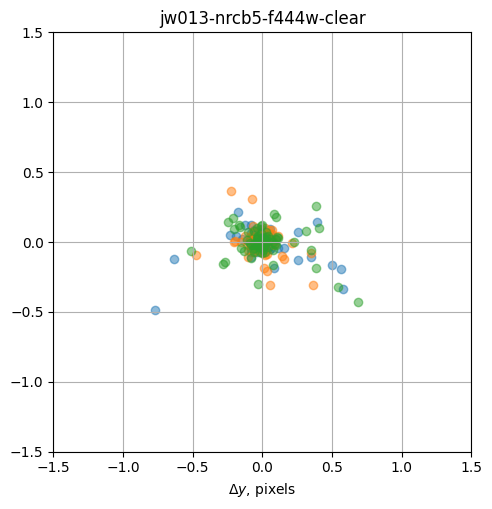

In [8]:
os.chdir(os.path.join(HOME_PATH, root, 'Prep'))

auto_script.preprocess(field_root=root, HOME_PATH='HOMEPATH',
                       # skip_imaging=True,
                              visit_prep_args=visit_prep_args, **preprocess_args)  

In [9]:
visits, all_groups, info = auto_script.load_visit_info(root, verbose=True)
# visit_file = auto_script.find_visit_file(root=root)
_ = auto_script.get_visit_exposure_footprints(root=root)

Load visit information from ./XMM1-Z-1664_visits.yaml


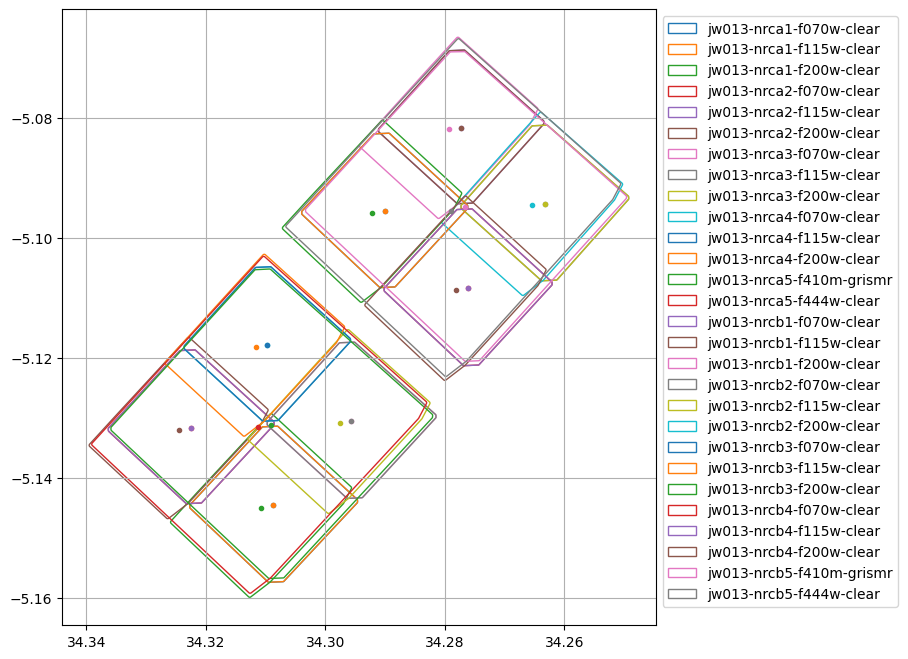

In [48]:
colors = [c['color'] for c in plt.rcParams['axes.prop_cycle']]
fig, ax = plt.subplots(1,1,figsize=(8,8))
for i, v in enumerate(visits):
    sr = utils.SRegion(v['footprint'])

    ax.scatter(*sr.centroid[0], marker='.', c=colors[i%len(colors)])
    for patch in sr.patch(ec=colors[i%len(colors)], fc='None', alpha=1, 
                          label=v['product']
                         ):
        ax.add_patch(patch)

ax.set_aspect(1./np.cos(ax.get_ylim()[0]/180*np.pi)) # square with cos(dec)
ax.set_xlim(ax.get_xlim()[::-1])
ax.grid()
plt.legend(bbox_to_anchor=(1.,1))
plt.show()

In [42]:
# RGB mosaic
os.chdir(os.path.join(HOME_PATH, root, 'Prep'))
# if not os.path.exists('{0}.field.jpg'.format(root)):
slx, sly, rgb_filts, fig = auto_script.field_rgb(root=root, scl=3, HOME_PATH=None,force_rgb=['f115w','f200w','f444w'])  
plt.close(fig)
    


PATH: ./, files: ['./XMM1-Z-1664-f070w_drz_sci.fits', './XMM1-Z-1664-f115w_drz_sci.fits', './XMM1-Z-1664-f200w_drz_sci.fits', './XMM1-Z-1664-f444w_drz_sci.fits']
Failed: .//XMM1-Z-1664-ir_dr?_sci.fits
# field_rgb XMM1-Z-1664: r f115w / g f200w / b f444w
# field_rgb scl=3.00 / r 1.00 / g 1.00 / b 1.00


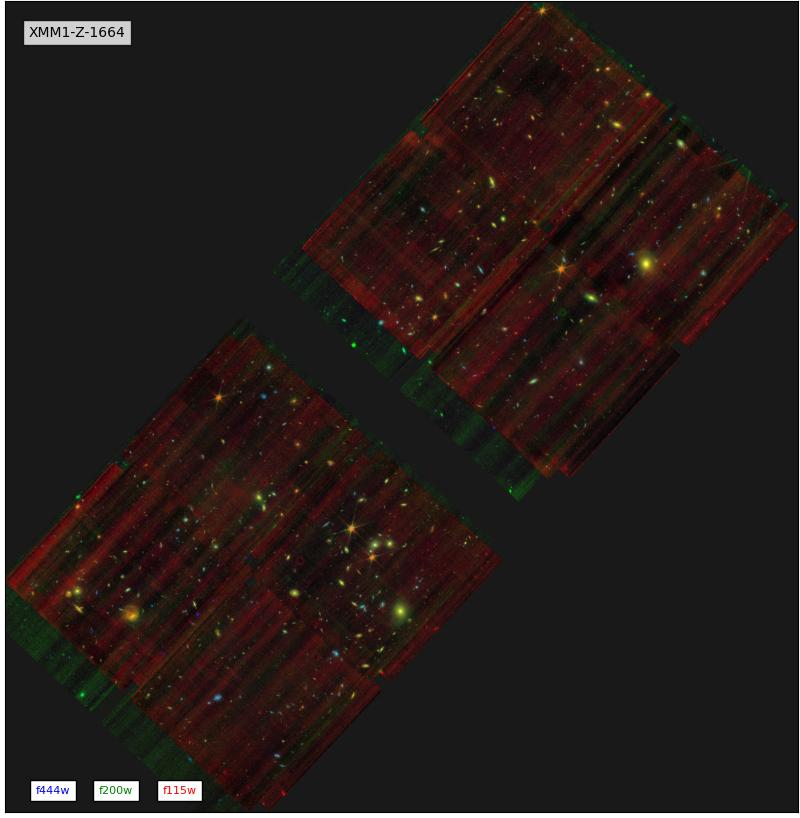

In [43]:
Image(filename='{0}.field.jpg'.format(root))

In [22]:
mosaic_drizzle_args = kwargs['mosaic_drizzle_args']
mosaic_args = kwargs['mosaic_args']

mosaic_args['fill_mosaics'] = False
mosaic_args['wcs_params']['pixel_scale'] = 0.031
mosaic_args['mosaic_pixfrac'] = 1
mosaic_args['half_optical_pixscale'] = False

mosaic_args['wcs_params']['pad_reference'] = 6 # small padding around edge, arcsec
mosaic_args['ir_filters'] = ['F070W','F115W','F200W','F444W']
mosaic_drizzle_args['static'] = False
mosaic_drizzle_args['skysub'] = True
mosaic_drizzle_args['bits'] = '~1+512'
mosaic_drizzle_args['combine_type'] = 'median'
mosaic_drizzle_args['crbit'] = 4096+2048
mosaic_drizzle_args['resetbits'] = 2048
# mosaic_drizzle_args['final_wht_type'] = 'IVM'
mosaic_drizzle_args['skymethod'] = 'localmin'
mosaic_drizzle_args['align_north'] = True

In [25]:
mosaic_drizzle_args.pop('final_wht_type')

'IVM'

# Make combined mosaics for each available filter

In [ ]:
auto_script.make_combined_mosaics(root, mosaic_driz_cr_type=2,mosaic_args=mosaic_args, 
                          mosaic_drizzle_args=mosaic_drizzle_args,fix_stars=True)

In [ ]:
# auto_script.make_filter_combinations('SMACS0723', weight_fnu=True, min_count=1,
#         filter_combinations={'ir': ['F115W','F150W','F200W','F277W','F356W','F444W']})

# Generate a photometric catalog
Run source detection on the combined mosaic {root}-ir_dr[cz]_sci.fits and generates a catalog and segmentation image.

Then perform simple matched-aperture photometry on the different available filter mosaics (in this case F098M and F140W from the direct imaging). In principle the template fitting code shown below can incorporate this photometric information, though that's not currently done by default.

In [7]:
utils.set_warnings()
os.chdir(os.path.join(HOME_PATH, root, 'Prep'))
detection_params={'minarea': 9, 'filter_kernel': np.array([[ 0.005,  0.021,  0.051,  0.069,  0.051,  0.021,  0.005],
       [ 0.021,  0.092,  0.221,  0.296,  0.221,  0.092,  0.021],
       [ 0.051,  0.221,  0.531,  0.711,  0.531,  0.221,  0.051],
       [ 0.069,  0.296,  0.711,  0.951,  0.711,  0.296,  0.069],
       [ 0.051,  0.221,  0.531,  0.711,  0.531,  0.221,  0.051],
       [ 0.021,  0.092,  0.221,  0.296,  0.221,  0.092,  0.021],
       [ 0.005,  0.021,  0.051,  0.069,  0.051,  0.021,  0.005]]),
                  'filter_type': 'conv', 'clean': True,
                  'clean_param': 1, 'deblend_nthresh': 20,
                  'deblend_cont': 0.01}

phot = auto_script.multiband_catalog(field_root=root, detection_filter='f444w',
                                     get_all_filters=True,threshold=2.5,
                                     detection_params=detection_params)

# (2024-12-10 09:17:06.856)

auto_script.multiband_catalog(**{'threshold': 2.5, 'detection_background': True, 'photometry_background': True, 'get_all_filters': True, 'filters': None, 'det_err_scale': -inf, 'phot_err_scale': -inf, 'rescale_weight': True, 'run_detection': True, 'detection_filter': 'f444w', 'detection_root': None, 'output_root': None, 'use_psf_filter': True, 'detection_params': {'minarea': 9, 'filter_kernel': array([[0.005, 0.021, 0.051, 0.069, 0.051, 0.021, 0.005],
       [0.021, 0.092, 0.221, 0.296, 0.221, 0.092, 0.021],
       [0.051, 0.221, 0.531, 0.711, 0.531, 0.221, 0.051],
       [0.069, 0.296, 0.711, 0.951, 0.711, 0.296, 0.069],
       [0.051, 0.221, 0.531, 0.711, 0.531, 0.221, 0.051],
       [0.021, 0.092, 0.221, 0.296, 0.221, 0.092, 0.021],
       [0.005, 0.021, 0.051, 0.069, 0.051, 0.021, 0.005]]), 'filter_type': 'conv', 'clean': True, 'clean_param': 1, 'deblend_nthresh': 20, 'deblend_cont': 0.01}, 'phot_apertures': [<Quantity 0.36 arcsec>, <Quantity 0.500001 a

In [12]:
os.chdir(os.path.join(HOME_PATH, root, 'Prep'))

files = glob.glob('*GrismFLT.fits')

if len(files) == 0:
    ### Grism contamination model

    # Which filter to use as direct image?  Will try in order of the list until a match is found.
    grism_prep_args = kwargs['grism_prep_args']
    
    grism_prep_args['gris_ref_filters'] = {'GRISMR': ['F444W'],
                                           'GRISMC': ['F444W']}
    grism_prep_args['refine_mag_limits'] = [12,22]
    grism_prep_args['prelim_mag_limit'] = 22
    grism_prep_args['mask_mosaic_edges'] = False
    grism_prep_args['pad'] = [50,800]
    grism_prep_args['mask_mosaic_edges'] = False
    grism_prep_args['force_ref'] = 'XMM1-Z-1664-f444w_drz_sci.fits'
    grism_prep_args['force_cat'] = 'XMM1-Z-1664-f444w.cat.fits'
    grism_prep_args['force_seg'] = 'XMM1-Z-1664-f444w_seg.fits'
    grp = auto_script.grism_prep(field_root=root, **grism_prep_args)

    
else:
    grp = multifit.GroupFLT(grism_files=glob.glob('*GrismFLT.fits'), 
                            catalog='XMM1-Z-1664-f444w.cat.fits', 
                            cpu_count=-1, sci_extn=1, pad=[50,800])

# (2024-12-13 12:39:57.263)

auto_script.grism_prep(**{'field_root': 'XMM1-Z-1664', 'PREP_PATH': '../Prep', 'EXTRACT_PATH': '../Extractions', 'ds9': None, 'refine_niter': 3, 'gris_ref_filters': {'GRISMR': ['F444W'], 'GRISMC': ['F444W']}, 'force_ref': 'XMM1-Z-1664-f444w_drz_sci.fits', 'force_cat': 'XMM1-Z-1664-f444w.cat.fits', 'force_seg': 'XMM1-Z-1664-f444w_seg.fits', 'files': None, 'split_by_grism': True, 'refine_poly_order': 3, 'refine_fcontam': 0.5, 'cpu_count': 0, 'mask_mosaic_edges': False, 'prelim_mag_limit': 22, 'refine_mag_limits': [12, 22], 'init_coeffs': [1.1, -0.5], 'grisms_to_process': None, 'pad': [50, 800], 'model_kwargs': {'compute_size': True}, 'sep_background_kwargs': None, 'subtract_median_filter': False, 'median_filter_size': 71, 'median_filter_central': 10, 'second_pass_filtering': False, 'box_filter_sn': 3, 'box_filter_width': 3, 'median_mask_sn_threshold': None, 'median_mask_dilate': 8, 'prelim_model_for_median': False, 'use_jwst_crds': False})

auto_script.grism_

2024-12-13 14:41:54,457 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/astropy/wcs/wcs.py:807: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to    87.673457 from OBSGEO-[XYZ].
Set OBSGEO-B to    12.325800 from OBSGEO-[XYZ].
Set OBSGEO-H to 1678148258.255 from OBSGEO-[XYZ]'.
  warnings.warn(

2024-12-13 14:41:54,463 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/astropy/wcs/wcs.py:807: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to    87.672660 from OBSGEO-[XYZ].
Set OBSGEO-B to    12.326776 from OBSGEO-[XYZ].
Set OBSGEO-H to 1678137844.806 from OBSGEO-[XYZ]'.
  warnings.warn(

2024-12-13 14:41:54,471 - stpipe - WARNING - /LUMI_TYKKY_YnFw3rV/miniconda/envs/env1/lib/python3.9/site-packages/astropy/wcs/wcs.py:807: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to    87.672660 from OBSGEO-[XYZ].
Set OBSGEO-B to    12.326777 from OBSGEO-[XYZ].
Set OBSGEO-H to 1678137841.451 

jw06480013001_03101_00002_nrcblong_rate.fits: _compute_model Done
jw06480013001_03101_00001_nrcalong_rate.fits: _compute_model Done
jw06480013001_03101_00002_nrcalong_rate.fits: _compute_model Done
jw06480013001_03101_00001_nrcblong_rate.fits: _compute_model Done
jw06480013001_03101_00003_nrcalong_rate.fits: _compute_model Done
jw06480013001_03101_00003_nrcblong_rate.fits: _compute_model Done
jw06480013001_03101_00004_nrcblong_rate.fits: _compute_model Done
jw06480013001_03101_00004_nrcalong_rate.fits: _compute_model Done
jw06480013001_03103_00001_nrcalong_rate.fits: _compute_model Done
jw06480013001_03103_00001_nrcblong_rate.fits: _compute_model Done
jw06480013001_03103_00003_nrcblong_rate.fits: _compute_model Done
jw06480013001_03103_00004_nrcalong_rate.fits: _compute_model Done
jw06480013001_03103_00002_nrcalong_rate.fits: _compute_model Done
jw06480013001_03103_00002_nrcblong_rate.fits: _compute_model Done
jw06480013001_03103_00003_nrcalong_rate.fits: _compute_model Done
jw06480013

ln: failed to create symbolic link './jw06480013001_03101_00001_nrcalong.01.GrismFLT.fits': File exists
ln: failed to create symbolic link './jw06480013001_03101_00001_nrcalong.01.GrismFLT.pkl': File exists
ln: failed to create symbolic link './jw06480013001_03101_00001_nrcblong.01.GrismFLT.fits': File exists
ln: failed to create symbolic link './jw06480013001_03101_00001_nrcblong.01.GrismFLT.pkl': File exists
ln: failed to create symbolic link './jw06480013001_03101_00002_nrcalong.01.GrismFLT.fits': File exists
ln: failed to create symbolic link './jw06480013001_03101_00002_nrcalong.01.GrismFLT.pkl': File exists
ln: failed to create symbolic link './jw06480013001_03101_00002_nrcblong.01.GrismFLT.fits': File exists
ln: failed to create symbolic link './jw06480013001_03101_00002_nrcblong.01.GrismFLT.pkl': File exists
ln: failed to create symbolic link './jw06480013001_03101_00003_nrcalong.01.GrismFLT.fits': File exists
ln: failed to create symbolic link './jw06480013001_03101_00003_nrca

# Spectra extraction

In [21]:
os.chdir('../Extractions')
pline = {'kernel': 'square', 'pixfrac': 1, 'pixscale': 0.03, 'size': 4, 'wcs': None}

args = auto_script.generate_fit_params(field_root=root, 
                                       prior=None,  
                                       pline=pline, 
                                       fit_only_beams=True, 
                                       run_fit=True, 
                                       poly_order=7, 
                                       fsps=True, 
                                       sys_err = 0.03, 
                                       fcontam=0.2, 
                                       zr=[0.05, 9], dz=[0.05, 0.005],include_photometry=False, use_phot_obj=False,
                                       save_file='fit_args.yaml')



# thread = multiprocessing.Process(target=auto_script.extract,
#                                  kwargs={'field_root':'C3D-17','maglim':[10,28],
#                                 'pline':pline, 'run_fit':False, 'grp':grp,
#                                 'diff':True,'skip_complete':True,'size':30,
#                                 'oned_R':False,'args_file':'fit_args.yaml.npy'})
# thread.start()

Saved arguments to fit_args.yaml.


In [27]:
auto_script.extract(ids=[1918],field_root=root,
                    pline=pline, run_fit=False, grp=grp,
                    diff=True,skip_complete=False,size=40,
                    oned_R=False,args_file='fit_args.yaml.npy')

0/1: 1918 8


2024-12-13 17:11:50,182 - stpipe - INFO - -Drizzling using kernel = point
2024-12-13 17:11:50,182 - stpipe - INFO - 
2024-12-13 17:11:50,184 - stpipe - INFO - -Drizzling using kernel = point
2024-12-13 17:11:50,184 - stpipe - INFO - 
2024-12-13 17:11:50,192 - stpipe - INFO - -Drizzling using kernel = point
2024-12-13 17:11:50,193 - stpipe - INFO - 
2024-12-13 17:11:50,194 - stpipe - INFO - -Drizzling using kernel = point
2024-12-13 17:11:50,195 - stpipe - INFO - 
2024-12-13 17:11:50,202 - stpipe - INFO - -Drizzling using kernel = point
2024-12-13 17:11:50,202 - stpipe - INFO - 
2024-12-13 17:11:50,204 - stpipe - INFO - -Drizzling using kernel = point
2024-12-13 17:11:50,204 - stpipe - INFO - 
2024-12-13 17:11:50,212 - stpipe - INFO - -Drizzling using kernel = point
2024-12-13 17:11:50,212 - stpipe - INFO - 
2024-12-13 17:11:50,214 - stpipe - INFO - -Drizzling using kernel = point
2024-12-13 17:11:50,214 - stpipe - INFO - 
2024-12-13 17:11:50,222 - stpipe - INFO - -Drizzling using kerne

XMM1-Z-1664_01918.beams.fits


True

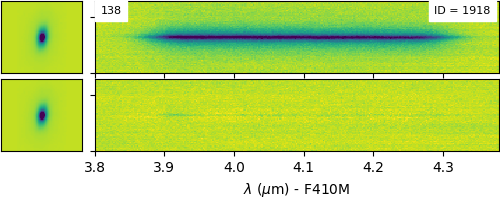

In [28]:
from IPython.display import Image

ID = 1918
Image(filename='{0}_{1:05d}.stack.png'.format(root, ID))

In [3]:
# cat = Table.read('XMM1-Z-1664/Prep/XMM1-Z-1664_phot.fits')

In [33]:
from astropy.visualization import ImageNormalize, ZScaleInterval,ManualInterval, LogStretch, LinearStretch


def show_model(flt,num,ylim=None,**imshow_kwards):
    
    grism_shape = flt.grism['SCI'].shape
    ref_shape = flt.direct.data['REF'].shape
    im_list = [flt.grism['SCI'],flt.model,flt.grism['SCI']-flt.model]
    fig,ax = plt.subplots(1,4,figsize=(14,3),sharey='all')
    plt.subplots_adjust(wspace=0.05)
    
    zshow(flt.direct.data['REF'],ax=ax[0],**imshow_kwards)
    ax[0].set_xlim(flt.pad[1],grism_shape[1]-flt.pad[1])
    ax[0].set_ylim(flt.pad[0],grism_shape[0]-flt.pad[0])
    titles = ['Direct','Grism','Model','Residual']
    

    vm = [-0.01, 0.09]
    for i,im in enumerate(im_list):
        ax[i+1].imshow(im, vmin=vm[0], vmax=vm[1],
                  interpolation='Nearest', origin='lower',**imshow_kwards)

        ax[i+1].set_xlim(flt.pad[1],grism_shape[1]-flt.pad[1])
        ax[i+1].set_ylim(flt.pad[0],grism_shape[0]-flt.pad[0])
        
    for i in range(4):
        ax[i].set_title(titles[i])
        # plt.setp(ax[i+1].get_yticklabels(), visible=False)
        
        
    # ax[1].set_yticks([])
    # ax[2].set_yticklabels([])
    # ax[3].set_yticklabels([])

    
    flt.catalog.add_index('NUMBER')
    idx = np.argsort(flt.catalog['MAG_AUTO'])[:num]

    
    hr = fits.getheader('../Prep/'+flt.grism_file)
    plt.suptitle(hr['PUPIL']+' Module '+flt.grism_file.split('nrc')[1][0])
    ax[0].scatter(flt.catalog['x_flt'][idx]+1,flt.catalog['y_flt'][idx]+1,s=50, facecolors='none', edgecolors='r')
        
    for n in idx:
        
        x0 = flt.catalog['x_flt'][n]+1
        y0 = flt.catalog['y_flt'][n]+1
        
        if (x0 > grism_shape[1]-flt.pad[1])|(x0<flt.pad[1]):
            continue
        dx = flt.conf.dxlam['A']
        dy, lam = flt.conf.get_beam_trace(x=x0-flt.pad[1], y=y0-flt.pad[0], dx=dx, beam='A')
        xint = np.interp(np.arange(3.8,4.3,0.1), lam/1.e4, dx)
        yint = np.interp(np.arange(3.8,4.3,0.1), lam/1.e4, dy)
        lamint = np.interp(np.arange(3.8,4.3,0.1), lam/1.e4, lam)/1e4
            
        ax[1].plot(x0+dx-1, y0+dy-1, color='red', linewidth=1, alpha=0.5)
        ax[1].scatter(x0+xint-1, y0+yint-1, marker='o', color='red', alpha=0.5,s=3)
        
        # ax[2].plot(x0+dx-1, y0+dy-1, color='red', linewidth=1, alpha=0.5)
        # ax[2].scatter(x0+xint-1, y0+yint-1, marker='o', color='red', alpha=0.5,s=3)
        
        if ylim:
            if (y0+yint[-1]>ylim[1])|(y0+yint[-1]<ylim[0]):
                continue
            else:
                ax[0].text(x0+xint[0]+50, y0+yint[0]+50,flt.catalog['NUMBER'][n],color='r',size=8,)
        else:
            ax[0].text(x0+xint[0]+50, y0+yint[0]+50,flt.catalog['NUMBER'][n],color='r',size=8,)
        
    if ylim:
        ax[0].set_ylim(ylim)
        
    plt.show()
        
def zshow(img,ax=None,**kwards):
    from astropy.visualization import ImageNormalize, ZScaleInterval,ManualInterval, LogStretch, LinearStretch
    norm = ImageNormalize(img, interval=ZScaleInterval())
    if ax:
        im = ax.imshow(img,norm=norm,**kwards)
        return im
    else:
        plt.imshow(img,norm=norm,**kwards)
        
    return 

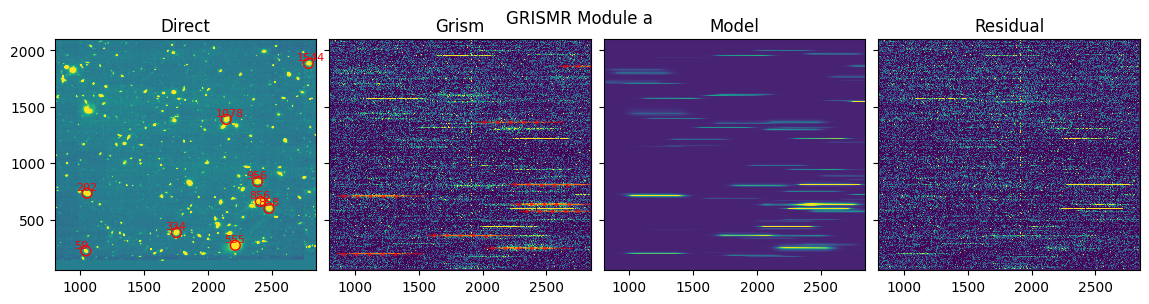

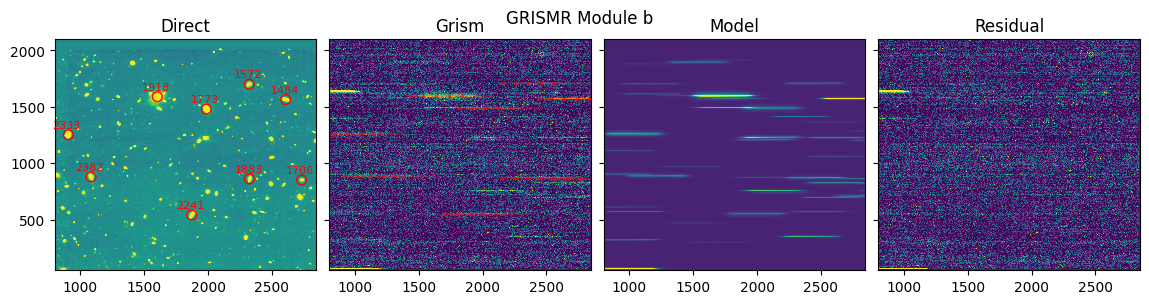

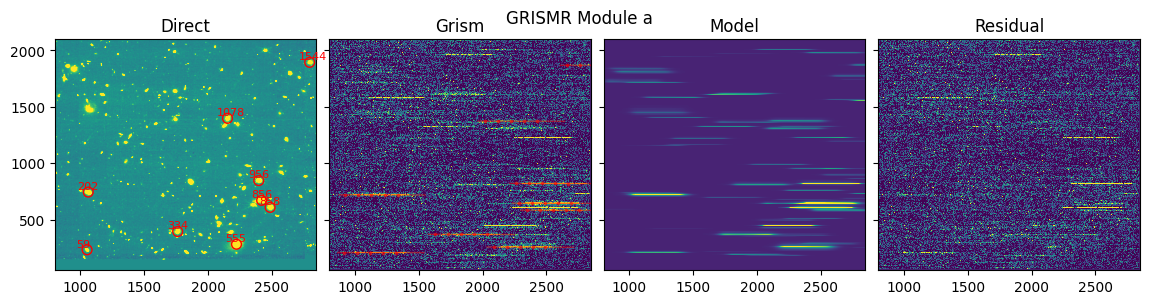

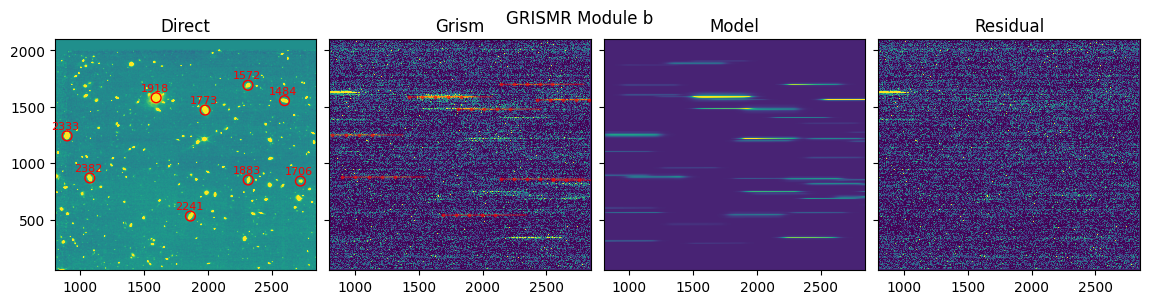

In [34]:
for flt in grp.FLTs[:4]:
    show_model(flt,num=10,aspect='auto')

jw06480013001_03101_00001_nrcalong_rate.fits


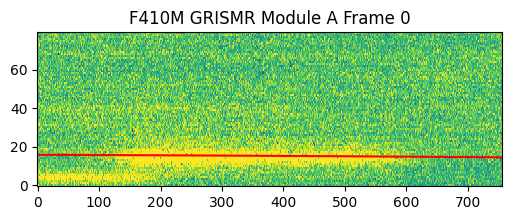

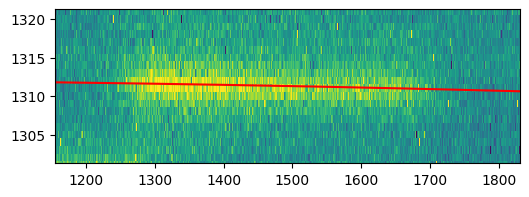

--------
jw06480013001_03101_00002_nrcalong_rate.fits


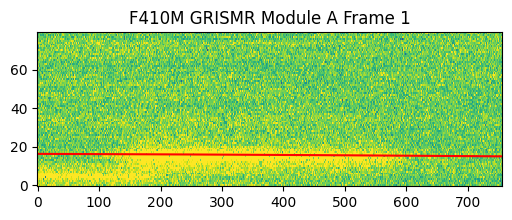

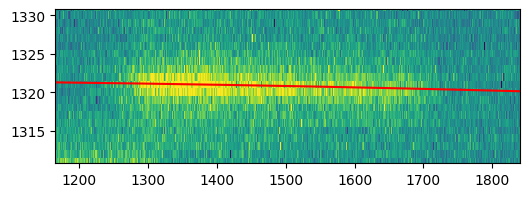

--------
jw06480013001_03101_00003_nrcalong_rate.fits


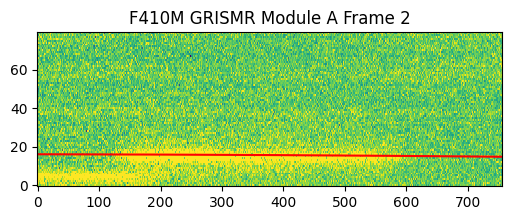

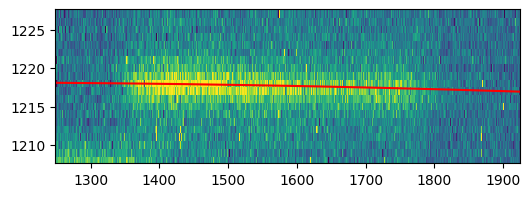

--------
jw06480013001_03101_00004_nrcalong_rate.fits


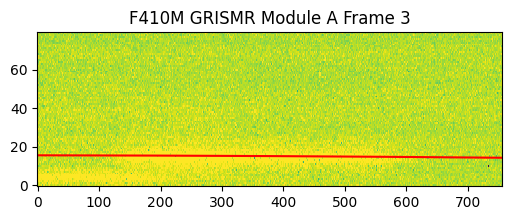

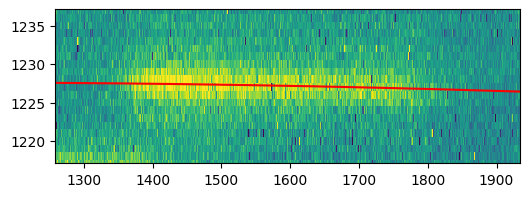

--------
jw06480013001_03103_00001_nrcalong_rate.fits


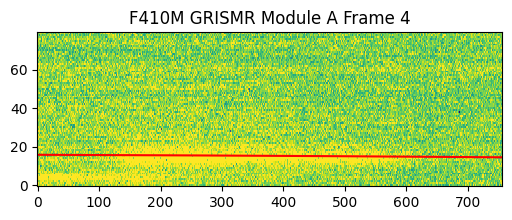

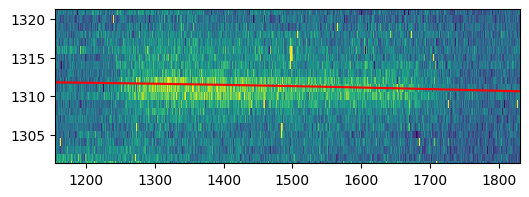

--------
jw06480013001_03103_00002_nrcalong_rate.fits


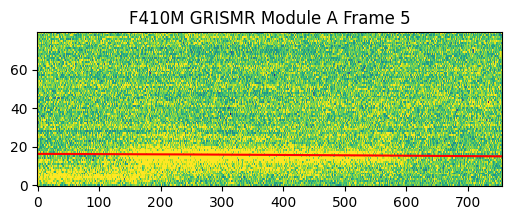

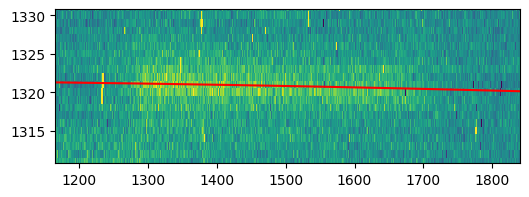

--------
jw06480013001_03103_00003_nrcalong_rate.fits


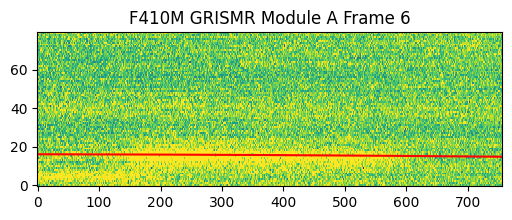

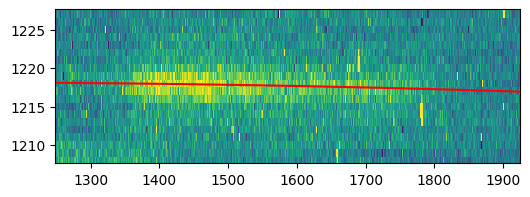

--------
jw06480013001_03103_00004_nrcalong_rate.fits


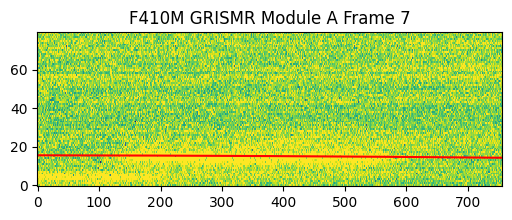

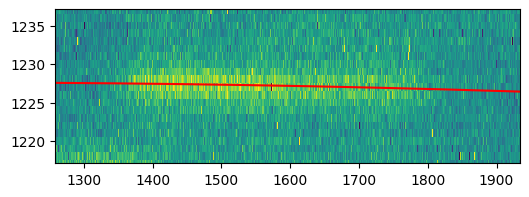

--------


In [30]:
beams = grp.get_beams(1078,size=40)
grp.catalog.add_index('NUMBER')
for i,beam in enumerate(beams):
# beam = beams[i]
    
    plt.figure(figsize=(6,2))
    plt.imshow(beam.grism.data['SCI'],aspect='auto',origin='lower',vmax=0.05,interpolation='None')
    print(beam.grism.parent_file)
    plt.plot(np.arange(np.shape(beam.grism.data['SCI'])[1]),beam.trace_table['trace'],color='r',)
    plt.title(beam.grism.filter+' '+beam.grism.pupil+' Module '+beam.grism.module+f' Frame {i}')
    # plt.ylim(0,30)
    # plt.ylim(25,50)

    plt.show()

    file = os.path.join('../Prep/',beam.grism.parent_file)
    hdr = fits.getheader(file)
    filt = hdr['filter']
    mod = hdr['module']
    pupil = hdr['pupil']
    conf = grismconf.TransformGrismconf(f'/projappl/project_465001526/grizli_config/CONF/GRISM_NIRCAM/V9/NIRCAM_{filt}_mod{mod}_{pupil[-1]}.conf')
    conf.get_beams()
    this_row = grp.catalog.loc[beam.beam.id]
    ID = this_row['NUMBER']
    rot = 0 if mod == 'A' else 2
    
    hdu = fits.open(file)

    coord = SkyCoord(this_row['RA']*u.deg,this_row['DEC']*u.deg)
    hdr = hdu['SCI'].header
    hdr,_,_ = utils.sip_rot90(hdr,rot)
    wcs = WCS(hdr)

    x,y = wcs.world_to_pixel(coord)
    if (x>2048)|(x<0)|(y>2048)|(y<0):
        continue
    # else:
    #     print(x+800,y+50)
    dx = conf.dxlam['A']
    # dx = np.arange(xlim[0],xlim[1])
    dy,lam = conf.get_beam_trace(x,y,dx)
    plt.figure(figsize=(6,2))
    plt.plot(x+dx,y+dy,c='r')
    # ylim = conf.conf['BEAM{0}'.format('A')]
    # dy = np.arange(ylim[0],ylim[1])
    # dx,lam = conf.get_beam_trace(x,y,dy)
    # plt.plot(x-dx,y-dy,c='r')
    data = hdu['SCI'].data
    # dq = hdu['DQ'].data
    # data[(dq&512!=0)|(dq&1!=0)|(dq&1024!=0)|(dq&2048!=0)] = np.nan
    zshow(np.rot90(data,rot),origin='lower',interpolation='None',aspect='auto')

    plt.xlim(np.min(x+dx),np.max(x+dx))
    plt.ylim(y+dy.mean()-10,y+dy.mean()+10)
    plt.show()
    hdu.close()
    print('--------')